# Course project - Credit risk customers classification

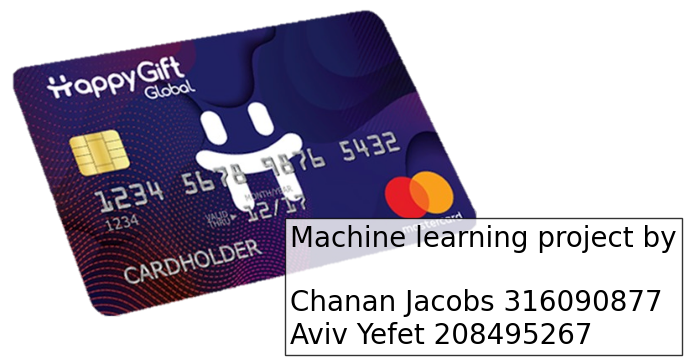

In [2]:
# Load the image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('creditCard.png')
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 4))
# Display the image
ax.imshow(img)
ax.axis('off')

# Add text to the plot
ax.text(0.6, 0.1, 'Machine learning project by\n\nChanan Jacobs 316090877\nAviv Yefet 208495267',
        fontsize=20, color='black', ha='left', va='center',
        transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.8))
plt.show()

### import 

In [3]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
from pandas import Series,DataFrame
%matplotlib inline
sns.set_style('whitegrid')
import matplotlib.ticker as mtick

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import xgboost as xgb
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, recall_score, precision_score



### Load dataset

In [4]:
creditData = pd.read_csv('credit_customers.csv',encoding='UTF-8')

In [5]:
creditData

checking_status  duration                  credit_history  \
0                <0         6  critical/other existing credit   
1          0<=X<200        48                   existing paid   
2       no checking        12  critical/other existing credit   
3                <0        42                   existing paid   
4                <0        24              delayed previously   
..              ...       ...                             ...   
995     no checking        12                   existing paid   
996              <0        30                   existing paid   
997     no checking        12                   existing paid   
998              <0        45                   existing paid   
999        0<=X<200        45  critical/other existing credit   

                 purpose  credit_amount    savings_status  employment  \
0               radio/tv           1169  no known savings         >=7   
1               radio/tv           5951              <100      1<=X<4   
2              education           2096              <100      4<=X<7   
3    furniture/equipment           7882              <100      4<=X<7   
4                new car           4870              <100      1<=X<4   
..                   ...            ...               ...         ...   
995  furniture/equipment           1736              <100      4<=X<7   
996             used car           3857              <100      1<=X<4   
997             radio/tv            804              <100         >=7   
998             radio/tv           1845              <100      1<=X<4   
999             used car           4576        100<=X<500  unemployed   

     installment_commitment     personal_status other_parties  ...  \
0                         4         male single          none  ...   
1                         2  female div/dep/mar          none  ...   
2                         2         male single          none  ...   
3                         2         male single     guarantor  ...   
4                         3         male single          none  ...   
..                      ...                 ...           ...  ...   
995                       3  female div/dep/mar          none  ...   
996                       4        male div/sep          none  ...   
997                       4         male single          none  ...   
998                       4         male single          none  ...   
999                       3         male single          none  ...   

     property_magnitude age  other_payment_plans   housing existing_credits  \
0           real estate  67                 none       own                2   
1           real estate  22                 none       own                1   
2           real estate  49                 none       own                1   
3        life insurance  45                 none  for free                1   
4     no known property  53                 none  for free                2   
..                  ...  ..                  ...       ...              ...   
995         real estate  31                 none       own                1   
996      life insurance  40                 none       own                1   
997                 car  38                 none       own                1   
998   no known property  23                 none  for free                1   
999                 car  27                 none       own                1   

                           job num_dependents  own_telephone foreign_worker  \
0                      skilled              1            yes            yes   
1                      skilled              1           none            yes   
2           unskilled resident              2           none            yes   
3                      skilled              2           none            yes   
4                      skilled              2           none            yes   
..                         ...            ...            ...            ...   
995

In [60]:
creditData.shape

(1000, 21)

In [61]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [62]:
creditData.describe()

duration  credit_amount  installment_commitment  residence_since  \
count  1000.000000    1000.000000             1000.000000      1000.000000   
mean     20.903000    3271.258000                2.973000         2.845000   
std      12.058814    2822.736876                1.118715         1.103718   
min       4.000000     250.000000                1.000000         1.000000   
25%      12.000000    1365.500000                2.000000         2.000000   
50%      18.000000    2319.500000                3.000000         3.000000   
75%      24.000000    3972.250000                4.000000         4.000000   
max      72.000000   18424.000000                4.000000         4.000000   

               age  existing_credits  num_dependents  
count  1000.000000       1000.000000     1000.000000  
mean     35.546000          1.407000        1.155000  
std      11.375469          0.577654        0.362086  
min      19.000000          1.000000        1.000000  
25%      27.000000          1.000000        1.000000  
50%      33.000000          1.000000        1.000000  
75%      42.000000          2.000000        1.000000  
max      75.000000          4.000000        2.000000

In [63]:
# Categorical unique values

# Convert all columns to the string data type
df = creditData.select_dtypes(include='object')
#df = creditData[['checking_status','credit_history','purpose','savings_status','employment','installment_commitment','personal_status','other_parties']]
df = df.astype(str)
# Create a new data frame with only unique values
unique_values = [pd.Series(df[col]).unique() for col in df.columns]
#well create a data frame with the size of longest non unique list 
max_len = max(len(values) for values in unique_values)
unique_df = pd.DataFrame({col: values if len(values) == max_len else list(values) + [None]*(max_len-len(values)) for col, values in zip(df.columns, unique_values)})

pd.set_option('display.max_columns', None)
def highlight(val):
    if val != None:
        return 'font-weight: bold; background-color: #D8B4F3; border: 1px solid black '
    else:
        return 'border: 1px solid black'

# Apply the styles to the dataframe
unique_df = unique_df.iloc[:30]


styled_df = unique_df.style.applymap(highlight)

# Display the styled dataframe
styled_df

# 

## Exploratory Data Analysis

In [64]:
def plot_numeric_dis(column_name):
    # assuming your creditDataframe is called "creditData" and the column is called "duration"
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

    # display the describe table as text in the left subplot
    describe_table = creditData[column_name].describe().round(2).to_string()
    axs[0].axis('off')
    axs[0].text(0.1, 0.5, describe_table, ha='left', va='center', fontsize=20)

    # plot the histogram in the middle subplot
    creditData[column_name].hist(ax=axs[1], color='#7BC8F6')  # Set color as red
    axs[1].set_title(f"Histogram: " + column_name)

    # plot the boxplot in the right subplot
    creditData[column_name].plot(kind="box", ax=axs[2], vert=False, color='#7BC8F6')  # Set color as blue
    axs[2].set_title(f"Boxplot: " + column_name)

    plt.tight_layout()
    plt.show()


def categorical_dis(column_name):
    column_counts = creditData[column_name].value_counts()

    # Create a figure with two subplots
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

    # Create the bar chart on the first subplot
    axs[0].bar(column_counts.index, column_counts.values, color='#7BC8F6')  # Set color as blue
    axs[0].set_xlabel(column_name)
    axs[0].set_ylabel('Count')
    axs[0].set_title(column_name + ' distribution')
    axs[0].tick_params(axis='x', rotation=90)
    axs[0].grid(False)  # Disable grid for the first subplot

    # Add labels to the bars
    for i, v in enumerate(column_counts.values):
        axs[0].annotate(str(v), xy=(i, v), ha='center', va='bottom')

    classification_counts = creditData.groupby([column_name, 'class']).size().unstack()

    # Calculate the percentages for each class within each category
    classification_percentages = classification_counts.apply(lambda x: x / x.sum() * 100, axis=1)

    # Reset index to remove 2 levels of headers
    classification_percentages = classification_percentages.reset_index()

    # Set custom colors for the stacked bar plot
    colors = ['#FF6961', '#77DD77']  # Specify the colors as red and blue

    # Create a stacked bar plot with custom colors
    classification_percentages.plot(x=column_name, kind='bar', stacked=True, ax=axs[1], color=colors)

    # Add labels to the bars
    for i, row in enumerate(classification_counts.values):
        total = sum(row)
        bottom_offset = 0
        for j, count in enumerate(row):
            percentage = count / total * 100
            # plt.text(i, bottom_offset + count / 7, f'{percentage:.1f}%', ha='center', va='center')
            bottom_offset += count

    # Set the labels and title
    plt.xlabel(column_name)
    plt.ylabel('Percentage')
    plt.title('Loan Classification by ' + column_name)

    # Display the plot
    plt.tight_layout()
    plt.show()
    classification_percentages.round()

    
def box_func(column_name):
    plt.figure(figsize=(4, 4))
    sns.boxplot(x=creditData['class'], y=creditData[column_name], data=pd.melt(creditData), palette=['#77DD77', '#FF6961'])
    plt.show()
    

def category_by_numery(column_name):
    df = creditData[[column_name, 'class']]
    df['bin'] = pd.qcut(creditData[column_name], 6, [1, 2, 3, 4, 5, 6])

    classification_counts = df.groupby(['bin', 'class']).size().unstack()

    # Calculate the percentages for each class within each amount
    classification_percentages = classification_counts.apply(lambda x: x / x.sum() * 100, axis=1)

    # Reset index to remove 2 levels of headers
    classification_percentages = classification_percentages.reset_index()
    
    fig, ax = plt.subplots(figsize=(6, 4))

    # Define the colors for the stacked bar plot
    colors = ['#FF6961','#77DD77']  # Green and red colors

    # Create a stacked bar plot for Loan Classification by Amount with custom colors
    classification_percentages.plot(x='bin', kind='bar', stacked=True, ax=ax, color=colors)

    # Add labels to the bars
    for i, row in enumerate(classification_counts.values):
        total = sum(row)
        bottom_offset = 0
        for j, count in enumerate(row):
            percentage = count / total * 100
            ax.text(i, bottom_offset + count / 7, f'{percentage:.1f}%', ha='center', va='center')
            bottom_offset += count

    # Plot the range of quartiles
    quartile_ranges = pd.qcut(creditData[column_name], 6)
    quartile_counts = quartile_ranges.value_counts().sort_index()
    classification_percentages['range']=quartile_counts.index
    
    
    # Set the labels and title
    ax.set_xlabel(column_name)
    ax.set_ylabel('Percentage')
    ax.set_title('Credit risk classification by ' +column_name)

    # Create a legend for the quartile range and class labels
    ax.legend(['bad','good'], facecolor='white', framealpha=1, fancybox=False, loc='best')

    # Display the plot
    plt.tight_layout()
    plt.show()
    print(classification_percentages.round())

### Distribution of the dependent variable - Class

<AxesSubplot: title={'center': 'Class distribution'}, xlabel='class'>

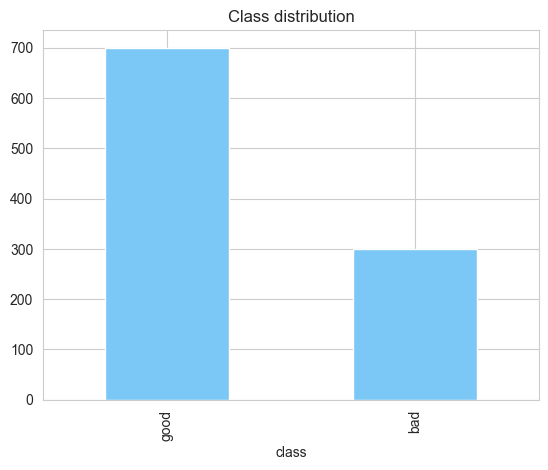

In [65]:
creditData['class'].value_counts().plot(kind='bar', title='Class distribution', xlabel='class',color='#7BC8F6')


### Numeric variables

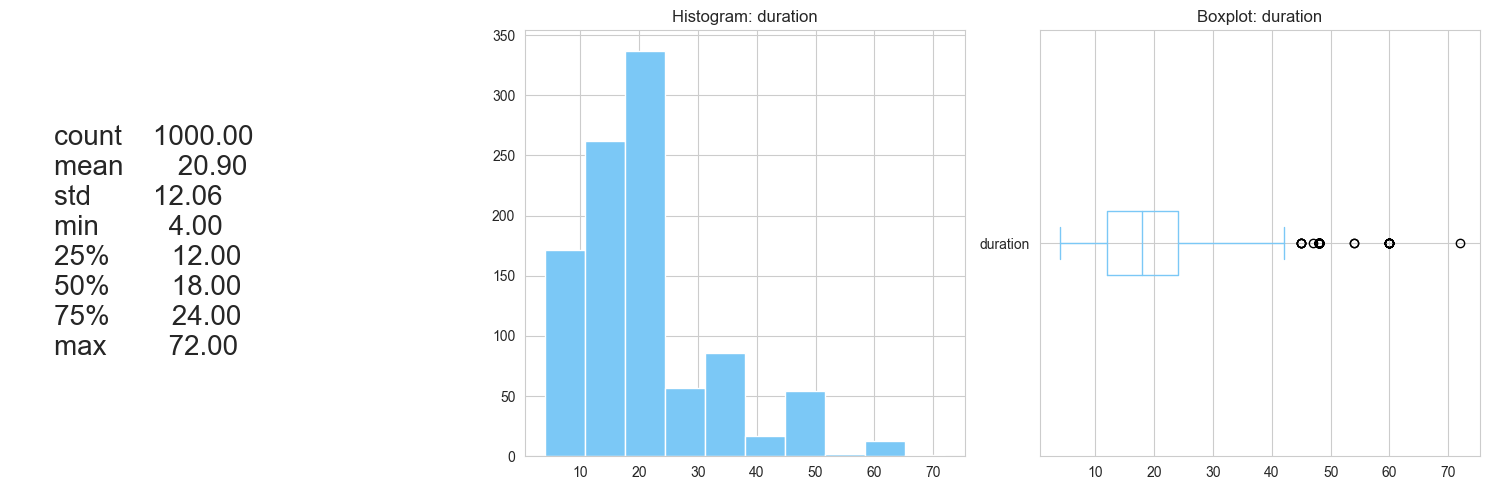

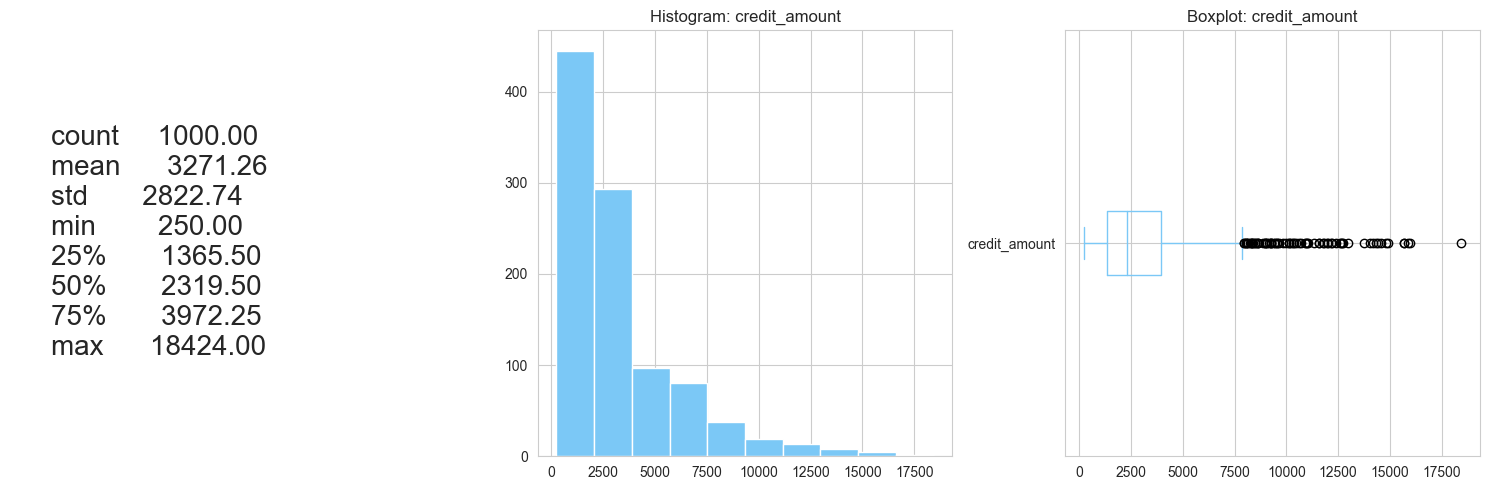

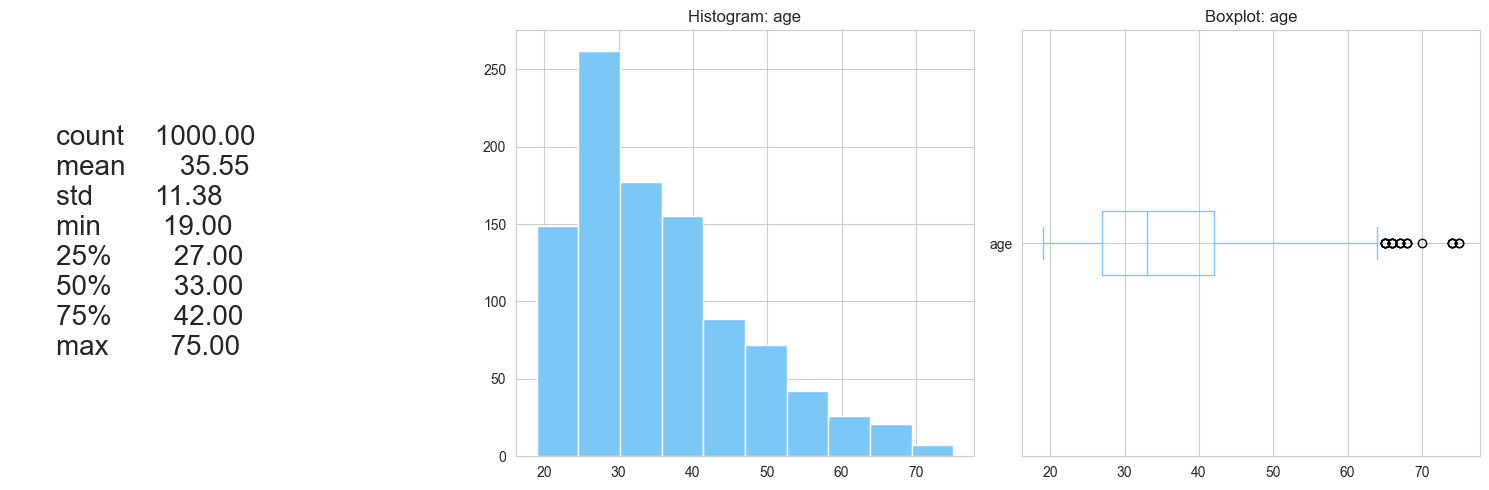

In [11]:
lst= ['duration','credit_amount','age']

for i in lst:
    plot_numeric_dis(i)
    print("\n")
    print("\n")
    

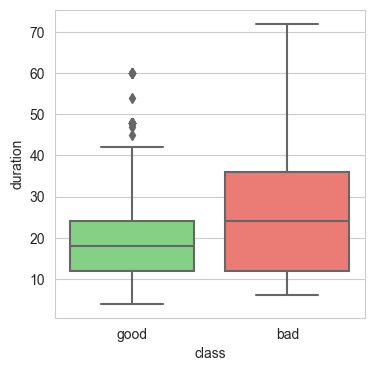

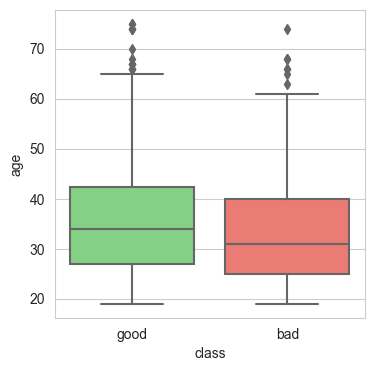

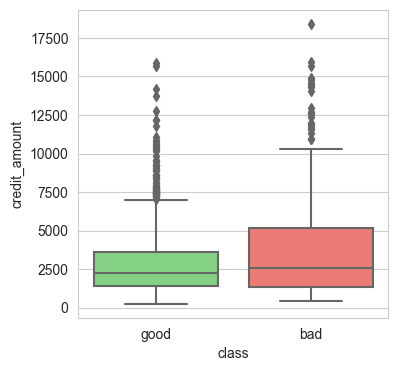

In [12]:
lst = ['duration','age','credit_amount']
for i in lst: 
    box_func(i)

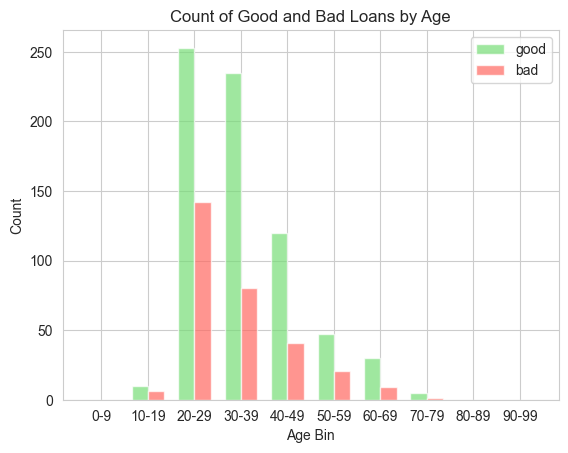

In [13]:
bins = range(0, 101, 10)
labels = ['{}-{}'.format(b, b+9) for b in bins[:-1]]
df = creditData[['age', 'class']]

# Add a column with the age bin
df['age_bin'] = pd.cut(creditData['age'], bins=bins, labels=labels)

# Group by age bin and class, and count the number of rows
count_by_age = df.groupby(['age_bin', 'class']).size().reset_index(name='count')

good = count_by_age[count_by_age['class'] == 'good']
bad = count_by_age[count_by_age['class'] == 'bad']

fig, ax = plt.subplots()

# Define the width of the bars
width = 0.35

# Plot the bars for the count of "good"
x1 = np.arange(len(good))
y1 = good['count']
ax.bar(x1 - width/2, y1, width, color= '#77DD77', label='good', alpha=0.7)

# Plot the bars for the count of "bad"
x2 = np.arange(len(bad))
y2 = bad['count']
ax.bar(x2 + width/2, y2, width, color='#FF6961', label='bad', alpha=0.7)

# Set the labels and title
ax.set_xlabel('Age Bin')
ax.set_ylabel('Count')
ax.set_title('Count of Good and Bad Loans by Age')

# Set the x-tick labels to the age bins
ax.set_xticks(x1)
ax.set_xticklabels(good['age_bin'])

# Add a legend
ax.legend()

# Display the chart
plt.show()

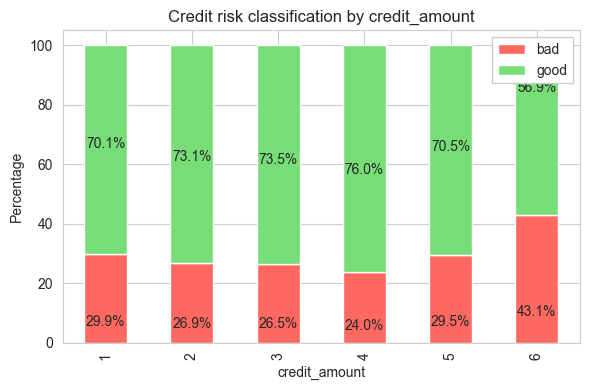

class bin   bad  good              range
0       1  30.0  70.0  (249.999, 1203.5]
1       2  27.0  73.0   (1203.5, 1554.0]
2       3  27.0  73.0   (1554.0, 2319.5]
3       4  24.0  76.0   (2319.5, 3368.0]
4       5  30.0  70.0   (3368.0, 5509.0]
5       6  43.0  57.0  (5509.0, 18424.0]


In [14]:
category_by_numery("credit_amount")

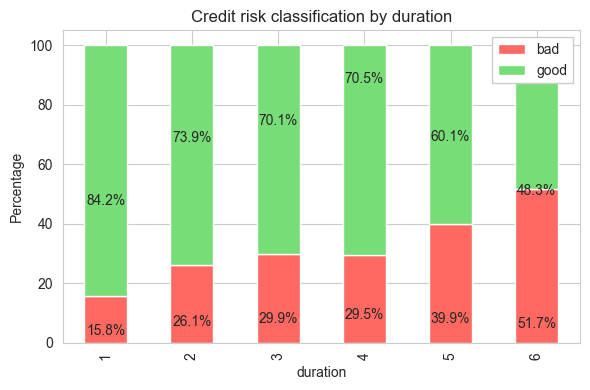

class bin   bad  good          range
0       1  16.0  84.0  (3.999, 10.0]
1       2  26.0  74.0   (10.0, 12.0]
2       3  30.0  70.0   (12.0, 18.0]
3       4  29.0  71.0   (18.0, 24.0]
4       5  40.0  60.0   (24.0, 36.0]
5       6  52.0  48.0   (36.0, 72.0]


In [15]:
category_by_numery("duration")

### Categorical variables

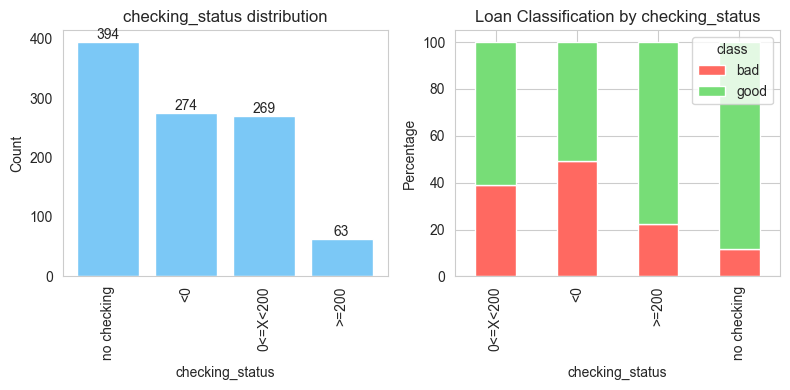

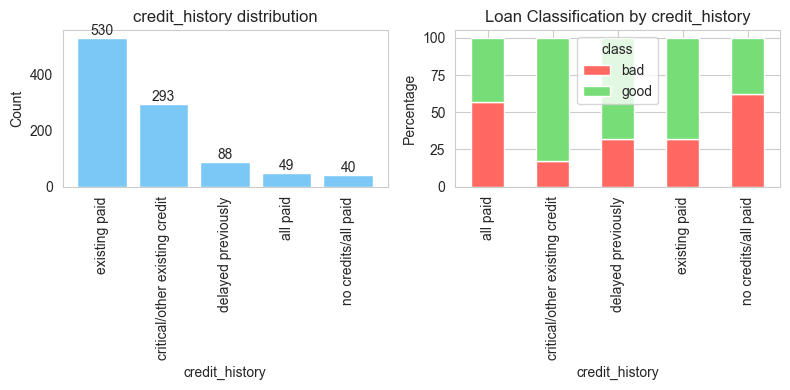

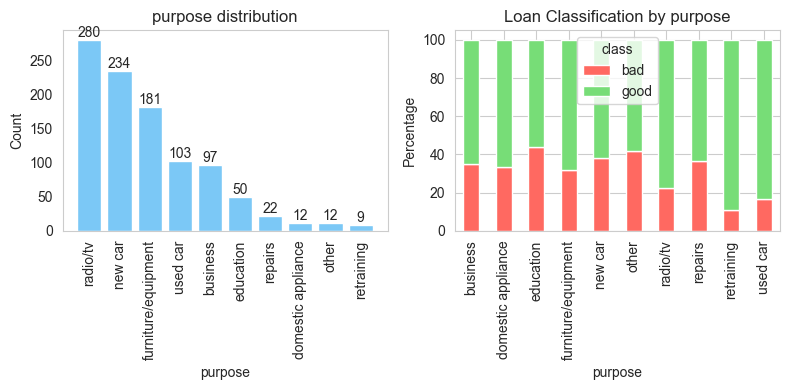

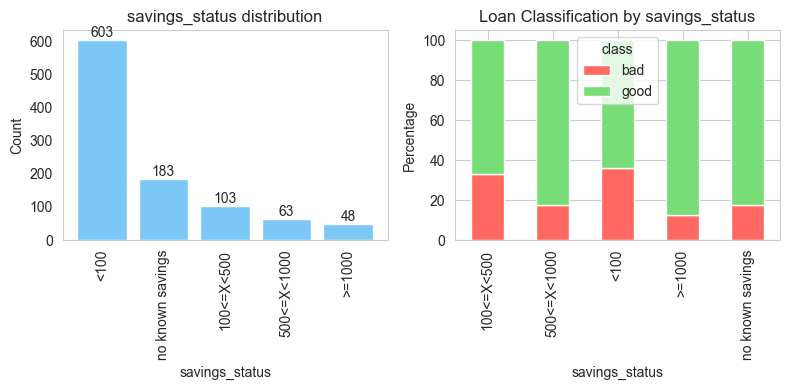

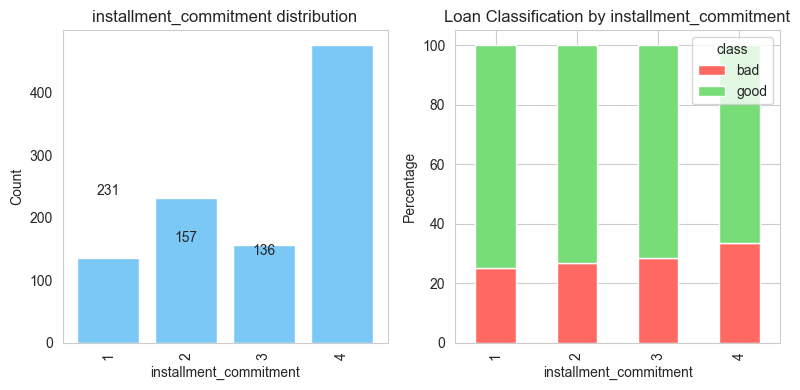

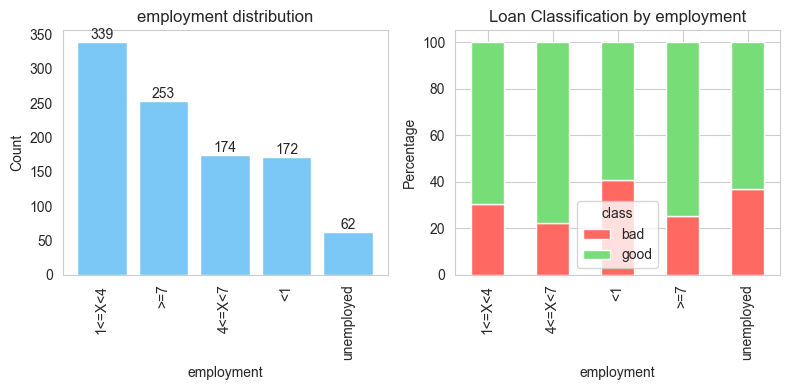

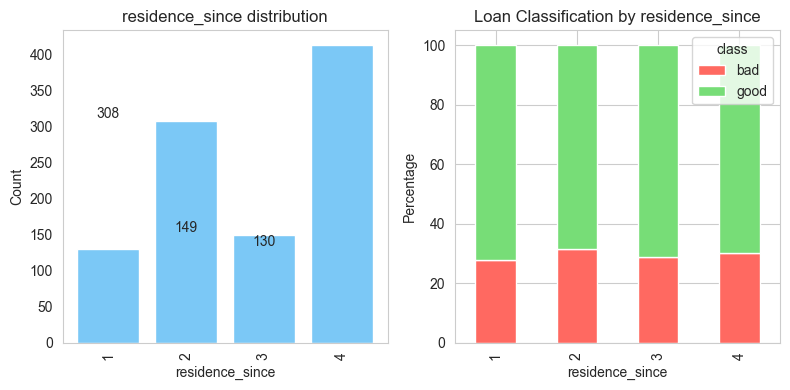

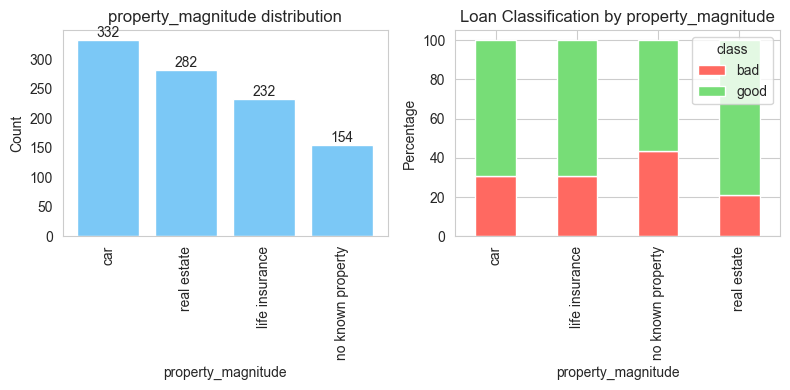

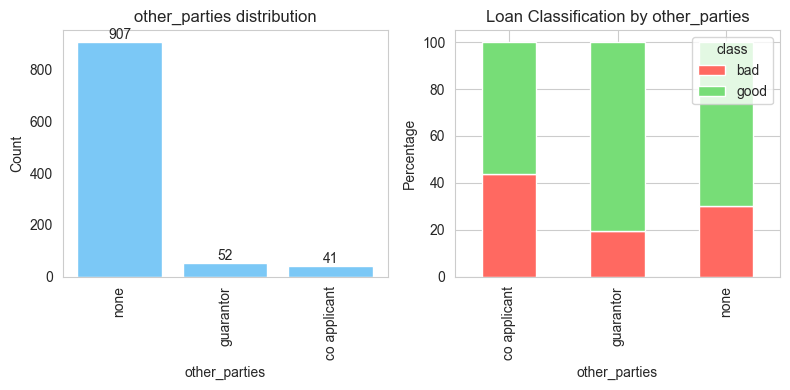

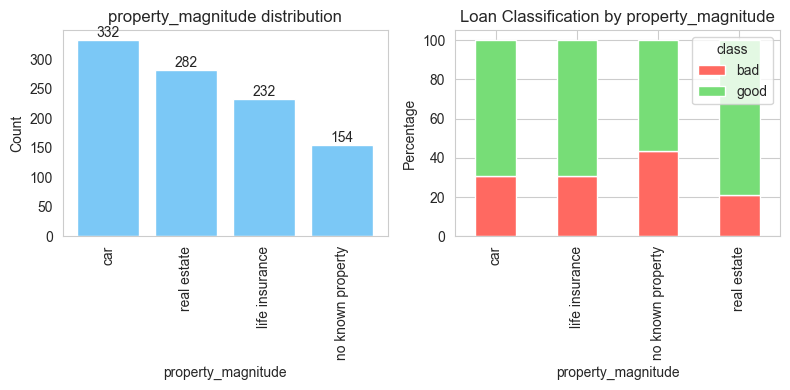

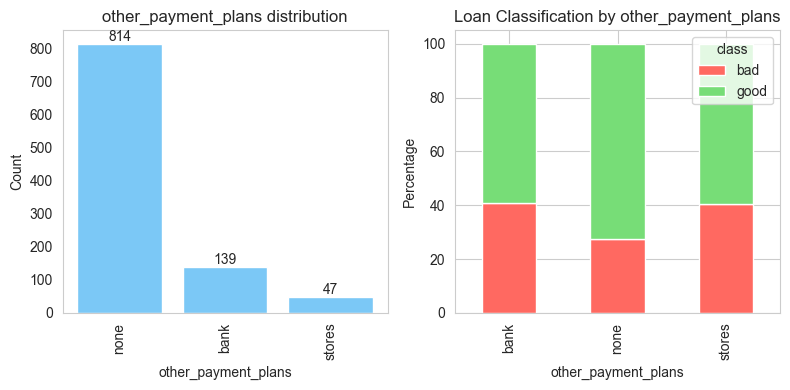

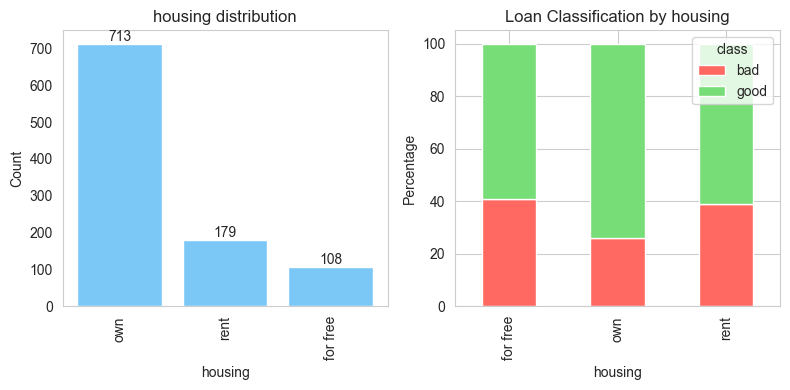

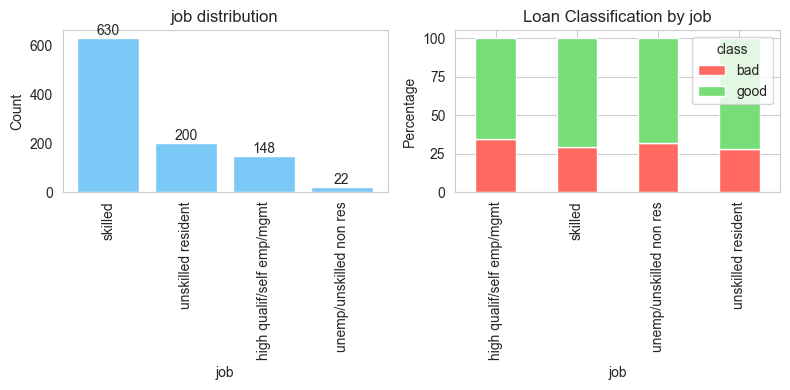

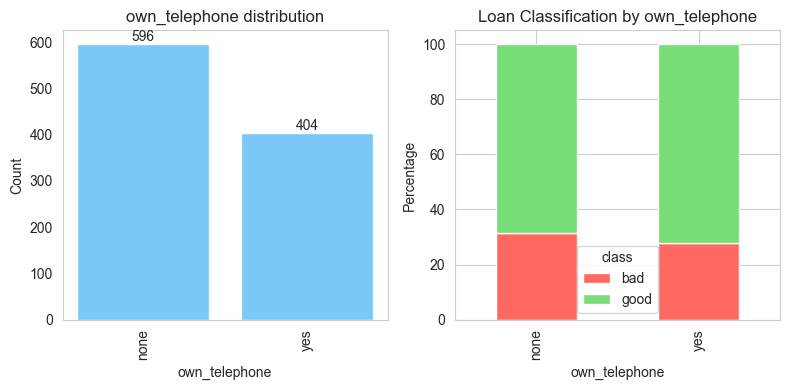

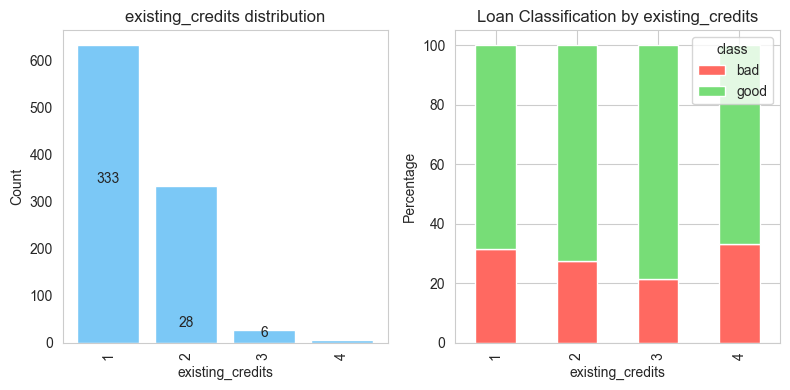

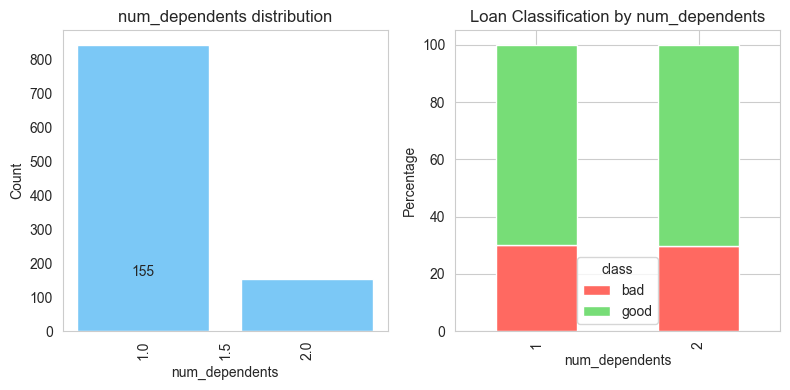

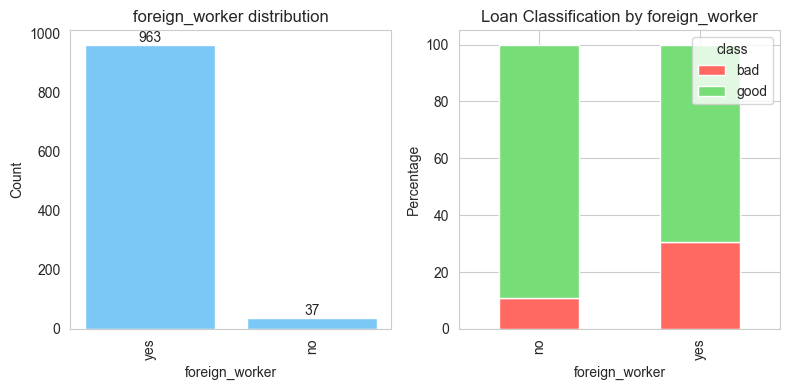

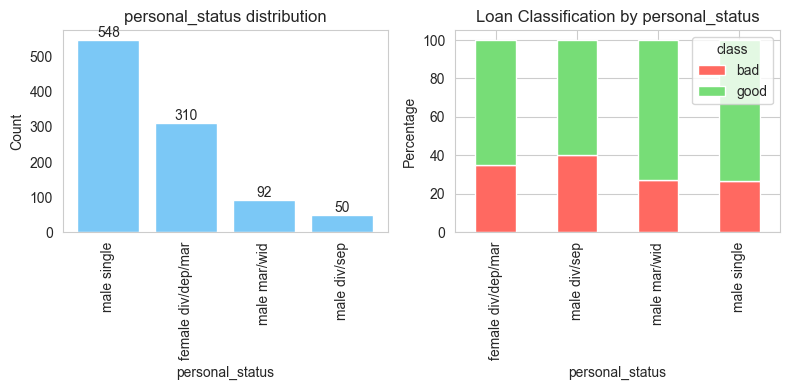

In [16]:
lst= ['checking_status', 'credit_history', 'purpose','savings_status','installment_commitment','employment','residence_since','property_magnitude','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','existing_credits','num_dependents','foreign_worker','personal_status']

for i in lst:
    categorical_dis(i)
    print("\n")
    print("\n")
    

divide column in to male and female

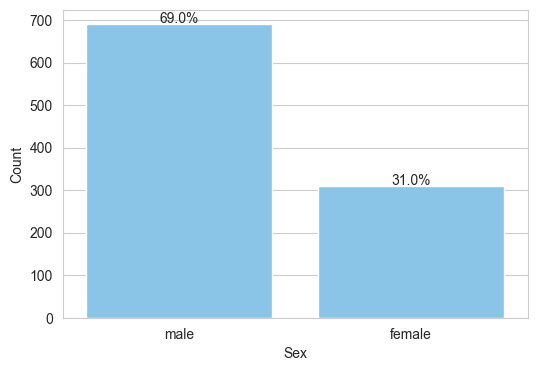

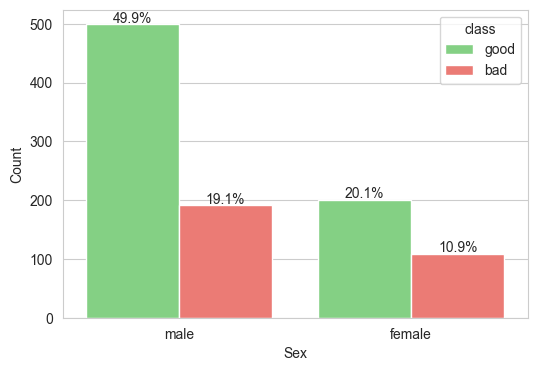

In [17]:
sex_df=creditData[['personal_status','class']]
sex_df[['sex', 'status']] = sex_df['personal_status'].str.split(' ', 1, expand=True)
# Drop the original column
sex_df.drop('personal_status', axis=1, inplace=True)

plt.figure(figsize=(6,4))
ax = sns.countplot(x='sex',  data=sex_df,color='#7BC8F6')  # Set color palette
ax.set(ylabel='Count', xlabel='Sex')
total = len(sex_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:.1f}%'.format(height/total*100), ha="center")
plt.show()

plt.figure(figsize=(6,4))
ax = sns.countplot(x='sex', hue='class', data=sex_df, palette=[ '#77DD77','#FF6961'])  # Set color palette
ax.set(ylabel='Count', xlabel='Sex')
total = len(sex_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:.1f}%'.format(height/total*100), ha="center")
plt.show()


#  

## Organize and preprocess the data

In [18]:
# Splitting 'personal_status' column into 'gender' column 'status' column  

creditData[['gender', 'status']] = creditData['personal_status'].str.split(' ', 1, expand=True)
creditData.drop('personal_status', axis='columns', inplace=True)

In [19]:
# create 10-year age bins
bins = range(10,90,10)
labels = ['{}-{}'.format(b, b+9) for b in bins[:-1]]
creditData['age_bin'] = pd.cut(creditData['age'], bins=bins, labels=labels)
creditData.drop('age',axis=1,inplace = True)

creditData['age_bin'].unique()

['60-69', '20-29', '40-49', '50-59', '30-39', '10-19', '70-79']
Categories (7, object): ['10-19' < '20-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70-79']

In [20]:
# Convert object type to category type

object_cols = ['age_bin','checking_status', 'credit_history', 'purpose','savings_status','employment','property_magnitude','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker','class','gender','status']
for col in object_cols:
    creditData[col] = creditData[col].astype('category')
    


In [21]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   int64   
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   int64   
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   int64   
 8   other_parties           1000 non-null   category
 9   residence_since         1000 non-null   int64   
 10  property_magnitude      1000 non-null   category
 11  other_payment_plans     1000 non-null   category
 12  housing                 1000 non-null   category
 13  existing_credits        1000 non-null   int64   
 14  job                     1

In [22]:
# Convert binary variable into 1\0 values
creditData = creditData.replace({'foreign_worker': {'yes': 1,'no': 0}})
creditData = creditData.replace({'class': {'good': 1,'bad': 0}})
creditData = creditData.replace({'own_telephone': {'yes': 1,'none': 0}})
creditData = creditData.replace({'gender': {'female': 1,'male': 0}})

In [23]:
# apply one-hot encoding to the categorical columns

cat_cols =  ['checking_status', 'credit_history', 'purpose','savings_status','employment','other_parties','property_magnitude','other_payment_plans','housing','job','status','age_bin']
creditData = pd.get_dummies(creditData, columns=cat_cols)

# print the resulting DataFrame
creditData.head()

duration  credit_amount  installment_commitment  residence_since  \
0         6           1169                       4                4   
1        48           5951                       2                2   
2        12           2096                       2                3   
3        42           7882                       2                4   
4        24           4870                       3                4   

   existing_credits  num_dependents own_telephone foreign_worker class gender  \
0                 2               1             1              1     1      0   
1                 1               1             0              1     0      1   
2                 1               2             0              1     1      0   
3                 1               2             0              1     1      0   
4                 2               2             0              1     0      0   

   checking_status_0<=X<200  checking_status_<0  checking_status_>=200  \
0                         0                   1                      0   
1                         1                   0                      0   
2                         0                   0                      0   
3                         0                   1                      0   
4                         0                   1                      0   

   checking_status_no checking  credit_history_all paid  \
0                            0                        0   
1                            0                        0   
2                            1                        0   
3                            0                        0   
4                            0                        0   

   credit_history_critical/other existing credit  \
0                                              1   
1                                              0   
2                                              1   
3                                              0   
4                                              0   

   credit_history_delayed previously  credit_history_existing paid  \
0                                  0                             0   
1                                  0                             1   
2                                  0                             0   
3                                  0                             1   
4                                  1                             0   

   credit_history_no credits/all paid  purpose_business  \
0                                   0                 0   
1                                   0                 0   
2                                   0                 0   
3                                   0                 0   
4                                   0                 0   

   purpose_domestic appliance  purpose_education  purpose_furniture/equipment  \
0                           0                  0                            0   
1                           0                  0                            0   
2                           0                  1                            0   
3                           0                  0                            1   
4                           0                  0                            0   

   purpose_new car  purpose_other  purpose_radio/tv  purpose_repairs  \
0                0              0                 1                0   
1                0              0                 1                0   
2                0              0                 0                0   
3                0              0                 0                0   
4                1              0                 0                0   

   purpose_retraining  purpose_used car  savings_status_100<=X<500  \
0                   0                 0                          0   
1                   0                 0                          0   
2                   0                 0                          0   


In [24]:
# Move the 'class' column to the end of the dataframe
creditData = creditData[[col for col in creditData if col != 'class'] + ['class']]

In [25]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 67 columns):
 #   Column                                         Non-Null Count  Dtype   
---  ------                                         --------------  -----   
 0   duration                                       1000 non-null   int64   
 1   credit_amount                                  1000 non-null   int64   
 2   installment_commitment                         1000 non-null   int64   
 3   residence_since                                1000 non-null   int64   
 4   existing_credits                               1000 non-null   int64   
 5   num_dependents                                 1000 non-null   int64   
 6   own_telephone                                  1000 non-null   category
 7   foreign_worker                                 1000 non-null   category
 8   gender                                         1000 non-null   category
 9   checking_status_0<=X<200                  

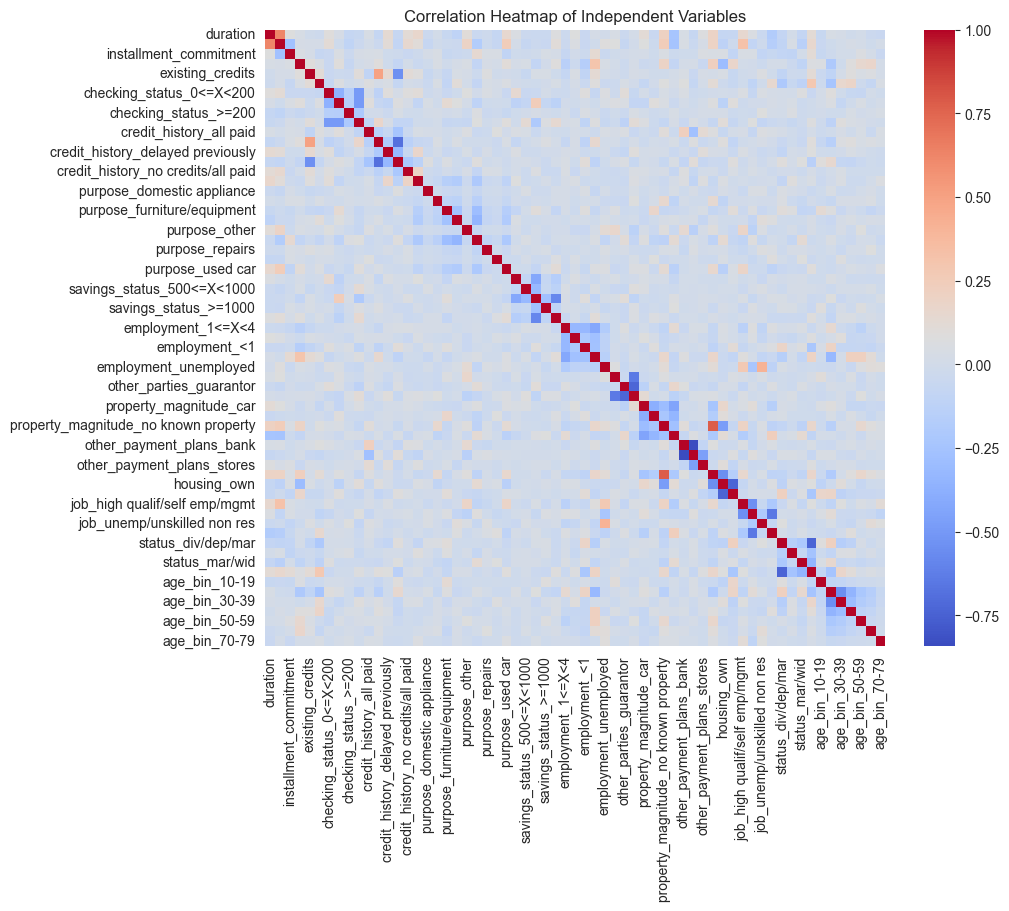

There are no highly correlated features.


In [26]:
# Calculate the correlation matrix of the independent variables
corr_matrix = creditData.iloc[:, :-1].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Independent Variables')
plt.show()



# print the features that are correlated with a threshold of 0.85 and above or -0.85 and below

threshold = 0.85

highly_correlated_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        correlation = corr_matrix.iloc[i, j]
        if correlation >= threshold or correlation <= -threshold:
            feature_i = corr_matrix.columns[i]
            feature_j = corr_matrix.columns[j]
            highly_correlated_features.append((feature_i, feature_j, correlation))

            
# Check if the list of highly correlated features is empty
if not highly_correlated_features:
    print("There are no highly correlated features.")
else:
    # Print the highly correlated features
    for feature_i, feature_j, correlation in highly_correlated_features:
        print(f"{feature_i} and {feature_j} are highly correlated ({correlation})")

Dependent and Independent variables

In [27]:
X = creditData.iloc[:, :-1].values # The independent variables
y = creditData.iloc[:,-1].values # The dependet 'class' good or bad variable

Training and testing sets 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0, stratify = y)

In [29]:
X_train

array([[  24, 1246,    4, ...,    0,    0,    0],
       [  12,  900,    4, ...,    0,    0,    0],
       [   6,  672,    1, ...,    1,    0,    0],
       ...,
       [  24, 2064,    3, ...,    0,    0,    0],
       [  30, 4280,    4, ...,    0,    0,    0],
       [  12,  609,    4, ...,    0,    0,    0]], dtype=int64)

Standardization

In [30]:
scaler = StandardScaler()
scaler = StandardScaler().fit(X_train)
scaler.transform(X_train)
scaler.transform(X_test)

array([[ 0.75761279, -0.32986523,  0.91883747, ..., -0.26636529,
        -0.20742414, -0.07930516],
       [-0.74364277, -0.69151053,  0.91883747, ..., -0.26636529,
        -0.20742414, -0.07930516],
       [ 1.75844982,  1.09652442, -0.86531296, ..., -0.26636529,
        -0.20742414, -0.07930516],
       ...,
       [-0.24322425, -0.29597225,  0.91883747, ..., -0.26636529,
        -0.20742414, -0.07930516],
       [-0.49343351,  0.50808461,  0.02676226, ..., -0.26636529,
        -0.20742414, -0.07930516],
       [ 0.25719427, -0.6511274 ,  0.91883747, ..., -0.26636529,
        -0.20742414, -0.07930516]])

In [31]:
# Upsampling Minority Class

# apply SMOTE to the training data
oversample = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)


In [32]:
pd.Series(y_train).value_counts()

1    560
0    240
dtype: int64

<AxesSubplot: title={'center': 'Class train distribution'}, xlabel='class'>

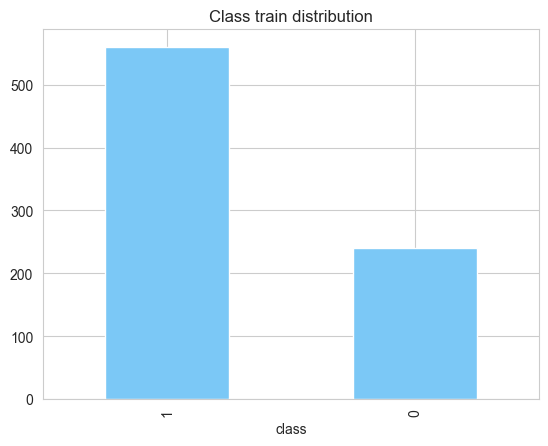

In [33]:
pd.Series(y_train).value_counts().plot(kind='bar', title='Class train distribution', xlabel='class',color='#7BC8F6')


In [34]:
pd.Series(y_train_resampled).value_counts()

0    560
1    560
dtype: int64

<AxesSubplot: title={'center': 'Class train distribution after applying SMOTE'}, xlabel='class'>

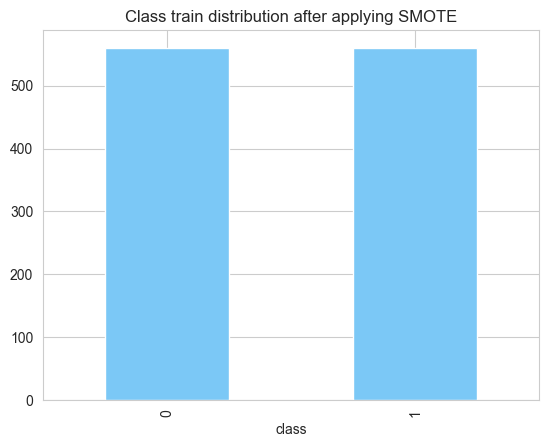

In [35]:
pd.Series(y_train_resampled).value_counts().plot(kind='bar', title='Class train distribution after applying SMOTE', xlabel='class',color='#7BC8F6')


In [37]:
def models_train(model, param_grid, X_train_resampled, y_train_resampled, X_test):
    
    # Use GridSearchCV to search over the hyperparameter grid
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
    
    # Fit the grid search to the training data
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    # Get the best estimator
    best_est = grid_search.best_estimator_
        
    # Predict using the best estimator
    y_pred = best_est.predict(X_test)
        
    # Print the best parameter and score
    print("Best parameter: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_ , "\n")
     
    return y_pred, best_est

def plot_feature_importance(model, model_name):
    importances = model.feature_importances_

    # Sort the feature importances in descending order
    sorted_indices = importances.argsort()[::-1]
    sorted_importances = importances[sorted_indices]

    # Get the names of the features
    feature_names = creditData.iloc[:, :-1].columns[sorted_indices][:10]

    # Plot the feature importances
    plt.figure(figsize=(7, 5))
    plt.bar(range(len(sorted_importances[:10])), sorted_importances[:10], tick_label=feature_names,color='#7BC8F6')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title( model_name + ' Feature Importance')
    plt.xticks(rotation=90)
    plt.show()
    
    
    
def evaluation_metrics(y_test, y_pred, best_est, evaluation_metrics_df, model_name):
    # Calculate precision, recall, and f1-score
    print("\nClassification Report:\n", classification_report(y_test, y_pred), "\n")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


    

### Decision Tree

In [38]:
# Create a decision tree classifier
classifier_dt = DecisionTreeClassifier(random_state=0)  

# Set up a grid of hyperparameter values to search over
param_grid = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

y_pred, best_est =  models_train(classifier_dt, param_grid, X_train_resampled, y_train_resampled, X_test)

Best parameter:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 5}
Best score:  0.7410714285714286 



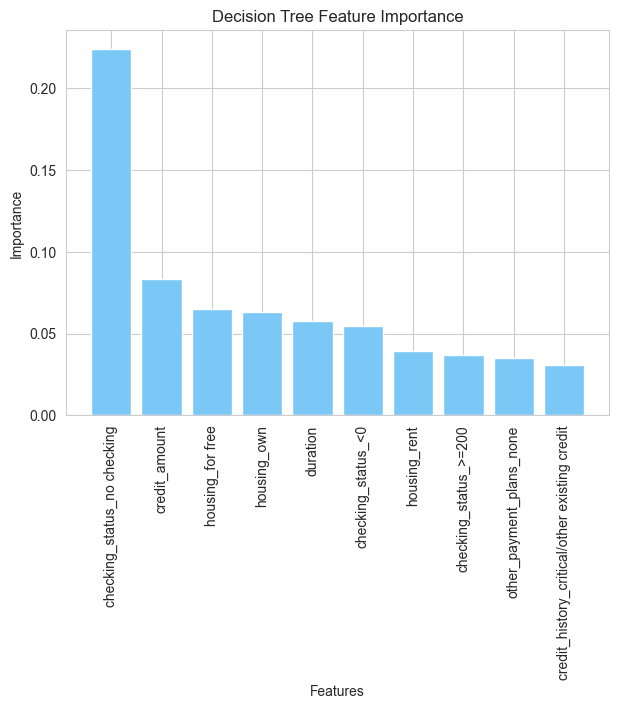

In [39]:
plot_feature_importance(best_est,'Decision Tree')


Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.63      0.54        60
           1       0.81      0.69      0.74       140

    accuracy                           0.67       200
   macro avg       0.64      0.66      0.64       200
weighted avg       0.71      0.67      0.68       200
 



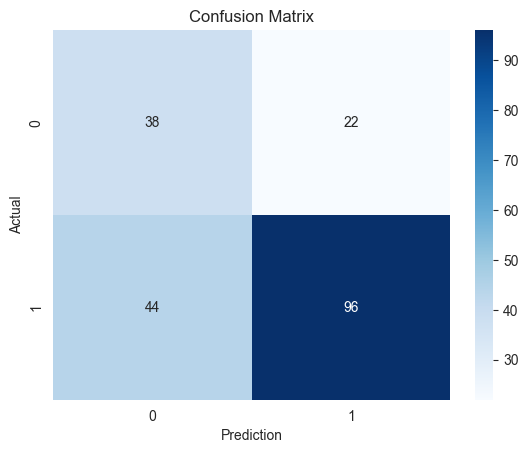

In [40]:
# Evaluating the results of the model
evaluation_metrics(y_test, y_pred, best_est, evaluation_metrics_df, 'Decision Tree')

### Random Forest

In [41]:
# Create a random forest classifier
classifier_rf = RandomForestClassifier(random_state=0)

# Set up a grid of hyperparameter values to search over
param_grid = {'n_estimators': [100, 300, 500, 1000],    
              'max_depth': [3, 4, 5, 6, 7, 9, 11],          
              'min_samples_split':  [2, 3, 4, 5, 6, 7],     
              'min_samples_leaf': [1, 2, 4, 6]        
              }

y_pred, best_est =  models_train(classifier_rf, param_grid, X_train_resampled, y_train_resampled, X_test)

Best parameter:  {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score:  0.8044642857142857 



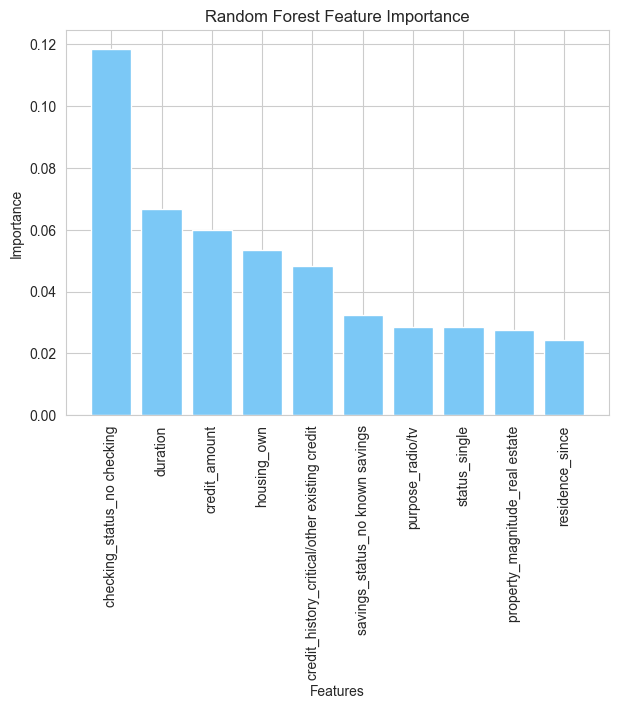

In [42]:
plot_feature_importance(best_est,'Random Forest')


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.57      0.62        60
           1       0.83      0.89      0.86       140

    accuracy                           0.80       200
   macro avg       0.76      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200
 



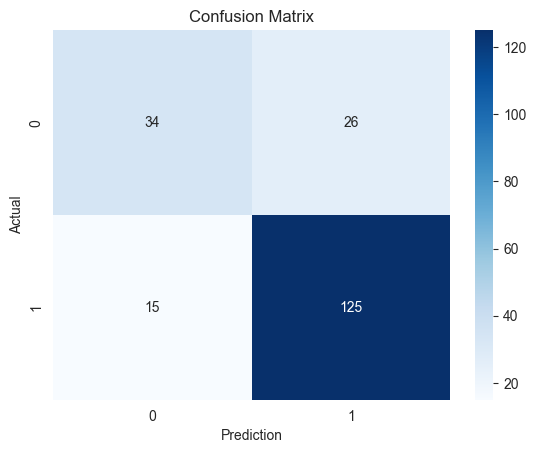

In [43]:
# Evaluating the results of the model
evaluation_metrics(y_test, y_pred, best_est, evaluation_metrics_df, 'Random Forest')

### KNN Classifier

In [44]:
# Create a kNN classifier
classifier_knn = KNeighborsClassifier()

# Set up a grid of hyperparameter values to search over
param_grid = {'n_neighbors': [3, 5, 7],           
              'weights': ['uniform', 'distance'],  
              'p': [1, 2]                          
              }

y_pred, best_est =  models_train(classifier_knn, param_grid, X_train_resampled, y_train_resampled, X_test)

Best parameter:  {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best score:  0.6892857142857143 




Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.65      0.49        60
           1       0.79      0.57      0.66       140

    accuracy                           0.59       200
   macro avg       0.59      0.61      0.58       200
weighted avg       0.67      0.59      0.61       200
 



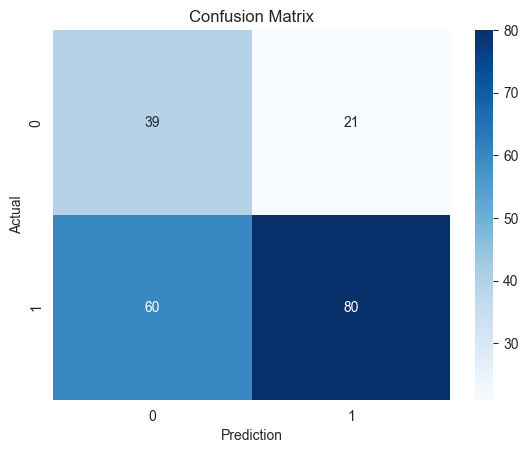

In [45]:
# Evaluating the results of the model
evaluation_metrics(y_test, y_pred, best_est, evaluation_metrics_df, 'KNN')

### Support Vector Machine - SVM

In [46]:
# Create a SVC (Support Vector Classification) classifier
classifier_svm = SVC()

# Set up a grid of hyperparameter values to search over
param_grid = { 'C': [0.1, 1, 10],              
              'gamma': [0.1, 1, 10]           
              }

y_pred, best_est =  models_train(classifier_svm, param_grid, X_train_resampled, y_train_resampled, X_test)

Best parameter:  {'C': 10, 'gamma': 0.1}
Best score:  0.6625 




Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.12      0.17        60
           1       0.71      0.91      0.79       140

    accuracy                           0.67       200
   macro avg       0.53      0.51      0.48       200
weighted avg       0.60      0.67      0.61       200
 



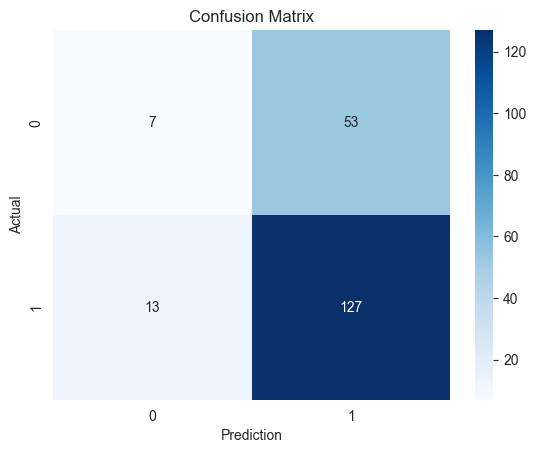

In [47]:
# Evaluating the results of the model
evaluation_metrics(y_test, y_pred, best_est, evaluation_metrics_df, 'SVM')

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression classifier
classifier_lr = LogisticRegression(random_state=0)

# Set up a grid of hyperparameter values to search over
param_grid = { 'C': [0.1, 1, 10],                   
               'penalty': ['l1', 'l2'],                  
             }

y_pred, best_est =  models_train(classifier_lr, param_grid, X_train_resampled, y_train_resampled, X_test)

Best parameter:  {'C': 10, 'penalty': 'l2'}
Best score:  0.7928571428571429 




Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.58      0.59        60
           1       0.82      0.83      0.83       140

    accuracy                           0.76       200
   macro avg       0.71      0.71      0.71       200
weighted avg       0.75      0.76      0.75       200
 



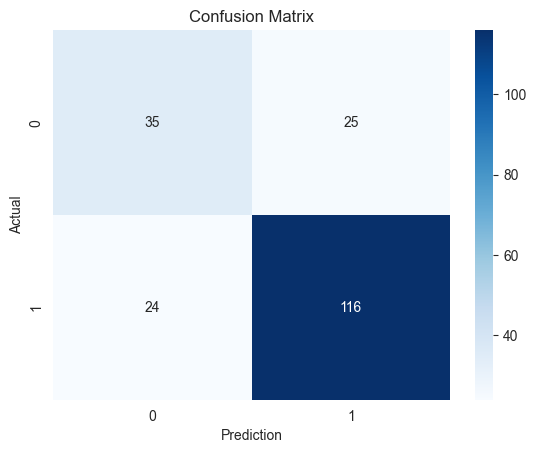

In [49]:
evaluation_metrics(y_test, y_pred, best_est, evaluation_metrics_df, 'Logistic Regression')

### XGBoost

In [50]:
# Create an XGBoost classifier object
classifier_xgb = xgb.XGBClassifier()

# Set up a grid of hyperparameter values to search over
param_grid = { 'learning_rate': [0.1, 0.01, 0.001],                 
               'n_estimators': [100, 500, 1000],                    
               'max_depth': [3, 4, 5, 6, 7, 9, 11],                                                        
              }

y_pred, best_est =  models_train(classifier_xgb, param_grid, X_train_resampled, y_train_resampled, X_test)

Best parameter:  {'learning_rate': 0.01, 'max_depth': 11, 'n_estimators': 500}
Best score:  0.8044642857142857 



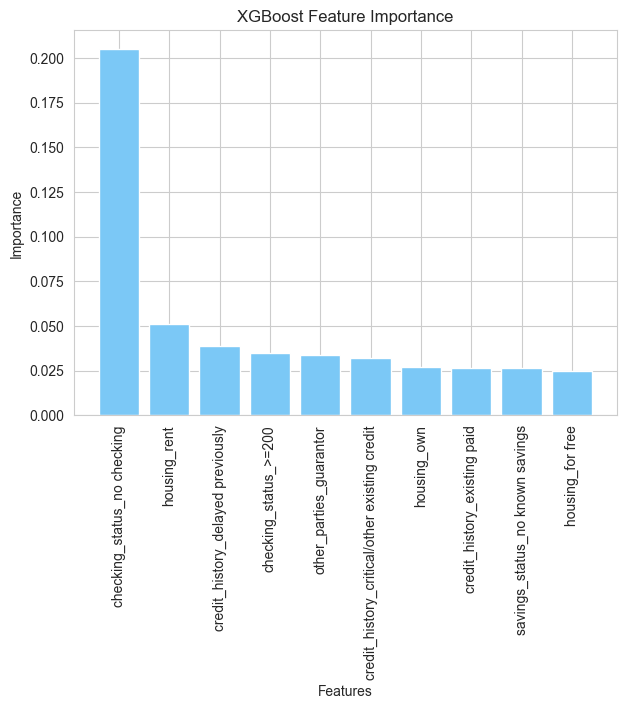

In [51]:
plot_feature_importance(best_est,'XGBoost')


Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.50      0.54        60
           1       0.80      0.84      0.82       140

    accuracy                           0.74       200
   macro avg       0.69      0.67      0.68       200
weighted avg       0.73      0.74      0.73       200
 



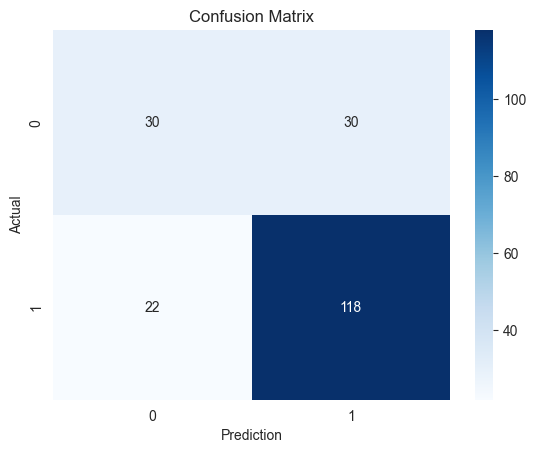

In [52]:
evaluation_metrics(y_test, y_pred, best_est, evaluation_metrics_df, 'XGBoost')

### CatBoost


In [53]:
#!pip install catboost
from catboost import CatBoostClassifier

# Create a CatBoost classifier object
classifier_cat = CatBoostClassifier()

# Set up a grid of hyperparameter values to search over
param_grid = { 'depth': [3, 4, 5, 6, 7, 9, 11], 
               'learning_rate': [0.1, 0.01, 0.001],  
               'iterations': [100, 200, 300]  
              }

y_pred, best_est =  models_train(classifier_cat, param_grid, X_train_resampled, y_train_resampled, X_test)

0:	learn: 0.6529200	total: 60.5ms	remaining: 5.99s
1:	learn: 0.6244861	total: 62.8ms	remaining: 3.08s
2:	learn: 0.5993492	total: 64.8ms	remaining: 2.1s
3:	learn: 0.5729837	total: 67.2ms	remaining: 1.61s
4:	learn: 0.5563654	total: 69.3ms	remaining: 1.32s
5:	learn: 0.5417379	total: 71.5ms	remaining: 1.12s
6:	learn: 0.5298631	total: 73.9ms	remaining: 982ms
7:	learn: 0.5199942	total: 76ms	remaining: 874ms
8:	learn: 0.5047486	total: 77.9ms	remaining: 788ms
9:	learn: 0.4951566	total: 80ms	remaining: 720ms
10:	learn: 0.4848785	total: 81.8ms	remaining: 662ms
11:	learn: 0.4750313	total: 83.7ms	remaining: 614ms
12:	learn: 0.4695578	total: 85.6ms	remaining: 573ms
13:	learn: 0.4606426	total: 87.3ms	remaining: 536ms
14:	learn: 0.4543794	total: 89.3ms	remaining: 506ms
15:	learn: 0.4465577	total: 91.1ms	remaining: 478ms
16:	learn: 0.4400353	total: 92.9ms	remaining: 454ms
17:	learn: 0.4350213	total: 95.1ms	remaining: 433ms
18:	learn: 0.4288148	total: 97.1ms	remaining: 414ms
19:	learn: 0.4232910	total:

1:	learn: 0.6444798	total: 4.5ms	remaining: 220ms
2:	learn: 0.6275438	total: 7.23ms	remaining: 234ms
3:	learn: 0.6078467	total: 9.7ms	remaining: 233ms
4:	learn: 0.5973161	total: 12.6ms	remaining: 240ms
5:	learn: 0.5838477	total: 15.4ms	remaining: 241ms
6:	learn: 0.5710367	total: 18.4ms	remaining: 245ms
7:	learn: 0.5614276	total: 20.9ms	remaining: 240ms
8:	learn: 0.5527587	total: 23.9ms	remaining: 242ms
9:	learn: 0.5425262	total: 26.5ms	remaining: 238ms
10:	learn: 0.5350267	total: 29.3ms	remaining: 237ms
11:	learn: 0.5275532	total: 31.9ms	remaining: 234ms
12:	learn: 0.5224775	total: 34.2ms	remaining: 229ms
13:	learn: 0.5172432	total: 36.5ms	remaining: 224ms
14:	learn: 0.5115976	total: 39ms	remaining: 221ms
15:	learn: 0.5069455	total: 41.4ms	remaining: 217ms
16:	learn: 0.5021093	total: 43.5ms	remaining: 213ms
17:	learn: 0.4986765	total: 45.8ms	remaining: 209ms
18:	learn: 0.4948593	total: 48.1ms	remaining: 205ms
19:	learn: 0.4898062	total: 51ms	remaining: 204ms
20:	learn: 0.4853153	total:

0:	learn: 0.6649858	total: 2.46ms	remaining: 243ms
1:	learn: 0.6445023	total: 5.12ms	remaining: 251ms
2:	learn: 0.6262738	total: 7.87ms	remaining: 254ms
3:	learn: 0.6080636	total: 10.7ms	remaining: 256ms
4:	learn: 0.5949585	total: 13.6ms	remaining: 258ms
5:	learn: 0.5817367	total: 16.3ms	remaining: 255ms
6:	learn: 0.5724033	total: 19ms	remaining: 253ms
7:	learn: 0.5660127	total: 21.9ms	remaining: 252ms
8:	learn: 0.5566455	total: 24.4ms	remaining: 247ms
9:	learn: 0.5487582	total: 27.3ms	remaining: 246ms
10:	learn: 0.5398201	total: 30ms	remaining: 243ms
11:	learn: 0.5307631	total: 32.7ms	remaining: 240ms
12:	learn: 0.5235839	total: 35.5ms	remaining: 237ms
13:	learn: 0.5181917	total: 38.2ms	remaining: 235ms
14:	learn: 0.5113872	total: 40.8ms	remaining: 231ms
15:	learn: 0.5054408	total: 43.4ms	remaining: 228ms
16:	learn: 0.5005566	total: 46ms	remaining: 225ms
17:	learn: 0.4967971	total: 48.6ms	remaining: 221ms
18:	learn: 0.4924663	total: 51.1ms	remaining: 218ms
19:	learn: 0.4857707	total: 

75:	learn: 0.5205472	total: 246ms	remaining: 77.7ms
76:	learn: 0.5187381	total: 249ms	remaining: 74.4ms
77:	learn: 0.5167969	total: 253ms	remaining: 71.5ms
78:	learn: 0.5157251	total: 256ms	remaining: 68.1ms
79:	learn: 0.5140568	total: 258ms	remaining: 64.6ms
80:	learn: 0.5129084	total: 261ms	remaining: 61.2ms
81:	learn: 0.5116863	total: 263ms	remaining: 57.8ms
82:	learn: 0.5107018	total: 266ms	remaining: 54.5ms
83:	learn: 0.5096058	total: 269ms	remaining: 51.2ms
84:	learn: 0.5081391	total: 271ms	remaining: 47.9ms
85:	learn: 0.5069806	total: 274ms	remaining: 44.6ms
86:	learn: 0.5060589	total: 277ms	remaining: 41.3ms
87:	learn: 0.5050872	total: 280ms	remaining: 38.2ms
88:	learn: 0.5040963	total: 283ms	remaining: 34.9ms
89:	learn: 0.5024959	total: 285ms	remaining: 31.7ms
90:	learn: 0.5015368	total: 288ms	remaining: 28.5ms
91:	learn: 0.5005236	total: 290ms	remaining: 25.2ms
92:	learn: 0.4994097	total: 293ms	remaining: 22ms
93:	learn: 0.4982045	total: 295ms	remaining: 18.9ms
94:	learn: 0.4

75:	learn: 0.5697854	total: 187ms	remaining: 59.1ms
76:	learn: 0.5690225	total: 190ms	remaining: 56.7ms
77:	learn: 0.5680204	total: 192ms	remaining: 54.3ms
78:	learn: 0.5668955	total: 195ms	remaining: 51.9ms
79:	learn: 0.5660099	total: 198ms	remaining: 49.5ms
80:	learn: 0.5650340	total: 200ms	remaining: 47ms
81:	learn: 0.5642721	total: 203ms	remaining: 44.5ms
82:	learn: 0.5630747	total: 205ms	remaining: 42.1ms
83:	learn: 0.5621343	total: 208ms	remaining: 39.6ms
84:	learn: 0.5612711	total: 211ms	remaining: 37.3ms
85:	learn: 0.5605393	total: 214ms	remaining: 34.8ms
86:	learn: 0.5592242	total: 216ms	remaining: 32.3ms
87:	learn: 0.5583353	total: 218ms	remaining: 29.8ms
88:	learn: 0.5574427	total: 221ms	remaining: 27.3ms
89:	learn: 0.5565292	total: 223ms	remaining: 24.8ms
90:	learn: 0.5559936	total: 226ms	remaining: 22.3ms
91:	learn: 0.5552510	total: 228ms	remaining: 19.8ms
92:	learn: 0.5541998	total: 231ms	remaining: 17.4ms
93:	learn: 0.5532484	total: 233ms	remaining: 14.9ms
94:	learn: 0.5

71:	learn: 0.5704100	total: 190ms	remaining: 73.9ms
72:	learn: 0.5692794	total: 193ms	remaining: 71.2ms
73:	learn: 0.5682252	total: 196ms	remaining: 68.8ms
74:	learn: 0.5673589	total: 199ms	remaining: 66.2ms
75:	learn: 0.5663689	total: 201ms	remaining: 63.5ms
76:	learn: 0.5654423	total: 203ms	remaining: 60.8ms
77:	learn: 0.5644614	total: 206ms	remaining: 58.1ms
78:	learn: 0.5634625	total: 209ms	remaining: 55.5ms
79:	learn: 0.5625135	total: 211ms	remaining: 52.8ms
80:	learn: 0.5614924	total: 214ms	remaining: 50.2ms
81:	learn: 0.5606530	total: 216ms	remaining: 47.5ms
82:	learn: 0.5598232	total: 219ms	remaining: 44.8ms
83:	learn: 0.5588091	total: 221ms	remaining: 42.1ms
84:	learn: 0.5579382	total: 223ms	remaining: 39.4ms
85:	learn: 0.5572840	total: 226ms	remaining: 36.8ms
86:	learn: 0.5566817	total: 228ms	remaining: 34.1ms
87:	learn: 0.5559116	total: 230ms	remaining: 31.4ms
88:	learn: 0.5551909	total: 233ms	remaining: 28.8ms
89:	learn: 0.5543889	total: 236ms	remaining: 26.2ms
90:	learn: 0

60:	learn: 0.6714343	total: 191ms	remaining: 122ms
61:	learn: 0.6710949	total: 194ms	remaining: 119ms
62:	learn: 0.6707514	total: 197ms	remaining: 116ms
63:	learn: 0.6703759	total: 200ms	remaining: 112ms
64:	learn: 0.6700871	total: 202ms	remaining: 109ms
65:	learn: 0.6697245	total: 205ms	remaining: 106ms
66:	learn: 0.6694115	total: 208ms	remaining: 102ms
67:	learn: 0.6691236	total: 211ms	remaining: 99.2ms
68:	learn: 0.6688307	total: 214ms	remaining: 96ms
69:	learn: 0.6685134	total: 216ms	remaining: 92.8ms
70:	learn: 0.6681707	total: 219ms	remaining: 89.5ms
71:	learn: 0.6678003	total: 222ms	remaining: 86.4ms
72:	learn: 0.6675092	total: 225ms	remaining: 83.2ms
73:	learn: 0.6671649	total: 227ms	remaining: 79.9ms
74:	learn: 0.6668516	total: 230ms	remaining: 76.6ms
75:	learn: 0.6664839	total: 232ms	remaining: 73.4ms
76:	learn: 0.6661517	total: 235ms	remaining: 70.2ms
77:	learn: 0.6657784	total: 238ms	remaining: 67.1ms
78:	learn: 0.6654350	total: 241ms	remaining: 64ms
79:	learn: 0.6650701	to

51:	learn: 0.6797727	total: 192ms	remaining: 177ms
52:	learn: 0.6795671	total: 197ms	remaining: 175ms
53:	learn: 0.6793431	total: 200ms	remaining: 170ms
54:	learn: 0.6790608	total: 203ms	remaining: 166ms
55:	learn: 0.6788457	total: 209ms	remaining: 164ms
56:	learn: 0.6785883	total: 212ms	remaining: 160ms
57:	learn: 0.6783573	total: 218ms	remaining: 158ms
58:	learn: 0.6781228	total: 221ms	remaining: 154ms
59:	learn: 0.6779010	total: 225ms	remaining: 150ms
60:	learn: 0.6776808	total: 229ms	remaining: 146ms
61:	learn: 0.6774389	total: 233ms	remaining: 143ms
62:	learn: 0.6771981	total: 238ms	remaining: 140ms
63:	learn: 0.6769853	total: 243ms	remaining: 137ms
64:	learn: 0.6767545	total: 247ms	remaining: 133ms
65:	learn: 0.6764864	total: 251ms	remaining: 129ms
66:	learn: 0.6762098	total: 255ms	remaining: 125ms
67:	learn: 0.6759862	total: 261ms	remaining: 123ms
68:	learn: 0.6757300	total: 265ms	remaining: 119ms
69:	learn: 0.6755134	total: 269ms	remaining: 115ms
70:	learn: 0.6752836	total: 274

67:	learn: 0.2829585	total: 194ms	remaining: 376ms
68:	learn: 0.2808213	total: 197ms	remaining: 375ms
69:	learn: 0.2795316	total: 200ms	remaining: 372ms
70:	learn: 0.2775293	total: 204ms	remaining: 370ms
71:	learn: 0.2756661	total: 207ms	remaining: 367ms
72:	learn: 0.2745926	total: 210ms	remaining: 365ms
73:	learn: 0.2717603	total: 214ms	remaining: 364ms
74:	learn: 0.2705784	total: 217ms	remaining: 362ms
75:	learn: 0.2691793	total: 220ms	remaining: 359ms
76:	learn: 0.2673521	total: 223ms	remaining: 357ms
77:	learn: 0.2657981	total: 226ms	remaining: 354ms
78:	learn: 0.2645814	total: 229ms	remaining: 351ms
79:	learn: 0.2629019	total: 232ms	remaining: 348ms
80:	learn: 0.2615414	total: 235ms	remaining: 345ms
81:	learn: 0.2594138	total: 237ms	remaining: 342ms
82:	learn: 0.2577017	total: 240ms	remaining: 339ms
83:	learn: 0.2564158	total: 243ms	remaining: 335ms
84:	learn: 0.2540172	total: 245ms	remaining: 332ms
85:	learn: 0.2518502	total: 248ms	remaining: 329ms
86:	learn: 0.2503825	total: 251

82:	learn: 0.2719178	total: 250ms	remaining: 353ms
83:	learn: 0.2708465	total: 254ms	remaining: 351ms
84:	learn: 0.2695230	total: 257ms	remaining: 348ms
85:	learn: 0.2686254	total: 260ms	remaining: 345ms
86:	learn: 0.2666935	total: 264ms	remaining: 343ms
87:	learn: 0.2655128	total: 267ms	remaining: 340ms
88:	learn: 0.2636630	total: 270ms	remaining: 337ms
89:	learn: 0.2619247	total: 274ms	remaining: 335ms
90:	learn: 0.2612937	total: 278ms	remaining: 333ms
91:	learn: 0.2602536	total: 282ms	remaining: 331ms
92:	learn: 0.2583309	total: 285ms	remaining: 328ms
93:	learn: 0.2578290	total: 288ms	remaining: 325ms
94:	learn: 0.2568516	total: 291ms	remaining: 321ms
95:	learn: 0.2553495	total: 293ms	remaining: 318ms
96:	learn: 0.2536741	total: 296ms	remaining: 315ms
97:	learn: 0.2523672	total: 299ms	remaining: 311ms
98:	learn: 0.2510516	total: 302ms	remaining: 308ms
99:	learn: 0.2503296	total: 305ms	remaining: 305ms
100:	learn: 0.2492282	total: 308ms	remaining: 302ms
101:	learn: 0.2487973	total: 3

78:	learn: 0.3563156	total: 188ms	remaining: 289ms
79:	learn: 0.3549875	total: 191ms	remaining: 286ms
80:	learn: 0.3532364	total: 194ms	remaining: 284ms
81:	learn: 0.3521979	total: 196ms	remaining: 282ms
82:	learn: 0.3513082	total: 199ms	remaining: 280ms
83:	learn: 0.3503297	total: 201ms	remaining: 277ms
84:	learn: 0.3482234	total: 203ms	remaining: 275ms
85:	learn: 0.3461670	total: 205ms	remaining: 272ms
86:	learn: 0.3434418	total: 208ms	remaining: 270ms
87:	learn: 0.3422368	total: 211ms	remaining: 268ms
88:	learn: 0.3403837	total: 213ms	remaining: 266ms
89:	learn: 0.3385678	total: 216ms	remaining: 263ms
90:	learn: 0.3367066	total: 218ms	remaining: 261ms
91:	learn: 0.3359995	total: 220ms	remaining: 258ms
92:	learn: 0.3342788	total: 222ms	remaining: 256ms
93:	learn: 0.3330526	total: 225ms	remaining: 253ms
94:	learn: 0.3322086	total: 227ms	remaining: 251ms
95:	learn: 0.3300801	total: 229ms	remaining: 248ms
96:	learn: 0.3288905	total: 231ms	remaining: 246ms
97:	learn: 0.3273634	total: 234

86:	learn: 0.3597460	total: 217ms	remaining: 282ms
87:	learn: 0.3565793	total: 220ms	remaining: 279ms
88:	learn: 0.3557467	total: 222ms	remaining: 277ms
89:	learn: 0.3538368	total: 225ms	remaining: 275ms
90:	learn: 0.3527433	total: 228ms	remaining: 273ms
91:	learn: 0.3505276	total: 231ms	remaining: 271ms
92:	learn: 0.3482199	total: 235ms	remaining: 270ms
93:	learn: 0.3467144	total: 238ms	remaining: 268ms
94:	learn: 0.3449529	total: 243ms	remaining: 268ms
95:	learn: 0.3436886	total: 247ms	remaining: 268ms
96:	learn: 0.3422951	total: 250ms	remaining: 265ms
97:	learn: 0.3412418	total: 253ms	remaining: 263ms
98:	learn: 0.3398433	total: 256ms	remaining: 261ms
99:	learn: 0.3390302	total: 259ms	remaining: 259ms
100:	learn: 0.3376017	total: 263ms	remaining: 257ms
101:	learn: 0.3360739	total: 266ms	remaining: 256ms
102:	learn: 0.3346085	total: 271ms	remaining: 255ms
103:	learn: 0.3334370	total: 274ms	remaining: 253ms
104:	learn: 0.3322289	total: 277ms	remaining: 251ms
105:	learn: 0.3309925	tota

85:	learn: 0.3538487	total: 263ms	remaining: 349ms
86:	learn: 0.3520731	total: 268ms	remaining: 348ms
87:	learn: 0.3503374	total: 271ms	remaining: 344ms
88:	learn: 0.3487194	total: 274ms	remaining: 341ms
89:	learn: 0.3470546	total: 277ms	remaining: 339ms
90:	learn: 0.3456856	total: 281ms	remaining: 336ms
91:	learn: 0.3440866	total: 284ms	remaining: 333ms
92:	learn: 0.3424987	total: 287ms	remaining: 331ms
93:	learn: 0.3405231	total: 292ms	remaining: 329ms
94:	learn: 0.3392312	total: 295ms	remaining: 326ms
95:	learn: 0.3370514	total: 298ms	remaining: 323ms
96:	learn: 0.3351303	total: 301ms	remaining: 320ms
97:	learn: 0.3338853	total: 305ms	remaining: 317ms
98:	learn: 0.3324577	total: 308ms	remaining: 314ms
99:	learn: 0.3314980	total: 311ms	remaining: 311ms
100:	learn: 0.3302505	total: 314ms	remaining: 308ms
101:	learn: 0.3287357	total: 318ms	remaining: 306ms
102:	learn: 0.3263257	total: 324ms	remaining: 305ms
103:	learn: 0.3251821	total: 330ms	remaining: 304ms
104:	learn: 0.3240730	total

99:	learn: 0.4915225	total: 299ms	remaining: 299ms
100:	learn: 0.4905144	total: 302ms	remaining: 296ms
101:	learn: 0.4896322	total: 305ms	remaining: 293ms
102:	learn: 0.4885185	total: 308ms	remaining: 290ms
103:	learn: 0.4875460	total: 312ms	remaining: 288ms
104:	learn: 0.4868066	total: 315ms	remaining: 285ms
105:	learn: 0.4858675	total: 318ms	remaining: 282ms
106:	learn: 0.4848747	total: 322ms	remaining: 280ms
107:	learn: 0.4839755	total: 326ms	remaining: 277ms
108:	learn: 0.4832142	total: 329ms	remaining: 275ms
109:	learn: 0.4816603	total: 332ms	remaining: 271ms
110:	learn: 0.4808853	total: 335ms	remaining: 269ms
111:	learn: 0.4793535	total: 338ms	remaining: 266ms
112:	learn: 0.4782420	total: 341ms	remaining: 262ms
113:	learn: 0.4774521	total: 344ms	remaining: 259ms
114:	learn: 0.4765824	total: 348ms	remaining: 257ms
115:	learn: 0.4756002	total: 350ms	remaining: 254ms
116:	learn: 0.4745714	total: 354ms	remaining: 251ms
117:	learn: 0.4736912	total: 358ms	remaining: 249ms
118:	learn: 0

84:	learn: 0.5153443	total: 290ms	remaining: 393ms
85:	learn: 0.5146594	total: 294ms	remaining: 390ms
86:	learn: 0.5131026	total: 297ms	remaining: 385ms
87:	learn: 0.5120604	total: 299ms	remaining: 381ms
88:	learn: 0.5107163	total: 305ms	remaining: 380ms
89:	learn: 0.5098585	total: 307ms	remaining: 376ms
90:	learn: 0.5083299	total: 310ms	remaining: 372ms
91:	learn: 0.5070807	total: 313ms	remaining: 368ms
92:	learn: 0.5058603	total: 316ms	remaining: 364ms
93:	learn: 0.5049013	total: 319ms	remaining: 360ms
94:	learn: 0.5038943	total: 322ms	remaining: 356ms
95:	learn: 0.5030686	total: 324ms	remaining: 351ms
96:	learn: 0.5019038	total: 327ms	remaining: 347ms
97:	learn: 0.5006324	total: 330ms	remaining: 343ms
98:	learn: 0.4997536	total: 333ms	remaining: 339ms
99:	learn: 0.4988458	total: 336ms	remaining: 336ms
100:	learn: 0.4978815	total: 339ms	remaining: 332ms
101:	learn: 0.4971960	total: 341ms	remaining: 328ms
102:	learn: 0.4961737	total: 344ms	remaining: 324ms
103:	learn: 0.4950253	total:

76:	learn: 0.5690225	total: 196ms	remaining: 314ms
77:	learn: 0.5680204	total: 204ms	remaining: 320ms
78:	learn: 0.5668955	total: 208ms	remaining: 318ms
79:	learn: 0.5660099	total: 210ms	remaining: 316ms
80:	learn: 0.5650340	total: 218ms	remaining: 321ms
81:	learn: 0.5642721	total: 222ms	remaining: 319ms
82:	learn: 0.5630747	total: 228ms	remaining: 321ms
83:	learn: 0.5621343	total: 231ms	remaining: 319ms
84:	learn: 0.5612711	total: 234ms	remaining: 317ms
85:	learn: 0.5605393	total: 237ms	remaining: 314ms
86:	learn: 0.5592242	total: 239ms	remaining: 311ms
87:	learn: 0.5583353	total: 242ms	remaining: 309ms
88:	learn: 0.5574427	total: 245ms	remaining: 306ms
89:	learn: 0.5565292	total: 248ms	remaining: 303ms
90:	learn: 0.5559936	total: 251ms	remaining: 301ms
91:	learn: 0.5552510	total: 254ms	remaining: 298ms
92:	learn: 0.5541998	total: 257ms	remaining: 296ms
93:	learn: 0.5532484	total: 261ms	remaining: 294ms
94:	learn: 0.5521856	total: 264ms	remaining: 292ms
95:	learn: 0.5511640	total: 267

44:	learn: 0.6081433	total: 107ms	remaining: 368ms
45:	learn: 0.6068855	total: 110ms	remaining: 370ms
46:	learn: 0.6055452	total: 113ms	remaining: 369ms
47:	learn: 0.6043169	total: 116ms	remaining: 368ms
48:	learn: 0.6033107	total: 119ms	remaining: 367ms
49:	learn: 0.6023188	total: 121ms	remaining: 364ms
50:	learn: 0.6016477	total: 124ms	remaining: 362ms
51:	learn: 0.6004496	total: 127ms	remaining: 360ms
52:	learn: 0.5992066	total: 129ms	remaining: 359ms
53:	learn: 0.5978895	total: 132ms	remaining: 356ms
54:	learn: 0.5968106	total: 134ms	remaining: 353ms
55:	learn: 0.5955667	total: 136ms	remaining: 351ms
56:	learn: 0.5945411	total: 139ms	remaining: 349ms
57:	learn: 0.5933410	total: 142ms	remaining: 347ms
58:	learn: 0.5924311	total: 144ms	remaining: 344ms
59:	learn: 0.5912719	total: 146ms	remaining: 341ms
60:	learn: 0.5902509	total: 149ms	remaining: 339ms
61:	learn: 0.5894509	total: 151ms	remaining: 336ms
62:	learn: 0.5882199	total: 153ms	remaining: 333ms
63:	learn: 0.5872533	total: 156

43:	learn: 0.6034970	total: 105ms	remaining: 373ms
44:	learn: 0.6019655	total: 108ms	remaining: 371ms
45:	learn: 0.6005908	total: 110ms	remaining: 368ms
46:	learn: 0.5993206	total: 112ms	remaining: 366ms
47:	learn: 0.5981104	total: 115ms	remaining: 363ms
48:	learn: 0.5966106	total: 117ms	remaining: 361ms
49:	learn: 0.5952109	total: 120ms	remaining: 360ms
50:	learn: 0.5939719	total: 123ms	remaining: 359ms
51:	learn: 0.5925865	total: 125ms	remaining: 357ms
52:	learn: 0.5912248	total: 128ms	remaining: 354ms
53:	learn: 0.5899587	total: 131ms	remaining: 353ms
54:	learn: 0.5886092	total: 133ms	remaining: 351ms
55:	learn: 0.5873040	total: 136ms	remaining: 349ms
56:	learn: 0.5865996	total: 139ms	remaining: 348ms
57:	learn: 0.5856346	total: 141ms	remaining: 345ms
58:	learn: 0.5843514	total: 143ms	remaining: 342ms
59:	learn: 0.5833026	total: 145ms	remaining: 339ms
60:	learn: 0.5821020	total: 148ms	remaining: 337ms
61:	learn: 0.5812179	total: 151ms	remaining: 336ms
62:	learn: 0.5797833	total: 154

22:	learn: 0.6841370	total: 77.8ms	remaining: 598ms
23:	learn: 0.6838160	total: 80.6ms	remaining: 591ms
24:	learn: 0.6833977	total: 83.9ms	remaining: 587ms
25:	learn: 0.6829927	total: 87ms	remaining: 582ms
26:	learn: 0.6825595	total: 89.9ms	remaining: 576ms
27:	learn: 0.6821434	total: 92.9ms	remaining: 571ms
28:	learn: 0.6817131	total: 95.8ms	remaining: 565ms
29:	learn: 0.6814141	total: 98.5ms	remaining: 558ms
30:	learn: 0.6810237	total: 105ms	remaining: 570ms
31:	learn: 0.6806457	total: 113ms	remaining: 593ms
32:	learn: 0.6802776	total: 118ms	remaining: 599ms
33:	learn: 0.6798734	total: 122ms	remaining: 594ms
34:	learn: 0.6794611	total: 125ms	remaining: 588ms
35:	learn: 0.6790195	total: 128ms	remaining: 583ms
36:	learn: 0.6786032	total: 131ms	remaining: 578ms
37:	learn: 0.6782022	total: 134ms	remaining: 571ms
38:	learn: 0.6777698	total: 137ms	remaining: 566ms
39:	learn: 0.6773447	total: 140ms	remaining: 560ms
40:	learn: 0.6769494	total: 143ms	remaining: 555ms
41:	learn: 0.6766247	tota

182:	learn: 0.6295639	total: 652ms	remaining: 60.6ms
183:	learn: 0.6293841	total: 656ms	remaining: 57ms
184:	learn: 0.6291045	total: 660ms	remaining: 53.5ms
185:	learn: 0.6288078	total: 664ms	remaining: 49.9ms
186:	learn: 0.6285003	total: 671ms	remaining: 46.7ms
187:	learn: 0.6282392	total: 678ms	remaining: 43.3ms
188:	learn: 0.6279583	total: 684ms	remaining: 39.8ms
189:	learn: 0.6276595	total: 689ms	remaining: 36.3ms
190:	learn: 0.6273596	total: 693ms	remaining: 32.6ms
191:	learn: 0.6270736	total: 700ms	remaining: 29.1ms
192:	learn: 0.6267755	total: 705ms	remaining: 25.6ms
193:	learn: 0.6264877	total: 709ms	remaining: 21.9ms
194:	learn: 0.6261864	total: 714ms	remaining: 18.3ms
195:	learn: 0.6259019	total: 718ms	remaining: 14.6ms
196:	learn: 0.6256245	total: 721ms	remaining: 11ms
197:	learn: 0.6253214	total: 727ms	remaining: 7.34ms
198:	learn: 0.6250270	total: 731ms	remaining: 3.67ms
199:	learn: 0.6247119	total: 735ms	remaining: 0us
0:	learn: 0.6928020	total: 4.21ms	remaining: 837ms
1:

174:	learn: 0.6357891	total: 565ms	remaining: 80.6ms
175:	learn: 0.6354975	total: 569ms	remaining: 77.6ms
176:	learn: 0.6353027	total: 573ms	remaining: 74.4ms
177:	learn: 0.6350139	total: 578ms	remaining: 71.4ms
178:	learn: 0.6346582	total: 581ms	remaining: 68.1ms
179:	learn: 0.6343844	total: 584ms	remaining: 64.8ms
180:	learn: 0.6341057	total: 587ms	remaining: 61.6ms
181:	learn: 0.6338064	total: 590ms	remaining: 58.4ms
182:	learn: 0.6335496	total: 593ms	remaining: 55.1ms
183:	learn: 0.6332199	total: 596ms	remaining: 51.9ms
184:	learn: 0.6329312	total: 599ms	remaining: 48.6ms
185:	learn: 0.6326464	total: 602ms	remaining: 45.3ms
186:	learn: 0.6324024	total: 605ms	remaining: 42.1ms
187:	learn: 0.6320747	total: 608ms	remaining: 38.8ms
188:	learn: 0.6317920	total: 611ms	remaining: 35.6ms
189:	learn: 0.6315372	total: 614ms	remaining: 32.3ms
190:	learn: 0.6311881	total: 617ms	remaining: 29.1ms
191:	learn: 0.6308632	total: 620ms	remaining: 25.8ms
192:	learn: 0.6306145	total: 623ms	remaining: 

147:	learn: 0.6562503	total: 423ms	remaining: 148ms
148:	learn: 0.6560383	total: 430ms	remaining: 147ms
149:	learn: 0.6558927	total: 435ms	remaining: 145ms
150:	learn: 0.6556890	total: 438ms	remaining: 142ms
151:	learn: 0.6554544	total: 441ms	remaining: 139ms
152:	learn: 0.6552164	total: 444ms	remaining: 136ms
153:	learn: 0.6549785	total: 448ms	remaining: 134ms
154:	learn: 0.6547414	total: 453ms	remaining: 131ms
155:	learn: 0.6545205	total: 457ms	remaining: 129ms
156:	learn: 0.6542652	total: 460ms	remaining: 126ms
157:	learn: 0.6539954	total: 464ms	remaining: 123ms
158:	learn: 0.6538396	total: 468ms	remaining: 121ms
159:	learn: 0.6536432	total: 472ms	remaining: 118ms
160:	learn: 0.6534270	total: 477ms	remaining: 115ms
161:	learn: 0.6532078	total: 480ms	remaining: 113ms
162:	learn: 0.6529952	total: 483ms	remaining: 110ms
163:	learn: 0.6527619	total: 486ms	remaining: 107ms
164:	learn: 0.6525299	total: 489ms	remaining: 104ms
165:	learn: 0.6523237	total: 492ms	remaining: 101ms
166:	learn: 

130:	learn: 0.6617735	total: 380ms	remaining: 200ms
131:	learn: 0.6615549	total: 383ms	remaining: 197ms
132:	learn: 0.6613492	total: 386ms	remaining: 195ms
133:	learn: 0.6611464	total: 389ms	remaining: 192ms
134:	learn: 0.6609147	total: 391ms	remaining: 188ms
135:	learn: 0.6607240	total: 394ms	remaining: 186ms
136:	learn: 0.6604974	total: 397ms	remaining: 183ms
137:	learn: 0.6602922	total: 400ms	remaining: 180ms
138:	learn: 0.6600965	total: 402ms	remaining: 177ms
139:	learn: 0.6598932	total: 405ms	remaining: 174ms
140:	learn: 0.6596596	total: 408ms	remaining: 171ms
141:	learn: 0.6594444	total: 410ms	remaining: 168ms
142:	learn: 0.6592421	total: 414ms	remaining: 165ms
143:	learn: 0.6590173	total: 417ms	remaining: 162ms
144:	learn: 0.6587933	total: 421ms	remaining: 160ms
145:	learn: 0.6585937	total: 424ms	remaining: 157ms
146:	learn: 0.6583778	total: 426ms	remaining: 154ms
147:	learn: 0.6581768	total: 429ms	remaining: 151ms
148:	learn: 0.6579785	total: 432ms	remaining: 148ms
149:	learn: 

113:	learn: 0.6635362	total: 323ms	remaining: 244ms
114:	learn: 0.6633094	total: 326ms	remaining: 241ms
115:	learn: 0.6630353	total: 329ms	remaining: 238ms
116:	learn: 0.6627975	total: 334ms	remaining: 237ms
117:	learn: 0.6625843	total: 338ms	remaining: 235ms
118:	learn: 0.6623342	total: 342ms	remaining: 233ms
119:	learn: 0.6621110	total: 349ms	remaining: 233ms
120:	learn: 0.6618291	total: 353ms	remaining: 231ms
121:	learn: 0.6616090	total: 357ms	remaining: 228ms
122:	learn: 0.6613428	total: 360ms	remaining: 225ms
123:	learn: 0.6611171	total: 364ms	remaining: 223ms
124:	learn: 0.6608868	total: 369ms	remaining: 221ms
125:	learn: 0.6606828	total: 376ms	remaining: 221ms
126:	learn: 0.6604312	total: 382ms	remaining: 220ms
127:	learn: 0.6602347	total: 386ms	remaining: 217ms
128:	learn: 0.6599761	total: 389ms	remaining: 214ms
129:	learn: 0.6597346	total: 393ms	remaining: 212ms
130:	learn: 0.6595089	total: 396ms	remaining: 209ms
131:	learn: 0.6593040	total: 400ms	remaining: 206ms
132:	learn: 

111:	learn: 0.2197617	total: 383ms	remaining: 642ms
112:	learn: 0.2186229	total: 386ms	remaining: 639ms
113:	learn: 0.2174914	total: 390ms	remaining: 636ms
114:	learn: 0.2165009	total: 393ms	remaining: 632ms
115:	learn: 0.2154967	total: 398ms	remaining: 631ms
116:	learn: 0.2137769	total: 401ms	remaining: 627ms
117:	learn: 0.2124112	total: 404ms	remaining: 623ms
118:	learn: 0.2115306	total: 408ms	remaining: 620ms
119:	learn: 0.2107291	total: 411ms	remaining: 616ms
120:	learn: 0.2095257	total: 413ms	remaining: 612ms
121:	learn: 0.2081143	total: 417ms	remaining: 608ms
122:	learn: 0.2067168	total: 420ms	remaining: 604ms
123:	learn: 0.2056760	total: 423ms	remaining: 600ms
124:	learn: 0.2046388	total: 426ms	remaining: 596ms
125:	learn: 0.2042668	total: 429ms	remaining: 592ms
126:	learn: 0.2032554	total: 432ms	remaining: 588ms
127:	learn: 0.2024569	total: 435ms	remaining: 584ms
128:	learn: 0.2012832	total: 437ms	remaining: 580ms
129:	learn: 0.1997591	total: 440ms	remaining: 576ms
130:	learn: 

279:	learn: 0.1103570	total: 945ms	remaining: 67.5ms
280:	learn: 0.1101300	total: 948ms	remaining: 64.1ms
281:	learn: 0.1094788	total: 951ms	remaining: 60.7ms
282:	learn: 0.1092758	total: 954ms	remaining: 57.3ms
283:	learn: 0.1090555	total: 957ms	remaining: 53.9ms
284:	learn: 0.1085183	total: 960ms	remaining: 50.5ms
285:	learn: 0.1080280	total: 963ms	remaining: 47.1ms
286:	learn: 0.1079342	total: 966ms	remaining: 43.7ms
287:	learn: 0.1075353	total: 969ms	remaining: 40.4ms
288:	learn: 0.1069361	total: 972ms	remaining: 37ms
289:	learn: 0.1066395	total: 975ms	remaining: 33.6ms
290:	learn: 0.1061844	total: 978ms	remaining: 30.2ms
291:	learn: 0.1057595	total: 981ms	remaining: 26.9ms
292:	learn: 0.1053332	total: 984ms	remaining: 23.5ms
293:	learn: 0.1049159	total: 987ms	remaining: 20.1ms
294:	learn: 0.1046796	total: 990ms	remaining: 16.8ms
295:	learn: 0.1045938	total: 993ms	remaining: 13.4ms
296:	learn: 0.1042860	total: 996ms	remaining: 10.1ms
297:	learn: 0.1040615	total: 999ms	remaining: 6.

141:	learn: 0.2020604	total: 441ms	remaining: 490ms
142:	learn: 0.2010068	total: 444ms	remaining: 488ms
143:	learn: 0.2000073	total: 448ms	remaining: 485ms
144:	learn: 0.1987775	total: 450ms	remaining: 481ms
145:	learn: 0.1979854	total: 453ms	remaining: 478ms
146:	learn: 0.1965953	total: 456ms	remaining: 474ms
147:	learn: 0.1956665	total: 458ms	remaining: 471ms
148:	learn: 0.1947963	total: 462ms	remaining: 468ms
149:	learn: 0.1941037	total: 465ms	remaining: 465ms
150:	learn: 0.1935030	total: 467ms	remaining: 461ms
151:	learn: 0.1922050	total: 470ms	remaining: 458ms
152:	learn: 0.1911886	total: 472ms	remaining: 454ms
153:	learn: 0.1905285	total: 475ms	remaining: 450ms
154:	learn: 0.1902981	total: 477ms	remaining: 447ms
155:	learn: 0.1894075	total: 480ms	remaining: 443ms
156:	learn: 0.1881673	total: 483ms	remaining: 440ms
157:	learn: 0.1874747	total: 485ms	remaining: 436ms
158:	learn: 0.1871709	total: 488ms	remaining: 433ms
159:	learn: 0.1865294	total: 491ms	remaining: 430ms
160:	learn: 

0:	learn: 0.6677259	total: 2.53ms	remaining: 755ms
1:	learn: 0.6444798	total: 5.69ms	remaining: 848ms
2:	learn: 0.6275438	total: 8.35ms	remaining: 826ms
3:	learn: 0.6078467	total: 10.8ms	remaining: 802ms
4:	learn: 0.5973161	total: 13.4ms	remaining: 793ms
5:	learn: 0.5838477	total: 16.2ms	remaining: 795ms
6:	learn: 0.5710367	total: 18.9ms	remaining: 790ms
7:	learn: 0.5614276	total: 21.9ms	remaining: 800ms
8:	learn: 0.5527587	total: 24.7ms	remaining: 800ms
9:	learn: 0.5425262	total: 27.4ms	remaining: 794ms
10:	learn: 0.5350267	total: 29.9ms	remaining: 786ms
11:	learn: 0.5275532	total: 32.8ms	remaining: 788ms
12:	learn: 0.5224775	total: 35.4ms	remaining: 782ms
13:	learn: 0.5172432	total: 38.1ms	remaining: 778ms
14:	learn: 0.5115976	total: 41.1ms	remaining: 780ms
15:	learn: 0.5069455	total: 43.8ms	remaining: 777ms
16:	learn: 0.5021093	total: 47.1ms	remaining: 784ms
17:	learn: 0.4986765	total: 50.9ms	remaining: 798ms
18:	learn: 0.4948593	total: 53.7ms	remaining: 794ms
19:	learn: 0.4898062	t

219:	learn: 0.2072245	total: 564ms	remaining: 205ms
220:	learn: 0.2066548	total: 567ms	remaining: 203ms
221:	learn: 0.2059598	total: 570ms	remaining: 200ms
222:	learn: 0.2049401	total: 572ms	remaining: 198ms
223:	learn: 0.2040385	total: 575ms	remaining: 195ms
224:	learn: 0.2035241	total: 578ms	remaining: 193ms
225:	learn: 0.2030151	total: 580ms	remaining: 190ms
226:	learn: 0.2024574	total: 583ms	remaining: 187ms
227:	learn: 0.2020239	total: 585ms	remaining: 185ms
228:	learn: 0.2014370	total: 587ms	remaining: 182ms
229:	learn: 0.2002341	total: 590ms	remaining: 180ms
230:	learn: 0.1997723	total: 592ms	remaining: 177ms
231:	learn: 0.1994135	total: 595ms	remaining: 174ms
232:	learn: 0.1987031	total: 597ms	remaining: 172ms
233:	learn: 0.1976826	total: 599ms	remaining: 169ms
234:	learn: 0.1967734	total: 602ms	remaining: 166ms
235:	learn: 0.1962742	total: 604ms	remaining: 164ms
236:	learn: 0.1956411	total: 607ms	remaining: 161ms
237:	learn: 0.1952595	total: 610ms	remaining: 159ms
238:	learn: 

86:	learn: 0.3597460	total: 389ms	remaining: 952ms
87:	learn: 0.3565793	total: 394ms	remaining: 949ms
88:	learn: 0.3557467	total: 399ms	remaining: 946ms
89:	learn: 0.3538368	total: 403ms	remaining: 941ms
90:	learn: 0.3527433	total: 407ms	remaining: 934ms
91:	learn: 0.3505276	total: 411ms	remaining: 930ms
92:	learn: 0.3482199	total: 417ms	remaining: 927ms
93:	learn: 0.3467144	total: 426ms	remaining: 934ms
94:	learn: 0.3449529	total: 431ms	remaining: 931ms
95:	learn: 0.3436886	total: 435ms	remaining: 925ms
96:	learn: 0.3422951	total: 441ms	remaining: 923ms
97:	learn: 0.3412418	total: 445ms	remaining: 918ms
98:	learn: 0.3398433	total: 450ms	remaining: 914ms
99:	learn: 0.3390302	total: 457ms	remaining: 915ms
100:	learn: 0.3376017	total: 461ms	remaining: 909ms
101:	learn: 0.3360739	total: 465ms	remaining: 903ms
102:	learn: 0.3346085	total: 469ms	remaining: 897ms
103:	learn: 0.3334370	total: 473ms	remaining: 891ms
104:	learn: 0.3322289	total: 476ms	remaining: 885ms
105:	learn: 0.3309925	tota

279:	learn: 0.1884189	total: 1.14s	remaining: 81.3ms
280:	learn: 0.1880629	total: 1.14s	remaining: 77.1ms
281:	learn: 0.1878172	total: 1.14s	remaining: 73.1ms
282:	learn: 0.1874372	total: 1.15s	remaining: 69ms
283:	learn: 0.1869726	total: 1.15s	remaining: 64.9ms
284:	learn: 0.1864731	total: 1.15s	remaining: 60.8ms
285:	learn: 0.1861418	total: 1.16s	remaining: 56.7ms
286:	learn: 0.1854072	total: 1.16s	remaining: 52.6ms
287:	learn: 0.1847609	total: 1.16s	remaining: 48.5ms
288:	learn: 0.1844184	total: 1.17s	remaining: 44.5ms
289:	learn: 0.1836680	total: 1.17s	remaining: 40.4ms
290:	learn: 0.1833007	total: 1.17s	remaining: 36.3ms
291:	learn: 0.1829036	total: 1.18s	remaining: 32.2ms
292:	learn: 0.1822917	total: 1.18s	remaining: 28.2ms
293:	learn: 0.1816983	total: 1.18s	remaining: 24.1ms
294:	learn: 0.1814399	total: 1.19s	remaining: 20.1ms
295:	learn: 0.1809447	total: 1.19s	remaining: 16.1ms
296:	learn: 0.1805453	total: 1.19s	remaining: 12ms
297:	learn: 0.1801816	total: 1.19s	remaining: 8.01

151:	learn: 0.2692604	total: 441ms	remaining: 429ms
152:	learn: 0.2686409	total: 445ms	remaining: 427ms
153:	learn: 0.2679101	total: 448ms	remaining: 425ms
154:	learn: 0.2666546	total: 451ms	remaining: 422ms
155:	learn: 0.2657728	total: 454ms	remaining: 419ms
156:	learn: 0.2644785	total: 457ms	remaining: 416ms
157:	learn: 0.2627455	total: 459ms	remaining: 413ms
158:	learn: 0.2618954	total: 463ms	remaining: 410ms
159:	learn: 0.2609044	total: 468ms	remaining: 409ms
160:	learn: 0.2601802	total: 470ms	remaining: 406ms
161:	learn: 0.2592522	total: 473ms	remaining: 403ms
162:	learn: 0.2582867	total: 476ms	remaining: 400ms
163:	learn: 0.2574868	total: 479ms	remaining: 397ms
164:	learn: 0.2571536	total: 482ms	remaining: 394ms
165:	learn: 0.2565726	total: 485ms	remaining: 391ms
166:	learn: 0.2558044	total: 488ms	remaining: 388ms
167:	learn: 0.2550295	total: 490ms	remaining: 385ms
168:	learn: 0.2542675	total: 494ms	remaining: 383ms
169:	learn: 0.2536802	total: 497ms	remaining: 380ms
170:	learn: 

66:	learn: 0.5323655	total: 209ms	remaining: 728ms
67:	learn: 0.5308159	total: 212ms	remaining: 724ms
68:	learn: 0.5299750	total: 215ms	remaining: 721ms
69:	learn: 0.5286087	total: 219ms	remaining: 719ms
70:	learn: 0.5273102	total: 222ms	remaining: 716ms
71:	learn: 0.5264339	total: 226ms	remaining: 715ms
72:	learn: 0.5250562	total: 229ms	remaining: 712ms
73:	learn: 0.5241290	total: 232ms	remaining: 708ms
74:	learn: 0.5221014	total: 235ms	remaining: 705ms
75:	learn: 0.5205472	total: 239ms	remaining: 704ms
76:	learn: 0.5187381	total: 242ms	remaining: 701ms
77:	learn: 0.5167969	total: 245ms	remaining: 697ms
78:	learn: 0.5157251	total: 247ms	remaining: 692ms
79:	learn: 0.5140568	total: 251ms	remaining: 690ms
80:	learn: 0.5129084	total: 254ms	remaining: 687ms
81:	learn: 0.5116863	total: 257ms	remaining: 684ms
82:	learn: 0.5107018	total: 260ms	remaining: 681ms
83:	learn: 0.5096058	total: 263ms	remaining: 677ms
84:	learn: 0.5081391	total: 266ms	remaining: 673ms
85:	learn: 0.5069806	total: 269

272:	learn: 0.3811877	total: 774ms	remaining: 76.5ms
273:	learn: 0.3809007	total: 778ms	remaining: 73.9ms
274:	learn: 0.3804967	total: 783ms	remaining: 71.2ms
275:	learn: 0.3801195	total: 786ms	remaining: 68.4ms
276:	learn: 0.3796538	total: 790ms	remaining: 65.6ms
277:	learn: 0.3791495	total: 793ms	remaining: 62.8ms
278:	learn: 0.3789283	total: 796ms	remaining: 59.9ms
279:	learn: 0.3786493	total: 801ms	remaining: 57.2ms
280:	learn: 0.3783811	total: 804ms	remaining: 54.3ms
281:	learn: 0.3780457	total: 807ms	remaining: 51.5ms
282:	learn: 0.3777243	total: 811ms	remaining: 48.7ms
283:	learn: 0.3773835	total: 815ms	remaining: 45.9ms
284:	learn: 0.3770661	total: 818ms	remaining: 43.1ms
285:	learn: 0.3767282	total: 821ms	remaining: 40.2ms
286:	learn: 0.3760573	total: 825ms	remaining: 37.3ms
287:	learn: 0.3753644	total: 828ms	remaining: 34.5ms
288:	learn: 0.3750774	total: 832ms	remaining: 31.7ms
289:	learn: 0.3745978	total: 836ms	remaining: 28.8ms
290:	learn: 0.3743101	total: 842ms	remaining: 

159:	learn: 0.4463489	total: 571ms	remaining: 500ms
160:	learn: 0.4456379	total: 575ms	remaining: 497ms
161:	learn: 0.4447256	total: 579ms	remaining: 493ms
162:	learn: 0.4441008	total: 582ms	remaining: 489ms
163:	learn: 0.4435179	total: 585ms	remaining: 485ms
164:	learn: 0.4423470	total: 588ms	remaining: 481ms
165:	learn: 0.4416560	total: 592ms	remaining: 478ms
166:	learn: 0.4410115	total: 595ms	remaining: 474ms
167:	learn: 0.4401360	total: 601ms	remaining: 472ms
168:	learn: 0.4396117	total: 605ms	remaining: 469ms
169:	learn: 0.4390442	total: 608ms	remaining: 465ms
170:	learn: 0.4384473	total: 611ms	remaining: 461ms
171:	learn: 0.4379309	total: 615ms	remaining: 458ms
172:	learn: 0.4372209	total: 619ms	remaining: 454ms
173:	learn: 0.4365203	total: 623ms	remaining: 451ms
174:	learn: 0.4359475	total: 629ms	remaining: 449ms
175:	learn: 0.4353857	total: 635ms	remaining: 448ms
176:	learn: 0.4348108	total: 639ms	remaining: 444ms
177:	learn: 0.4343982	total: 642ms	remaining: 440ms
178:	learn: 

60:	learn: 0.5850949	total: 189ms	remaining: 739ms
61:	learn: 0.5842122	total: 193ms	remaining: 742ms
62:	learn: 0.5831826	total: 197ms	remaining: 740ms
63:	learn: 0.5818479	total: 200ms	remaining: 737ms
64:	learn: 0.5806360	total: 204ms	remaining: 737ms
65:	learn: 0.5796934	total: 207ms	remaining: 734ms
66:	learn: 0.5788300	total: 210ms	remaining: 731ms
67:	learn: 0.5776552	total: 213ms	remaining: 728ms
68:	learn: 0.5766091	total: 216ms	remaining: 725ms
69:	learn: 0.5754309	total: 220ms	remaining: 722ms
70:	learn: 0.5744991	total: 224ms	remaining: 723ms
71:	learn: 0.5735486	total: 227ms	remaining: 719ms
72:	learn: 0.5723723	total: 230ms	remaining: 716ms
73:	learn: 0.5715228	total: 233ms	remaining: 711ms
74:	learn: 0.5706320	total: 236ms	remaining: 708ms
75:	learn: 0.5697854	total: 238ms	remaining: 703ms
76:	learn: 0.5690225	total: 242ms	remaining: 701ms
77:	learn: 0.5680204	total: 246ms	remaining: 701ms
78:	learn: 0.5668955	total: 249ms	remaining: 698ms
79:	learn: 0.5660099	total: 252

237:	learn: 0.4748274	total: 751ms	remaining: 196ms
238:	learn: 0.4744843	total: 754ms	remaining: 192ms
239:	learn: 0.4741668	total: 757ms	remaining: 189ms
240:	learn: 0.4737237	total: 760ms	remaining: 186ms
241:	learn: 0.4733277	total: 763ms	remaining: 183ms
242:	learn: 0.4730036	total: 765ms	remaining: 180ms
243:	learn: 0.4727088	total: 769ms	remaining: 177ms
244:	learn: 0.4723315	total: 772ms	remaining: 173ms
245:	learn: 0.4716768	total: 774ms	remaining: 170ms
246:	learn: 0.4712854	total: 778ms	remaining: 167ms
247:	learn: 0.4709750	total: 781ms	remaining: 164ms
248:	learn: 0.4706139	total: 784ms	remaining: 161ms
249:	learn: 0.4704327	total: 787ms	remaining: 157ms
250:	learn: 0.4702001	total: 790ms	remaining: 154ms
251:	learn: 0.4698726	total: 793ms	remaining: 151ms
252:	learn: 0.4696251	total: 796ms	remaining: 148ms
253:	learn: 0.4691627	total: 799ms	remaining: 145ms
254:	learn: 0.4688426	total: 802ms	remaining: 141ms
255:	learn: 0.4685246	total: 805ms	remaining: 138ms
256:	learn: 

158:	learn: 0.5246334	total: 488ms	remaining: 432ms
159:	learn: 0.5242226	total: 491ms	remaining: 429ms
160:	learn: 0.5233208	total: 493ms	remaining: 426ms
161:	learn: 0.5229539	total: 496ms	remaining: 422ms
162:	learn: 0.5224485	total: 499ms	remaining: 419ms
163:	learn: 0.5219711	total: 502ms	remaining: 416ms
164:	learn: 0.5215407	total: 504ms	remaining: 413ms
165:	learn: 0.5206682	total: 507ms	remaining: 409ms
166:	learn: 0.5202226	total: 510ms	remaining: 406ms
167:	learn: 0.5196650	total: 512ms	remaining: 403ms
168:	learn: 0.5193635	total: 515ms	remaining: 399ms
169:	learn: 0.5190069	total: 518ms	remaining: 396ms
170:	learn: 0.5185057	total: 520ms	remaining: 392ms
171:	learn: 0.5180125	total: 523ms	remaining: 389ms
172:	learn: 0.5176420	total: 525ms	remaining: 385ms
173:	learn: 0.5171510	total: 527ms	remaining: 382ms
174:	learn: 0.5167788	total: 530ms	remaining: 379ms
175:	learn: 0.5162477	total: 533ms	remaining: 375ms
176:	learn: 0.5157465	total: 535ms	remaining: 372ms
177:	learn: 

58:	learn: 0.5843514	total: 191ms	remaining: 780ms
59:	learn: 0.5833026	total: 196ms	remaining: 783ms
60:	learn: 0.5821020	total: 200ms	remaining: 783ms
61:	learn: 0.5812179	total: 203ms	remaining: 780ms
62:	learn: 0.5797833	total: 206ms	remaining: 777ms
63:	learn: 0.5788372	total: 210ms	remaining: 773ms
64:	learn: 0.5776820	total: 213ms	remaining: 769ms
65:	learn: 0.5766268	total: 215ms	remaining: 764ms
66:	learn: 0.5750618	total: 219ms	remaining: 761ms
67:	learn: 0.5741239	total: 222ms	remaining: 757ms
68:	learn: 0.5731756	total: 224ms	remaining: 752ms
69:	learn: 0.5723220	total: 228ms	remaining: 749ms
70:	learn: 0.5715359	total: 231ms	remaining: 744ms
71:	learn: 0.5704100	total: 234ms	remaining: 741ms
72:	learn: 0.5692794	total: 237ms	remaining: 736ms
73:	learn: 0.5682252	total: 240ms	remaining: 732ms
74:	learn: 0.5673589	total: 243ms	remaining: 729ms
75:	learn: 0.5663689	total: 246ms	remaining: 724ms
76:	learn: 0.5654423	total: 249ms	remaining: 720ms
77:	learn: 0.5644614	total: 251

257:	learn: 0.4701037	total: 931ms	remaining: 152ms
258:	learn: 0.4698105	total: 935ms	remaining: 148ms
259:	learn: 0.4696112	total: 938ms	remaining: 144ms
260:	learn: 0.4693547	total: 942ms	remaining: 141ms
261:	learn: 0.4690137	total: 946ms	remaining: 137ms
262:	learn: 0.4686984	total: 949ms	remaining: 134ms
263:	learn: 0.4683614	total: 952ms	remaining: 130ms
264:	learn: 0.4680018	total: 955ms	remaining: 126ms
265:	learn: 0.4676236	total: 959ms	remaining: 123ms
266:	learn: 0.4673715	total: 964ms	remaining: 119ms
267:	learn: 0.4670856	total: 969ms	remaining: 116ms
268:	learn: 0.4667324	total: 972ms	remaining: 112ms
269:	learn: 0.4664516	total: 976ms	remaining: 108ms
270:	learn: 0.4661766	total: 979ms	remaining: 105ms
271:	learn: 0.4658796	total: 982ms	remaining: 101ms
272:	learn: 0.4656898	total: 986ms	remaining: 97.5ms
273:	learn: 0.4652546	total: 989ms	remaining: 93.8ms
274:	learn: 0.4648387	total: 992ms	remaining: 90.2ms
275:	learn: 0.4645999	total: 996ms	remaining: 86.6ms
276:	lea

127:	learn: 0.6466216	total: 375ms	remaining: 504ms
128:	learn: 0.6463673	total: 379ms	remaining: 502ms
129:	learn: 0.6460691	total: 383ms	remaining: 500ms
130:	learn: 0.6457357	total: 386ms	remaining: 498ms
131:	learn: 0.6454242	total: 389ms	remaining: 495ms
132:	learn: 0.6450858	total: 393ms	remaining: 493ms
133:	learn: 0.6447744	total: 396ms	remaining: 490ms
134:	learn: 0.6444430	total: 399ms	remaining: 488ms
135:	learn: 0.6441562	total: 403ms	remaining: 486ms
136:	learn: 0.6438159	total: 406ms	remaining: 483ms
137:	learn: 0.6434574	total: 409ms	remaining: 480ms
138:	learn: 0.6431946	total: 412ms	remaining: 477ms
139:	learn: 0.6428900	total: 415ms	remaining: 474ms
140:	learn: 0.6425640	total: 418ms	remaining: 472ms
141:	learn: 0.6422659	total: 421ms	remaining: 469ms
142:	learn: 0.6420055	total: 424ms	remaining: 466ms
143:	learn: 0.6416569	total: 427ms	remaining: 463ms
144:	learn: 0.6413069	total: 430ms	remaining: 460ms
145:	learn: 0.6409585	total: 433ms	remaining: 457ms
146:	learn: 

0:	learn: 0.6928020	total: 2.77ms	remaining: 827ms
1:	learn: 0.6924553	total: 5.64ms	remaining: 840ms
2:	learn: 0.6920836	total: 9.5ms	remaining: 940ms
3:	learn: 0.6916827	total: 12.6ms	remaining: 935ms
4:	learn: 0.6913582	total: 15.7ms	remaining: 926ms
5:	learn: 0.6909805	total: 18.8ms	remaining: 920ms
6:	learn: 0.6906405	total: 21.7ms	remaining: 908ms
7:	learn: 0.6902874	total: 24.6ms	remaining: 900ms
8:	learn: 0.6898612	total: 28ms	remaining: 905ms
9:	learn: 0.6894328	total: 31ms	remaining: 898ms
10:	learn: 0.6890466	total: 34ms	remaining: 892ms
11:	learn: 0.6886197	total: 37.4ms	remaining: 897ms
12:	learn: 0.6882490	total: 40.6ms	remaining: 896ms
13:	learn: 0.6878088	total: 43.6ms	remaining: 891ms
14:	learn: 0.6874391	total: 46.7ms	remaining: 888ms
15:	learn: 0.6870956	total: 49.8ms	remaining: 884ms
16:	learn: 0.6867515	total: 52.9ms	remaining: 881ms
17:	learn: 0.6863562	total: 56.3ms	remaining: 883ms
18:	learn: 0.6859744	total: 59.5ms	remaining: 880ms
19:	learn: 0.6855923	total: 6

188:	learn: 0.6317920	total: 564ms	remaining: 331ms
189:	learn: 0.6315372	total: 567ms	remaining: 328ms
190:	learn: 0.6311881	total: 569ms	remaining: 325ms
191:	learn: 0.6308632	total: 572ms	remaining: 322ms
192:	learn: 0.6306145	total: 575ms	remaining: 319ms
193:	learn: 0.6303319	total: 578ms	remaining: 316ms
194:	learn: 0.6300221	total: 580ms	remaining: 312ms
195:	learn: 0.6297340	total: 583ms	remaining: 309ms
196:	learn: 0.6294366	total: 586ms	remaining: 306ms
197:	learn: 0.6291485	total: 588ms	remaining: 303ms
198:	learn: 0.6288746	total: 591ms	remaining: 300ms
199:	learn: 0.6285312	total: 594ms	remaining: 297ms
200:	learn: 0.6282670	total: 596ms	remaining: 294ms
201:	learn: 0.6279485	total: 598ms	remaining: 290ms
202:	learn: 0.6276990	total: 601ms	remaining: 287ms
203:	learn: 0.6274336	total: 603ms	remaining: 284ms
204:	learn: 0.6271730	total: 606ms	remaining: 281ms
205:	learn: 0.6269242	total: 608ms	remaining: 278ms
206:	learn: 0.6266792	total: 611ms	remaining: 274ms
207:	learn: 

98:	learn: 0.6675876	total: 227ms	remaining: 460ms
99:	learn: 0.6673369	total: 230ms	remaining: 459ms
100:	learn: 0.6670585	total: 232ms	remaining: 458ms
101:	learn: 0.6668370	total: 234ms	remaining: 455ms
102:	learn: 0.6666001	total: 237ms	remaining: 453ms
103:	learn: 0.6663720	total: 239ms	remaining: 450ms
104:	learn: 0.6661767	total: 241ms	remaining: 448ms
105:	learn: 0.6659551	total: 244ms	remaining: 446ms
106:	learn: 0.6657425	total: 246ms	remaining: 444ms
107:	learn: 0.6655393	total: 249ms	remaining: 442ms
108:	learn: 0.6653517	total: 251ms	remaining: 440ms
109:	learn: 0.6651457	total: 253ms	remaining: 437ms
110:	learn: 0.6648979	total: 255ms	remaining: 435ms
111:	learn: 0.6646567	total: 258ms	remaining: 432ms
112:	learn: 0.6643835	total: 260ms	remaining: 431ms
113:	learn: 0.6641464	total: 263ms	remaining: 428ms
114:	learn: 0.6639279	total: 265ms	remaining: 426ms
115:	learn: 0.6636748	total: 267ms	remaining: 423ms
116:	learn: 0.6634620	total: 269ms	remaining: 421ms
117:	learn: 0.

0:	learn: 0.6928827	total: 2.18ms	remaining: 653ms
1:	learn: 0.6926058	total: 4.55ms	remaining: 678ms
2:	learn: 0.6923348	total: 6.76ms	remaining: 670ms
3:	learn: 0.6920408	total: 9.01ms	remaining: 667ms
4:	learn: 0.6917853	total: 11.7ms	remaining: 688ms
5:	learn: 0.6915129	total: 14ms	remaining: 688ms
6:	learn: 0.6912195	total: 16.6ms	remaining: 695ms
7:	learn: 0.6909799	total: 19.3ms	remaining: 705ms
8:	learn: 0.6906666	total: 21.8ms	remaining: 704ms
9:	learn: 0.6904142	total: 24.5ms	remaining: 710ms
10:	learn: 0.6901234	total: 27ms	remaining: 710ms
11:	learn: 0.6898242	total: 29.1ms	remaining: 698ms
12:	learn: 0.6895477	total: 31.4ms	remaining: 692ms
13:	learn: 0.6893032	total: 33.4ms	remaining: 683ms
14:	learn: 0.6890150	total: 35.5ms	remaining: 675ms
15:	learn: 0.6887864	total: 37.9ms	remaining: 672ms
16:	learn: 0.6885459	total: 40ms	remaining: 666ms
17:	learn: 0.6882954	total: 42.1ms	remaining: 659ms
18:	learn: 0.6880441	total: 44.3ms	remaining: 656ms
19:	learn: 0.6877789	total: 

166:	learn: 0.6542239	total: 376ms	remaining: 300ms
167:	learn: 0.6540624	total: 379ms	remaining: 298ms
168:	learn: 0.6538897	total: 382ms	remaining: 296ms
169:	learn: 0.6536807	total: 384ms	remaining: 294ms
170:	learn: 0.6534711	total: 386ms	remaining: 291ms
171:	learn: 0.6532503	total: 389ms	remaining: 289ms
172:	learn: 0.6530470	total: 391ms	remaining: 287ms
173:	learn: 0.6528678	total: 393ms	remaining: 285ms
174:	learn: 0.6526529	total: 396ms	remaining: 283ms
175:	learn: 0.6524564	total: 398ms	remaining: 281ms
176:	learn: 0.6522747	total: 401ms	remaining: 278ms
177:	learn: 0.6520630	total: 403ms	remaining: 276ms
178:	learn: 0.6518493	total: 405ms	remaining: 274ms
179:	learn: 0.6516478	total: 407ms	remaining: 272ms
180:	learn: 0.6514788	total: 410ms	remaining: 269ms
181:	learn: 0.6512803	total: 412ms	remaining: 267ms
182:	learn: 0.6510822	total: 414ms	remaining: 265ms
183:	learn: 0.6509026	total: 416ms	remaining: 263ms
184:	learn: 0.6507013	total: 419ms	remaining: 260ms
185:	learn: 

64:	learn: 0.6756165	total: 190ms	remaining: 686ms
65:	learn: 0.6753935	total: 194ms	remaining: 689ms
66:	learn: 0.6751513	total: 197ms	remaining: 686ms
67:	learn: 0.6748815	total: 201ms	remaining: 687ms
68:	learn: 0.6746181	total: 205ms	remaining: 686ms
69:	learn: 0.6743915	total: 208ms	remaining: 684ms
70:	learn: 0.6741052	total: 212ms	remaining: 684ms
71:	learn: 0.6738742	total: 215ms	remaining: 681ms
72:	learn: 0.6736480	total: 221ms	remaining: 687ms
73:	learn: 0.6733754	total: 224ms	remaining: 685ms
74:	learn: 0.6731386	total: 228ms	remaining: 683ms
75:	learn: 0.6728954	total: 231ms	remaining: 681ms
76:	learn: 0.6726321	total: 234ms	remaining: 679ms
77:	learn: 0.6724103	total: 238ms	remaining: 677ms
78:	learn: 0.6721427	total: 242ms	remaining: 676ms
79:	learn: 0.6718621	total: 245ms	remaining: 674ms
80:	learn: 0.6715986	total: 249ms	remaining: 673ms
81:	learn: 0.6713658	total: 252ms	remaining: 670ms
82:	learn: 0.6710926	total: 257ms	remaining: 672ms
83:	learn: 0.6708555	total: 260

228:	learn: 0.6388882	total: 751ms	remaining: 233ms
229:	learn: 0.6386500	total: 755ms	remaining: 230ms
230:	learn: 0.6384121	total: 758ms	remaining: 227ms
231:	learn: 0.6382112	total: 761ms	remaining: 223ms
232:	learn: 0.6380029	total: 764ms	remaining: 220ms
233:	learn: 0.6378220	total: 768ms	remaining: 217ms
234:	learn: 0.6376238	total: 771ms	remaining: 213ms
235:	learn: 0.6374509	total: 774ms	remaining: 210ms
236:	learn: 0.6372518	total: 778ms	remaining: 207ms
237:	learn: 0.6370606	total: 781ms	remaining: 203ms
238:	learn: 0.6368539	total: 784ms	remaining: 200ms
239:	learn: 0.6366643	total: 787ms	remaining: 197ms
240:	learn: 0.6364717	total: 790ms	remaining: 193ms
241:	learn: 0.6362854	total: 794ms	remaining: 190ms
242:	learn: 0.6360705	total: 797ms	remaining: 187ms
243:	learn: 0.6358726	total: 799ms	remaining: 183ms
244:	learn: 0.6356845	total: 802ms	remaining: 180ms
245:	learn: 0.6354962	total: 806ms	remaining: 177ms
246:	learn: 0.6353115	total: 809ms	remaining: 174ms
247:	learn: 

89:	learn: 0.1936055	total: 298ms	remaining: 33.1ms
90:	learn: 0.1915860	total: 301ms	remaining: 29.8ms
91:	learn: 0.1908836	total: 306ms	remaining: 26.6ms
92:	learn: 0.1888426	total: 309ms	remaining: 23.3ms
93:	learn: 0.1875105	total: 313ms	remaining: 20ms
94:	learn: 0.1861419	total: 317ms	remaining: 16.7ms
95:	learn: 0.1845453	total: 320ms	remaining: 13.3ms
96:	learn: 0.1831508	total: 324ms	remaining: 10ms
97:	learn: 0.1816111	total: 328ms	remaining: 6.69ms
98:	learn: 0.1802210	total: 331ms	remaining: 3.34ms
99:	learn: 0.1783257	total: 335ms	remaining: 0us
0:	learn: 0.6609245	total: 3.19ms	remaining: 316ms
1:	learn: 0.6326869	total: 6.3ms	remaining: 309ms
2:	learn: 0.6026230	total: 9.16ms	remaining: 296ms
3:	learn: 0.5743282	total: 12.2ms	remaining: 292ms
4:	learn: 0.5556462	total: 15ms	remaining: 285ms
5:	learn: 0.5357056	total: 18.3ms	remaining: 286ms
6:	learn: 0.5130702	total: 21.2ms	remaining: 282ms
7:	learn: 0.4995744	total: 24.2ms	remaining: 278ms
8:	learn: 0.4844901	total: 27.

66:	learn: 0.3243896	total: 256ms	remaining: 126ms
67:	learn: 0.3229149	total: 260ms	remaining: 122ms
68:	learn: 0.3206159	total: 263ms	remaining: 118ms
69:	learn: 0.3190475	total: 267ms	remaining: 114ms
70:	learn: 0.3164422	total: 270ms	remaining: 110ms
71:	learn: 0.3152064	total: 273ms	remaining: 106ms
72:	learn: 0.3131969	total: 277ms	remaining: 102ms
73:	learn: 0.3107494	total: 281ms	remaining: 98.6ms
74:	learn: 0.3085908	total: 284ms	remaining: 94.7ms
75:	learn: 0.3074444	total: 288ms	remaining: 90.8ms
76:	learn: 0.3060874	total: 291ms	remaining: 86.9ms
77:	learn: 0.3042122	total: 294ms	remaining: 82.9ms
78:	learn: 0.3013513	total: 297ms	remaining: 78.9ms
79:	learn: 0.3002590	total: 300ms	remaining: 75ms
80:	learn: 0.2982632	total: 303ms	remaining: 71.1ms
81:	learn: 0.2969121	total: 306ms	remaining: 67.2ms
82:	learn: 0.2941969	total: 309ms	remaining: 63.3ms
83:	learn: 0.2921771	total: 313ms	remaining: 59.6ms
84:	learn: 0.2891919	total: 316ms	remaining: 55.7ms
85:	learn: 0.2863465	

33:	learn: 0.4100042	total: 87.2ms	remaining: 169ms
34:	learn: 0.4078483	total: 91.2ms	remaining: 169ms
35:	learn: 0.4061454	total: 93.8ms	remaining: 167ms
36:	learn: 0.4008576	total: 96.4ms	remaining: 164ms
37:	learn: 0.3976452	total: 99.4ms	remaining: 162ms
38:	learn: 0.3959857	total: 102ms	remaining: 160ms
39:	learn: 0.3934105	total: 105ms	remaining: 158ms
40:	learn: 0.3915100	total: 108ms	remaining: 156ms
41:	learn: 0.3898700	total: 111ms	remaining: 154ms
42:	learn: 0.3885209	total: 114ms	remaining: 152ms
43:	learn: 0.3869297	total: 117ms	remaining: 149ms
44:	learn: 0.3843081	total: 120ms	remaining: 146ms
45:	learn: 0.3812631	total: 122ms	remaining: 144ms
46:	learn: 0.3780697	total: 125ms	remaining: 141ms
47:	learn: 0.3745453	total: 128ms	remaining: 138ms
48:	learn: 0.3716180	total: 130ms	remaining: 136ms
49:	learn: 0.3689616	total: 133ms	remaining: 133ms
50:	learn: 0.3678131	total: 135ms	remaining: 130ms
51:	learn: 0.3649096	total: 138ms	remaining: 128ms
52:	learn: 0.3630236	total

0:	learn: 0.6897297	total: 4.02ms	remaining: 398ms
1:	learn: 0.6860595	total: 8.1ms	remaining: 397ms
2:	learn: 0.6816106	total: 11.2ms	remaining: 363ms
3:	learn: 0.6768668	total: 14.9ms	remaining: 358ms
4:	learn: 0.6729716	total: 19ms	remaining: 362ms
5:	learn: 0.6696271	total: 22.6ms	remaining: 353ms
6:	learn: 0.6645577	total: 27.5ms	remaining: 365ms
7:	learn: 0.6606863	total: 31.5ms	remaining: 363ms
8:	learn: 0.6568564	total: 36ms	remaining: 364ms
9:	learn: 0.6523833	total: 39.1ms	remaining: 352ms
10:	learn: 0.6491829	total: 42.4ms	remaining: 343ms
11:	learn: 0.6463826	total: 45.8ms	remaining: 336ms
12:	learn: 0.6428990	total: 49.1ms	remaining: 329ms
13:	learn: 0.6391412	total: 53ms	remaining: 326ms
14:	learn: 0.6351040	total: 56.3ms	remaining: 319ms
15:	learn: 0.6315447	total: 60.8ms	remaining: 319ms
16:	learn: 0.6284318	total: 65.3ms	remaining: 319ms
17:	learn: 0.6254821	total: 71.6ms	remaining: 326ms
18:	learn: 0.6224909	total: 79.7ms	remaining: 340ms
19:	learn: 0.6195273	total: 8

69:	learn: 0.5517351	total: 267ms	remaining: 114ms
70:	learn: 0.5503798	total: 272ms	remaining: 111ms
71:	learn: 0.5493266	total: 275ms	remaining: 107ms
72:	learn: 0.5482666	total: 278ms	remaining: 103ms
73:	learn: 0.5468771	total: 282ms	remaining: 99.1ms
74:	learn: 0.5458625	total: 286ms	remaining: 95.3ms
75:	learn: 0.5450086	total: 290ms	remaining: 91.7ms
76:	learn: 0.5435143	total: 295ms	remaining: 88.1ms
77:	learn: 0.5424626	total: 299ms	remaining: 84.3ms
78:	learn: 0.5411858	total: 303ms	remaining: 80.5ms
79:	learn: 0.5396752	total: 307ms	remaining: 76.7ms
80:	learn: 0.5386146	total: 310ms	remaining: 72.8ms
81:	learn: 0.5375675	total: 314ms	remaining: 68.9ms
82:	learn: 0.5367822	total: 318ms	remaining: 65ms
83:	learn: 0.5355057	total: 321ms	remaining: 61.2ms
84:	learn: 0.5341296	total: 326ms	remaining: 57.5ms
85:	learn: 0.5329963	total: 330ms	remaining: 53.8ms
86:	learn: 0.5319205	total: 334ms	remaining: 50ms
87:	learn: 0.5308378	total: 338ms	remaining: 46.1ms
88:	learn: 0.5299080

62:	learn: 0.5612206	total: 199ms	remaining: 117ms
63:	learn: 0.5603939	total: 203ms	remaining: 114ms
64:	learn: 0.5593741	total: 206ms	remaining: 111ms
65:	learn: 0.5583705	total: 209ms	remaining: 108ms
66:	learn: 0.5573360	total: 213ms	remaining: 105ms
67:	learn: 0.5562366	total: 216ms	remaining: 102ms
68:	learn: 0.5551620	total: 220ms	remaining: 98.7ms
69:	learn: 0.5540814	total: 223ms	remaining: 95.6ms
70:	learn: 0.5526098	total: 227ms	remaining: 92.5ms
71:	learn: 0.5515913	total: 230ms	remaining: 89.4ms
72:	learn: 0.5503263	total: 233ms	remaining: 86.1ms
73:	learn: 0.5493548	total: 237ms	remaining: 83.1ms
74:	learn: 0.5481819	total: 240ms	remaining: 80ms
75:	learn: 0.5470595	total: 243ms	remaining: 76.8ms
76:	learn: 0.5459374	total: 248ms	remaining: 73.9ms
77:	learn: 0.5448258	total: 251ms	remaining: 70.9ms
78:	learn: 0.5433559	total: 256ms	remaining: 68ms
79:	learn: 0.5421745	total: 259ms	remaining: 64.8ms
80:	learn: 0.5410119	total: 262ms	remaining: 61.5ms
81:	learn: 0.5400048	t

59:	learn: 0.6671040	total: 190ms	remaining: 127ms
60:	learn: 0.6667347	total: 194ms	remaining: 124ms
61:	learn: 0.6662602	total: 197ms	remaining: 121ms
62:	learn: 0.6659042	total: 200ms	remaining: 118ms
63:	learn: 0.6655688	total: 203ms	remaining: 114ms
64:	learn: 0.6652045	total: 206ms	remaining: 111ms
65:	learn: 0.6648385	total: 209ms	remaining: 108ms
66:	learn: 0.6644254	total: 212ms	remaining: 105ms
67:	learn: 0.6640428	total: 215ms	remaining: 101ms
68:	learn: 0.6637174	total: 218ms	remaining: 98.1ms
69:	learn: 0.6634051	total: 221ms	remaining: 94.7ms
70:	learn: 0.6629442	total: 223ms	remaining: 91.3ms
71:	learn: 0.6625692	total: 227ms	remaining: 88.1ms
72:	learn: 0.6622111	total: 229ms	remaining: 84.9ms
73:	learn: 0.6618455	total: 232ms	remaining: 81.6ms
74:	learn: 0.6613910	total: 235ms	remaining: 78.4ms
75:	learn: 0.6610487	total: 238ms	remaining: 75.2ms
76:	learn: 0.6606332	total: 241ms	remaining: 72ms
77:	learn: 0.6602764	total: 244ms	remaining: 68.7ms
78:	learn: 0.6599352	to

88:	learn: 0.6683165	total: 240ms	remaining: 29.6ms
89:	learn: 0.6681060	total: 243ms	remaining: 27ms
90:	learn: 0.6678809	total: 246ms	remaining: 24.3ms
91:	learn: 0.6675822	total: 248ms	remaining: 21.6ms
92:	learn: 0.6673064	total: 251ms	remaining: 18.9ms
93:	learn: 0.6670735	total: 254ms	remaining: 16.2ms
94:	learn: 0.6668331	total: 257ms	remaining: 13.5ms
95:	learn: 0.6665686	total: 260ms	remaining: 10.8ms
96:	learn: 0.6663013	total: 263ms	remaining: 8.13ms
97:	learn: 0.6660897	total: 266ms	remaining: 5.42ms
98:	learn: 0.6658382	total: 269ms	remaining: 2.72ms
99:	learn: 0.6655782	total: 272ms	remaining: 0us
0:	learn: 0.6928180	total: 2.55ms	remaining: 252ms
1:	learn: 0.6925402	total: 4.55ms	remaining: 223ms
2:	learn: 0.6921761	total: 7.08ms	remaining: 229ms
3:	learn: 0.6917871	total: 9.48ms	remaining: 228ms
4:	learn: 0.6914612	total: 12ms	remaining: 228ms
5:	learn: 0.6911573	total: 14.8ms	remaining: 232ms
6:	learn: 0.6907460	total: 17.6ms	remaining: 233ms
7:	learn: 0.6903604	total:

57:	learn: 0.2501363	total: 254ms	remaining: 621ms
58:	learn: 0.2475629	total: 260ms	remaining: 621ms
59:	learn: 0.2452255	total: 263ms	remaining: 614ms
60:	learn: 0.2437649	total: 266ms	remaining: 607ms
61:	learn: 0.2417944	total: 276ms	remaining: 614ms
62:	learn: 0.2399186	total: 280ms	remaining: 609ms
63:	learn: 0.2383527	total: 289ms	remaining: 615ms
64:	learn: 0.2366266	total: 294ms	remaining: 610ms
65:	learn: 0.2345153	total: 298ms	remaining: 605ms
66:	learn: 0.2326472	total: 302ms	remaining: 599ms
67:	learn: 0.2312530	total: 305ms	remaining: 592ms
68:	learn: 0.2291254	total: 309ms	remaining: 586ms
69:	learn: 0.2261889	total: 312ms	remaining: 580ms
70:	learn: 0.2246627	total: 315ms	remaining: 573ms
71:	learn: 0.2218855	total: 319ms	remaining: 568ms
72:	learn: 0.2202473	total: 323ms	remaining: 562ms
73:	learn: 0.2190254	total: 326ms	remaining: 555ms
74:	learn: 0.2167663	total: 330ms	remaining: 549ms
75:	learn: 0.2159062	total: 333ms	remaining: 543ms
76:	learn: 0.2131218	total: 337

55:	learn: 0.2682041	total: 189ms	remaining: 487ms
56:	learn: 0.2666958	total: 193ms	remaining: 485ms
57:	learn: 0.2652170	total: 197ms	remaining: 482ms
58:	learn: 0.2622619	total: 201ms	remaining: 480ms
59:	learn: 0.2603797	total: 204ms	remaining: 476ms
60:	learn: 0.2590779	total: 209ms	remaining: 475ms
61:	learn: 0.2566194	total: 213ms	remaining: 473ms
62:	learn: 0.2545074	total: 217ms	remaining: 471ms
63:	learn: 0.2530342	total: 221ms	remaining: 469ms
64:	learn: 0.2506789	total: 224ms	remaining: 465ms
65:	learn: 0.2489165	total: 228ms	remaining: 463ms
66:	learn: 0.2471652	total: 231ms	remaining: 460ms
67:	learn: 0.2455496	total: 238ms	remaining: 462ms
68:	learn: 0.2437967	total: 242ms	remaining: 460ms
69:	learn: 0.2412078	total: 246ms	remaining: 456ms
70:	learn: 0.2398876	total: 249ms	remaining: 452ms
71:	learn: 0.2380875	total: 252ms	remaining: 448ms
72:	learn: 0.2359543	total: 256ms	remaining: 445ms
73:	learn: 0.2352651	total: 259ms	remaining: 442ms
74:	learn: 0.2334094	total: 263

51:	learn: 0.3567494	total: 192ms	remaining: 547ms
52:	learn: 0.3538080	total: 196ms	remaining: 544ms
53:	learn: 0.3526810	total: 199ms	remaining: 539ms
54:	learn: 0.3506440	total: 203ms	remaining: 534ms
55:	learn: 0.3486267	total: 206ms	remaining: 531ms
56:	learn: 0.3468610	total: 209ms	remaining: 526ms
57:	learn: 0.3444698	total: 213ms	remaining: 521ms
58:	learn: 0.3420033	total: 216ms	remaining: 517ms
59:	learn: 0.3401866	total: 220ms	remaining: 513ms
60:	learn: 0.3393563	total: 223ms	remaining: 509ms
61:	learn: 0.3367383	total: 226ms	remaining: 504ms
62:	learn: 0.3341833	total: 230ms	remaining: 500ms
63:	learn: 0.3314575	total: 233ms	remaining: 496ms
64:	learn: 0.3300956	total: 237ms	remaining: 491ms
65:	learn: 0.3276144	total: 240ms	remaining: 487ms
66:	learn: 0.3243896	total: 245ms	remaining: 487ms
67:	learn: 0.3229149	total: 249ms	remaining: 483ms
68:	learn: 0.3206159	total: 253ms	remaining: 480ms
69:	learn: 0.3190475	total: 256ms	remaining: 476ms
70:	learn: 0.3164422	total: 260

10:	learn: 0.5231231	total: 28.2ms	remaining: 484ms
11:	learn: 0.5143759	total: 31.4ms	remaining: 491ms
12:	learn: 0.5085021	total: 33.9ms	remaining: 488ms
13:	learn: 0.5014846	total: 36.7ms	remaining: 488ms
14:	learn: 0.4963967	total: 39.3ms	remaining: 484ms
15:	learn: 0.4924169	total: 41.8ms	remaining: 481ms
16:	learn: 0.4867311	total: 44.7ms	remaining: 481ms
17:	learn: 0.4833904	total: 47.4ms	remaining: 480ms
18:	learn: 0.4786254	total: 50.2ms	remaining: 478ms
19:	learn: 0.4731481	total: 52.8ms	remaining: 475ms
20:	learn: 0.4660202	total: 55.3ms	remaining: 472ms
21:	learn: 0.4624364	total: 57.9ms	remaining: 469ms
22:	learn: 0.4579851	total: 60.3ms	remaining: 464ms
23:	learn: 0.4546229	total: 63.3ms	remaining: 464ms
24:	learn: 0.4508860	total: 65.8ms	remaining: 460ms
25:	learn: 0.4468170	total: 68.2ms	remaining: 457ms
26:	learn: 0.4426469	total: 70.8ms	remaining: 454ms
27:	learn: 0.4402128	total: 73.6ms	remaining: 452ms
28:	learn: 0.4374120	total: 76.2ms	remaining: 449ms
29:	learn: 0

0:	learn: 0.6623674	total: 4.88ms	remaining: 971ms
1:	learn: 0.6408232	total: 8.47ms	remaining: 839ms
2:	learn: 0.6172348	total: 12.3ms	remaining: 806ms
3:	learn: 0.5994669	total: 16ms	remaining: 783ms
4:	learn: 0.5851028	total: 19ms	remaining: 742ms
5:	learn: 0.5702197	total: 22.5ms	remaining: 728ms
6:	learn: 0.5582073	total: 25.4ms	remaining: 701ms
7:	learn: 0.5459028	total: 31ms	remaining: 744ms
8:	learn: 0.5377057	total: 34.9ms	remaining: 741ms
9:	learn: 0.5276756	total: 38.6ms	remaining: 733ms
10:	learn: 0.5198124	total: 42.3ms	remaining: 726ms
11:	learn: 0.5122453	total: 45.2ms	remaining: 708ms
12:	learn: 0.5038351	total: 48.4ms	remaining: 696ms
13:	learn: 0.4974527	total: 51.6ms	remaining: 686ms
14:	learn: 0.4914415	total: 54.9ms	remaining: 677ms
15:	learn: 0.4864520	total: 57.9ms	remaining: 666ms
16:	learn: 0.4822087	total: 61.7ms	remaining: 664ms
17:	learn: 0.4777921	total: 64.7ms	remaining: 654ms
18:	learn: 0.4720726	total: 67.6ms	remaining: 644ms
19:	learn: 0.4655564	total: 

198:	learn: 0.1569536	total: 763ms	remaining: 3.83ms
199:	learn: 0.1564739	total: 768ms	remaining: 0us
0:	learn: 0.6839752	total: 3.44ms	remaining: 685ms
1:	learn: 0.6801921	total: 6.54ms	remaining: 647ms
2:	learn: 0.6747922	total: 9.75ms	remaining: 640ms
3:	learn: 0.6707765	total: 13.5ms	remaining: 659ms
4:	learn: 0.6666393	total: 17.8ms	remaining: 695ms
5:	learn: 0.6615763	total: 21.7ms	remaining: 703ms
6:	learn: 0.6582324	total: 25.5ms	remaining: 703ms
7:	learn: 0.6545014	total: 29ms	remaining: 695ms
8:	learn: 0.6501946	total: 32.5ms	remaining: 689ms
9:	learn: 0.6462276	total: 36.1ms	remaining: 686ms
10:	learn: 0.6431401	total: 39.5ms	remaining: 679ms
11:	learn: 0.6393491	total: 42.7ms	remaining: 669ms
12:	learn: 0.6350380	total: 46.4ms	remaining: 667ms
13:	learn: 0.6313079	total: 49.8ms	remaining: 661ms
14:	learn: 0.6277742	total: 53.3ms	remaining: 657ms
15:	learn: 0.6249256	total: 56.5ms	remaining: 650ms
16:	learn: 0.6220662	total: 59.7ms	remaining: 643ms
17:	learn: 0.6188214	tota

185:	learn: 0.3819287	total: 668ms	remaining: 50.3ms
186:	learn: 0.3813878	total: 672ms	remaining: 46.7ms
187:	learn: 0.3808231	total: 676ms	remaining: 43.1ms
188:	learn: 0.3801793	total: 679ms	remaining: 39.5ms
189:	learn: 0.3794691	total: 683ms	remaining: 35.9ms
190:	learn: 0.3788770	total: 687ms	remaining: 32.4ms
191:	learn: 0.3782987	total: 690ms	remaining: 28.8ms
192:	learn: 0.3776584	total: 694ms	remaining: 25.2ms
193:	learn: 0.3769993	total: 699ms	remaining: 21.6ms
194:	learn: 0.3764787	total: 702ms	remaining: 18ms
195:	learn: 0.3759825	total: 706ms	remaining: 14.4ms
196:	learn: 0.3754148	total: 709ms	remaining: 10.8ms
197:	learn: 0.3748556	total: 712ms	remaining: 7.2ms
198:	learn: 0.3744914	total: 716ms	remaining: 3.6ms
199:	learn: 0.3738931	total: 719ms	remaining: 0us
0:	learn: 0.6897297	total: 2.98ms	remaining: 593ms
1:	learn: 0.6860595	total: 5.91ms	remaining: 585ms
2:	learn: 0.6816106	total: 8.76ms	remaining: 575ms
3:	learn: 0.6768668	total: 12.2ms	remaining: 598ms
4:	learn

191:	learn: 0.3814946	total: 648ms	remaining: 27ms
192:	learn: 0.3808804	total: 652ms	remaining: 23.6ms
193:	learn: 0.3799274	total: 655ms	remaining: 20.3ms
194:	learn: 0.3794431	total: 659ms	remaining: 16.9ms
195:	learn: 0.3788486	total: 662ms	remaining: 13.5ms
196:	learn: 0.3781886	total: 668ms	remaining: 10.2ms
197:	learn: 0.3776907	total: 671ms	remaining: 6.78ms
198:	learn: 0.3767894	total: 675ms	remaining: 3.39ms
199:	learn: 0.3761633	total: 681ms	remaining: 0us
0:	learn: 0.6904617	total: 2.86ms	remaining: 570ms
1:	learn: 0.6871939	total: 6.14ms	remaining: 608ms
2:	learn: 0.6836279	total: 9.61ms	remaining: 631ms
3:	learn: 0.6796517	total: 13.1ms	remaining: 644ms
4:	learn: 0.6767270	total: 16.4ms	remaining: 639ms
5:	learn: 0.6738819	total: 19.4ms	remaining: 626ms
6:	learn: 0.6711042	total: 22.8ms	remaining: 628ms
7:	learn: 0.6682593	total: 26.1ms	remaining: 625ms
8:	learn: 0.6656045	total: 29.6ms	remaining: 628ms
9:	learn: 0.6630278	total: 33ms	remaining: 627ms
10:	learn: 0.6605387

0:	learn: 0.6905304	total: 2.65ms	remaining: 527ms
1:	learn: 0.6876760	total: 5.73ms	remaining: 567ms
2:	learn: 0.6845701	total: 9.59ms	remaining: 630ms
3:	learn: 0.6811748	total: 12.5ms	remaining: 613ms
4:	learn: 0.6782376	total: 15.1ms	remaining: 591ms
5:	learn: 0.6755223	total: 18.1ms	remaining: 585ms
6:	learn: 0.6724205	total: 20.6ms	remaining: 568ms
7:	learn: 0.6697326	total: 23.1ms	remaining: 553ms
8:	learn: 0.6669411	total: 26.1ms	remaining: 555ms
9:	learn: 0.6645560	total: 28.9ms	remaining: 549ms
10:	learn: 0.6621287	total: 31.4ms	remaining: 540ms
11:	learn: 0.6600616	total: 34ms	remaining: 533ms
12:	learn: 0.6572789	total: 36.9ms	remaining: 531ms
13:	learn: 0.6548647	total: 39.8ms	remaining: 528ms
14:	learn: 0.6529488	total: 43.1ms	remaining: 532ms
15:	learn: 0.6504484	total: 46.2ms	remaining: 532ms
16:	learn: 0.6483250	total: 49ms	remaining: 528ms
17:	learn: 0.6462547	total: 52.2ms	remaining: 527ms
18:	learn: 0.6438458	total: 55.6ms	remaining: 530ms
19:	learn: 0.6415437	total

0:	learn: 0.6898940	total: 2.92ms	remaining: 582ms
1:	learn: 0.6871616	total: 5.76ms	remaining: 570ms
2:	learn: 0.6836423	total: 8.93ms	remaining: 587ms
3:	learn: 0.6799601	total: 12.3ms	remaining: 602ms
4:	learn: 0.6769248	total: 15.3ms	remaining: 596ms
5:	learn: 0.6741620	total: 18.8ms	remaining: 607ms
6:	learn: 0.6703734	total: 21.7ms	remaining: 599ms
7:	learn: 0.6672444	total: 24.7ms	remaining: 594ms
8:	learn: 0.6645703	total: 28.2ms	remaining: 598ms
9:	learn: 0.6614956	total: 31.3ms	remaining: 595ms
10:	learn: 0.6591838	total: 34.4ms	remaining: 591ms
11:	learn: 0.6569582	total: 37.4ms	remaining: 585ms
12:	learn: 0.6541048	total: 40.2ms	remaining: 578ms
13:	learn: 0.6515972	total: 43ms	remaining: 571ms
14:	learn: 0.6491111	total: 46.3ms	remaining: 571ms
15:	learn: 0.6471851	total: 49.4ms	remaining: 568ms
16:	learn: 0.6448139	total: 52.2ms	remaining: 562ms
17:	learn: 0.6422999	total: 55.2ms	remaining: 558ms
18:	learn: 0.6397125	total: 58.3ms	remaining: 556ms
19:	learn: 0.6373653	tot

0:	learn: 0.6922176	total: 3.65ms	remaining: 726ms
1:	learn: 0.6918287	total: 8.43ms	remaining: 835ms
2:	learn: 0.6912627	total: 12ms	remaining: 788ms
3:	learn: 0.6908327	total: 16ms	remaining: 785ms
4:	learn: 0.6903811	total: 21.7ms	remaining: 845ms
5:	learn: 0.6898286	total: 26ms	remaining: 840ms
6:	learn: 0.6894486	total: 30.5ms	remaining: 842ms
7:	learn: 0.6890165	total: 35.1ms	remaining: 842ms
8:	learn: 0.6885157	total: 39.3ms	remaining: 833ms
9:	learn: 0.6880459	total: 45.1ms	remaining: 857ms
10:	learn: 0.6876715	total: 49.9ms	remaining: 857ms
11:	learn: 0.6872128	total: 55.4ms	remaining: 869ms
12:	learn: 0.6866884	total: 59.1ms	remaining: 850ms
13:	learn: 0.6862685	total: 63.1ms	remaining: 838ms
14:	learn: 0.6858139	total: 67ms	remaining: 827ms
15:	learn: 0.6854333	total: 70.9ms	remaining: 815ms
16:	learn: 0.6850481	total: 74.9ms	remaining: 807ms
17:	learn: 0.6846110	total: 78.8ms	remaining: 797ms
18:	learn: 0.6841760	total: 83.4ms	remaining: 794ms
19:	learn: 0.6837593	total: 86

190:	learn: 0.6162578	total: 763ms	remaining: 36ms
191:	learn: 0.6158923	total: 767ms	remaining: 31.9ms
192:	learn: 0.6155862	total: 772ms	remaining: 28ms
193:	learn: 0.6152159	total: 775ms	remaining: 24ms
194:	learn: 0.6148865	total: 779ms	remaining: 20ms
195:	learn: 0.6145644	total: 782ms	remaining: 16ms
196:	learn: 0.6142435	total: 786ms	remaining: 12ms
197:	learn: 0.6139427	total: 789ms	remaining: 7.97ms
198:	learn: 0.6136404	total: 792ms	remaining: 3.98ms
199:	learn: 0.6133187	total: 796ms	remaining: 0us
0:	learn: 0.6928020	total: 2.86ms	remaining: 569ms
1:	learn: 0.6924283	total: 6.13ms	remaining: 607ms
2:	learn: 0.6920227	total: 9.69ms	remaining: 637ms
3:	learn: 0.6915242	total: 15ms	remaining: 735ms
4:	learn: 0.6911138	total: 18ms	remaining: 704ms
5:	learn: 0.6906964	total: 21.5ms	remaining: 696ms
6:	learn: 0.6901456	total: 24.7ms	remaining: 681ms
7:	learn: 0.6897129	total: 29.1ms	remaining: 700ms
8:	learn: 0.6892766	total: 32.4ms	remaining: 687ms
9:	learn: 0.6887614	total: 36m

185:	learn: 0.6216473	total: 663ms	remaining: 49.9ms
186:	learn: 0.6213296	total: 667ms	remaining: 46.4ms
187:	learn: 0.6209540	total: 671ms	remaining: 42.9ms
188:	learn: 0.6206875	total: 675ms	remaining: 39.3ms
189:	learn: 0.6203615	total: 679ms	remaining: 35.7ms
190:	learn: 0.6196293	total: 683ms	remaining: 32.2ms
191:	learn: 0.6192173	total: 686ms	remaining: 28.6ms
192:	learn: 0.6189617	total: 690ms	remaining: 25ms
193:	learn: 0.6187211	total: 695ms	remaining: 21.5ms
194:	learn: 0.6184600	total: 698ms	remaining: 17.9ms
195:	learn: 0.6181205	total: 702ms	remaining: 14.3ms
196:	learn: 0.6178059	total: 706ms	remaining: 10.7ms
197:	learn: 0.6174401	total: 709ms	remaining: 7.16ms
198:	learn: 0.6171376	total: 712ms	remaining: 3.58ms
199:	learn: 0.6168179	total: 717ms	remaining: 0us
0:	learn: 0.6928745	total: 2.87ms	remaining: 571ms
1:	learn: 0.6925428	total: 6.05ms	remaining: 599ms
2:	learn: 0.6921723	total: 9.36ms	remaining: 615ms
3:	learn: 0.6917533	total: 12.4ms	remaining: 608ms
4:	lea

0:	learn: 0.6928827	total: 3.03ms	remaining: 603ms
1:	learn: 0.6925923	total: 6.04ms	remaining: 598ms
2:	learn: 0.6922701	total: 8.93ms	remaining: 587ms
3:	learn: 0.6919131	total: 12.2ms	remaining: 597ms
4:	learn: 0.6916336	total: 14.9ms	remaining: 583ms
5:	learn: 0.6913360	total: 18.5ms	remaining: 599ms
6:	learn: 0.6909966	total: 21.3ms	remaining: 587ms
7:	learn: 0.6906925	total: 24ms	remaining: 576ms
8:	learn: 0.6904009	total: 27ms	remaining: 572ms
9:	learn: 0.6901222	total: 30.4ms	remaining: 577ms
10:	learn: 0.6898340	total: 33.7ms	remaining: 579ms
11:	learn: 0.6895414	total: 37ms	remaining: 579ms
12:	learn: 0.6892067	total: 39.8ms	remaining: 572ms
13:	learn: 0.6889109	total: 42.8ms	remaining: 568ms
14:	learn: 0.6886649	total: 45.9ms	remaining: 566ms
15:	learn: 0.6884153	total: 48.9ms	remaining: 562ms
16:	learn: 0.6881565	total: 51.6ms	remaining: 555ms
17:	learn: 0.6878822	total: 54.4ms	remaining: 550ms
18:	learn: 0.6875668	total: 57.7ms	remaining: 549ms
19:	learn: 0.6872958	total: 

0:	learn: 0.6928180	total: 3.67ms	remaining: 731ms
1:	learn: 0.6925402	total: 6.9ms	remaining: 683ms
2:	learn: 0.6921761	total: 9.87ms	remaining: 648ms
3:	learn: 0.6917871	total: 12.7ms	remaining: 625ms
4:	learn: 0.6914612	total: 15.8ms	remaining: 617ms
5:	learn: 0.6911573	total: 18.8ms	remaining: 609ms
6:	learn: 0.6907460	total: 21.4ms	remaining: 591ms
7:	learn: 0.6903604	total: 24.2ms	remaining: 580ms
8:	learn: 0.6900921	total: 27.3ms	remaining: 579ms
9:	learn: 0.6897362	total: 30.1ms	remaining: 572ms
10:	learn: 0.6894592	total: 33.3ms	remaining: 573ms
11:	learn: 0.6891882	total: 36.7ms	remaining: 576ms
12:	learn: 0.6888420	total: 40.3ms	remaining: 580ms
13:	learn: 0.6885324	total: 43.3ms	remaining: 575ms
14:	learn: 0.6882173	total: 46.6ms	remaining: 574ms
15:	learn: 0.6879643	total: 49.6ms	remaining: 571ms
16:	learn: 0.6876579	total: 54.5ms	remaining: 586ms
17:	learn: 0.6873734	total: 58.3ms	remaining: 590ms
18:	learn: 0.6870315	total: 61.4ms	remaining: 585ms
19:	learn: 0.6867469	to

0:	learn: 0.6119247	total: 4.04ms	remaining: 1.21s
1:	learn: 0.5845062	total: 7.43ms	remaining: 1.11s
2:	learn: 0.5558387	total: 11.5ms	remaining: 1.14s
3:	learn: 0.5333295	total: 15.5ms	remaining: 1.14s
4:	learn: 0.5152804	total: 19.4ms	remaining: 1.15s
5:	learn: 0.4993384	total: 23.3ms	remaining: 1.14s
6:	learn: 0.4839626	total: 27.1ms	remaining: 1.13s
7:	learn: 0.4621129	total: 30.3ms	remaining: 1.11s
8:	learn: 0.4522221	total: 34.2ms	remaining: 1.1s
9:	learn: 0.4394959	total: 37.9ms	remaining: 1.1s
10:	learn: 0.4262936	total: 41.3ms	remaining: 1.08s
11:	learn: 0.4139158	total: 44.8ms	remaining: 1.07s
12:	learn: 0.4039133	total: 47.9ms	remaining: 1.06s
13:	learn: 0.3970102	total: 52.1ms	remaining: 1.06s
14:	learn: 0.3885932	total: 55.7ms	remaining: 1.06s
15:	learn: 0.3830588	total: 59.5ms	remaining: 1.06s
16:	learn: 0.3774238	total: 63.1ms	remaining: 1.05s
17:	learn: 0.3742342	total: 66.5ms	remaining: 1.04s
18:	learn: 0.3683234	total: 70.2ms	remaining: 1.04s
19:	learn: 0.3621832	tot

208:	learn: 0.0859309	total: 760ms	remaining: 331ms
209:	learn: 0.0858635	total: 763ms	remaining: 327ms
210:	learn: 0.0854700	total: 767ms	remaining: 323ms
211:	learn: 0.0851882	total: 770ms	remaining: 320ms
212:	learn: 0.0846621	total: 775ms	remaining: 316ms
213:	learn: 0.0842845	total: 779ms	remaining: 313ms
214:	learn: 0.0838080	total: 782ms	remaining: 309ms
215:	learn: 0.0832373	total: 786ms	remaining: 306ms
216:	learn: 0.0827567	total: 790ms	remaining: 302ms
217:	learn: 0.0822896	total: 794ms	remaining: 299ms
218:	learn: 0.0819257	total: 798ms	remaining: 295ms
219:	learn: 0.0814977	total: 801ms	remaining: 291ms
220:	learn: 0.0804542	total: 805ms	remaining: 288ms
221:	learn: 0.0796776	total: 809ms	remaining: 284ms
222:	learn: 0.0794149	total: 812ms	remaining: 281ms
223:	learn: 0.0791244	total: 816ms	remaining: 277ms
224:	learn: 0.0785491	total: 820ms	remaining: 273ms
225:	learn: 0.0780180	total: 823ms	remaining: 270ms
226:	learn: 0.0776973	total: 827ms	remaining: 266ms
227:	learn: 

116:	learn: 0.1664465	total: 442ms	remaining: 691ms
117:	learn: 0.1656544	total: 448ms	remaining: 691ms
118:	learn: 0.1643431	total: 452ms	remaining: 688ms
119:	learn: 0.1640583	total: 456ms	remaining: 683ms
120:	learn: 0.1633078	total: 461ms	remaining: 681ms
121:	learn: 0.1618629	total: 465ms	remaining: 678ms
122:	learn: 0.1605935	total: 469ms	remaining: 675ms
123:	learn: 0.1594762	total: 473ms	remaining: 671ms
124:	learn: 0.1591709	total: 478ms	remaining: 669ms
125:	learn: 0.1583364	total: 481ms	remaining: 665ms
126:	learn: 0.1568238	total: 485ms	remaining: 660ms
127:	learn: 0.1553028	total: 489ms	remaining: 657ms
128:	learn: 0.1551177	total: 492ms	remaining: 652ms
129:	learn: 0.1543671	total: 496ms	remaining: 648ms
130:	learn: 0.1528104	total: 500ms	remaining: 645ms
131:	learn: 0.1521755	total: 504ms	remaining: 641ms
132:	learn: 0.1511888	total: 508ms	remaining: 638ms
133:	learn: 0.1510157	total: 511ms	remaining: 633ms
134:	learn: 0.1499149	total: 516ms	remaining: 630ms
135:	learn: 

281:	learn: 0.0671057	total: 1.01s	remaining: 64.3ms
282:	learn: 0.0668926	total: 1.01s	remaining: 60.7ms
283:	learn: 0.0665491	total: 1.01s	remaining: 57.2ms
284:	learn: 0.0661536	total: 1.02s	remaining: 53.6ms
285:	learn: 0.0659289	total: 1.02s	remaining: 50ms
286:	learn: 0.0656831	total: 1.02s	remaining: 46.4ms
287:	learn: 0.0654771	total: 1.03s	remaining: 42.8ms
288:	learn: 0.0651414	total: 1.03s	remaining: 39.2ms
289:	learn: 0.0646808	total: 1.03s	remaining: 35.7ms
290:	learn: 0.0646094	total: 1.04s	remaining: 32.1ms
291:	learn: 0.0642526	total: 1.04s	remaining: 28.5ms
292:	learn: 0.0638460	total: 1.04s	remaining: 24.9ms
293:	learn: 0.0633642	total: 1.05s	remaining: 21.4ms
294:	learn: 0.0628921	total: 1.05s	remaining: 17.8ms
295:	learn: 0.0627004	total: 1.05s	remaining: 14.2ms
296:	learn: 0.0623859	total: 1.06s	remaining: 10.7ms
297:	learn: 0.0621157	total: 1.06s	remaining: 7.11ms
298:	learn: 0.0619099	total: 1.06s	remaining: 3.55ms
299:	learn: 0.0615679	total: 1.06s	remaining: 0u

192:	learn: 0.1527465	total: 639ms	remaining: 354ms
193:	learn: 0.1519816	total: 642ms	remaining: 351ms
194:	learn: 0.1511806	total: 645ms	remaining: 347ms
195:	learn: 0.1504274	total: 648ms	remaining: 344ms
196:	learn: 0.1493526	total: 652ms	remaining: 341ms
197:	learn: 0.1488095	total: 656ms	remaining: 338ms
198:	learn: 0.1479731	total: 659ms	remaining: 335ms
199:	learn: 0.1471947	total: 663ms	remaining: 332ms
200:	learn: 0.1465527	total: 667ms	remaining: 328ms
201:	learn: 0.1462250	total: 671ms	remaining: 325ms
202:	learn: 0.1454996	total: 674ms	remaining: 322ms
203:	learn: 0.1447851	total: 677ms	remaining: 319ms
204:	learn: 0.1437041	total: 680ms	remaining: 315ms
205:	learn: 0.1431949	total: 683ms	remaining: 312ms
206:	learn: 0.1426279	total: 687ms	remaining: 308ms
207:	learn: 0.1420854	total: 690ms	remaining: 305ms
208:	learn: 0.1416036	total: 693ms	remaining: 302ms
209:	learn: 0.1407174	total: 696ms	remaining: 298ms
210:	learn: 0.1400986	total: 700ms	remaining: 295ms
211:	learn: 

97:	learn: 0.2880834	total: 321ms	remaining: 662ms
98:	learn: 0.2863627	total: 326ms	remaining: 662ms
99:	learn: 0.2844193	total: 330ms	remaining: 660ms
100:	learn: 0.2821527	total: 339ms	remaining: 668ms
101:	learn: 0.2803025	total: 343ms	remaining: 666ms
102:	learn: 0.2786547	total: 350ms	remaining: 670ms
103:	learn: 0.2770793	total: 358ms	remaining: 676ms
104:	learn: 0.2759536	total: 373ms	remaining: 692ms
105:	learn: 0.2739504	total: 377ms	remaining: 690ms
106:	learn: 0.2715109	total: 389ms	remaining: 701ms
107:	learn: 0.2702670	total: 395ms	remaining: 702ms
108:	learn: 0.2681628	total: 405ms	remaining: 710ms
109:	learn: 0.2670454	total: 410ms	remaining: 708ms
110:	learn: 0.2655349	total: 422ms	remaining: 719ms
111:	learn: 0.2638141	total: 430ms	remaining: 723ms
112:	learn: 0.2622794	total: 438ms	remaining: 724ms
113:	learn: 0.2606965	total: 446ms	remaining: 728ms
114:	learn: 0.2594885	total: 452ms	remaining: 728ms
115:	learn: 0.2587583	total: 456ms	remaining: 723ms
116:	learn: 0.2

255:	learn: 0.1298772	total: 1.08s	remaining: 186ms
256:	learn: 0.1294725	total: 1.09s	remaining: 182ms
257:	learn: 0.1290991	total: 1.1s	remaining: 179ms
258:	learn: 0.1286476	total: 1.1s	remaining: 175ms
259:	learn: 0.1283309	total: 1.11s	remaining: 170ms
260:	learn: 0.1277146	total: 1.11s	remaining: 167ms
261:	learn: 0.1267942	total: 1.12s	remaining: 162ms
262:	learn: 0.1262992	total: 1.12s	remaining: 158ms
263:	learn: 0.1258478	total: 1.13s	remaining: 154ms
264:	learn: 0.1253488	total: 1.13s	remaining: 149ms
265:	learn: 0.1248492	total: 1.14s	remaining: 145ms
266:	learn: 0.1242481	total: 1.14s	remaining: 141ms
267:	learn: 0.1237921	total: 1.15s	remaining: 137ms
268:	learn: 0.1235870	total: 1.15s	remaining: 133ms
269:	learn: 0.1228175	total: 1.16s	remaining: 129ms
270:	learn: 0.1216378	total: 1.16s	remaining: 125ms
271:	learn: 0.1210894	total: 1.17s	remaining: 120ms
272:	learn: 0.1206457	total: 1.17s	remaining: 116ms
273:	learn: 0.1203933	total: 1.18s	remaining: 112ms
274:	learn: 0.

122:	learn: 0.2330368	total: 478ms	remaining: 688ms
123:	learn: 0.2316880	total: 482ms	remaining: 684ms
124:	learn: 0.2293247	total: 485ms	remaining: 679ms
125:	learn: 0.2279143	total: 489ms	remaining: 675ms
126:	learn: 0.2262336	total: 494ms	remaining: 673ms
127:	learn: 0.2254014	total: 498ms	remaining: 669ms
128:	learn: 0.2242854	total: 502ms	remaining: 665ms
129:	learn: 0.2230970	total: 506ms	remaining: 661ms
130:	learn: 0.2220985	total: 511ms	remaining: 659ms
131:	learn: 0.2202326	total: 515ms	remaining: 655ms
132:	learn: 0.2189617	total: 518ms	remaining: 650ms
133:	learn: 0.2177363	total: 522ms	remaining: 647ms
134:	learn: 0.2167626	total: 526ms	remaining: 642ms
135:	learn: 0.2153865	total: 530ms	remaining: 639ms
136:	learn: 0.2145801	total: 533ms	remaining: 634ms
137:	learn: 0.2136804	total: 536ms	remaining: 629ms
138:	learn: 0.2120618	total: 540ms	remaining: 626ms
139:	learn: 0.2107258	total: 544ms	remaining: 622ms
140:	learn: 0.2100225	total: 549ms	remaining: 619ms
141:	learn: 

0:	learn: 0.6839752	total: 8.86ms	remaining: 2.65s
1:	learn: 0.6801921	total: 14.1ms	remaining: 2.1s
2:	learn: 0.6747922	total: 19ms	remaining: 1.88s
3:	learn: 0.6707765	total: 22.7ms	remaining: 1.68s
4:	learn: 0.6666393	total: 26.6ms	remaining: 1.57s
5:	learn: 0.6615763	total: 32ms	remaining: 1.57s
6:	learn: 0.6582324	total: 36.2ms	remaining: 1.51s
7:	learn: 0.6545014	total: 40.4ms	remaining: 1.47s
8:	learn: 0.6501946	total: 44.7ms	remaining: 1.45s
9:	learn: 0.6462276	total: 48.5ms	remaining: 1.41s
10:	learn: 0.6431401	total: 52ms	remaining: 1.37s
11:	learn: 0.6393491	total: 57ms	remaining: 1.37s
12:	learn: 0.6350380	total: 61ms	remaining: 1.35s
13:	learn: 0.6313079	total: 65ms	remaining: 1.33s
14:	learn: 0.6277742	total: 68.3ms	remaining: 1.3s
15:	learn: 0.6249256	total: 71.9ms	remaining: 1.27s
16:	learn: 0.6220662	total: 75.1ms	remaining: 1.25s
17:	learn: 0.6188214	total: 78.4ms	remaining: 1.23s
18:	learn: 0.6155721	total: 82ms	remaining: 1.21s
19:	learn: 0.6123130	total: 85.4ms	rem

168:	learn: 0.3945619	total: 572ms	remaining: 443ms
169:	learn: 0.3940259	total: 575ms	remaining: 440ms
170:	learn: 0.3933599	total: 578ms	remaining: 436ms
171:	learn: 0.3925663	total: 581ms	remaining: 432ms
172:	learn: 0.3919177	total: 584ms	remaining: 428ms
173:	learn: 0.3912485	total: 587ms	remaining: 425ms
174:	learn: 0.3906674	total: 589ms	remaining: 421ms
175:	learn: 0.3900926	total: 592ms	remaining: 417ms
176:	learn: 0.3894796	total: 595ms	remaining: 414ms
177:	learn: 0.3869659	total: 598ms	remaining: 410ms
178:	learn: 0.3863291	total: 601ms	remaining: 407ms
179:	learn: 0.3857940	total: 604ms	remaining: 403ms
180:	learn: 0.3854531	total: 607ms	remaining: 399ms
181:	learn: 0.3846126	total: 610ms	remaining: 395ms
182:	learn: 0.3840075	total: 613ms	remaining: 392ms
183:	learn: 0.3832745	total: 615ms	remaining: 388ms
184:	learn: 0.3827716	total: 618ms	remaining: 384ms
185:	learn: 0.3819287	total: 621ms	remaining: 381ms
186:	learn: 0.3813878	total: 624ms	remaining: 377ms
187:	learn: 

47:	learn: 0.5429886	total: 128ms	remaining: 670ms
48:	learn: 0.5415821	total: 131ms	remaining: 670ms
49:	learn: 0.5389393	total: 134ms	remaining: 668ms
50:	learn: 0.5373271	total: 137ms	remaining: 667ms
51:	learn: 0.5353443	total: 139ms	remaining: 665ms
52:	learn: 0.5332064	total: 142ms	remaining: 663ms
53:	learn: 0.5310435	total: 145ms	remaining: 660ms
54:	learn: 0.5290640	total: 148ms	remaining: 658ms
55:	learn: 0.5270422	total: 150ms	remaining: 656ms
56:	learn: 0.5253625	total: 154ms	remaining: 655ms
57:	learn: 0.5230835	total: 156ms	remaining: 651ms
58:	learn: 0.5211113	total: 159ms	remaining: 649ms
59:	learn: 0.5195558	total: 162ms	remaining: 646ms
60:	learn: 0.5177330	total: 164ms	remaining: 644ms
61:	learn: 0.5157081	total: 167ms	remaining: 642ms
62:	learn: 0.5143105	total: 170ms	remaining: 639ms
63:	learn: 0.5113222	total: 172ms	remaining: 635ms
64:	learn: 0.5095407	total: 175ms	remaining: 634ms
65:	learn: 0.5081822	total: 178ms	remaining: 632ms
66:	learn: 0.5071708	total: 181

253:	learn: 0.3500573	total: 693ms	remaining: 126ms
254:	learn: 0.3497241	total: 697ms	remaining: 123ms
255:	learn: 0.3491881	total: 700ms	remaining: 120ms
256:	learn: 0.3487511	total: 703ms	remaining: 118ms
257:	learn: 0.3483889	total: 706ms	remaining: 115ms
258:	learn: 0.3479921	total: 709ms	remaining: 112ms
259:	learn: 0.3475294	total: 712ms	remaining: 109ms
260:	learn: 0.3470396	total: 714ms	remaining: 107ms
261:	learn: 0.3465879	total: 717ms	remaining: 104ms
262:	learn: 0.3462926	total: 720ms	remaining: 101ms
263:	learn: 0.3460190	total: 724ms	remaining: 98.7ms
264:	learn: 0.3448123	total: 727ms	remaining: 96ms
265:	learn: 0.3443918	total: 730ms	remaining: 93.3ms
266:	learn: 0.3439520	total: 733ms	remaining: 90.5ms
267:	learn: 0.3435993	total: 735ms	remaining: 87.8ms
268:	learn: 0.3433174	total: 738ms	remaining: 85ms
269:	learn: 0.3428905	total: 741ms	remaining: 82.3ms
270:	learn: 0.3425620	total: 743ms	remaining: 79.5ms
271:	learn: 0.3413790	total: 746ms	remaining: 76.8ms
272:	le

131:	learn: 0.4943685	total: 385ms	remaining: 489ms
132:	learn: 0.4935448	total: 388ms	remaining: 487ms
133:	learn: 0.4930609	total: 391ms	remaining: 484ms
134:	learn: 0.4926258	total: 394ms	remaining: 482ms
135:	learn: 0.4920579	total: 397ms	remaining: 479ms
136:	learn: 0.4915137	total: 401ms	remaining: 477ms
137:	learn: 0.4901615	total: 404ms	remaining: 474ms
138:	learn: 0.4894889	total: 407ms	remaining: 471ms
139:	learn: 0.4886560	total: 411ms	remaining: 469ms
140:	learn: 0.4877605	total: 414ms	remaining: 467ms
141:	learn: 0.4871901	total: 418ms	remaining: 465ms
142:	learn: 0.4865889	total: 420ms	remaining: 462ms
143:	learn: 0.4859941	total: 423ms	remaining: 459ms
144:	learn: 0.4852940	total: 427ms	remaining: 456ms
145:	learn: 0.4844449	total: 430ms	remaining: 453ms
146:	learn: 0.4837204	total: 433ms	remaining: 450ms
147:	learn: 0.4829655	total: 436ms	remaining: 448ms
148:	learn: 0.4823805	total: 439ms	remaining: 445ms
149:	learn: 0.4816575	total: 442ms	remaining: 442ms
150:	learn: 

13:	learn: 0.6548647	total: 54ms	remaining: 1.1s
14:	learn: 0.6529488	total: 58.6ms	remaining: 1.11s
15:	learn: 0.6504484	total: 63.8ms	remaining: 1.13s
16:	learn: 0.6483250	total: 68.4ms	remaining: 1.14s
17:	learn: 0.6462547	total: 73.4ms	remaining: 1.15s
18:	learn: 0.6438458	total: 77.9ms	remaining: 1.15s
19:	learn: 0.6415437	total: 85.2ms	remaining: 1.19s
20:	learn: 0.6391726	total: 88.8ms	remaining: 1.18s
21:	learn: 0.6369115	total: 93.2ms	remaining: 1.18s
22:	learn: 0.6345452	total: 98.5ms	remaining: 1.19s
23:	learn: 0.6324229	total: 104ms	remaining: 1.19s
24:	learn: 0.6303857	total: 108ms	remaining: 1.19s
25:	learn: 0.6284276	total: 112ms	remaining: 1.18s
26:	learn: 0.6264487	total: 116ms	remaining: 1.18s
27:	learn: 0.6248159	total: 121ms	remaining: 1.18s
28:	learn: 0.6229537	total: 126ms	remaining: 1.18s
29:	learn: 0.6207696	total: 130ms	remaining: 1.17s
30:	learn: 0.6189374	total: 134ms	remaining: 1.16s
31:	learn: 0.6169465	total: 138ms	remaining: 1.16s
32:	learn: 0.6152843	tot

202:	learn: 0.4704588	total: 809ms	remaining: 387ms
203:	learn: 0.4701255	total: 813ms	remaining: 383ms
204:	learn: 0.4695838	total: 816ms	remaining: 378ms
205:	learn: 0.4690677	total: 820ms	remaining: 374ms
206:	learn: 0.4688226	total: 823ms	remaining: 370ms
207:	learn: 0.4682561	total: 827ms	remaining: 366ms
208:	learn: 0.4677504	total: 831ms	remaining: 362ms
209:	learn: 0.4672316	total: 834ms	remaining: 357ms
210:	learn: 0.4667025	total: 837ms	remaining: 353ms
211:	learn: 0.4662860	total: 841ms	remaining: 349ms
212:	learn: 0.4659098	total: 845ms	remaining: 345ms
213:	learn: 0.4654190	total: 848ms	remaining: 341ms
214:	learn: 0.4651760	total: 852ms	remaining: 337ms
215:	learn: 0.4647030	total: 855ms	remaining: 333ms
216:	learn: 0.4642713	total: 859ms	remaining: 329ms
217:	learn: 0.4637938	total: 863ms	remaining: 325ms
218:	learn: 0.4633923	total: 866ms	remaining: 320ms
219:	learn: 0.4630190	total: 870ms	remaining: 316ms
220:	learn: 0.4624540	total: 873ms	remaining: 312ms
221:	learn: 

108:	learn: 0.5168309	total: 384ms	remaining: 673ms
109:	learn: 0.5161661	total: 388ms	remaining: 671ms
110:	learn: 0.5153393	total: 392ms	remaining: 667ms
111:	learn: 0.5145108	total: 395ms	remaining: 664ms
112:	learn: 0.5137015	total: 399ms	remaining: 660ms
113:	learn: 0.5128107	total: 402ms	remaining: 656ms
114:	learn: 0.5120041	total: 405ms	remaining: 652ms
115:	learn: 0.5112080	total: 409ms	remaining: 649ms
116:	learn: 0.5103829	total: 413ms	remaining: 646ms
117:	learn: 0.5096659	total: 417ms	remaining: 643ms
118:	learn: 0.5089720	total: 420ms	remaining: 639ms
119:	learn: 0.5080559	total: 424ms	remaining: 635ms
120:	learn: 0.5074481	total: 427ms	remaining: 631ms
121:	learn: 0.5064375	total: 430ms	remaining: 627ms
122:	learn: 0.5056409	total: 433ms	remaining: 623ms
123:	learn: 0.5048991	total: 437ms	remaining: 620ms
124:	learn: 0.5038969	total: 441ms	remaining: 617ms
125:	learn: 0.5031507	total: 444ms	remaining: 614ms
126:	learn: 0.5021651	total: 448ms	remaining: 611ms
127:	learn: 

5:	learn: 0.6898286	total: 26.4ms	remaining: 1.29s
6:	learn: 0.6894486	total: 30.4ms	remaining: 1.27s
7:	learn: 0.6890165	total: 34.2ms	remaining: 1.25s
8:	learn: 0.6885157	total: 38.2ms	remaining: 1.23s
9:	learn: 0.6880459	total: 41.6ms	remaining: 1.21s
10:	learn: 0.6876715	total: 76ms	remaining: 2s
11:	learn: 0.6872128	total: 82.7ms	remaining: 1.98s
12:	learn: 0.6866884	total: 85.7ms	remaining: 1.89s
13:	learn: 0.6862685	total: 89ms	remaining: 1.82s
14:	learn: 0.6858139	total: 92.3ms	remaining: 1.75s
15:	learn: 0.6854333	total: 96.3ms	remaining: 1.71s
16:	learn: 0.6850481	total: 99.7ms	remaining: 1.66s
17:	learn: 0.6846110	total: 104ms	remaining: 1.63s
18:	learn: 0.6841760	total: 108ms	remaining: 1.59s
19:	learn: 0.6837593	total: 112ms	remaining: 1.57s
20:	learn: 0.6832585	total: 117ms	remaining: 1.55s
21:	learn: 0.6828139	total: 120ms	remaining: 1.52s
22:	learn: 0.6823541	total: 124ms	remaining: 1.49s
23:	learn: 0.6819149	total: 127ms	remaining: 1.46s
24:	learn: 0.6815161	total: 131

199:	learn: 0.6133187	total: 770ms	remaining: 385ms
200:	learn: 0.6129750	total: 776ms	remaining: 382ms
201:	learn: 0.6126400	total: 780ms	remaining: 379ms
202:	learn: 0.6123282	total: 788ms	remaining: 376ms
203:	learn: 0.6120392	total: 792ms	remaining: 373ms
204:	learn: 0.6116770	total: 797ms	remaining: 369ms
205:	learn: 0.6113225	total: 801ms	remaining: 366ms
206:	learn: 0.6109958	total: 807ms	remaining: 362ms
207:	learn: 0.6107097	total: 811ms	remaining: 359ms
208:	learn: 0.6104117	total: 815ms	remaining: 355ms
209:	learn: 0.6100950	total: 819ms	remaining: 351ms
210:	learn: 0.6097862	total: 823ms	remaining: 347ms
211:	learn: 0.6094116	total: 827ms	remaining: 343ms
212:	learn: 0.6091063	total: 831ms	remaining: 340ms
213:	learn: 0.6087938	total: 835ms	remaining: 336ms
214:	learn: 0.6084923	total: 839ms	remaining: 332ms
215:	learn: 0.6081457	total: 843ms	remaining: 328ms
216:	learn: 0.6078329	total: 846ms	remaining: 324ms
217:	learn: 0.6075200	total: 853ms	remaining: 321ms
218:	learn: 

89:	learn: 0.6555146	total: 381ms	remaining: 889ms
90:	learn: 0.6551775	total: 384ms	remaining: 882ms
91:	learn: 0.6548014	total: 388ms	remaining: 878ms
92:	learn: 0.6544300	total: 392ms	remaining: 871ms
93:	learn: 0.6540984	total: 395ms	remaining: 865ms
94:	learn: 0.6537066	total: 399ms	remaining: 861ms
95:	learn: 0.6532758	total: 402ms	remaining: 855ms
96:	learn: 0.6529317	total: 406ms	remaining: 849ms
97:	learn: 0.6525134	total: 410ms	remaining: 846ms
98:	learn: 0.6520985	total: 415ms	remaining: 843ms
99:	learn: 0.6516908	total: 420ms	remaining: 841ms
100:	learn: 0.6512852	total: 424ms	remaining: 836ms
101:	learn: 0.6509190	total: 429ms	remaining: 833ms
102:	learn: 0.6504445	total: 432ms	remaining: 827ms
103:	learn: 0.6501466	total: 436ms	remaining: 822ms
104:	learn: 0.6497917	total: 439ms	remaining: 816ms
105:	learn: 0.6494060	total: 442ms	remaining: 810ms
106:	learn: 0.6490457	total: 446ms	remaining: 805ms
107:	learn: 0.6485929	total: 450ms	remaining: 800ms
108:	learn: 0.6481569	t

286:	learn: 0.5906568	total: 1.12s	remaining: 50.7ms
287:	learn: 0.5903777	total: 1.12s	remaining: 46.8ms
288:	learn: 0.5900252	total: 1.13s	remaining: 42.9ms
289:	learn: 0.5897743	total: 1.13s	remaining: 39ms
290:	learn: 0.5895049	total: 1.14s	remaining: 35.1ms
291:	learn: 0.5892171	total: 1.14s	remaining: 31.2ms
292:	learn: 0.5885588	total: 1.14s	remaining: 27.3ms
293:	learn: 0.5882776	total: 1.15s	remaining: 23.4ms
294:	learn: 0.5879348	total: 1.15s	remaining: 19.5ms
295:	learn: 0.5876962	total: 1.16s	remaining: 15.6ms
296:	learn: 0.5874081	total: 1.16s	remaining: 11.7ms
297:	learn: 0.5871785	total: 1.16s	remaining: 7.8ms
298:	learn: 0.5868693	total: 1.17s	remaining: 3.9ms
299:	learn: 0.5866038	total: 1.17s	remaining: 0us
0:	learn: 0.6928745	total: 2.63ms	remaining: 786ms
1:	learn: 0.6925428	total: 5.77ms	remaining: 860ms
2:	learn: 0.6921723	total: 9.3ms	remaining: 920ms
3:	learn: 0.6917533	total: 13.4ms	remaining: 988ms
4:	learn: 0.6914118	total: 16.5ms	remaining: 975ms
5:	learn: 0

184:	learn: 0.6413768	total: 637ms	remaining: 396ms
185:	learn: 0.6411338	total: 640ms	remaining: 393ms
186:	learn: 0.6409155	total: 644ms	remaining: 389ms
187:	learn: 0.6406593	total: 647ms	remaining: 385ms
188:	learn: 0.6404396	total: 650ms	remaining: 382ms
189:	learn: 0.6402111	total: 653ms	remaining: 378ms
190:	learn: 0.6399556	total: 656ms	remaining: 374ms
191:	learn: 0.6397141	total: 659ms	remaining: 371ms
192:	learn: 0.6394743	total: 663ms	remaining: 367ms
193:	learn: 0.6392484	total: 666ms	remaining: 364ms
194:	learn: 0.6390330	total: 669ms	remaining: 360ms
195:	learn: 0.6388010	total: 672ms	remaining: 357ms
196:	learn: 0.6385630	total: 675ms	remaining: 353ms
197:	learn: 0.6383251	total: 678ms	remaining: 349ms
198:	learn: 0.6380600	total: 680ms	remaining: 345ms
199:	learn: 0.6378254	total: 683ms	remaining: 342ms
200:	learn: 0.6375652	total: 686ms	remaining: 338ms
201:	learn: 0.6373185	total: 690ms	remaining: 335ms
202:	learn: 0.6370681	total: 693ms	remaining: 331ms
203:	learn: 

70:	learn: 0.6731047	total: 191ms	remaining: 617ms
71:	learn: 0.6728303	total: 195ms	remaining: 616ms
72:	learn: 0.6725479	total: 197ms	remaining: 614ms
73:	learn: 0.6722848	total: 200ms	remaining: 611ms
74:	learn: 0.6720032	total: 203ms	remaining: 610ms
75:	learn: 0.6717452	total: 206ms	remaining: 608ms
76:	learn: 0.6715206	total: 209ms	remaining: 605ms
77:	learn: 0.6712520	total: 212ms	remaining: 603ms
78:	learn: 0.6709706	total: 215ms	remaining: 601ms
79:	learn: 0.6706602	total: 218ms	remaining: 600ms
80:	learn: 0.6704025	total: 221ms	remaining: 598ms
81:	learn: 0.6702018	total: 224ms	remaining: 596ms
82:	learn: 0.6699561	total: 227ms	remaining: 593ms
83:	learn: 0.6697179	total: 229ms	remaining: 590ms
84:	learn: 0.6694595	total: 233ms	remaining: 590ms
85:	learn: 0.6691619	total: 236ms	remaining: 587ms
86:	learn: 0.6688905	total: 238ms	remaining: 584ms
87:	learn: 0.6685844	total: 241ms	remaining: 581ms
88:	learn: 0.6683165	total: 244ms	remaining: 579ms
89:	learn: 0.6681060	total: 247

246:	learn: 0.6314361	total: 758ms	remaining: 163ms
247:	learn: 0.6312472	total: 762ms	remaining: 160ms
248:	learn: 0.6310357	total: 768ms	remaining: 157ms
249:	learn: 0.6308159	total: 772ms	remaining: 154ms
250:	learn: 0.6306850	total: 777ms	remaining: 152ms
251:	learn: 0.6304864	total: 784ms	remaining: 149ms
252:	learn: 0.6303052	total: 789ms	remaining: 147ms
253:	learn: 0.6300983	total: 794ms	remaining: 144ms
254:	learn: 0.6299338	total: 799ms	remaining: 141ms
255:	learn: 0.6297188	total: 805ms	remaining: 138ms
256:	learn: 0.6295033	total: 809ms	remaining: 135ms
257:	learn: 0.6292847	total: 812ms	remaining: 132ms
258:	learn: 0.6290887	total: 815ms	remaining: 129ms
259:	learn: 0.6288732	total: 819ms	remaining: 126ms
260:	learn: 0.6286764	total: 823ms	remaining: 123ms
261:	learn: 0.6284738	total: 826ms	remaining: 120ms
262:	learn: 0.6282769	total: 830ms	remaining: 117ms
263:	learn: 0.6281533	total: 834ms	remaining: 114ms
264:	learn: 0.6279994	total: 837ms	remaining: 111ms
265:	learn: 

141:	learn: 0.6522855	total: 636ms	remaining: 708ms
142:	learn: 0.6520555	total: 641ms	remaining: 704ms
143:	learn: 0.6518173	total: 645ms	remaining: 699ms
144:	learn: 0.6515286	total: 649ms	remaining: 694ms
145:	learn: 0.6512741	total: 653ms	remaining: 689ms
146:	learn: 0.6510474	total: 657ms	remaining: 683ms
147:	learn: 0.6507854	total: 660ms	remaining: 678ms
148:	learn: 0.6505459	total: 664ms	remaining: 673ms
149:	learn: 0.6500381	total: 668ms	remaining: 668ms
150:	learn: 0.6497984	total: 673ms	remaining: 664ms
151:	learn: 0.6495599	total: 677ms	remaining: 659ms
152:	learn: 0.6493160	total: 680ms	remaining: 653ms
153:	learn: 0.6490210	total: 684ms	remaining: 648ms
154:	learn: 0.6487702	total: 688ms	remaining: 643ms
155:	learn: 0.6485235	total: 691ms	remaining: 638ms
156:	learn: 0.6482357	total: 694ms	remaining: 632ms
157:	learn: 0.6479778	total: 698ms	remaining: 627ms
158:	learn: 0.6477673	total: 702ms	remaining: 622ms
159:	learn: 0.6475065	total: 705ms	remaining: 617ms
160:	learn: 

12:	learn: 0.3669451	total: 54.2ms	remaining: 363ms
13:	learn: 0.3583791	total: 59.9ms	remaining: 368ms
14:	learn: 0.3484177	total: 63.9ms	remaining: 362ms
15:	learn: 0.3420623	total: 67.9ms	remaining: 357ms
16:	learn: 0.3353543	total: 71.6ms	remaining: 350ms
17:	learn: 0.3306039	total: 76.1ms	remaining: 347ms
18:	learn: 0.3250139	total: 79.8ms	remaining: 340ms
19:	learn: 0.3212084	total: 83.8ms	remaining: 335ms
20:	learn: 0.3167640	total: 87.6ms	remaining: 330ms
21:	learn: 0.3130627	total: 91.6ms	remaining: 325ms
22:	learn: 0.3091402	total: 95.9ms	remaining: 321ms
23:	learn: 0.3044441	total: 99.8ms	remaining: 316ms
24:	learn: 0.2992994	total: 104ms	remaining: 311ms
25:	learn: 0.2964997	total: 108ms	remaining: 307ms
26:	learn: 0.2928412	total: 112ms	remaining: 303ms
27:	learn: 0.2878133	total: 116ms	remaining: 298ms
28:	learn: 0.2846541	total: 121ms	remaining: 297ms
29:	learn: 0.2809015	total: 126ms	remaining: 293ms
30:	learn: 0.2779237	total: 130ms	remaining: 289ms
31:	learn: 0.274421

99:	learn: 0.1505412	total: 454ms	remaining: 0us
0:	learn: 0.6677259	total: 2.73ms	remaining: 270ms
1:	learn: 0.6350017	total: 8.74ms	remaining: 428ms
2:	learn: 0.6077478	total: 12.5ms	remaining: 404ms
3:	learn: 0.5823928	total: 16.4ms	remaining: 393ms
4:	learn: 0.5662513	total: 20.5ms	remaining: 389ms
5:	learn: 0.5482765	total: 23.9ms	remaining: 374ms
6:	learn: 0.5318274	total: 27.8ms	remaining: 369ms
7:	learn: 0.5180551	total: 31ms	remaining: 357ms
8:	learn: 0.5096769	total: 34.3ms	remaining: 347ms
9:	learn: 0.4985900	total: 38.6ms	remaining: 347ms
10:	learn: 0.4818892	total: 41.7ms	remaining: 337ms
11:	learn: 0.4751598	total: 44.9ms	remaining: 330ms
12:	learn: 0.4653538	total: 48.2ms	remaining: 323ms
13:	learn: 0.4596651	total: 51.6ms	remaining: 317ms
14:	learn: 0.4521208	total: 55.1ms	remaining: 312ms
15:	learn: 0.4452366	total: 58.7ms	remaining: 308ms
16:	learn: 0.4391782	total: 62ms	remaining: 303ms
17:	learn: 0.4310540	total: 65.5ms	remaining: 298ms
18:	learn: 0.4270641	total: 6

63:	learn: 0.2953845	total: 294ms	remaining: 166ms
64:	learn: 0.2931769	total: 304ms	remaining: 164ms
65:	learn: 0.2916258	total: 309ms	remaining: 159ms
66:	learn: 0.2892069	total: 314ms	remaining: 155ms
67:	learn: 0.2868260	total: 327ms	remaining: 154ms
68:	learn: 0.2836022	total: 341ms	remaining: 153ms
69:	learn: 0.2816915	total: 349ms	remaining: 149ms
70:	learn: 0.2791049	total: 357ms	remaining: 146ms
71:	learn: 0.2771643	total: 365ms	remaining: 142ms
72:	learn: 0.2749968	total: 372ms	remaining: 138ms
73:	learn: 0.2733977	total: 383ms	remaining: 135ms
74:	learn: 0.2702519	total: 390ms	remaining: 130ms
75:	learn: 0.2679410	total: 394ms	remaining: 124ms
76:	learn: 0.2654442	total: 399ms	remaining: 119ms
77:	learn: 0.2632364	total: 406ms	remaining: 114ms
78:	learn: 0.2605299	total: 411ms	remaining: 109ms
79:	learn: 0.2586784	total: 415ms	remaining: 104ms
80:	learn: 0.2572645	total: 420ms	remaining: 98.4ms
81:	learn: 0.2549887	total: 425ms	remaining: 93.3ms
82:	learn: 0.2515391	total: 4

38:	learn: 0.5385473	total: 194ms	remaining: 303ms
39:	learn: 0.5358934	total: 198ms	remaining: 297ms
40:	learn: 0.5335835	total: 202ms	remaining: 291ms
41:	learn: 0.5314722	total: 208ms	remaining: 287ms
42:	learn: 0.5289896	total: 215ms	remaining: 285ms
43:	learn: 0.5261086	total: 221ms	remaining: 281ms
44:	learn: 0.5209292	total: 228ms	remaining: 279ms
45:	learn: 0.5187877	total: 235ms	remaining: 276ms
46:	learn: 0.5157178	total: 242ms	remaining: 273ms
47:	learn: 0.5133870	total: 247ms	remaining: 267ms
48:	learn: 0.5110035	total: 252ms	remaining: 262ms
49:	learn: 0.5089247	total: 259ms	remaining: 259ms
50:	learn: 0.5066135	total: 265ms	remaining: 254ms
51:	learn: 0.5047405	total: 270ms	remaining: 250ms
52:	learn: 0.5029138	total: 277ms	remaining: 246ms
53:	learn: 0.5003931	total: 283ms	remaining: 241ms
54:	learn: 0.4986003	total: 295ms	remaining: 241ms
55:	learn: 0.4964769	total: 302ms	remaining: 237ms
56:	learn: 0.4942465	total: 306ms	remaining: 231ms
57:	learn: 0.4922938	total: 313

8:	learn: 0.6614432	total: 36.3ms	remaining: 367ms
9:	learn: 0.6584891	total: 40.2ms	remaining: 362ms
10:	learn: 0.6542638	total: 45.3ms	remaining: 367ms
11:	learn: 0.6513807	total: 49.4ms	remaining: 363ms
12:	learn: 0.6459244	total: 54.1ms	remaining: 362ms
13:	learn: 0.6435381	total: 58.2ms	remaining: 357ms
14:	learn: 0.6404186	total: 62.1ms	remaining: 352ms
15:	learn: 0.6371722	total: 68.7ms	remaining: 361ms
16:	learn: 0.6338942	total: 73ms	remaining: 357ms
17:	learn: 0.6311261	total: 76.9ms	remaining: 350ms
18:	learn: 0.6290584	total: 81ms	remaining: 345ms
19:	learn: 0.6268025	total: 84.8ms	remaining: 339ms
20:	learn: 0.6243768	total: 89ms	remaining: 335ms
21:	learn: 0.6218226	total: 93.5ms	remaining: 332ms
22:	learn: 0.6194662	total: 97.7ms	remaining: 327ms
23:	learn: 0.6166562	total: 104ms	remaining: 330ms
24:	learn: 0.6137700	total: 109ms	remaining: 327ms
25:	learn: 0.6118911	total: 114ms	remaining: 324ms
26:	learn: 0.6095199	total: 119ms	remaining: 321ms
27:	learn: 0.6070863	tot

0:	learn: 0.6896020	total: 4.54ms	remaining: 450ms
1:	learn: 0.6874728	total: 8.15ms	remaining: 399ms
2:	learn: 0.6840952	total: 13.4ms	remaining: 433ms
3:	learn: 0.6806105	total: 17.7ms	remaining: 425ms
4:	learn: 0.6776663	total: 22.3ms	remaining: 424ms
5:	learn: 0.6736360	total: 26.8ms	remaining: 419ms
6:	learn: 0.6706432	total: 30.9ms	remaining: 410ms
7:	learn: 0.6671105	total: 34.6ms	remaining: 398ms
8:	learn: 0.6641545	total: 39.2ms	remaining: 397ms
9:	learn: 0.6613579	total: 43.2ms	remaining: 389ms
10:	learn: 0.6579654	total: 47.5ms	remaining: 384ms
11:	learn: 0.6549027	total: 51.5ms	remaining: 377ms
12:	learn: 0.6517447	total: 57ms	remaining: 381ms
13:	learn: 0.6494474	total: 61ms	remaining: 375ms
14:	learn: 0.6469901	total: 65.4ms	remaining: 371ms
15:	learn: 0.6443300	total: 72.4ms	remaining: 380ms
16:	learn: 0.6415999	total: 76.9ms	remaining: 375ms
17:	learn: 0.6386711	total: 84.4ms	remaining: 385ms
18:	learn: 0.6355412	total: 90.8ms	remaining: 387ms
19:	learn: 0.6328420	total

81:	learn: 0.6518065	total: 406ms	remaining: 89.1ms
82:	learn: 0.6513574	total: 413ms	remaining: 84.6ms
83:	learn: 0.6509319	total: 418ms	remaining: 79.7ms
84:	learn: 0.6504051	total: 423ms	remaining: 74.7ms
85:	learn: 0.6499665	total: 427ms	remaining: 69.6ms
86:	learn: 0.6494738	total: 431ms	remaining: 64.4ms
87:	learn: 0.6490514	total: 437ms	remaining: 59.6ms
88:	learn: 0.6486238	total: 441ms	remaining: 54.5ms
89:	learn: 0.6481604	total: 447ms	remaining: 49.6ms
90:	learn: 0.6476374	total: 451ms	remaining: 44.6ms
91:	learn: 0.6471445	total: 455ms	remaining: 39.6ms
92:	learn: 0.6466806	total: 460ms	remaining: 34.6ms
93:	learn: 0.6462492	total: 465ms	remaining: 29.7ms
94:	learn: 0.6458488	total: 470ms	remaining: 24.7ms
95:	learn: 0.6453919	total: 475ms	remaining: 19.8ms
96:	learn: 0.6448819	total: 480ms	remaining: 14.8ms
97:	learn: 0.6444642	total: 484ms	remaining: 9.88ms
98:	learn: 0.6439939	total: 489ms	remaining: 4.94ms
99:	learn: 0.6435169	total: 493ms	remaining: 0us
0:	learn: 0.692

69:	learn: 0.6682213	total: 306ms	remaining: 131ms
70:	learn: 0.6678638	total: 311ms	remaining: 127ms
71:	learn: 0.6675570	total: 316ms	remaining: 123ms
72:	learn: 0.6672564	total: 321ms	remaining: 119ms
73:	learn: 0.6669831	total: 329ms	remaining: 115ms
74:	learn: 0.6666596	total: 333ms	remaining: 111ms
75:	learn: 0.6662767	total: 337ms	remaining: 107ms
76:	learn: 0.6659055	total: 347ms	remaining: 104ms
77:	learn: 0.6655107	total: 354ms	remaining: 99.8ms
78:	learn: 0.6652373	total: 362ms	remaining: 96.1ms
79:	learn: 0.6650028	total: 367ms	remaining: 91.8ms
80:	learn: 0.6646476	total: 372ms	remaining: 87.3ms
81:	learn: 0.6643335	total: 378ms	remaining: 83ms
82:	learn: 0.6639930	total: 382ms	remaining: 78.3ms
83:	learn: 0.6637215	total: 387ms	remaining: 73.7ms
84:	learn: 0.6634660	total: 391ms	remaining: 69ms
85:	learn: 0.6630917	total: 396ms	remaining: 64.4ms
86:	learn: 0.6627408	total: 401ms	remaining: 59.9ms
87:	learn: 0.6624059	total: 405ms	remaining: 55.2ms
88:	learn: 0.6621041	tot

34:	learn: 0.6810211	total: 113ms	remaining: 210ms
35:	learn: 0.6806671	total: 117ms	remaining: 208ms
36:	learn: 0.6803456	total: 120ms	remaining: 204ms
37:	learn: 0.6799797	total: 124ms	remaining: 202ms
38:	learn: 0.6796780	total: 127ms	remaining: 199ms
39:	learn: 0.6793247	total: 131ms	remaining: 196ms
40:	learn: 0.6789681	total: 134ms	remaining: 193ms
41:	learn: 0.6786202	total: 138ms	remaining: 191ms
42:	learn: 0.6782744	total: 142ms	remaining: 188ms
43:	learn: 0.6779402	total: 146ms	remaining: 185ms
44:	learn: 0.6775867	total: 150ms	remaining: 183ms
45:	learn: 0.6772744	total: 153ms	remaining: 180ms
46:	learn: 0.6769302	total: 156ms	remaining: 176ms
47:	learn: 0.6765505	total: 160ms	remaining: 173ms
48:	learn: 0.6762265	total: 163ms	remaining: 170ms
49:	learn: 0.6759163	total: 166ms	remaining: 166ms
50:	learn: 0.6753590	total: 169ms	remaining: 163ms
51:	learn: 0.6750219	total: 173ms	remaining: 160ms
52:	learn: 0.6746695	total: 177ms	remaining: 157ms
53:	learn: 0.6743747	total: 180

120:	learn: 0.1111787	total: 484ms	remaining: 316ms
121:	learn: 0.1100994	total: 489ms	remaining: 312ms
122:	learn: 0.1085650	total: 493ms	remaining: 308ms
123:	learn: 0.1079475	total: 497ms	remaining: 304ms
124:	learn: 0.1075767	total: 502ms	remaining: 301ms
125:	learn: 0.1064399	total: 506ms	remaining: 297ms
126:	learn: 0.1057195	total: 510ms	remaining: 293ms
127:	learn: 0.1046022	total: 515ms	remaining: 290ms
128:	learn: 0.1042182	total: 521ms	remaining: 287ms
129:	learn: 0.1029728	total: 524ms	remaining: 282ms
130:	learn: 0.1014975	total: 529ms	remaining: 278ms
131:	learn: 0.1008220	total: 533ms	remaining: 274ms
132:	learn: 0.1004808	total: 537ms	remaining: 270ms
133:	learn: 0.0991884	total: 543ms	remaining: 267ms
134:	learn: 0.0985291	total: 547ms	remaining: 263ms
135:	learn: 0.0970524	total: 551ms	remaining: 259ms
136:	learn: 0.0956370	total: 555ms	remaining: 255ms
137:	learn: 0.0949600	total: 558ms	remaining: 251ms
138:	learn: 0.0939215	total: 562ms	remaining: 247ms
139:	learn: 

99:	learn: 0.1505412	total: 485ms	remaining: 485ms
100:	learn: 0.1483693	total: 491ms	remaining: 481ms
101:	learn: 0.1469609	total: 495ms	remaining: 476ms
102:	learn: 0.1441776	total: 500ms	remaining: 471ms
103:	learn: 0.1430742	total: 504ms	remaining: 466ms
104:	learn: 0.1420611	total: 509ms	remaining: 461ms
105:	learn: 0.1404629	total: 515ms	remaining: 457ms
106:	learn: 0.1393932	total: 520ms	remaining: 452ms
107:	learn: 0.1382224	total: 525ms	remaining: 447ms
108:	learn: 0.1374449	total: 530ms	remaining: 442ms
109:	learn: 0.1355600	total: 535ms	remaining: 438ms
110:	learn: 0.1347547	total: 540ms	remaining: 433ms
111:	learn: 0.1329927	total: 545ms	remaining: 428ms
112:	learn: 0.1317765	total: 549ms	remaining: 423ms
113:	learn: 0.1305937	total: 554ms	remaining: 418ms
114:	learn: 0.1293640	total: 558ms	remaining: 413ms
115:	learn: 0.1285120	total: 563ms	remaining: 408ms
116:	learn: 0.1269900	total: 568ms	remaining: 403ms
117:	learn: 0.1263047	total: 573ms	remaining: 398ms
118:	learn: 0

61:	learn: 0.2769149	total: 248ms	remaining: 552ms
62:	learn: 0.2754553	total: 253ms	remaining: 550ms
63:	learn: 0.2732374	total: 257ms	remaining: 547ms
64:	learn: 0.2722881	total: 261ms	remaining: 543ms
65:	learn: 0.2694508	total: 267ms	remaining: 542ms
66:	learn: 0.2673219	total: 271ms	remaining: 538ms
67:	learn: 0.2650218	total: 275ms	remaining: 534ms
68:	learn: 0.2626064	total: 282ms	remaining: 535ms
69:	learn: 0.2596622	total: 286ms	remaining: 532ms
70:	learn: 0.2574306	total: 291ms	remaining: 529ms
71:	learn: 0.2547920	total: 296ms	remaining: 526ms
72:	learn: 0.2520629	total: 300ms	remaining: 522ms
73:	learn: 0.2505602	total: 304ms	remaining: 517ms
74:	learn: 0.2480670	total: 308ms	remaining: 513ms
75:	learn: 0.2451120	total: 312ms	remaining: 509ms
76:	learn: 0.2432132	total: 316ms	remaining: 505ms
77:	learn: 0.2402864	total: 320ms	remaining: 501ms
78:	learn: 0.2381433	total: 324ms	remaining: 497ms
79:	learn: 0.2370459	total: 329ms	remaining: 493ms
80:	learn: 0.2344520	total: 333

33:	learn: 0.3778409	total: 111ms	remaining: 544ms
34:	learn: 0.3740801	total: 115ms	remaining: 542ms
35:	learn: 0.3717354	total: 119ms	remaining: 541ms
36:	learn: 0.3698037	total: 122ms	remaining: 538ms
37:	learn: 0.3659752	total: 126ms	remaining: 536ms
38:	learn: 0.3638053	total: 129ms	remaining: 534ms
39:	learn: 0.3598764	total: 132ms	remaining: 530ms
40:	learn: 0.3570193	total: 136ms	remaining: 527ms
41:	learn: 0.3530523	total: 139ms	remaining: 524ms
42:	learn: 0.3509044	total: 143ms	remaining: 521ms
43:	learn: 0.3483877	total: 146ms	remaining: 518ms
44:	learn: 0.3450160	total: 149ms	remaining: 514ms
45:	learn: 0.3419214	total: 152ms	remaining: 510ms
46:	learn: 0.3398210	total: 156ms	remaining: 507ms
47:	learn: 0.3377352	total: 159ms	remaining: 504ms
48:	learn: 0.3361928	total: 162ms	remaining: 500ms
49:	learn: 0.3321947	total: 165ms	remaining: 496ms
50:	learn: 0.3279577	total: 169ms	remaining: 492ms
51:	learn: 0.3239839	total: 171ms	remaining: 488ms
52:	learn: 0.3210631	total: 175

0:	learn: 0.6595890	total: 3.37ms	remaining: 671ms
1:	learn: 0.6432996	total: 5.73ms	remaining: 568ms
2:	learn: 0.6145400	total: 9.92ms	remaining: 651ms
3:	learn: 0.5901122	total: 13.7ms	remaining: 672ms
4:	learn: 0.5748786	total: 17.7ms	remaining: 691ms
5:	learn: 0.5516871	total: 21.7ms	remaining: 702ms
6:	learn: 0.5388610	total: 25.5ms	remaining: 702ms
7:	learn: 0.5236738	total: 29.6ms	remaining: 711ms
8:	learn: 0.5150935	total: 33.5ms	remaining: 711ms
9:	learn: 0.5068363	total: 37.2ms	remaining: 706ms
10:	learn: 0.4958677	total: 40.9ms	remaining: 703ms
11:	learn: 0.4863502	total: 44.6ms	remaining: 699ms
12:	learn: 0.4749898	total: 48.5ms	remaining: 698ms
13:	learn: 0.4695170	total: 52.3ms	remaining: 694ms
14:	learn: 0.4618209	total: 56.1ms	remaining: 692ms
15:	learn: 0.4560465	total: 59.6ms	remaining: 686ms
16:	learn: 0.4489878	total: 63.4ms	remaining: 683ms
17:	learn: 0.4418908	total: 67.5ms	remaining: 682ms
18:	learn: 0.4377969	total: 71.3ms	remaining: 680ms
19:	learn: 0.4312448	t

176:	learn: 0.1181663	total: 770ms	remaining: 100ms
177:	learn: 0.1171324	total: 774ms	remaining: 95.7ms
178:	learn: 0.1164178	total: 778ms	remaining: 91.3ms
179:	learn: 0.1153004	total: 782ms	remaining: 86.9ms
180:	learn: 0.1138071	total: 786ms	remaining: 82.5ms
181:	learn: 0.1128959	total: 791ms	remaining: 78.2ms
182:	learn: 0.1119292	total: 795ms	remaining: 73.8ms
183:	learn: 0.1113023	total: 799ms	remaining: 69.5ms
184:	learn: 0.1105046	total: 804ms	remaining: 65.2ms
185:	learn: 0.1095792	total: 808ms	remaining: 60.8ms
186:	learn: 0.1088230	total: 814ms	remaining: 56.6ms
187:	learn: 0.1079960	total: 818ms	remaining: 52.2ms
188:	learn: 0.1067449	total: 822ms	remaining: 47.8ms
189:	learn: 0.1060333	total: 826ms	remaining: 43.5ms
190:	learn: 0.1053797	total: 830ms	remaining: 39.1ms
191:	learn: 0.1049433	total: 834ms	remaining: 34.8ms
192:	learn: 0.1042160	total: 838ms	remaining: 30.4ms
193:	learn: 0.1037978	total: 842ms	remaining: 26.1ms
194:	learn: 0.1029052	total: 846ms	remaining: 2

149:	learn: 0.3739454	total: 787ms	remaining: 262ms
150:	learn: 0.3731396	total: 792ms	remaining: 257ms
151:	learn: 0.3723854	total: 797ms	remaining: 252ms
152:	learn: 0.3714322	total: 802ms	remaining: 246ms
153:	learn: 0.3707848	total: 807ms	remaining: 241ms
154:	learn: 0.3700941	total: 815ms	remaining: 237ms
155:	learn: 0.3692419	total: 822ms	remaining: 232ms
156:	learn: 0.3680578	total: 826ms	remaining: 226ms
157:	learn: 0.3673221	total: 830ms	remaining: 221ms
158:	learn: 0.3666132	total: 834ms	remaining: 215ms
159:	learn: 0.3659256	total: 838ms	remaining: 210ms
160:	learn: 0.3650437	total: 843ms	remaining: 204ms
161:	learn: 0.3644526	total: 848ms	remaining: 199ms
162:	learn: 0.3637717	total: 853ms	remaining: 194ms
163:	learn: 0.3629342	total: 857ms	remaining: 188ms
164:	learn: 0.3624850	total: 862ms	remaining: 183ms
165:	learn: 0.3617456	total: 866ms	remaining: 177ms
166:	learn: 0.3605812	total: 871ms	remaining: 172ms
167:	learn: 0.3600879	total: 875ms	remaining: 167ms
168:	learn: 

116:	learn: 0.4136786	total: 474ms	remaining: 336ms
117:	learn: 0.4124885	total: 480ms	remaining: 333ms
118:	learn: 0.4116133	total: 484ms	remaining: 329ms
119:	learn: 0.4106381	total: 489ms	remaining: 326ms
120:	learn: 0.4094972	total: 493ms	remaining: 322ms
121:	learn: 0.4083138	total: 497ms	remaining: 318ms
122:	learn: 0.4076008	total: 502ms	remaining: 314ms
123:	learn: 0.4068440	total: 506ms	remaining: 310ms
124:	learn: 0.4054371	total: 510ms	remaining: 306ms
125:	learn: 0.4046165	total: 514ms	remaining: 302ms
126:	learn: 0.4037265	total: 518ms	remaining: 298ms
127:	learn: 0.4027536	total: 522ms	remaining: 294ms
128:	learn: 0.4019026	total: 526ms	remaining: 290ms
129:	learn: 0.4008926	total: 530ms	remaining: 285ms
130:	learn: 0.3999257	total: 534ms	remaining: 281ms
131:	learn: 0.3987907	total: 539ms	remaining: 277ms
132:	learn: 0.3980562	total: 543ms	remaining: 273ms
133:	learn: 0.3971379	total: 547ms	remaining: 269ms
134:	learn: 0.3961025	total: 550ms	remaining: 265ms
135:	learn: 

93:	learn: 0.5016225	total: 384ms	remaining: 434ms
94:	learn: 0.5005981	total: 388ms	remaining: 429ms
95:	learn: 0.4996309	total: 392ms	remaining: 424ms
96:	learn: 0.4988536	total: 395ms	remaining: 420ms
97:	learn: 0.4978007	total: 399ms	remaining: 415ms
98:	learn: 0.4968081	total: 402ms	remaining: 410ms
99:	learn: 0.4956462	total: 405ms	remaining: 405ms
100:	learn: 0.4946141	total: 409ms	remaining: 401ms
101:	learn: 0.4937482	total: 413ms	remaining: 397ms
102:	learn: 0.4930585	total: 416ms	remaining: 392ms
103:	learn: 0.4918366	total: 420ms	remaining: 388ms
104:	learn: 0.4906632	total: 424ms	remaining: 383ms
105:	learn: 0.4895694	total: 427ms	remaining: 379ms
106:	learn: 0.4885656	total: 430ms	remaining: 374ms
107:	learn: 0.4878138	total: 434ms	remaining: 370ms
108:	learn: 0.4871511	total: 437ms	remaining: 365ms
109:	learn: 0.4863763	total: 440ms	remaining: 360ms
110:	learn: 0.4854001	total: 444ms	remaining: 356ms
111:	learn: 0.4842704	total: 447ms	remaining: 351ms
112:	learn: 0.48326

53:	learn: 0.5686933	total: 193ms	remaining: 521ms
54:	learn: 0.5672223	total: 197ms	remaining: 518ms
55:	learn: 0.5655792	total: 201ms	remaining: 517ms
56:	learn: 0.5642740	total: 205ms	remaining: 514ms
57:	learn: 0.5630478	total: 210ms	remaining: 513ms
58:	learn: 0.5613947	total: 214ms	remaining: 510ms
59:	learn: 0.5600856	total: 218ms	remaining: 509ms
60:	learn: 0.5587090	total: 224ms	remaining: 511ms
61:	learn: 0.5572765	total: 231ms	remaining: 514ms
62:	learn: 0.5558953	total: 237ms	remaining: 516ms
63:	learn: 0.5544602	total: 242ms	remaining: 514ms
64:	learn: 0.5530524	total: 247ms	remaining: 513ms
65:	learn: 0.5517660	total: 255ms	remaining: 518ms
66:	learn: 0.5505389	total: 262ms	remaining: 521ms
67:	learn: 0.5494221	total: 269ms	remaining: 522ms
68:	learn: 0.5482918	total: 274ms	remaining: 520ms
69:	learn: 0.5465826	total: 279ms	remaining: 519ms
70:	learn: 0.5450719	total: 290ms	remaining: 528ms
71:	learn: 0.5437272	total: 297ms	remaining: 528ms
72:	learn: 0.5426244	total: 302

37:	learn: 0.5917328	total: 193ms	remaining: 821ms
38:	learn: 0.5897109	total: 198ms	remaining: 819ms
39:	learn: 0.5880940	total: 204ms	remaining: 817ms
40:	learn: 0.5860626	total: 209ms	remaining: 810ms
41:	learn: 0.5844725	total: 215ms	remaining: 808ms
42:	learn: 0.5828615	total: 219ms	remaining: 801ms
43:	learn: 0.5807721	total: 224ms	remaining: 795ms
44:	learn: 0.5787715	total: 229ms	remaining: 789ms
45:	learn: 0.5773040	total: 234ms	remaining: 782ms
46:	learn: 0.5753287	total: 238ms	remaining: 776ms
47:	learn: 0.5732516	total: 243ms	remaining: 768ms
48:	learn: 0.5718000	total: 247ms	remaining: 761ms
49:	learn: 0.5700716	total: 251ms	remaining: 754ms
50:	learn: 0.5682614	total: 256ms	remaining: 747ms
51:	learn: 0.5670590	total: 260ms	remaining: 740ms
52:	learn: 0.5660820	total: 266ms	remaining: 739ms
53:	learn: 0.5647961	total: 271ms	remaining: 733ms
54:	learn: 0.5632962	total: 276ms	remaining: 728ms
55:	learn: 0.5614580	total: 280ms	remaining: 721ms
56:	learn: 0.5594224	total: 285

5:	learn: 0.6895263	total: 23.8ms	remaining: 770ms
6:	learn: 0.6890632	total: 29.4ms	remaining: 810ms
7:	learn: 0.6885403	total: 33.9ms	remaining: 813ms
8:	learn: 0.6879417	total: 38.2ms	remaining: 810ms
9:	learn: 0.6874431	total: 42.8ms	remaining: 813ms
10:	learn: 0.6869971	total: 48.5ms	remaining: 833ms
11:	learn: 0.6864286	total: 53.1ms	remaining: 832ms
12:	learn: 0.6859852	total: 57.9ms	remaining: 833ms
13:	learn: 0.6854948	total: 62.2ms	remaining: 827ms
14:	learn: 0.6850317	total: 66.2ms	remaining: 817ms
15:	learn: 0.6845278	total: 70.3ms	remaining: 809ms
16:	learn: 0.6840802	total: 75.1ms	remaining: 808ms
17:	learn: 0.6835677	total: 79.6ms	remaining: 805ms
18:	learn: 0.6831112	total: 83.6ms	remaining: 797ms
19:	learn: 0.6826489	total: 87.6ms	remaining: 789ms
20:	learn: 0.6817374	total: 91.5ms	remaining: 780ms
21:	learn: 0.6812484	total: 96ms	remaining: 777ms
22:	learn: 0.6807195	total: 100ms	remaining: 773ms
23:	learn: 0.6802088	total: 105ms	remaining: 772ms
24:	learn: 0.6796868	

193:	learn: 0.6043969	total: 789ms	remaining: 24.4ms
194:	learn: 0.6040034	total: 793ms	remaining: 20.3ms
195:	learn: 0.6036745	total: 797ms	remaining: 16.3ms
196:	learn: 0.6033176	total: 800ms	remaining: 12.2ms
197:	learn: 0.6029116	total: 804ms	remaining: 8.12ms
198:	learn: 0.6025178	total: 808ms	remaining: 4.06ms
199:	learn: 0.6021399	total: 811ms	remaining: 0us
0:	learn: 0.6928020	total: 2.42ms	remaining: 481ms
1:	learn: 0.6922235	total: 5.94ms	remaining: 588ms
2:	learn: 0.6917285	total: 9.23ms	remaining: 606ms
3:	learn: 0.6912157	total: 12.5ms	remaining: 610ms
4:	learn: 0.6907475	total: 16.1ms	remaining: 627ms
5:	learn: 0.6902788	total: 19.3ms	remaining: 624ms
6:	learn: 0.6898223	total: 22.4ms	remaining: 618ms
7:	learn: 0.6893027	total: 25.9ms	remaining: 621ms
8:	learn: 0.6888223	total: 29.1ms	remaining: 617ms
9:	learn: 0.6883830	total: 32ms	remaining: 608ms
10:	learn: 0.6879468	total: 35.5ms	remaining: 610ms
11:	learn: 0.6874970	total: 38.7ms	remaining: 607ms
12:	learn: 0.6869926

0:	learn: 0.6928745	total: 2.17ms	remaining: 432ms
1:	learn: 0.6925077	total: 5.24ms	remaining: 519ms
2:	learn: 0.6921201	total: 8.48ms	remaining: 557ms
3:	learn: 0.6916619	total: 11.5ms	remaining: 561ms
4:	learn: 0.6912997	total: 14.5ms	remaining: 565ms
5:	learn: 0.6908528	total: 17.7ms	remaining: 571ms
6:	learn: 0.6904894	total: 20.8ms	remaining: 574ms
7:	learn: 0.6900992	total: 23.9ms	remaining: 573ms
8:	learn: 0.6897518	total: 27.2ms	remaining: 577ms
9:	learn: 0.6894091	total: 30.2ms	remaining: 573ms
10:	learn: 0.6889982	total: 33.2ms	remaining: 570ms
11:	learn: 0.6886767	total: 36.4ms	remaining: 570ms
12:	learn: 0.6883056	total: 39.3ms	remaining: 565ms
13:	learn: 0.6880037	total: 42.4ms	remaining: 564ms
14:	learn: 0.6876127	total: 45.6ms	remaining: 562ms
15:	learn: 0.6872252	total: 48.6ms	remaining: 558ms
16:	learn: 0.6867691	total: 51.8ms	remaining: 558ms
17:	learn: 0.6864056	total: 55ms	remaining: 556ms
18:	learn: 0.6861181	total: 57.9ms	remaining: 552ms
19:	learn: 0.6858074	tot

176:	learn: 0.6355398	total: 573ms	remaining: 74.4ms
177:	learn: 0.6352875	total: 577ms	remaining: 71.3ms
178:	learn: 0.6350324	total: 581ms	remaining: 68.1ms
179:	learn: 0.6347574	total: 585ms	remaining: 65ms
180:	learn: 0.6344461	total: 589ms	remaining: 61.8ms
181:	learn: 0.6341497	total: 593ms	remaining: 58.6ms
182:	learn: 0.6338660	total: 596ms	remaining: 55.4ms
183:	learn: 0.6336276	total: 601ms	remaining: 52.2ms
184:	learn: 0.6334174	total: 605ms	remaining: 49ms
185:	learn: 0.6331701	total: 609ms	remaining: 45.8ms
186:	learn: 0.6328982	total: 612ms	remaining: 42.6ms
187:	learn: 0.6325614	total: 616ms	remaining: 39.3ms
188:	learn: 0.6323481	total: 620ms	remaining: 36.1ms
189:	learn: 0.6320361	total: 624ms	remaining: 32.8ms
190:	learn: 0.6317257	total: 628ms	remaining: 29.6ms
191:	learn: 0.6314427	total: 632ms	remaining: 26.3ms
192:	learn: 0.6311373	total: 636ms	remaining: 23.1ms
193:	learn: 0.6308888	total: 640ms	remaining: 19.8ms
194:	learn: 0.6306182	total: 644ms	remaining: 16.5

175:	learn: 0.6409059	total: 624ms	remaining: 85ms
176:	learn: 0.6406730	total: 627ms	remaining: 81.5ms
177:	learn: 0.6403979	total: 632ms	remaining: 78.1ms
178:	learn: 0.6401612	total: 638ms	remaining: 74.9ms
179:	learn: 0.6399226	total: 646ms	remaining: 71.8ms
180:	learn: 0.6396563	total: 653ms	remaining: 68.6ms
181:	learn: 0.6394170	total: 659ms	remaining: 65.2ms
182:	learn: 0.6391520	total: 665ms	remaining: 61.7ms
183:	learn: 0.6389146	total: 670ms	remaining: 58.3ms
184:	learn: 0.6387025	total: 675ms	remaining: 54.7ms
185:	learn: 0.6384745	total: 680ms	remaining: 51.2ms
186:	learn: 0.6382429	total: 686ms	remaining: 47.7ms
187:	learn: 0.6379912	total: 693ms	remaining: 44.2ms
188:	learn: 0.6377284	total: 697ms	remaining: 40.6ms
189:	learn: 0.6374090	total: 701ms	remaining: 36.9ms
190:	learn: 0.6371811	total: 705ms	remaining: 33.2ms
191:	learn: 0.6369226	total: 709ms	remaining: 29.5ms
192:	learn: 0.6366679	total: 713ms	remaining: 25.9ms
193:	learn: 0.6364042	total: 717ms	remaining: 22

153:	learn: 0.6432910	total: 755ms	remaining: 225ms
154:	learn: 0.6427935	total: 761ms	remaining: 221ms
155:	learn: 0.6425089	total: 769ms	remaining: 217ms
156:	learn: 0.6422499	total: 776ms	remaining: 212ms
157:	learn: 0.6419687	total: 784ms	remaining: 208ms
158:	learn: 0.6417176	total: 789ms	remaining: 203ms
159:	learn: 0.6414577	total: 805ms	remaining: 201ms
160:	learn: 0.6411427	total: 811ms	remaining: 197ms
161:	learn: 0.6408672	total: 818ms	remaining: 192ms
162:	learn: 0.6405682	total: 822ms	remaining: 187ms
163:	learn: 0.6402881	total: 829ms	remaining: 182ms
164:	learn: 0.6400135	total: 834ms	remaining: 177ms
165:	learn: 0.6396281	total: 838ms	remaining: 172ms
166:	learn: 0.6393366	total: 843ms	remaining: 167ms
167:	learn: 0.6390659	total: 847ms	remaining: 161ms
168:	learn: 0.6387840	total: 852ms	remaining: 156ms
169:	learn: 0.6384775	total: 856ms	remaining: 151ms
170:	learn: 0.6381556	total: 861ms	remaining: 146ms
171:	learn: 0.6378867	total: 865ms	remaining: 141ms
172:	learn: 

146:	learn: 0.0889337	total: 645ms	remaining: 671ms
147:	learn: 0.0878927	total: 651ms	remaining: 668ms
148:	learn: 0.0869975	total: 655ms	remaining: 664ms
149:	learn: 0.0859951	total: 660ms	remaining: 660ms
150:	learn: 0.0854885	total: 665ms	remaining: 656ms
151:	learn: 0.0852614	total: 669ms	remaining: 651ms
152:	learn: 0.0848111	total: 673ms	remaining: 646ms
153:	learn: 0.0835720	total: 678ms	remaining: 643ms
154:	learn: 0.0825535	total: 682ms	remaining: 638ms
155:	learn: 0.0819579	total: 687ms	remaining: 634ms
156:	learn: 0.0814068	total: 691ms	remaining: 629ms
157:	learn: 0.0806823	total: 695ms	remaining: 624ms
158:	learn: 0.0798572	total: 699ms	remaining: 620ms
159:	learn: 0.0793086	total: 703ms	remaining: 615ms
160:	learn: 0.0784229	total: 707ms	remaining: 610ms
161:	learn: 0.0775288	total: 711ms	remaining: 606ms
162:	learn: 0.0770513	total: 715ms	remaining: 601ms
163:	learn: 0.0766017	total: 719ms	remaining: 596ms
164:	learn: 0.0761447	total: 723ms	remaining: 592ms
165:	learn: 

52:	learn: 0.2371493	total: 205ms	remaining: 954ms
53:	learn: 0.2352629	total: 208ms	remaining: 950ms
54:	learn: 0.2335324	total: 213ms	remaining: 949ms
55:	learn: 0.2320106	total: 217ms	remaining: 945ms
56:	learn: 0.2299799	total: 221ms	remaining: 942ms
57:	learn: 0.2277490	total: 225ms	remaining: 938ms
58:	learn: 0.2259441	total: 229ms	remaining: 935ms
59:	learn: 0.2239828	total: 233ms	remaining: 932ms
60:	learn: 0.2221761	total: 237ms	remaining: 929ms
61:	learn: 0.2204600	total: 241ms	remaining: 926ms
62:	learn: 0.2178532	total: 245ms	remaining: 923ms
63:	learn: 0.2161451	total: 249ms	remaining: 919ms
64:	learn: 0.2137781	total: 253ms	remaining: 914ms
65:	learn: 0.2124695	total: 257ms	remaining: 911ms
66:	learn: 0.2109420	total: 261ms	remaining: 906ms
67:	learn: 0.2083109	total: 264ms	remaining: 901ms
68:	learn: 0.2072947	total: 268ms	remaining: 897ms
69:	learn: 0.2052280	total: 272ms	remaining: 893ms
70:	learn: 0.2029194	total: 276ms	remaining: 891ms
71:	learn: 0.2016748	total: 280

230:	learn: 0.0537799	total: 972ms	remaining: 290ms
231:	learn: 0.0534649	total: 978ms	remaining: 287ms
232:	learn: 0.0531368	total: 984ms	remaining: 283ms
233:	learn: 0.0528768	total: 989ms	remaining: 279ms
234:	learn: 0.0524925	total: 994ms	remaining: 275ms
235:	learn: 0.0521055	total: 1s	remaining: 271ms
236:	learn: 0.0518094	total: 1s	remaining: 267ms
237:	learn: 0.0513532	total: 1.01s	remaining: 263ms
238:	learn: 0.0511881	total: 1.02s	remaining: 259ms
239:	learn: 0.0507560	total: 1.02s	remaining: 255ms
240:	learn: 0.0505025	total: 1.03s	remaining: 251ms
241:	learn: 0.0501068	total: 1.03s	remaining: 247ms
242:	learn: 0.0496591	total: 1.04s	remaining: 243ms
243:	learn: 0.0493069	total: 1.04s	remaining: 239ms
244:	learn: 0.0490271	total: 1.04s	remaining: 235ms
245:	learn: 0.0486938	total: 1.05s	remaining: 231ms
246:	learn: 0.0483731	total: 1.05s	remaining: 226ms
247:	learn: 0.0480097	total: 1.06s	remaining: 222ms
248:	learn: 0.0478731	total: 1.06s	remaining: 218ms
249:	learn: 0.0477

138:	learn: 0.1439649	total: 578ms	remaining: 669ms
139:	learn: 0.1429998	total: 582ms	remaining: 665ms
140:	learn: 0.1416042	total: 587ms	remaining: 661ms
141:	learn: 0.1407515	total: 590ms	remaining: 657ms
142:	learn: 0.1400920	total: 594ms	remaining: 652ms
143:	learn: 0.1390896	total: 598ms	remaining: 647ms
144:	learn: 0.1383859	total: 602ms	remaining: 643ms
145:	learn: 0.1371274	total: 606ms	remaining: 639ms
146:	learn: 0.1360708	total: 611ms	remaining: 636ms
147:	learn: 0.1353836	total: 615ms	remaining: 631ms
148:	learn: 0.1344448	total: 619ms	remaining: 627ms
149:	learn: 0.1336847	total: 623ms	remaining: 623ms
150:	learn: 0.1326927	total: 627ms	remaining: 619ms
151:	learn: 0.1317082	total: 631ms	remaining: 615ms
152:	learn: 0.1305627	total: 635ms	remaining: 611ms
153:	learn: 0.1296290	total: 639ms	remaining: 606ms
154:	learn: 0.1278062	total: 643ms	remaining: 602ms
155:	learn: 0.1267843	total: 647ms	remaining: 597ms
156:	learn: 0.1255198	total: 651ms	remaining: 593ms
157:	learn: 

5:	learn: 0.5619721	total: 24.8ms	remaining: 1.22s
6:	learn: 0.5506524	total: 29ms	remaining: 1.21s
7:	learn: 0.5392046	total: 33.9ms	remaining: 1.24s
8:	learn: 0.5266482	total: 38.8ms	remaining: 1.25s
9:	learn: 0.5178291	total: 42.5ms	remaining: 1.23s
10:	learn: 0.5062534	total: 46.5ms	remaining: 1.22s
11:	learn: 0.4981660	total: 50.6ms	remaining: 1.21s
12:	learn: 0.4915424	total: 55.2ms	remaining: 1.22s
13:	learn: 0.4814636	total: 59ms	remaining: 1.21s
14:	learn: 0.4748568	total: 63ms	remaining: 1.2s
15:	learn: 0.4696305	total: 67.2ms	remaining: 1.19s
16:	learn: 0.4632707	total: 71.8ms	remaining: 1.2s
17:	learn: 0.4576017	total: 75.5ms	remaining: 1.18s
18:	learn: 0.4416859	total: 79.4ms	remaining: 1.17s
19:	learn: 0.4367400	total: 83.1ms	remaining: 1.16s
20:	learn: 0.4313644	total: 87.2ms	remaining: 1.16s
21:	learn: 0.4243746	total: 91.1ms	remaining: 1.15s
22:	learn: 0.4195903	total: 95ms	remaining: 1.14s
23:	learn: 0.4176986	total: 98.8ms	remaining: 1.14s
24:	learn: 0.4127209	total:

214:	learn: 0.0960584	total: 791ms	remaining: 313ms
215:	learn: 0.0953784	total: 796ms	remaining: 309ms
216:	learn: 0.0944947	total: 799ms	remaining: 306ms
217:	learn: 0.0942015	total: 803ms	remaining: 302ms
218:	learn: 0.0931567	total: 806ms	remaining: 298ms
219:	learn: 0.0925406	total: 810ms	remaining: 294ms
220:	learn: 0.0919691	total: 813ms	remaining: 291ms
221:	learn: 0.0915827	total: 817ms	remaining: 287ms
222:	learn: 0.0908243	total: 821ms	remaining: 283ms
223:	learn: 0.0898409	total: 825ms	remaining: 280ms
224:	learn: 0.0891233	total: 828ms	remaining: 276ms
225:	learn: 0.0884914	total: 831ms	remaining: 272ms
226:	learn: 0.0880023	total: 835ms	remaining: 268ms
227:	learn: 0.0870594	total: 838ms	remaining: 265ms
228:	learn: 0.0862760	total: 841ms	remaining: 261ms
229:	learn: 0.0857919	total: 844ms	remaining: 257ms
230:	learn: 0.0851952	total: 848ms	remaining: 253ms
231:	learn: 0.0847140	total: 851ms	remaining: 249ms
232:	learn: 0.0843182	total: 854ms	remaining: 246ms
233:	learn: 

111:	learn: 0.1901745	total: 388ms	remaining: 652ms
112:	learn: 0.1894352	total: 392ms	remaining: 649ms
113:	learn: 0.1877109	total: 395ms	remaining: 645ms
114:	learn: 0.1865848	total: 399ms	remaining: 641ms
115:	learn: 0.1847828	total: 402ms	remaining: 637ms
116:	learn: 0.1832826	total: 405ms	remaining: 634ms
117:	learn: 0.1819495	total: 409ms	remaining: 630ms
118:	learn: 0.1812231	total: 412ms	remaining: 626ms
119:	learn: 0.1799061	total: 416ms	remaining: 623ms
120:	learn: 0.1788863	total: 419ms	remaining: 619ms
121:	learn: 0.1775422	total: 422ms	remaining: 616ms
122:	learn: 0.1757736	total: 425ms	remaining: 612ms
123:	learn: 0.1743719	total: 428ms	remaining: 608ms
124:	learn: 0.1726824	total: 431ms	remaining: 604ms
125:	learn: 0.1711871	total: 435ms	remaining: 600ms
126:	learn: 0.1698813	total: 438ms	remaining: 596ms
127:	learn: 0.1681217	total: 441ms	remaining: 593ms
128:	learn: 0.1670804	total: 444ms	remaining: 589ms
129:	learn: 0.1658342	total: 448ms	remaining: 585ms
130:	learn: 

284:	learn: 0.0598264	total: 957ms	remaining: 50.4ms
285:	learn: 0.0594860	total: 962ms	remaining: 47.1ms
286:	learn: 0.0593025	total: 965ms	remaining: 43.7ms
287:	learn: 0.0590876	total: 969ms	remaining: 40.4ms
288:	learn: 0.0588353	total: 972ms	remaining: 37ms
289:	learn: 0.0586854	total: 976ms	remaining: 33.7ms
290:	learn: 0.0582616	total: 980ms	remaining: 30.3ms
291:	learn: 0.0579767	total: 984ms	remaining: 26.9ms
292:	learn: 0.0576941	total: 988ms	remaining: 23.6ms
293:	learn: 0.0572911	total: 992ms	remaining: 20.2ms
294:	learn: 0.0569935	total: 995ms	remaining: 16.9ms
295:	learn: 0.0568634	total: 999ms	remaining: 13.5ms
296:	learn: 0.0566143	total: 1s	remaining: 10.1ms
297:	learn: 0.0562377	total: 1s	remaining: 6.75ms
298:	learn: 0.0559921	total: 1.01s	remaining: 3.37ms
299:	learn: 0.0556941	total: 1.01s	remaining: 0us
0:	learn: 0.6837737	total: 3.49ms	remaining: 1.04s
1:	learn: 0.6786611	total: 7.05ms	remaining: 1.05s
2:	learn: 0.6734117	total: 10.4ms	remaining: 1.03s
3:	learn: 

163:	learn: 0.3629342	total: 658ms	remaining: 546ms
164:	learn: 0.3624850	total: 664ms	remaining: 544ms
165:	learn: 0.3617456	total: 669ms	remaining: 540ms
166:	learn: 0.3605812	total: 674ms	remaining: 536ms
167:	learn: 0.3600879	total: 678ms	remaining: 533ms
168:	learn: 0.3593217	total: 684ms	remaining: 530ms
169:	learn: 0.3587359	total: 690ms	remaining: 528ms
170:	learn: 0.3579969	total: 697ms	remaining: 526ms
171:	learn: 0.3574899	total: 702ms	remaining: 522ms
172:	learn: 0.3568700	total: 707ms	remaining: 519ms
173:	learn: 0.3560030	total: 711ms	remaining: 515ms
174:	learn: 0.3551392	total: 716ms	remaining: 511ms
175:	learn: 0.3544884	total: 720ms	remaining: 507ms
176:	learn: 0.3537724	total: 726ms	remaining: 504ms
177:	learn: 0.3529769	total: 730ms	remaining: 500ms
178:	learn: 0.3523929	total: 735ms	remaining: 497ms
179:	learn: 0.3516343	total: 740ms	remaining: 493ms
180:	learn: 0.3505662	total: 745ms	remaining: 490ms
181:	learn: 0.3499734	total: 750ms	remaining: 486ms
182:	learn: 

56:	learn: 0.5092210	total: 233ms	remaining: 994ms
57:	learn: 0.5067986	total: 238ms	remaining: 992ms
58:	learn: 0.5051546	total: 242ms	remaining: 988ms
59:	learn: 0.5023585	total: 246ms	remaining: 984ms
60:	learn: 0.5002167	total: 250ms	remaining: 980ms
61:	learn: 0.4983694	total: 255ms	remaining: 977ms
62:	learn: 0.4969427	total: 259ms	remaining: 973ms
63:	learn: 0.4950937	total: 263ms	remaining: 969ms
64:	learn: 0.4933325	total: 267ms	remaining: 967ms
65:	learn: 0.4921298	total: 271ms	remaining: 961ms
66:	learn: 0.4900641	total: 275ms	remaining: 956ms
67:	learn: 0.4882286	total: 278ms	remaining: 950ms
68:	learn: 0.4866997	total: 283ms	remaining: 948ms
69:	learn: 0.4852948	total: 287ms	remaining: 944ms
70:	learn: 0.4838677	total: 291ms	remaining: 938ms
71:	learn: 0.4822304	total: 295ms	remaining: 933ms
72:	learn: 0.4808600	total: 299ms	remaining: 930ms
73:	learn: 0.4791327	total: 303ms	remaining: 925ms
74:	learn: 0.4774925	total: 307ms	remaining: 920ms
75:	learn: 0.4759938	total: 311

238:	learn: 0.3225643	total: 998ms	remaining: 255ms
239:	learn: 0.3217894	total: 1s	remaining: 251ms
240:	learn: 0.3213689	total: 1.01s	remaining: 247ms
241:	learn: 0.3207423	total: 1.01s	remaining: 242ms
242:	learn: 0.3204135	total: 1.01s	remaining: 238ms
243:	learn: 0.3197554	total: 1.02s	remaining: 234ms
244:	learn: 0.3192695	total: 1.02s	remaining: 230ms
245:	learn: 0.3188883	total: 1.03s	remaining: 226ms
246:	learn: 0.3185220	total: 1.03s	remaining: 222ms
247:	learn: 0.3180993	total: 1.04s	remaining: 218ms
248:	learn: 0.3176625	total: 1.04s	remaining: 213ms
249:	learn: 0.3172734	total: 1.05s	remaining: 209ms
250:	learn: 0.3168332	total: 1.05s	remaining: 205ms
251:	learn: 0.3163260	total: 1.05s	remaining: 201ms
252:	learn: 0.3159253	total: 1.06s	remaining: 197ms
253:	learn: 0.3153795	total: 1.06s	remaining: 192ms
254:	learn: 0.3149625	total: 1.07s	remaining: 188ms
255:	learn: 0.3146021	total: 1.07s	remaining: 184ms
256:	learn: 0.3141984	total: 1.07s	remaining: 180ms
257:	learn: 0.3

129:	learn: 0.4682567	total: 432ms	remaining: 565ms
130:	learn: 0.4672376	total: 436ms	remaining: 562ms
131:	learn: 0.4663448	total: 440ms	remaining: 559ms
132:	learn: 0.4657519	total: 443ms	remaining: 556ms
133:	learn: 0.4650893	total: 446ms	remaining: 552ms
134:	learn: 0.4645362	total: 449ms	remaining: 549ms
135:	learn: 0.4637603	total: 453ms	remaining: 546ms
136:	learn: 0.4632118	total: 456ms	remaining: 543ms
137:	learn: 0.4624474	total: 460ms	remaining: 540ms
138:	learn: 0.4618242	total: 464ms	remaining: 537ms
139:	learn: 0.4608087	total: 467ms	remaining: 534ms
140:	learn: 0.4599264	total: 470ms	remaining: 530ms
141:	learn: 0.4591739	total: 474ms	remaining: 527ms
142:	learn: 0.4583008	total: 477ms	remaining: 524ms
143:	learn: 0.4577461	total: 480ms	remaining: 520ms
144:	learn: 0.4570398	total: 484ms	remaining: 517ms
145:	learn: 0.4562712	total: 487ms	remaining: 514ms
146:	learn: 0.4553738	total: 490ms	remaining: 510ms
147:	learn: 0.4547307	total: 493ms	remaining: 507ms
148:	learn: 

295:	learn: 0.3788699	total: 1s	remaining: 13.5ms
296:	learn: 0.3782802	total: 1.01s	remaining: 10.2ms
297:	learn: 0.3779190	total: 1.01s	remaining: 6.78ms
298:	learn: 0.3774130	total: 1.01s	remaining: 3.39ms
299:	learn: 0.3768775	total: 1.02s	remaining: 0us
0:	learn: 0.6905304	total: 2.36ms	remaining: 705ms
1:	learn: 0.6870707	total: 5.26ms	remaining: 784ms
2:	learn: 0.6831406	total: 8.19ms	remaining: 811ms
3:	learn: 0.6795112	total: 11.5ms	remaining: 851ms
4:	learn: 0.6764257	total: 14.6ms	remaining: 862ms
5:	learn: 0.6735379	total: 17.6ms	remaining: 864ms
6:	learn: 0.6704698	total: 20.8ms	remaining: 873ms
7:	learn: 0.6676232	total: 24.1ms	remaining: 881ms
8:	learn: 0.6650231	total: 27.4ms	remaining: 886ms
9:	learn: 0.6622640	total: 30.7ms	remaining: 889ms
10:	learn: 0.6592542	total: 33.9ms	remaining: 890ms
11:	learn: 0.6567589	total: 36.9ms	remaining: 885ms
12:	learn: 0.6540715	total: 40.2ms	remaining: 887ms
13:	learn: 0.6516364	total: 43.2ms	remaining: 883ms
14:	learn: 0.6486705	to

206:	learn: 0.4412270	total: 694ms	remaining: 312ms
207:	learn: 0.4406475	total: 699ms	remaining: 309ms
208:	learn: 0.4402270	total: 702ms	remaining: 306ms
209:	learn: 0.4397984	total: 705ms	remaining: 302ms
210:	learn: 0.4393257	total: 709ms	remaining: 299ms
211:	learn: 0.4387415	total: 712ms	remaining: 296ms
212:	learn: 0.4379529	total: 716ms	remaining: 292ms
213:	learn: 0.4374705	total: 719ms	remaining: 289ms
214:	learn: 0.4370196	total: 723ms	remaining: 286ms
215:	learn: 0.4365307	total: 726ms	remaining: 282ms
216:	learn: 0.4357931	total: 730ms	remaining: 279ms
217:	learn: 0.4353937	total: 733ms	remaining: 276ms
218:	learn: 0.4349035	total: 736ms	remaining: 272ms
219:	learn: 0.4343761	total: 739ms	remaining: 269ms
220:	learn: 0.4337385	total: 743ms	remaining: 265ms
221:	learn: 0.4333497	total: 746ms	remaining: 262ms
222:	learn: 0.4329572	total: 749ms	remaining: 259ms
223:	learn: 0.4324659	total: 753ms	remaining: 255ms
224:	learn: 0.4321218	total: 756ms	remaining: 252ms
225:	learn: 

100:	learn: 0.5049149	total: 493ms	remaining: 971ms
101:	learn: 0.5036768	total: 498ms	remaining: 967ms
102:	learn: 0.5027507	total: 502ms	remaining: 961ms
103:	learn: 0.5017262	total: 506ms	remaining: 954ms
104:	learn: 0.5006008	total: 511ms	remaining: 948ms
105:	learn: 0.4997512	total: 514ms	remaining: 941ms
106:	learn: 0.4989247	total: 518ms	remaining: 935ms
107:	learn: 0.4979664	total: 522ms	remaining: 929ms
108:	learn: 0.4968920	total: 528ms	remaining: 925ms
109:	learn: 0.4962497	total: 532ms	remaining: 919ms
110:	learn: 0.4954003	total: 536ms	remaining: 913ms
111:	learn: 0.4943304	total: 540ms	remaining: 907ms
112:	learn: 0.4933058	total: 545ms	remaining: 902ms
113:	learn: 0.4922706	total: 549ms	remaining: 896ms
114:	learn: 0.4913178	total: 554ms	remaining: 890ms
115:	learn: 0.4905804	total: 558ms	remaining: 885ms
116:	learn: 0.4896697	total: 562ms	remaining: 879ms
117:	learn: 0.4884290	total: 567ms	remaining: 874ms
118:	learn: 0.4872125	total: 572ms	remaining: 870ms
119:	learn: 

286:	learn: 0.3867122	total: 1.26s	remaining: 57.2ms
287:	learn: 0.3864373	total: 1.27s	remaining: 52.9ms
288:	learn: 0.3860930	total: 1.27s	remaining: 48.4ms
289:	learn: 0.3857790	total: 1.28s	remaining: 44ms
290:	learn: 0.3853174	total: 1.28s	remaining: 39.6ms
291:	learn: 0.3847546	total: 1.28s	remaining: 35.2ms
292:	learn: 0.3842421	total: 1.29s	remaining: 30.8ms
293:	learn: 0.3838259	total: 1.29s	remaining: 26.4ms
294:	learn: 0.3834311	total: 1.29s	remaining: 22ms
295:	learn: 0.3831044	total: 1.3s	remaining: 17.6ms
296:	learn: 0.3827825	total: 1.3s	remaining: 13.2ms
297:	learn: 0.3823113	total: 1.31s	remaining: 8.77ms
298:	learn: 0.3818960	total: 1.31s	remaining: 4.38ms
299:	learn: 0.3814188	total: 1.31s	remaining: 0us
0:	learn: 0.6922000	total: 3.9ms	remaining: 1.17s
1:	learn: 0.6916678	total: 7.89ms	remaining: 1.18s
2:	learn: 0.6911189	total: 11.3ms	remaining: 1.11s
3:	learn: 0.6906269	total: 14.8ms	remaining: 1.09s
4:	learn: 0.6900620	total: 19.1ms	remaining: 1.12s
5:	learn: 0.6

163:	learn: 0.6159653	total: 655ms	remaining: 544ms
164:	learn: 0.6156198	total: 660ms	remaining: 540ms
165:	learn: 0.6152557	total: 664ms	remaining: 536ms
166:	learn: 0.6148372	total: 668ms	remaining: 532ms
167:	learn: 0.6144421	total: 673ms	remaining: 528ms
168:	learn: 0.6140104	total: 677ms	remaining: 525ms
169:	learn: 0.6136469	total: 681ms	remaining: 521ms
170:	learn: 0.6131825	total: 686ms	remaining: 517ms
171:	learn: 0.6128460	total: 691ms	remaining: 515ms
172:	learn: 0.6124634	total: 701ms	remaining: 514ms
173:	learn: 0.6121038	total: 707ms	remaining: 512ms
174:	learn: 0.6116774	total: 712ms	remaining: 508ms
175:	learn: 0.6112521	total: 716ms	remaining: 504ms
176:	learn: 0.6108517	total: 720ms	remaining: 500ms
177:	learn: 0.6105223	total: 724ms	remaining: 496ms
178:	learn: 0.6101143	total: 728ms	remaining: 492ms
179:	learn: 0.6097265	total: 732ms	remaining: 488ms
180:	learn: 0.6094683	total: 735ms	remaining: 483ms
181:	learn: 0.6089909	total: 740ms	remaining: 479ms
182:	learn: 

63:	learn: 0.6629462	total: 208ms	remaining: 768ms
64:	learn: 0.6625082	total: 212ms	remaining: 767ms
65:	learn: 0.6621275	total: 216ms	remaining: 764ms
66:	learn: 0.6617002	total: 219ms	remaining: 761ms
67:	learn: 0.6611944	total: 222ms	remaining: 758ms
68:	learn: 0.6607389	total: 226ms	remaining: 755ms
69:	learn: 0.6603710	total: 229ms	remaining: 752ms
70:	learn: 0.6600187	total: 232ms	remaining: 749ms
71:	learn: 0.6595191	total: 235ms	remaining: 745ms
72:	learn: 0.6591723	total: 239ms	remaining: 742ms
73:	learn: 0.6586789	total: 242ms	remaining: 739ms
74:	learn: 0.6582135	total: 245ms	remaining: 736ms
75:	learn: 0.6578722	total: 249ms	remaining: 733ms
76:	learn: 0.6574292	total: 252ms	remaining: 731ms
77:	learn: 0.6568356	total: 256ms	remaining: 728ms
78:	learn: 0.6563284	total: 259ms	remaining: 725ms
79:	learn: 0.6558643	total: 262ms	remaining: 721ms
80:	learn: 0.6553388	total: 266ms	remaining: 718ms
81:	learn: 0.6548907	total: 269ms	remaining: 716ms
82:	learn: 0.6544639	total: 273

256:	learn: 0.5853752	total: 978ms	remaining: 164ms
257:	learn: 0.5849864	total: 983ms	remaining: 160ms
258:	learn: 0.5846207	total: 988ms	remaining: 156ms
259:	learn: 0.5843391	total: 993ms	remaining: 153ms
260:	learn: 0.5840017	total: 997ms	remaining: 149ms
261:	learn: 0.5836425	total: 1s	remaining: 145ms
262:	learn: 0.5832810	total: 1.01s	remaining: 142ms
263:	learn: 0.5829758	total: 1.01s	remaining: 138ms
264:	learn: 0.5827139	total: 1.02s	remaining: 134ms
265:	learn: 0.5823891	total: 1.02s	remaining: 131ms
266:	learn: 0.5820548	total: 1.03s	remaining: 127ms
267:	learn: 0.5816951	total: 1.03s	remaining: 124ms
268:	learn: 0.5813766	total: 1.04s	remaining: 120ms
269:	learn: 0.5810315	total: 1.04s	remaining: 116ms
270:	learn: 0.5807489	total: 1.05s	remaining: 112ms
271:	learn: 0.5804079	total: 1.05s	remaining: 108ms
272:	learn: 0.5800980	total: 1.06s	remaining: 105ms
273:	learn: 0.5798133	total: 1.06s	remaining: 101ms
274:	learn: 0.5794737	total: 1.07s	remaining: 97.1ms
275:	learn: 0.

144:	learn: 0.6450366	total: 661ms	remaining: 707ms
145:	learn: 0.6446855	total: 666ms	remaining: 703ms
146:	learn: 0.6443803	total: 671ms	remaining: 699ms
147:	learn: 0.6440633	total: 676ms	remaining: 694ms
148:	learn: 0.6437654	total: 682ms	remaining: 691ms
149:	learn: 0.6434883	total: 686ms	remaining: 686ms
150:	learn: 0.6431993	total: 691ms	remaining: 682ms
151:	learn: 0.6428680	total: 696ms	remaining: 677ms
152:	learn: 0.6426004	total: 701ms	remaining: 673ms
153:	learn: 0.6423377	total: 704ms	remaining: 668ms
154:	learn: 0.6420642	total: 708ms	remaining: 663ms
155:	learn: 0.6417950	total: 712ms	remaining: 657ms
156:	learn: 0.6415162	total: 716ms	remaining: 652ms
157:	learn: 0.6412674	total: 720ms	remaining: 647ms
158:	learn: 0.6410014	total: 724ms	remaining: 642ms
159:	learn: 0.6406945	total: 728ms	remaining: 637ms
160:	learn: 0.6403734	total: 731ms	remaining: 631ms
161:	learn: 0.6398664	total: 735ms	remaining: 627ms
162:	learn: 0.6395822	total: 739ms	remaining: 621ms
163:	learn: 

7:	learn: 0.6904815	total: 32.8ms	remaining: 1.2s
8:	learn: 0.6901824	total: 36.7ms	remaining: 1.19s
9:	learn: 0.6898646	total: 40.4ms	remaining: 1.17s
10:	learn: 0.6895113	total: 45.6ms	remaining: 1.2s
11:	learn: 0.6892143	total: 50ms	remaining: 1.2s
12:	learn: 0.6888877	total: 53.6ms	remaining: 1.18s
13:	learn: 0.6885872	total: 57.6ms	remaining: 1.18s
14:	learn: 0.6882223	total: 62.3ms	remaining: 1.18s
15:	learn: 0.6879259	total: 65.7ms	remaining: 1.17s
16:	learn: 0.6875702	total: 69.3ms	remaining: 1.15s
17:	learn: 0.6872311	total: 73.6ms	remaining: 1.15s
18:	learn: 0.6870143	total: 76.1ms	remaining: 1.13s
19:	learn: 0.6867249	total: 79.9ms	remaining: 1.12s
20:	learn: 0.6863670	total: 83.4ms	remaining: 1.11s
21:	learn: 0.6860136	total: 87.4ms	remaining: 1.1s
22:	learn: 0.6857116	total: 91.3ms	remaining: 1.1s
23:	learn: 0.6853981	total: 94.9ms	remaining: 1.09s
24:	learn: 0.6850539	total: 99ms	remaining: 1.09s
25:	learn: 0.6846934	total: 103ms	remaining: 1.08s
26:	learn: 0.6843931	tota

208:	learn: 0.6324802	total: 795ms	remaining: 346ms
209:	learn: 0.6322827	total: 798ms	remaining: 342ms
210:	learn: 0.6320126	total: 802ms	remaining: 338ms
211:	learn: 0.6317702	total: 806ms	remaining: 334ms
212:	learn: 0.6314945	total: 809ms	remaining: 330ms
213:	learn: 0.6312279	total: 813ms	remaining: 327ms
214:	learn: 0.6309617	total: 816ms	remaining: 323ms
215:	learn: 0.6307280	total: 820ms	remaining: 319ms
216:	learn: 0.6305228	total: 823ms	remaining: 315ms
217:	learn: 0.6302691	total: 826ms	remaining: 311ms
218:	learn: 0.6300162	total: 830ms	remaining: 307ms
219:	learn: 0.6297734	total: 834ms	remaining: 303ms
220:	learn: 0.6295241	total: 837ms	remaining: 299ms
221:	learn: 0.6292902	total: 840ms	remaining: 295ms
222:	learn: 0.6290569	total: 844ms	remaining: 291ms
223:	learn: 0.6287977	total: 847ms	remaining: 287ms
224:	learn: 0.6285338	total: 851ms	remaining: 284ms
225:	learn: 0.6283113	total: 854ms	remaining: 280ms
226:	learn: 0.6280645	total: 857ms	remaining: 276ms
227:	learn: 

119:	learn: 0.6530777	total: 392ms	remaining: 588ms
120:	learn: 0.6527809	total: 396ms	remaining: 585ms
121:	learn: 0.6524488	total: 399ms	remaining: 582ms
122:	learn: 0.6521897	total: 403ms	remaining: 580ms
123:	learn: 0.6519120	total: 406ms	remaining: 577ms
124:	learn: 0.6516350	total: 410ms	remaining: 574ms
125:	learn: 0.6513496	total: 413ms	remaining: 571ms
126:	learn: 0.6510968	total: 417ms	remaining: 568ms
127:	learn: 0.6508147	total: 421ms	remaining: 565ms
128:	learn: 0.6504935	total: 424ms	remaining: 563ms
129:	learn: 0.6501822	total: 428ms	remaining: 559ms
130:	learn: 0.6498707	total: 431ms	remaining: 556ms
131:	learn: 0.6496352	total: 434ms	remaining: 553ms
132:	learn: 0.6493537	total: 438ms	remaining: 550ms
133:	learn: 0.6490788	total: 441ms	remaining: 546ms
134:	learn: 0.6487774	total: 444ms	remaining: 543ms
135:	learn: 0.6485361	total: 447ms	remaining: 539ms
136:	learn: 0.6482329	total: 451ms	remaining: 536ms
137:	learn: 0.6479401	total: 454ms	remaining: 533ms
138:	learn: 

292:	learn: 0.6070085	total: 964ms	remaining: 23ms
293:	learn: 0.6068118	total: 967ms	remaining: 19.7ms
294:	learn: 0.6065340	total: 970ms	remaining: 16.4ms
295:	learn: 0.6063296	total: 974ms	remaining: 13.2ms
296:	learn: 0.6060839	total: 977ms	remaining: 9.87ms
297:	learn: 0.6059346	total: 981ms	remaining: 6.58ms
298:	learn: 0.6056882	total: 984ms	remaining: 3.29ms
299:	learn: 0.6054227	total: 987ms	remaining: 0us
0:	learn: 0.6070936	total: 4ms	remaining: 396ms
1:	learn: 0.5616911	total: 7.84ms	remaining: 384ms
2:	learn: 0.5294449	total: 12ms	remaining: 390ms
3:	learn: 0.5035884	total: 15.9ms	remaining: 382ms
4:	learn: 0.4837112	total: 20.3ms	remaining: 385ms
5:	learn: 0.4603816	total: 24ms	remaining: 377ms
6:	learn: 0.4404081	total: 27.9ms	remaining: 371ms
7:	learn: 0.4261362	total: 32.2ms	remaining: 370ms
8:	learn: 0.4080114	total: 36.2ms	remaining: 366ms
9:	learn: 0.3942537	total: 40.8ms	remaining: 367ms
10:	learn: 0.3840182	total: 44.7ms	remaining: 362ms
11:	learn: 0.3758134	total

76:	learn: 0.1422591	total: 475ms	remaining: 142ms
77:	learn: 0.1406059	total: 482ms	remaining: 136ms
78:	learn: 0.1396179	total: 489ms	remaining: 130ms
79:	learn: 0.1379767	total: 496ms	remaining: 124ms
80:	learn: 0.1361491	total: 502ms	remaining: 118ms
81:	learn: 0.1340274	total: 509ms	remaining: 112ms
82:	learn: 0.1319431	total: 515ms	remaining: 105ms
83:	learn: 0.1300055	total: 521ms	remaining: 99.2ms
84:	learn: 0.1273005	total: 527ms	remaining: 92.9ms
85:	learn: 0.1259278	total: 532ms	remaining: 86.6ms
86:	learn: 0.1245667	total: 538ms	remaining: 80.4ms
87:	learn: 0.1232551	total: 545ms	remaining: 74.3ms
88:	learn: 0.1213552	total: 550ms	remaining: 68ms
89:	learn: 0.1203632	total: 556ms	remaining: 61.8ms
90:	learn: 0.1179224	total: 562ms	remaining: 55.6ms
91:	learn: 0.1169393	total: 567ms	remaining: 49.3ms
92:	learn: 0.1159213	total: 573ms	remaining: 43.1ms
93:	learn: 0.1139831	total: 578ms	remaining: 36.9ms
94:	learn: 0.1122683	total: 585ms	remaining: 30.8ms
95:	learn: 0.1108284	

41:	learn: 0.3057042	total: 211ms	remaining: 292ms
42:	learn: 0.3038171	total: 217ms	remaining: 288ms
43:	learn: 0.2999063	total: 222ms	remaining: 283ms
44:	learn: 0.2982028	total: 227ms	remaining: 277ms
45:	learn: 0.2942318	total: 232ms	remaining: 273ms
46:	learn: 0.2901890	total: 238ms	remaining: 268ms
47:	learn: 0.2882727	total: 243ms	remaining: 263ms
48:	learn: 0.2859567	total: 248ms	remaining: 258ms
49:	learn: 0.2822881	total: 253ms	remaining: 253ms
50:	learn: 0.2797487	total: 258ms	remaining: 248ms
51:	learn: 0.2772939	total: 262ms	remaining: 242ms
52:	learn: 0.2749863	total: 268ms	remaining: 238ms
53:	learn: 0.2717024	total: 273ms	remaining: 232ms
54:	learn: 0.2690464	total: 278ms	remaining: 228ms
55:	learn: 0.2674088	total: 283ms	remaining: 222ms
56:	learn: 0.2649862	total: 288ms	remaining: 217ms
57:	learn: 0.2603312	total: 292ms	remaining: 212ms
58:	learn: 0.2587276	total: 297ms	remaining: 207ms
59:	learn: 0.2569844	total: 302ms	remaining: 201ms
60:	learn: 0.2539561	total: 307

21:	learn: 0.5839998	total: 86.9ms	remaining: 308ms
22:	learn: 0.5803663	total: 91.3ms	remaining: 306ms
23:	learn: 0.5769709	total: 95.7ms	remaining: 303ms
24:	learn: 0.5729066	total: 100ms	remaining: 300ms
25:	learn: 0.5671383	total: 105ms	remaining: 298ms
26:	learn: 0.5636894	total: 109ms	remaining: 295ms
27:	learn: 0.5601612	total: 114ms	remaining: 292ms
28:	learn: 0.5569393	total: 118ms	remaining: 289ms
29:	learn: 0.5537841	total: 122ms	remaining: 285ms
30:	learn: 0.5502936	total: 127ms	remaining: 282ms
31:	learn: 0.5470792	total: 131ms	remaining: 277ms
32:	learn: 0.5442030	total: 135ms	remaining: 274ms
33:	learn: 0.5407090	total: 139ms	remaining: 270ms
34:	learn: 0.5379680	total: 143ms	remaining: 266ms
35:	learn: 0.5347882	total: 148ms	remaining: 262ms
36:	learn: 0.5312191	total: 152ms	remaining: 259ms
37:	learn: 0.5282879	total: 156ms	remaining: 254ms
38:	learn: 0.5252747	total: 160ms	remaining: 251ms
39:	learn: 0.5226901	total: 164ms	remaining: 246ms
40:	learn: 0.5173081	total: 

0:	learn: 0.6904617	total: 7.67ms	remaining: 759ms
1:	learn: 0.6866866	total: 14.9ms	remaining: 728ms
2:	learn: 0.6828773	total: 22.5ms	remaining: 728ms
3:	learn: 0.6786089	total: 29.5ms	remaining: 708ms
4:	learn: 0.6752021	total: 35.6ms	remaining: 677ms
5:	learn: 0.6710918	total: 43.9ms	remaining: 688ms
6:	learn: 0.6674894	total: 50.1ms	remaining: 665ms
7:	learn: 0.6644597	total: 57.1ms	remaining: 656ms
8:	learn: 0.6604971	total: 62.9ms	remaining: 636ms
9:	learn: 0.6566526	total: 68.1ms	remaining: 613ms
10:	learn: 0.6538180	total: 73ms	remaining: 591ms
11:	learn: 0.6499003	total: 77.8ms	remaining: 570ms
12:	learn: 0.6467145	total: 83.1ms	remaining: 556ms
13:	learn: 0.6432260	total: 88.3ms	remaining: 543ms
14:	learn: 0.6394612	total: 93.9ms	remaining: 532ms
15:	learn: 0.6362145	total: 99ms	remaining: 520ms
16:	learn: 0.6322416	total: 105ms	remaining: 512ms
17:	learn: 0.6291315	total: 110ms	remaining: 502ms
18:	learn: 0.6264979	total: 116ms	remaining: 495ms
19:	learn: 0.6236123	total: 1

96:	learn: 0.4939623	total: 500ms	remaining: 15.5ms
97:	learn: 0.4929945	total: 505ms	remaining: 10.3ms
98:	learn: 0.4919167	total: 511ms	remaining: 5.16ms
99:	learn: 0.4906041	total: 515ms	remaining: 0us
0:	learn: 0.6894849	total: 4.55ms	remaining: 450ms
1:	learn: 0.6852559	total: 9.66ms	remaining: 473ms
2:	learn: 0.6809853	total: 14.8ms	remaining: 479ms
3:	learn: 0.6773988	total: 19.5ms	remaining: 467ms
4:	learn: 0.6737454	total: 24ms	remaining: 455ms
5:	learn: 0.6696141	total: 29.2ms	remaining: 457ms
6:	learn: 0.6656164	total: 33.6ms	remaining: 446ms
7:	learn: 0.6617558	total: 38.4ms	remaining: 442ms
8:	learn: 0.6578522	total: 43.2ms	remaining: 437ms
9:	learn: 0.6536965	total: 48.1ms	remaining: 433ms
10:	learn: 0.6509130	total: 52.8ms	remaining: 427ms
11:	learn: 0.6479194	total: 57.7ms	remaining: 423ms
12:	learn: 0.6437278	total: 62.9ms	remaining: 421ms
13:	learn: 0.6408178	total: 67.9ms	remaining: 417ms
14:	learn: 0.6377974	total: 73.1ms	remaining: 414ms
15:	learn: 0.6355223	total:

67:	learn: 0.6547238	total: 307ms	remaining: 144ms
68:	learn: 0.6542595	total: 312ms	remaining: 140ms
69:	learn: 0.6535963	total: 316ms	remaining: 136ms
70:	learn: 0.6530437	total: 322ms	remaining: 131ms
71:	learn: 0.6526220	total: 326ms	remaining: 127ms
72:	learn: 0.6520307	total: 331ms	remaining: 123ms
73:	learn: 0.6511816	total: 336ms	remaining: 118ms
74:	learn: 0.6508217	total: 340ms	remaining: 113ms
75:	learn: 0.6501877	total: 344ms	remaining: 109ms
76:	learn: 0.6496905	total: 349ms	remaining: 104ms
77:	learn: 0.6490912	total: 354ms	remaining: 99.8ms
78:	learn: 0.6486036	total: 359ms	remaining: 95.4ms
79:	learn: 0.6479056	total: 363ms	remaining: 90.8ms
80:	learn: 0.6474633	total: 368ms	remaining: 86.3ms
81:	learn: 0.6469150	total: 373ms	remaining: 81.8ms
82:	learn: 0.6463747	total: 377ms	remaining: 77.2ms
83:	learn: 0.6458512	total: 382ms	remaining: 72.7ms
84:	learn: 0.6454370	total: 386ms	remaining: 68.2ms
85:	learn: 0.6448753	total: 391ms	remaining: 63.6ms
86:	learn: 0.6444244	t

50:	learn: 0.6731773	total: 284ms	remaining: 273ms
51:	learn: 0.6727911	total: 291ms	remaining: 268ms
52:	learn: 0.6724194	total: 296ms	remaining: 263ms
53:	learn: 0.6720229	total: 303ms	remaining: 258ms
54:	learn: 0.6716798	total: 308ms	remaining: 252ms
55:	learn: 0.6713105	total: 314ms	remaining: 246ms
56:	learn: 0.6709421	total: 320ms	remaining: 241ms
57:	learn: 0.6705607	total: 326ms	remaining: 236ms
58:	learn: 0.6702164	total: 332ms	remaining: 231ms
59:	learn: 0.6698144	total: 339ms	remaining: 226ms
60:	learn: 0.6694516	total: 344ms	remaining: 220ms
61:	learn: 0.6691321	total: 350ms	remaining: 215ms
62:	learn: 0.6687918	total: 355ms	remaining: 209ms
63:	learn: 0.6684215	total: 361ms	remaining: 203ms
64:	learn: 0.6680350	total: 366ms	remaining: 197ms
65:	learn: 0.6677381	total: 371ms	remaining: 191ms
66:	learn: 0.6674515	total: 377ms	remaining: 185ms
67:	learn: 0.6670878	total: 383ms	remaining: 180ms
68:	learn: 0.6667587	total: 389ms	remaining: 175ms
69:	learn: 0.6663567	total: 394

40:	learn: 0.6768990	total: 200ms	remaining: 288ms
41:	learn: 0.6765273	total: 205ms	remaining: 283ms
42:	learn: 0.6762750	total: 210ms	remaining: 279ms
43:	learn: 0.6759123	total: 216ms	remaining: 275ms
44:	learn: 0.6754844	total: 221ms	remaining: 270ms
45:	learn: 0.6751322	total: 227ms	remaining: 266ms
46:	learn: 0.6748020	total: 232ms	remaining: 262ms
47:	learn: 0.6744417	total: 238ms	remaining: 258ms
48:	learn: 0.6740634	total: 243ms	remaining: 253ms
49:	learn: 0.6736883	total: 249ms	remaining: 249ms
50:	learn: 0.6733413	total: 253ms	remaining: 244ms
51:	learn: 0.6729657	total: 258ms	remaining: 239ms
52:	learn: 0.6725894	total: 263ms	remaining: 233ms
53:	learn: 0.6721674	total: 268ms	remaining: 228ms
54:	learn: 0.6717451	total: 273ms	remaining: 224ms
55:	learn: 0.6713575	total: 278ms	remaining: 218ms
56:	learn: 0.6709937	total: 283ms	remaining: 213ms
57:	learn: 0.6706092	total: 288ms	remaining: 208ms
58:	learn: 0.6701064	total: 293ms	remaining: 204ms
59:	learn: 0.6697784	total: 298

114:	learn: 0.0903076	total: 602ms	remaining: 445ms
115:	learn: 0.0887548	total: 607ms	remaining: 440ms
116:	learn: 0.0871507	total: 612ms	remaining: 434ms
117:	learn: 0.0862899	total: 618ms	remaining: 429ms
118:	learn: 0.0850686	total: 622ms	remaining: 424ms
119:	learn: 0.0837783	total: 627ms	remaining: 418ms
120:	learn: 0.0834884	total: 632ms	remaining: 413ms
121:	learn: 0.0827087	total: 637ms	remaining: 407ms
122:	learn: 0.0815697	total: 648ms	remaining: 405ms
123:	learn: 0.0803997	total: 653ms	remaining: 400ms
124:	learn: 0.0798371	total: 658ms	remaining: 395ms
125:	learn: 0.0790930	total: 663ms	remaining: 389ms
126:	learn: 0.0782856	total: 667ms	remaining: 384ms
127:	learn: 0.0770944	total: 673ms	remaining: 378ms
128:	learn: 0.0762475	total: 677ms	remaining: 372ms
129:	learn: 0.0756072	total: 681ms	remaining: 367ms
130:	learn: 0.0750234	total: 685ms	remaining: 361ms
131:	learn: 0.0738621	total: 689ms	remaining: 355ms
132:	learn: 0.0733853	total: 694ms	remaining: 349ms
133:	learn: 

94:	learn: 0.1122683	total: 386ms	remaining: 427ms
95:	learn: 0.1108284	total: 391ms	remaining: 423ms
96:	learn: 0.1088220	total: 395ms	remaining: 420ms
97:	learn: 0.1074448	total: 400ms	remaining: 416ms
98:	learn: 0.1065169	total: 404ms	remaining: 413ms
99:	learn: 0.1056841	total: 409ms	remaining: 409ms
100:	learn: 0.1044858	total: 413ms	remaining: 405ms
101:	learn: 0.1029554	total: 417ms	remaining: 401ms
102:	learn: 0.1022325	total: 422ms	remaining: 397ms
103:	learn: 0.1012770	total: 426ms	remaining: 394ms
104:	learn: 0.1002731	total: 431ms	remaining: 390ms
105:	learn: 0.0991407	total: 435ms	remaining: 386ms
106:	learn: 0.0977414	total: 440ms	remaining: 382ms
107:	learn: 0.0973480	total: 444ms	remaining: 378ms
108:	learn: 0.0966340	total: 448ms	remaining: 374ms
109:	learn: 0.0964397	total: 452ms	remaining: 370ms
110:	learn: 0.0953738	total: 456ms	remaining: 366ms
111:	learn: 0.0938746	total: 461ms	remaining: 362ms
112:	learn: 0.0930342	total: 465ms	remaining: 358ms
113:	learn: 0.0921

63:	learn: 0.2324100	total: 400ms	remaining: 850ms
64:	learn: 0.2307859	total: 407ms	remaining: 845ms
65:	learn: 0.2276815	total: 415ms	remaining: 842ms
66:	learn: 0.2268508	total: 421ms	remaining: 836ms
67:	learn: 0.2248441	total: 428ms	remaining: 831ms
68:	learn: 0.2221632	total: 436ms	remaining: 828ms
69:	learn: 0.2186680	total: 443ms	remaining: 823ms
70:	learn: 0.2167114	total: 449ms	remaining: 816ms
71:	learn: 0.2145153	total: 454ms	remaining: 808ms
72:	learn: 0.2115029	total: 460ms	remaining: 801ms
73:	learn: 0.2084377	total: 466ms	remaining: 793ms
74:	learn: 0.2064562	total: 472ms	remaining: 786ms
75:	learn: 0.2041689	total: 477ms	remaining: 778ms
76:	learn: 0.2026762	total: 482ms	remaining: 770ms
77:	learn: 0.2006758	total: 488ms	remaining: 763ms
78:	learn: 0.1985308	total: 493ms	remaining: 755ms
79:	learn: 0.1955905	total: 499ms	remaining: 748ms
80:	learn: 0.1940276	total: 504ms	remaining: 741ms
81:	learn: 0.1929121	total: 510ms	remaining: 733ms
82:	learn: 0.1899030	total: 515

39:	learn: 0.3126891	total: 195ms	remaining: 781ms
40:	learn: 0.3084912	total: 200ms	remaining: 777ms
41:	learn: 0.3057042	total: 206ms	remaining: 773ms
42:	learn: 0.3038171	total: 211ms	remaining: 769ms
43:	learn: 0.2999063	total: 216ms	remaining: 765ms
44:	learn: 0.2982028	total: 222ms	remaining: 764ms
45:	learn: 0.2942318	total: 227ms	remaining: 759ms
46:	learn: 0.2901890	total: 233ms	remaining: 757ms
47:	learn: 0.2882727	total: 237ms	remaining: 751ms
48:	learn: 0.2859567	total: 242ms	remaining: 747ms
49:	learn: 0.2822881	total: 247ms	remaining: 741ms
50:	learn: 0.2797487	total: 252ms	remaining: 737ms
51:	learn: 0.2772939	total: 257ms	remaining: 732ms
52:	learn: 0.2749863	total: 262ms	remaining: 728ms
53:	learn: 0.2717024	total: 267ms	remaining: 723ms
54:	learn: 0.2690464	total: 272ms	remaining: 718ms
55:	learn: 0.2674088	total: 277ms	remaining: 712ms
56:	learn: 0.2649862	total: 282ms	remaining: 707ms
57:	learn: 0.2603312	total: 286ms	remaining: 701ms
58:	learn: 0.2587276	total: 291

26:	learn: 0.3633890	total: 111ms	remaining: 714ms
27:	learn: 0.3603666	total: 116ms	remaining: 711ms
28:	learn: 0.3565679	total: 120ms	remaining: 708ms
29:	learn: 0.3535125	total: 125ms	remaining: 706ms
30:	learn: 0.3496339	total: 128ms	remaining: 700ms
31:	learn: 0.3449765	total: 133ms	remaining: 696ms
32:	learn: 0.3408907	total: 137ms	remaining: 691ms
33:	learn: 0.3386384	total: 141ms	remaining: 688ms
34:	learn: 0.3337454	total: 145ms	remaining: 684ms
35:	learn: 0.3294584	total: 149ms	remaining: 680ms
36:	learn: 0.3255793	total: 153ms	remaining: 676ms
37:	learn: 0.3207806	total: 158ms	remaining: 672ms
38:	learn: 0.3180622	total: 162ms	remaining: 668ms
39:	learn: 0.3129358	total: 166ms	remaining: 664ms
40:	learn: 0.3104189	total: 170ms	remaining: 660ms
41:	learn: 0.3084381	total: 174ms	remaining: 656ms
42:	learn: 0.3055256	total: 179ms	remaining: 653ms
43:	learn: 0.3019361	total: 183ms	remaining: 649ms
44:	learn: 0.2978511	total: 188ms	remaining: 647ms
45:	learn: 0.2942604	total: 192

188:	learn: 0.0700355	total: 881ms	remaining: 51.3ms
189:	learn: 0.0695260	total: 886ms	remaining: 46.7ms
190:	learn: 0.0689901	total: 892ms	remaining: 42.1ms
191:	learn: 0.0683822	total: 898ms	remaining: 37.4ms
192:	learn: 0.0676857	total: 904ms	remaining: 32.8ms
193:	learn: 0.0671953	total: 909ms	remaining: 28.1ms
194:	learn: 0.0666730	total: 914ms	remaining: 23.4ms
195:	learn: 0.0663223	total: 919ms	remaining: 18.8ms
196:	learn: 0.0659175	total: 924ms	remaining: 14.1ms
197:	learn: 0.0654911	total: 930ms	remaining: 9.39ms
198:	learn: 0.0651493	total: 935ms	remaining: 4.7ms
199:	learn: 0.0643849	total: 940ms	remaining: 0us
0:	learn: 0.6834637	total: 5.36ms	remaining: 1.07s
1:	learn: 0.6774000	total: 11.2ms	remaining: 1.11s
2:	learn: 0.6722734	total: 17.6ms	remaining: 1.16s
3:	learn: 0.6672307	total: 23.5ms	remaining: 1.15s
4:	learn: 0.6622714	total: 28.9ms	remaining: 1.13s
5:	learn: 0.6569186	total: 34.7ms	remaining: 1.12s
6:	learn: 0.6528908	total: 40.6ms	remaining: 1.12s
7:	learn: 0

175:	learn: 0.3220897	total: 1.02s	remaining: 139ms
176:	learn: 0.3215474	total: 1.03s	remaining: 133ms
177:	learn: 0.3207997	total: 1.03s	remaining: 128ms
178:	learn: 0.3201043	total: 1.04s	remaining: 122ms
179:	learn: 0.3190246	total: 1.04s	remaining: 116ms
180:	learn: 0.3183247	total: 1.05s	remaining: 110ms
181:	learn: 0.3177135	total: 1.05s	remaining: 104ms
182:	learn: 0.3171427	total: 1.06s	remaining: 98.4ms
183:	learn: 0.3165017	total: 1.06s	remaining: 92.6ms
184:	learn: 0.3157875	total: 1.07s	remaining: 86.8ms
185:	learn: 0.3153047	total: 1.07s	remaining: 80.9ms
186:	learn: 0.3145555	total: 1.08s	remaining: 75.1ms
187:	learn: 0.3139747	total: 1.08s	remaining: 69.3ms
188:	learn: 0.3134174	total: 1.09s	remaining: 63.5ms
189:	learn: 0.3129252	total: 1.1s	remaining: 57.7ms
190:	learn: 0.3121961	total: 1.1s	remaining: 51.9ms
191:	learn: 0.3114425	total: 1.11s	remaining: 46.1ms
192:	learn: 0.3106506	total: 1.11s	remaining: 40.3ms
193:	learn: 0.3099763	total: 1.12s	remaining: 34.5ms
19

150:	learn: 0.3485763	total: 776ms	remaining: 252ms
151:	learn: 0.3476642	total: 783ms	remaining: 247ms
152:	learn: 0.3468177	total: 789ms	remaining: 242ms
153:	learn: 0.3459112	total: 795ms	remaining: 238ms
154:	learn: 0.3448521	total: 801ms	remaining: 233ms
155:	learn: 0.3439201	total: 807ms	remaining: 228ms
156:	learn: 0.3430812	total: 814ms	remaining: 223ms
157:	learn: 0.3427047	total: 819ms	remaining: 218ms
158:	learn: 0.3416463	total: 825ms	remaining: 213ms
159:	learn: 0.3405787	total: 830ms	remaining: 208ms
160:	learn: 0.3398450	total: 836ms	remaining: 203ms
161:	learn: 0.3391507	total: 842ms	remaining: 197ms
162:	learn: 0.3380524	total: 847ms	remaining: 192ms
163:	learn: 0.3371366	total: 853ms	remaining: 187ms
164:	learn: 0.3366060	total: 858ms	remaining: 182ms
165:	learn: 0.3356890	total: 863ms	remaining: 177ms
166:	learn: 0.3348142	total: 868ms	remaining: 172ms
167:	learn: 0.3336655	total: 873ms	remaining: 166ms
168:	learn: 0.3330146	total: 878ms	remaining: 161ms
169:	learn: 

111:	learn: 0.4584617	total: 464ms	remaining: 365ms
112:	learn: 0.4573067	total: 468ms	remaining: 361ms
113:	learn: 0.4564490	total: 473ms	remaining: 357ms
114:	learn: 0.4555323	total: 477ms	remaining: 353ms
115:	learn: 0.4542985	total: 481ms	remaining: 349ms
116:	learn: 0.4533158	total: 485ms	remaining: 344ms
117:	learn: 0.4523362	total: 490ms	remaining: 340ms
118:	learn: 0.4511365	total: 494ms	remaining: 336ms
119:	learn: 0.4500671	total: 499ms	remaining: 332ms
120:	learn: 0.4489355	total: 503ms	remaining: 328ms
121:	learn: 0.4475917	total: 507ms	remaining: 324ms
122:	learn: 0.4465347	total: 512ms	remaining: 320ms
123:	learn: 0.4454760	total: 516ms	remaining: 316ms
124:	learn: 0.4445675	total: 520ms	remaining: 312ms
125:	learn: 0.4434172	total: 524ms	remaining: 308ms
126:	learn: 0.4422654	total: 528ms	remaining: 303ms
127:	learn: 0.4413827	total: 532ms	remaining: 299ms
128:	learn: 0.4405650	total: 536ms	remaining: 295ms
129:	learn: 0.4397313	total: 540ms	remaining: 291ms
130:	learn: 

73:	learn: 0.5224479	total: 475ms	remaining: 808ms
74:	learn: 0.5209687	total: 484ms	remaining: 807ms
75:	learn: 0.5195594	total: 494ms	remaining: 806ms
76:	learn: 0.5181223	total: 504ms	remaining: 805ms
77:	learn: 0.5167386	total: 513ms	remaining: 802ms
78:	learn: 0.5153586	total: 520ms	remaining: 796ms
79:	learn: 0.5139407	total: 527ms	remaining: 790ms
80:	learn: 0.5128419	total: 533ms	remaining: 784ms
81:	learn: 0.5112975	total: 541ms	remaining: 778ms
82:	learn: 0.5101936	total: 546ms	remaining: 770ms
83:	learn: 0.5085468	total: 553ms	remaining: 764ms
84:	learn: 0.5073730	total: 560ms	remaining: 757ms
85:	learn: 0.5058190	total: 566ms	remaining: 750ms
86:	learn: 0.5046954	total: 573ms	remaining: 744ms
87:	learn: 0.5034789	total: 582ms	remaining: 741ms
88:	learn: 0.5026060	total: 591ms	remaining: 737ms
89:	learn: 0.5013723	total: 605ms	remaining: 740ms
90:	learn: 0.5001285	total: 611ms	remaining: 732ms
91:	learn: 0.4993423	total: 619ms	remaining: 727ms
92:	learn: 0.4984091	total: 626

54:	learn: 0.5399784	total: 307ms	remaining: 810ms
55:	learn: 0.5378696	total: 315ms	remaining: 809ms
56:	learn: 0.5362217	total: 323ms	remaining: 810ms
57:	learn: 0.5338436	total: 329ms	remaining: 805ms
58:	learn: 0.5315336	total: 335ms	remaining: 800ms
59:	learn: 0.5296090	total: 341ms	remaining: 795ms
60:	learn: 0.5278608	total: 347ms	remaining: 792ms
61:	learn: 0.5258879	total: 353ms	remaining: 786ms
62:	learn: 0.5238403	total: 360ms	remaining: 783ms
63:	learn: 0.5220760	total: 366ms	remaining: 777ms
64:	learn: 0.5203121	total: 372ms	remaining: 772ms
65:	learn: 0.5192387	total: 377ms	remaining: 766ms
66:	learn: 0.5177350	total: 382ms	remaining: 759ms
67:	learn: 0.5161617	total: 388ms	remaining: 753ms
68:	learn: 0.5148841	total: 394ms	remaining: 748ms
69:	learn: 0.5135585	total: 399ms	remaining: 741ms
70:	learn: 0.5121322	total: 405ms	remaining: 736ms
71:	learn: 0.5109923	total: 411ms	remaining: 730ms
72:	learn: 0.5092491	total: 418ms	remaining: 726ms
73:	learn: 0.5078996	total: 423

18:	learn: 0.6817192	total: 99.8ms	remaining: 950ms
19:	learn: 0.6812828	total: 104ms	remaining: 940ms
20:	learn: 0.6806640	total: 110ms	remaining: 934ms
21:	learn: 0.6801156	total: 115ms	remaining: 929ms
22:	learn: 0.6794797	total: 120ms	remaining: 920ms
23:	learn: 0.6789824	total: 125ms	remaining: 917ms
24:	learn: 0.6783831	total: 130ms	remaining: 909ms
25:	learn: 0.6778544	total: 135ms	remaining: 903ms
26:	learn: 0.6772900	total: 139ms	remaining: 894ms
27:	learn: 0.6768716	total: 145ms	remaining: 889ms
28:	learn: 0.6762849	total: 150ms	remaining: 882ms
29:	learn: 0.6758013	total: 155ms	remaining: 876ms
30:	learn: 0.6752434	total: 159ms	remaining: 867ms
31:	learn: 0.6747217	total: 164ms	remaining: 862ms
32:	learn: 0.6741482	total: 169ms	remaining: 854ms
33:	learn: 0.6736141	total: 174ms	remaining: 852ms
34:	learn: 0.6729802	total: 179ms	remaining: 844ms
35:	learn: 0.6724998	total: 183ms	remaining: 835ms
36:	learn: 0.6719453	total: 188ms	remaining: 827ms
37:	learn: 0.6714037	total: 19

196:	learn: 0.5930537	total: 1.06s	remaining: 16.2ms
197:	learn: 0.5925292	total: 1.07s	remaining: 10.8ms
198:	learn: 0.5920638	total: 1.08s	remaining: 5.41ms
199:	learn: 0.5916945	total: 1.08s	remaining: 0us
0:	learn: 0.6928020	total: 3.47ms	remaining: 690ms
1:	learn: 0.6922106	total: 10.1ms	remaining: 999ms
2:	learn: 0.6916381	total: 16.6ms	remaining: 1.09s
3:	learn: 0.6911313	total: 24.1ms	remaining: 1.18s
4:	learn: 0.6906035	total: 30.5ms	remaining: 1.19s
5:	learn: 0.6900999	total: 38ms	remaining: 1.23s
6:	learn: 0.6894533	total: 45.3ms	remaining: 1.25s
7:	learn: 0.6889129	total: 51.8ms	remaining: 1.24s
8:	learn: 0.6884723	total: 57.7ms	remaining: 1.22s
9:	learn: 0.6879339	total: 64.5ms	remaining: 1.23s
10:	learn: 0.6873673	total: 71.6ms	remaining: 1.23s
11:	learn: 0.6864890	total: 79.1ms	remaining: 1.24s
12:	learn: 0.6860142	total: 87.2ms	remaining: 1.25s
13:	learn: 0.6854758	total: 101ms	remaining: 1.34s
14:	learn: 0.6849143	total: 108ms	remaining: 1.33s
15:	learn: 0.6842636	tota

187:	learn: 0.6035144	total: 1.28s	remaining: 81.8ms
188:	learn: 0.6030840	total: 1.29s	remaining: 75ms
189:	learn: 0.6027078	total: 1.29s	remaining: 68.1ms
190:	learn: 0.6022566	total: 1.3s	remaining: 61.2ms
191:	learn: 0.6018460	total: 1.3s	remaining: 54.3ms
192:	learn: 0.6014593	total: 1.31s	remaining: 47.5ms
193:	learn: 0.6009160	total: 1.31s	remaining: 40.7ms
194:	learn: 0.6005715	total: 1.32s	remaining: 33.9ms
195:	learn: 0.6001269	total: 1.32s	remaining: 27.1ms
196:	learn: 0.5997415	total: 1.33s	remaining: 20.3ms
197:	learn: 0.5992925	total: 1.34s	remaining: 13.5ms
198:	learn: 0.5989426	total: 1.34s	remaining: 6.74ms
199:	learn: 0.5984892	total: 1.35s	remaining: 0us
0:	learn: 0.6928745	total: 2.7ms	remaining: 537ms
1:	learn: 0.6924929	total: 7.39ms	remaining: 731ms
2:	learn: 0.6920962	total: 12.1ms	remaining: 793ms
3:	learn: 0.6916496	total: 16.7ms	remaining: 818ms
4:	learn: 0.6913465	total: 23.1ms	remaining: 902ms
5:	learn: 0.6909178	total: 27.9ms	remaining: 901ms
6:	learn: 0.6

162:	learn: 0.6334177	total: 834ms	remaining: 189ms
163:	learn: 0.6331930	total: 839ms	remaining: 184ms
164:	learn: 0.6329353	total: 844ms	remaining: 179ms
165:	learn: 0.6326635	total: 849ms	remaining: 174ms
166:	learn: 0.6323554	total: 854ms	remaining: 169ms
167:	learn: 0.6320162	total: 859ms	remaining: 164ms
168:	learn: 0.6317445	total: 864ms	remaining: 158ms
169:	learn: 0.6312319	total: 869ms	remaining: 153ms
170:	learn: 0.6308156	total: 874ms	remaining: 148ms
171:	learn: 0.6305774	total: 879ms	remaining: 143ms
172:	learn: 0.6301603	total: 884ms	remaining: 138ms
173:	learn: 0.6298955	total: 889ms	remaining: 133ms
174:	learn: 0.6295479	total: 894ms	remaining: 128ms
175:	learn: 0.6292377	total: 899ms	remaining: 123ms
176:	learn: 0.6289460	total: 903ms	remaining: 117ms
177:	learn: 0.6286793	total: 908ms	remaining: 112ms
178:	learn: 0.6283273	total: 913ms	remaining: 107ms
179:	learn: 0.6279956	total: 917ms	remaining: 102ms
180:	learn: 0.6276629	total: 922ms	remaining: 96.8ms
181:	learn:

123:	learn: 0.6499757	total: 584ms	remaining: 358ms
124:	learn: 0.6496641	total: 589ms	remaining: 353ms
125:	learn: 0.6492985	total: 593ms	remaining: 348ms
126:	learn: 0.6489886	total: 598ms	remaining: 344ms
127:	learn: 0.6486691	total: 603ms	remaining: 339ms
128:	learn: 0.6483555	total: 608ms	remaining: 334ms
129:	learn: 0.6480348	total: 612ms	remaining: 330ms
130:	learn: 0.6477408	total: 617ms	remaining: 325ms
131:	learn: 0.6474457	total: 622ms	remaining: 321ms
132:	learn: 0.6471101	total: 627ms	remaining: 316ms
133:	learn: 0.6467930	total: 631ms	remaining: 311ms
134:	learn: 0.6464443	total: 636ms	remaining: 306ms
135:	learn: 0.6461680	total: 640ms	remaining: 301ms
136:	learn: 0.6458246	total: 645ms	remaining: 297ms
137:	learn: 0.6455919	total: 650ms	remaining: 292ms
138:	learn: 0.6452796	total: 654ms	remaining: 287ms
139:	learn: 0.6450033	total: 659ms	remaining: 282ms
140:	learn: 0.6446877	total: 663ms	remaining: 277ms
141:	learn: 0.6444074	total: 668ms	remaining: 273ms
142:	learn: 

85:	learn: 0.6600543	total: 391ms	remaining: 518ms
86:	learn: 0.6596832	total: 396ms	remaining: 515ms
87:	learn: 0.6593522	total: 401ms	remaining: 510ms
88:	learn: 0.6589808	total: 406ms	remaining: 506ms
89:	learn: 0.6586503	total: 411ms	remaining: 502ms
90:	learn: 0.6583139	total: 416ms	remaining: 499ms
91:	learn: 0.6579706	total: 423ms	remaining: 497ms
92:	learn: 0.6576289	total: 428ms	remaining: 493ms
93:	learn: 0.6572546	total: 433ms	remaining: 489ms
94:	learn: 0.6568813	total: 438ms	remaining: 484ms
95:	learn: 0.6564781	total: 443ms	remaining: 480ms
96:	learn: 0.6561128	total: 448ms	remaining: 475ms
97:	learn: 0.6557650	total: 452ms	remaining: 471ms
98:	learn: 0.6553884	total: 457ms	remaining: 466ms
99:	learn: 0.6550671	total: 462ms	remaining: 462ms
100:	learn: 0.6547126	total: 466ms	remaining: 457ms
101:	learn: 0.6543787	total: 471ms	remaining: 453ms
102:	learn: 0.6539701	total: 476ms	remaining: 448ms
103:	learn: 0.6536000	total: 480ms	remaining: 443ms
104:	learn: 0.6532263	total

44:	learn: 0.2138129	total: 197ms	remaining: 1.12s
45:	learn: 0.2109542	total: 203ms	remaining: 1.12s
46:	learn: 0.2080248	total: 208ms	remaining: 1.12s
47:	learn: 0.2010362	total: 212ms	remaining: 1.11s
48:	learn: 0.1967058	total: 217ms	remaining: 1.11s
49:	learn: 0.1944702	total: 221ms	remaining: 1.11s
50:	learn: 0.1920482	total: 226ms	remaining: 1.1s
51:	learn: 0.1901730	total: 231ms	remaining: 1.1s
52:	learn: 0.1881935	total: 237ms	remaining: 1.1s
53:	learn: 0.1866452	total: 241ms	remaining: 1.1s
54:	learn: 0.1836070	total: 246ms	remaining: 1.09s
55:	learn: 0.1818734	total: 251ms	remaining: 1.09s
56:	learn: 0.1798877	total: 255ms	remaining: 1.09s
57:	learn: 0.1778881	total: 260ms	remaining: 1.08s
58:	learn: 0.1757362	total: 265ms	remaining: 1.08s
59:	learn: 0.1735821	total: 270ms	remaining: 1.08s
60:	learn: 0.1720393	total: 274ms	remaining: 1.07s
61:	learn: 0.1687674	total: 278ms	remaining: 1.07s
62:	learn: 0.1676681	total: 283ms	remaining: 1.06s
63:	learn: 0.1646771	total: 288ms	r

228:	learn: 0.0321894	total: 1.17s	remaining: 363ms
229:	learn: 0.0319184	total: 1.18s	remaining: 359ms
230:	learn: 0.0316690	total: 1.18s	remaining: 354ms
231:	learn: 0.0316126	total: 1.19s	remaining: 349ms
232:	learn: 0.0314232	total: 1.2s	remaining: 344ms
233:	learn: 0.0312383	total: 1.21s	remaining: 341ms
234:	learn: 0.0310796	total: 1.22s	remaining: 336ms
235:	learn: 0.0308909	total: 1.22s	remaining: 331ms
236:	learn: 0.0307702	total: 1.23s	remaining: 326ms
237:	learn: 0.0306347	total: 1.23s	remaining: 321ms
238:	learn: 0.0303349	total: 1.24s	remaining: 316ms
239:	learn: 0.0300290	total: 1.25s	remaining: 312ms
240:	learn: 0.0299194	total: 1.25s	remaining: 307ms
241:	learn: 0.0297940	total: 1.26s	remaining: 301ms
242:	learn: 0.0295820	total: 1.26s	remaining: 296ms
243:	learn: 0.0291646	total: 1.27s	remaining: 291ms
244:	learn: 0.0289882	total: 1.27s	remaining: 286ms
245:	learn: 0.0286733	total: 1.28s	remaining: 281ms
246:	learn: 0.0284093	total: 1.29s	remaining: 276ms
247:	learn: 0

117:	learn: 0.0884827	total: 650ms	remaining: 1s
118:	learn: 0.0872442	total: 655ms	remaining: 997ms
119:	learn: 0.0863808	total: 660ms	remaining: 991ms
120:	learn: 0.0856189	total: 666ms	remaining: 985ms
121:	learn: 0.0847690	total: 671ms	remaining: 979ms
122:	learn: 0.0838682	total: 676ms	remaining: 972ms
123:	learn: 0.0829029	total: 680ms	remaining: 966ms
124:	learn: 0.0821466	total: 686ms	remaining: 960ms
125:	learn: 0.0814473	total: 691ms	remaining: 954ms
126:	learn: 0.0806436	total: 695ms	remaining: 947ms
127:	learn: 0.0794255	total: 700ms	remaining: 941ms
128:	learn: 0.0783990	total: 705ms	remaining: 935ms
129:	learn: 0.0772372	total: 710ms	remaining: 928ms
130:	learn: 0.0763251	total: 715ms	remaining: 922ms
131:	learn: 0.0755707	total: 720ms	remaining: 916ms
132:	learn: 0.0744738	total: 725ms	remaining: 910ms
133:	learn: 0.0732666	total: 730ms	remaining: 904ms
134:	learn: 0.0725511	total: 735ms	remaining: 898ms
135:	learn: 0.0718421	total: 739ms	remaining: 892ms
136:	learn: 0.0

299:	learn: 0.0205999	total: 1.62s	remaining: 0us
0:	learn: 0.6677259	total: 2.87ms	remaining: 859ms
1:	learn: 0.6321823	total: 7.05ms	remaining: 1.05s
2:	learn: 0.6062016	total: 11.7ms	remaining: 1.15s
3:	learn: 0.5837735	total: 15.9ms	remaining: 1.18s
4:	learn: 0.5609623	total: 20.2ms	remaining: 1.19s
5:	learn: 0.5412813	total: 24.4ms	remaining: 1.2s
6:	learn: 0.5229263	total: 28.5ms	remaining: 1.19s
7:	learn: 0.5080766	total: 33.2ms	remaining: 1.21s
8:	learn: 0.4945781	total: 38.1ms	remaining: 1.23s
9:	learn: 0.4840334	total: 42.4ms	remaining: 1.23s
10:	learn: 0.4775018	total: 45.9ms	remaining: 1.21s
11:	learn: 0.4663942	total: 50.8ms	remaining: 1.22s
12:	learn: 0.4580833	total: 55.5ms	remaining: 1.22s
13:	learn: 0.4498293	total: 60.2ms	remaining: 1.23s
14:	learn: 0.4351458	total: 64.9ms	remaining: 1.23s
15:	learn: 0.4273811	total: 69.2ms	remaining: 1.23s
16:	learn: 0.4212058	total: 73.3ms	remaining: 1.22s
17:	learn: 0.4121566	total: 77.8ms	remaining: 1.22s
18:	learn: 0.4075277	tota

201:	learn: 0.0642175	total: 889ms	remaining: 431ms
202:	learn: 0.0640379	total: 894ms	remaining: 427ms
203:	learn: 0.0636657	total: 898ms	remaining: 423ms
204:	learn: 0.0629132	total: 902ms	remaining: 418ms
205:	learn: 0.0624972	total: 907ms	remaining: 414ms
206:	learn: 0.0619675	total: 911ms	remaining: 409ms
207:	learn: 0.0615080	total: 915ms	remaining: 405ms
208:	learn: 0.0609068	total: 920ms	remaining: 400ms
209:	learn: 0.0603866	total: 924ms	remaining: 396ms
210:	learn: 0.0598516	total: 928ms	remaining: 392ms
211:	learn: 0.0594909	total: 933ms	remaining: 387ms
212:	learn: 0.0591069	total: 937ms	remaining: 383ms
213:	learn: 0.0585175	total: 941ms	remaining: 378ms
214:	learn: 0.0579784	total: 945ms	remaining: 374ms
215:	learn: 0.0577291	total: 949ms	remaining: 369ms
216:	learn: 0.0574715	total: 953ms	remaining: 365ms
217:	learn: 0.0570935	total: 957ms	remaining: 360ms
218:	learn: 0.0565944	total: 961ms	remaining: 356ms
219:	learn: 0.0560356	total: 965ms	remaining: 351ms
220:	learn: 

66:	learn: 0.2377792	total: 294ms	remaining: 1.02s
67:	learn: 0.2346589	total: 299ms	remaining: 1.02s
68:	learn: 0.2314172	total: 304ms	remaining: 1.02s
69:	learn: 0.2289755	total: 309ms	remaining: 1.02s
70:	learn: 0.2254519	total: 314ms	remaining: 1.01s
71:	learn: 0.2223345	total: 319ms	remaining: 1.01s
72:	learn: 0.2175533	total: 323ms	remaining: 1s
73:	learn: 0.2155563	total: 328ms	remaining: 1s
74:	learn: 0.2129818	total: 333ms	remaining: 1000ms
75:	learn: 0.2118667	total: 338ms	remaining: 997ms
76:	learn: 0.2098206	total: 343ms	remaining: 994ms
77:	learn: 0.2087523	total: 348ms	remaining: 989ms
78:	learn: 0.2060603	total: 353ms	remaining: 987ms
79:	learn: 0.2039177	total: 358ms	remaining: 984ms
80:	learn: 0.2011958	total: 363ms	remaining: 981ms
81:	learn: 0.1990434	total: 368ms	remaining: 978ms
82:	learn: 0.1975339	total: 372ms	remaining: 974ms
83:	learn: 0.1955376	total: 377ms	remaining: 970ms
84:	learn: 0.1938087	total: 381ms	remaining: 965ms
85:	learn: 0.1917073	total: 386ms	re

249:	learn: 0.0466206	total: 1.26s	remaining: 252ms
250:	learn: 0.0463295	total: 1.26s	remaining: 247ms
251:	learn: 0.0459278	total: 1.27s	remaining: 242ms
252:	learn: 0.0455501	total: 1.28s	remaining: 238ms
253:	learn: 0.0453977	total: 1.28s	remaining: 233ms
254:	learn: 0.0451446	total: 1.29s	remaining: 228ms
255:	learn: 0.0449088	total: 1.3s	remaining: 224ms
256:	learn: 0.0447283	total: 1.31s	remaining: 220ms
257:	learn: 0.0445487	total: 1.32s	remaining: 215ms
258:	learn: 0.0442891	total: 1.33s	remaining: 211ms
259:	learn: 0.0440569	total: 1.34s	remaining: 206ms
260:	learn: 0.0437320	total: 1.34s	remaining: 201ms
261:	learn: 0.0434559	total: 1.35s	remaining: 196ms
262:	learn: 0.0433011	total: 1.36s	remaining: 191ms
263:	learn: 0.0431673	total: 1.36s	remaining: 186ms
264:	learn: 0.0429450	total: 1.37s	remaining: 181ms
265:	learn: 0.0427812	total: 1.38s	remaining: 176ms
266:	learn: 0.0426355	total: 1.38s	remaining: 171ms
267:	learn: 0.0423984	total: 1.39s	remaining: 166ms
268:	learn: 0

137:	learn: 0.1089050	total: 784ms	remaining: 921ms
138:	learn: 0.1078911	total: 790ms	remaining: 915ms
139:	learn: 0.1067795	total: 795ms	remaining: 909ms
140:	learn: 0.1057752	total: 803ms	remaining: 906ms
141:	learn: 0.1050259	total: 810ms	remaining: 901ms
142:	learn: 0.1041157	total: 816ms	remaining: 896ms
143:	learn: 0.1032213	total: 822ms	remaining: 891ms
144:	learn: 0.1023385	total: 828ms	remaining: 885ms
145:	learn: 0.1014957	total: 835ms	remaining: 881ms
146:	learn: 0.1004253	total: 841ms	remaining: 875ms
147:	learn: 0.0996401	total: 847ms	remaining: 870ms
148:	learn: 0.0986958	total: 853ms	remaining: 864ms
149:	learn: 0.0980665	total: 859ms	remaining: 859ms
150:	learn: 0.0974631	total: 864ms	remaining: 853ms
151:	learn: 0.0967425	total: 870ms	remaining: 847ms
152:	learn: 0.0959534	total: 876ms	remaining: 841ms
153:	learn: 0.0952874	total: 882ms	remaining: 836ms
154:	learn: 0.0946289	total: 888ms	remaining: 830ms
155:	learn: 0.0941533	total: 893ms	remaining: 824ms
156:	learn: 

8:	learn: 0.6414514	total: 40.4ms	remaining: 1.3s
9:	learn: 0.6363439	total: 45.5ms	remaining: 1.32s
10:	learn: 0.6320662	total: 49.9ms	remaining: 1.31s
11:	learn: 0.6281699	total: 54.8ms	remaining: 1.31s
12:	learn: 0.6226616	total: 59.3ms	remaining: 1.31s
13:	learn: 0.6186485	total: 64ms	remaining: 1.31s
14:	learn: 0.6145574	total: 68.5ms	remaining: 1.3s
15:	learn: 0.6100924	total: 73ms	remaining: 1.29s
16:	learn: 0.6051942	total: 78.3ms	remaining: 1.3s
17:	learn: 0.6021690	total: 81.6ms	remaining: 1.28s
18:	learn: 0.5970721	total: 86.4ms	remaining: 1.28s
19:	learn: 0.5910340	total: 91.1ms	remaining: 1.27s
20:	learn: 0.5868846	total: 95.5ms	remaining: 1.27s
21:	learn: 0.5839998	total: 100ms	remaining: 1.26s
22:	learn: 0.5803663	total: 105ms	remaining: 1.26s
23:	learn: 0.5769709	total: 109ms	remaining: 1.26s
24:	learn: 0.5729066	total: 114ms	remaining: 1.25s
25:	learn: 0.5671383	total: 118ms	remaining: 1.25s
26:	learn: 0.5636894	total: 123ms	remaining: 1.24s
27:	learn: 0.5601612	total:

186:	learn: 0.3145555	total: 813ms	remaining: 492ms
187:	learn: 0.3139747	total: 819ms	remaining: 488ms
188:	learn: 0.3134174	total: 823ms	remaining: 483ms
189:	learn: 0.3129252	total: 828ms	remaining: 480ms
190:	learn: 0.3121961	total: 833ms	remaining: 476ms
191:	learn: 0.3114425	total: 838ms	remaining: 471ms
192:	learn: 0.3106506	total: 842ms	remaining: 467ms
193:	learn: 0.3099763	total: 847ms	remaining: 463ms
194:	learn: 0.3093180	total: 852ms	remaining: 459ms
195:	learn: 0.3087109	total: 857ms	remaining: 455ms
196:	learn: 0.3080884	total: 861ms	remaining: 450ms
197:	learn: 0.3075191	total: 865ms	remaining: 446ms
198:	learn: 0.3070652	total: 870ms	remaining: 441ms
199:	learn: 0.3065111	total: 874ms	remaining: 437ms
200:	learn: 0.3060032	total: 879ms	remaining: 433ms
201:	learn: 0.3053962	total: 884ms	remaining: 429ms
202:	learn: 0.3049396	total: 889ms	remaining: 425ms
203:	learn: 0.3043865	total: 894ms	remaining: 421ms
204:	learn: 0.3036981	total: 898ms	remaining: 416ms
205:	learn: 

61:	learn: 0.4694417	total: 391ms	remaining: 1.5s
62:	learn: 0.4675937	total: 403ms	remaining: 1.52s
63:	learn: 0.4651959	total: 412ms	remaining: 1.52s
64:	learn: 0.4632735	total: 420ms	remaining: 1.52s
65:	learn: 0.4615863	total: 428ms	remaining: 1.52s
66:	learn: 0.4596560	total: 435ms	remaining: 1.51s
67:	learn: 0.4579935	total: 441ms	remaining: 1.5s
68:	learn: 0.4561674	total: 448ms	remaining: 1.5s
69:	learn: 0.4541732	total: 455ms	remaining: 1.49s
70:	learn: 0.4522639	total: 461ms	remaining: 1.49s
71:	learn: 0.4504579	total: 467ms	remaining: 1.48s
72:	learn: 0.4488053	total: 473ms	remaining: 1.47s
73:	learn: 0.4470046	total: 479ms	remaining: 1.46s
74:	learn: 0.4452319	total: 485ms	remaining: 1.46s
75:	learn: 0.4436530	total: 491ms	remaining: 1.45s
76:	learn: 0.4418571	total: 497ms	remaining: 1.44s
77:	learn: 0.4398620	total: 503ms	remaining: 1.43s
78:	learn: 0.4383063	total: 509ms	remaining: 1.42s
79:	learn: 0.4364646	total: 516ms	remaining: 1.42s
80:	learn: 0.4349432	total: 522ms	

228:	learn: 0.2932662	total: 1.38s	remaining: 426ms
229:	learn: 0.2926594	total: 1.38s	remaining: 420ms
230:	learn: 0.2921935	total: 1.39s	remaining: 414ms
231:	learn: 0.2915433	total: 1.39s	remaining: 408ms
232:	learn: 0.2910112	total: 1.4s	remaining: 402ms
233:	learn: 0.2905677	total: 1.4s	remaining: 396ms
234:	learn: 0.2901199	total: 1.41s	remaining: 390ms
235:	learn: 0.2896278	total: 1.41s	remaining: 384ms
236:	learn: 0.2888762	total: 1.42s	remaining: 377ms
237:	learn: 0.2883133	total: 1.43s	remaining: 371ms
238:	learn: 0.2878063	total: 1.43s	remaining: 365ms
239:	learn: 0.2872962	total: 1.44s	remaining: 359ms
240:	learn: 0.2866246	total: 1.44s	remaining: 353ms
241:	learn: 0.2860988	total: 1.44s	remaining: 346ms
242:	learn: 0.2857080	total: 1.45s	remaining: 340ms
243:	learn: 0.2851918	total: 1.46s	remaining: 334ms
244:	learn: 0.2846438	total: 1.46s	remaining: 328ms
245:	learn: 0.2840620	total: 1.47s	remaining: 322ms
246:	learn: 0.2835223	total: 1.47s	remaining: 316ms
247:	learn: 0.

116:	learn: 0.4533158	total: 587ms	remaining: 919ms
117:	learn: 0.4523362	total: 593ms	remaining: 914ms
118:	learn: 0.4511365	total: 597ms	remaining: 909ms
119:	learn: 0.4500671	total: 602ms	remaining: 903ms
120:	learn: 0.4489355	total: 607ms	remaining: 898ms
121:	learn: 0.4475917	total: 611ms	remaining: 892ms
122:	learn: 0.4465347	total: 616ms	remaining: 886ms
123:	learn: 0.4454760	total: 621ms	remaining: 881ms
124:	learn: 0.4445675	total: 626ms	remaining: 876ms
125:	learn: 0.4434172	total: 630ms	remaining: 870ms
126:	learn: 0.4422654	total: 635ms	remaining: 865ms
127:	learn: 0.4413827	total: 640ms	remaining: 859ms
128:	learn: 0.4405650	total: 644ms	remaining: 854ms
129:	learn: 0.4397313	total: 649ms	remaining: 848ms
130:	learn: 0.4389832	total: 654ms	remaining: 843ms
131:	learn: 0.4378309	total: 658ms	remaining: 837ms
132:	learn: 0.4369031	total: 662ms	remaining: 832ms
133:	learn: 0.4360585	total: 667ms	remaining: 826ms
134:	learn: 0.4352066	total: 672ms	remaining: 821ms
135:	learn: 

283:	learn: 0.3425425	total: 1.36s	remaining: 76.6ms
284:	learn: 0.3421367	total: 1.36s	remaining: 71.8ms
285:	learn: 0.3417943	total: 1.37s	remaining: 67.1ms
286:	learn: 0.3414399	total: 1.38s	remaining: 62.3ms
287:	learn: 0.3410548	total: 1.38s	remaining: 57.6ms
288:	learn: 0.3407005	total: 1.39s	remaining: 52.8ms
289:	learn: 0.3399585	total: 1.39s	remaining: 48.1ms
290:	learn: 0.3394828	total: 1.4s	remaining: 43.3ms
291:	learn: 0.3391748	total: 1.41s	remaining: 38.5ms
292:	learn: 0.3386731	total: 1.41s	remaining: 33.7ms
293:	learn: 0.3382060	total: 1.42s	remaining: 28.9ms
294:	learn: 0.3378419	total: 1.42s	remaining: 24.1ms
295:	learn: 0.3375034	total: 1.43s	remaining: 19.3ms
296:	learn: 0.3369908	total: 1.43s	remaining: 14.5ms
297:	learn: 0.3366285	total: 1.44s	remaining: 9.65ms
298:	learn: 0.3361640	total: 1.44s	remaining: 4.83ms
299:	learn: 0.3354921	total: 1.45s	remaining: 0us
0:	learn: 0.6905304	total: 3.06ms	remaining: 915ms
1:	learn: 0.6865104	total: 9.53ms	remaining: 1.42s
2

156:	learn: 0.4384517	total: 977ms	remaining: 889ms
157:	learn: 0.4376472	total: 983ms	remaining: 883ms
158:	learn: 0.4366364	total: 989ms	remaining: 877ms
159:	learn: 0.4359968	total: 994ms	remaining: 870ms
160:	learn: 0.4353471	total: 999ms	remaining: 863ms
161:	learn: 0.4348087	total: 1s	remaining: 856ms
162:	learn: 0.4339320	total: 1.01s	remaining: 849ms
163:	learn: 0.4330868	total: 1.01s	remaining: 842ms
164:	learn: 0.4323088	total: 1.02s	remaining: 836ms
165:	learn: 0.4316867	total: 1.03s	remaining: 829ms
166:	learn: 0.4307082	total: 1.03s	remaining: 822ms
167:	learn: 0.4300897	total: 1.04s	remaining: 815ms
168:	learn: 0.4294177	total: 1.04s	remaining: 809ms
169:	learn: 0.4288217	total: 1.05s	remaining: 802ms
170:	learn: 0.4279976	total: 1.05s	remaining: 795ms
171:	learn: 0.4274054	total: 1.06s	remaining: 789ms
172:	learn: 0.4268064	total: 1.06s	remaining: 782ms
173:	learn: 0.4261628	total: 1.07s	remaining: 775ms
174:	learn: 0.4254748	total: 1.08s	remaining: 769ms
175:	learn: 0.4

38:	learn: 0.5731747	total: 197ms	remaining: 1.32s
39:	learn: 0.5709381	total: 203ms	remaining: 1.32s
40:	learn: 0.5674264	total: 208ms	remaining: 1.31s
41:	learn: 0.5653109	total: 215ms	remaining: 1.32s
42:	learn: 0.5641462	total: 220ms	remaining: 1.31s
43:	learn: 0.5621933	total: 226ms	remaining: 1.32s
44:	learn: 0.5603719	total: 232ms	remaining: 1.31s
45:	learn: 0.5583070	total: 237ms	remaining: 1.31s
46:	learn: 0.5562892	total: 242ms	remaining: 1.3s
47:	learn: 0.5528397	total: 247ms	remaining: 1.3s
48:	learn: 0.5508865	total: 253ms	remaining: 1.29s
49:	learn: 0.5495712	total: 258ms	remaining: 1.29s
50:	learn: 0.5480547	total: 263ms	remaining: 1.28s
51:	learn: 0.5458588	total: 268ms	remaining: 1.28s
52:	learn: 0.5440123	total: 274ms	remaining: 1.27s
53:	learn: 0.5419743	total: 278ms	remaining: 1.27s
54:	learn: 0.5399784	total: 284ms	remaining: 1.26s
55:	learn: 0.5378696	total: 289ms	remaining: 1.26s
56:	learn: 0.5362217	total: 294ms	remaining: 1.25s
57:	learn: 0.5338436	total: 299ms

201:	learn: 0.3939906	total: 967ms	remaining: 469ms
202:	learn: 0.3933863	total: 972ms	remaining: 465ms
203:	learn: 0.3928712	total: 976ms	remaining: 459ms
204:	learn: 0.3919488	total: 981ms	remaining: 454ms
205:	learn: 0.3913056	total: 985ms	remaining: 449ms
206:	learn: 0.3906926	total: 989ms	remaining: 444ms
207:	learn: 0.3899648	total: 994ms	remaining: 439ms
208:	learn: 0.3892567	total: 998ms	remaining: 435ms
209:	learn: 0.3885631	total: 1s	remaining: 430ms
210:	learn: 0.3879642	total: 1.01s	remaining: 425ms
211:	learn: 0.3872709	total: 1.01s	remaining: 420ms
212:	learn: 0.3868167	total: 1.01s	remaining: 415ms
213:	learn: 0.3862686	total: 1.02s	remaining: 410ms
214:	learn: 0.3857114	total: 1.02s	remaining: 405ms
215:	learn: 0.3850166	total: 1.03s	remaining: 400ms
216:	learn: 0.3845254	total: 1.03s	remaining: 395ms
217:	learn: 0.3839678	total: 1.04s	remaining: 390ms
218:	learn: 0.3831542	total: 1.04s	remaining: 385ms
219:	learn: 0.3826200	total: 1.04s	remaining: 380ms
220:	learn: 0.3

76:	learn: 0.6496905	total: 495ms	remaining: 1.43s
77:	learn: 0.6490912	total: 504ms	remaining: 1.43s
78:	learn: 0.6486036	total: 512ms	remaining: 1.43s
79:	learn: 0.6479056	total: 519ms	remaining: 1.43s
80:	learn: 0.6474633	total: 526ms	remaining: 1.42s
81:	learn: 0.6469150	total: 534ms	remaining: 1.42s
82:	learn: 0.6463747	total: 540ms	remaining: 1.41s
83:	learn: 0.6458512	total: 548ms	remaining: 1.41s
84:	learn: 0.6454370	total: 554ms	remaining: 1.4s
85:	learn: 0.6448753	total: 560ms	remaining: 1.39s
86:	learn: 0.6444244	total: 565ms	remaining: 1.38s
87:	learn: 0.6440193	total: 573ms	remaining: 1.38s
88:	learn: 0.6435471	total: 579ms	remaining: 1.37s
89:	learn: 0.6430819	total: 585ms	remaining: 1.36s
90:	learn: 0.6421537	total: 592ms	remaining: 1.36s
91:	learn: 0.6416522	total: 598ms	remaining: 1.35s
92:	learn: 0.6411525	total: 605ms	remaining: 1.35s
93:	learn: 0.6406965	total: 612ms	remaining: 1.34s
94:	learn: 0.6402212	total: 618ms	remaining: 1.33s
95:	learn: 0.6396427	total: 625m

246:	learn: 0.5725394	total: 1.46s	remaining: 313ms
247:	learn: 0.5721863	total: 1.46s	remaining: 307ms
248:	learn: 0.5718056	total: 1.47s	remaining: 301ms
249:	learn: 0.5714619	total: 1.48s	remaining: 295ms
250:	learn: 0.5710484	total: 1.48s	remaining: 289ms
251:	learn: 0.5704548	total: 1.49s	remaining: 283ms
252:	learn: 0.5700687	total: 1.49s	remaining: 277ms
253:	learn: 0.5696916	total: 1.5s	remaining: 271ms
254:	learn: 0.5693879	total: 1.5s	remaining: 265ms
255:	learn: 0.5688849	total: 1.5s	remaining: 259ms
256:	learn: 0.5685735	total: 1.51s	remaining: 253ms
257:	learn: 0.5682584	total: 1.51s	remaining: 247ms
258:	learn: 0.5679196	total: 1.52s	remaining: 241ms
259:	learn: 0.5672543	total: 1.52s	remaining: 235ms
260:	learn: 0.5669008	total: 1.53s	remaining: 229ms
261:	learn: 0.5664977	total: 1.53s	remaining: 223ms
262:	learn: 0.5658478	total: 1.54s	remaining: 217ms
263:	learn: 0.5654910	total: 1.54s	remaining: 211ms
264:	learn: 0.5651068	total: 1.55s	remaining: 205ms
265:	learn: 0.5

121:	learn: 0.6316341	total: 619ms	remaining: 903ms
122:	learn: 0.6311205	total: 625ms	remaining: 899ms
123:	learn: 0.6307101	total: 630ms	remaining: 894ms
124:	learn: 0.6303116	total: 635ms	remaining: 889ms
125:	learn: 0.6298603	total: 640ms	remaining: 884ms
126:	learn: 0.6294526	total: 645ms	remaining: 878ms
127:	learn: 0.6290234	total: 649ms	remaining: 873ms
128:	learn: 0.6285860	total: 656ms	remaining: 869ms
129:	learn: 0.6281911	total: 661ms	remaining: 864ms
130:	learn: 0.6277294	total: 665ms	remaining: 858ms
131:	learn: 0.6272188	total: 670ms	remaining: 853ms
132:	learn: 0.6266443	total: 674ms	remaining: 847ms
133:	learn: 0.6261418	total: 679ms	remaining: 841ms
134:	learn: 0.6256821	total: 684ms	remaining: 836ms
135:	learn: 0.6252061	total: 689ms	remaining: 831ms
136:	learn: 0.6246601	total: 694ms	remaining: 825ms
137:	learn: 0.6242478	total: 698ms	remaining: 820ms
138:	learn: 0.6237973	total: 703ms	remaining: 814ms
139:	learn: 0.6234134	total: 707ms	remaining: 808ms
140:	learn: 

292:	learn: 0.5632611	total: 1.39s	remaining: 33.2ms
293:	learn: 0.5629126	total: 1.4s	remaining: 28.5ms
294:	learn: 0.5625687	total: 1.4s	remaining: 23.7ms
295:	learn: 0.5621773	total: 1.4s	remaining: 19ms
296:	learn: 0.5618506	total: 1.41s	remaining: 14.2ms
297:	learn: 0.5612521	total: 1.41s	remaining: 9.48ms
298:	learn: 0.5609331	total: 1.42s	remaining: 4.74ms
299:	learn: 0.5606078	total: 1.42s	remaining: 0us
0:	learn: 0.6928745	total: 3.45ms	remaining: 1.03s
1:	learn: 0.6924929	total: 9.06ms	remaining: 1.35s
2:	learn: 0.6920962	total: 13.9ms	remaining: 1.37s
3:	learn: 0.6916496	total: 18.3ms	remaining: 1.36s
4:	learn: 0.6913465	total: 22.5ms	remaining: 1.33s
5:	learn: 0.6909178	total: 26.8ms	remaining: 1.31s
6:	learn: 0.6905230	total: 31.3ms	remaining: 1.31s
7:	learn: 0.6901847	total: 35.7ms	remaining: 1.3s
8:	learn: 0.6897178	total: 39.9ms	remaining: 1.29s
9:	learn: 0.6892809	total: 43.7ms	remaining: 1.27s
10:	learn: 0.6889471	total: 47.1ms	remaining: 1.24s
11:	learn: 0.6885772	to

183:	learn: 0.6268725	total: 1.08s	remaining: 683ms
184:	learn: 0.6265544	total: 1.09s	remaining: 679ms
185:	learn: 0.6262300	total: 1.1s	remaining: 673ms
186:	learn: 0.6258875	total: 1.1s	remaining: 667ms
187:	learn: 0.6255977	total: 1.11s	remaining: 662ms
188:	learn: 0.6252542	total: 1.12s	remaining: 656ms
189:	learn: 0.6248698	total: 1.12s	remaining: 650ms
190:	learn: 0.6244949	total: 1.13s	remaining: 646ms
191:	learn: 0.6242106	total: 1.14s	remaining: 640ms
192:	learn: 0.6239217	total: 1.14s	remaining: 633ms
193:	learn: 0.6235728	total: 1.15s	remaining: 627ms
194:	learn: 0.6232621	total: 1.15s	remaining: 621ms
195:	learn: 0.6230248	total: 1.16s	remaining: 615ms
196:	learn: 0.6226730	total: 1.16s	remaining: 609ms
197:	learn: 0.6223011	total: 1.17s	remaining: 603ms
198:	learn: 0.6220458	total: 1.18s	remaining: 597ms
199:	learn: 0.6216903	total: 1.18s	remaining: 590ms
200:	learn: 0.6214136	total: 1.19s	remaining: 584ms
201:	learn: 0.6211624	total: 1.19s	remaining: 578ms
202:	learn: 0.

54:	learn: 0.6733851	total: 283ms	remaining: 1.26s
55:	learn: 0.6730133	total: 289ms	remaining: 1.26s
56:	learn: 0.6726828	total: 294ms	remaining: 1.25s
57:	learn: 0.6723241	total: 299ms	remaining: 1.25s
58:	learn: 0.6720456	total: 304ms	remaining: 1.24s
59:	learn: 0.6716922	total: 311ms	remaining: 1.24s
60:	learn: 0.6713345	total: 317ms	remaining: 1.24s
61:	learn: 0.6711375	total: 320ms	remaining: 1.23s
62:	learn: 0.6707715	total: 325ms	remaining: 1.22s
63:	learn: 0.6703822	total: 330ms	remaining: 1.22s
64:	learn: 0.6700404	total: 336ms	remaining: 1.21s
65:	learn: 0.6697232	total: 342ms	remaining: 1.21s
66:	learn: 0.6694179	total: 347ms	remaining: 1.21s
67:	learn: 0.6690335	total: 352ms	remaining: 1.2s
68:	learn: 0.6687279	total: 356ms	remaining: 1.19s
69:	learn: 0.6683744	total: 361ms	remaining: 1.19s
70:	learn: 0.6680610	total: 366ms	remaining: 1.18s
71:	learn: 0.6677419	total: 371ms	remaining: 1.18s
72:	learn: 0.6672250	total: 376ms	remaining: 1.17s
73:	learn: 0.6668118	total: 381m

239:	learn: 0.6165103	total: 1.25s	remaining: 313ms
240:	learn: 0.6162098	total: 1.26s	remaining: 308ms
241:	learn: 0.6159650	total: 1.26s	remaining: 302ms
242:	learn: 0.6157074	total: 1.26s	remaining: 297ms
243:	learn: 0.6154412	total: 1.27s	remaining: 292ms
244:	learn: 0.6151497	total: 1.27s	remaining: 286ms
245:	learn: 0.6148673	total: 1.28s	remaining: 281ms
246:	learn: 0.6145966	total: 1.28s	remaining: 276ms
247:	learn: 0.6143399	total: 1.29s	remaining: 271ms
248:	learn: 0.6140742	total: 1.29s	remaining: 265ms
249:	learn: 0.6138285	total: 1.3s	remaining: 260ms
250:	learn: 0.6135672	total: 1.3s	remaining: 255ms
251:	learn: 0.6132971	total: 1.31s	remaining: 250ms
252:	learn: 0.6130407	total: 1.31s	remaining: 244ms
253:	learn: 0.6127702	total: 1.32s	remaining: 239ms
254:	learn: 0.6125261	total: 1.32s	remaining: 233ms
255:	learn: 0.6123005	total: 1.33s	remaining: 228ms
256:	learn: 0.6119994	total: 1.33s	remaining: 223ms
257:	learn: 0.6118205	total: 1.34s	remaining: 218ms
258:	learn: 0.

141:	learn: 0.6404906	total: 619ms	remaining: 689ms
142:	learn: 0.6401532	total: 624ms	remaining: 685ms
143:	learn: 0.6398290	total: 628ms	remaining: 681ms
144:	learn: 0.6395059	total: 633ms	remaining: 676ms
145:	learn: 0.6391682	total: 637ms	remaining: 672ms
146:	learn: 0.6388415	total: 642ms	remaining: 668ms
147:	learn: 0.6385280	total: 646ms	remaining: 664ms
148:	learn: 0.6380210	total: 651ms	remaining: 660ms
149:	learn: 0.6376614	total: 655ms	remaining: 655ms
150:	learn: 0.6373239	total: 660ms	remaining: 651ms
151:	learn: 0.6370147	total: 664ms	remaining: 647ms
152:	learn: 0.6366896	total: 669ms	remaining: 642ms
153:	learn: 0.6363959	total: 673ms	remaining: 638ms
154:	learn: 0.6360637	total: 677ms	remaining: 633ms
155:	learn: 0.6357132	total: 681ms	remaining: 629ms
156:	learn: 0.6353356	total: 685ms	remaining: 624ms
157:	learn: 0.6350012	total: 689ms	remaining: 619ms
158:	learn: 0.6346577	total: 693ms	remaining: 615ms
159:	learn: 0.6343754	total: 697ms	remaining: 610ms
160:	learn: 

2:	learn: 0.5193806	total: 16.4ms	remaining: 532ms
3:	learn: 0.4910657	total: 22.8ms	remaining: 548ms
4:	learn: 0.4612329	total: 29.1ms	remaining: 553ms
5:	learn: 0.4469480	total: 35.4ms	remaining: 555ms
6:	learn: 0.4272493	total: 41.2ms	remaining: 547ms
7:	learn: 0.4025144	total: 46.6ms	remaining: 536ms
8:	learn: 0.3876457	total: 52.3ms	remaining: 529ms
9:	learn: 0.3715112	total: 57.6ms	remaining: 519ms
10:	learn: 0.3611408	total: 63.3ms	remaining: 512ms
11:	learn: 0.3499508	total: 68.4ms	remaining: 501ms
12:	learn: 0.3408555	total: 73.7ms	remaining: 493ms
13:	learn: 0.3333022	total: 78.9ms	remaining: 484ms
14:	learn: 0.3237852	total: 84.4ms	remaining: 478ms
15:	learn: 0.3121153	total: 89.4ms	remaining: 470ms
16:	learn: 0.2987696	total: 94.8ms	remaining: 463ms
17:	learn: 0.2915729	total: 100ms	remaining: 456ms
18:	learn: 0.2848206	total: 106ms	remaining: 452ms
19:	learn: 0.2767950	total: 111ms	remaining: 446ms
20:	learn: 0.2725941	total: 117ms	remaining: 439ms
21:	learn: 0.2664409	tot

63:	learn: 0.1340098	total: 393ms	remaining: 221ms
64:	learn: 0.1320839	total: 400ms	remaining: 216ms
65:	learn: 0.1299173	total: 408ms	remaining: 210ms
66:	learn: 0.1280963	total: 419ms	remaining: 207ms
67:	learn: 0.1251408	total: 430ms	remaining: 202ms
68:	learn: 0.1236085	total: 440ms	remaining: 198ms
69:	learn: 0.1220439	total: 448ms	remaining: 192ms
70:	learn: 0.1208948	total: 455ms	remaining: 186ms
71:	learn: 0.1184585	total: 462ms	remaining: 180ms
72:	learn: 0.1169476	total: 469ms	remaining: 174ms
73:	learn: 0.1149671	total: 477ms	remaining: 168ms
74:	learn: 0.1130616	total: 486ms	remaining: 162ms
75:	learn: 0.1115047	total: 494ms	remaining: 156ms
76:	learn: 0.1089953	total: 500ms	remaining: 149ms
77:	learn: 0.1075509	total: 508ms	remaining: 143ms
78:	learn: 0.1056599	total: 515ms	remaining: 137ms
79:	learn: 0.1043350	total: 522ms	remaining: 131ms
80:	learn: 0.1030083	total: 530ms	remaining: 124ms
81:	learn: 0.1015908	total: 537ms	remaining: 118ms
82:	learn: 0.1004462	total: 544

30:	learn: 0.3167547	total: 204ms	remaining: 455ms
31:	learn: 0.3098703	total: 213ms	remaining: 453ms
32:	learn: 0.3050108	total: 221ms	remaining: 449ms
33:	learn: 0.3011678	total: 229ms	remaining: 445ms
34:	learn: 0.2972494	total: 238ms	remaining: 442ms
35:	learn: 0.2924509	total: 245ms	remaining: 436ms
36:	learn: 0.2885812	total: 253ms	remaining: 431ms
37:	learn: 0.2850715	total: 260ms	remaining: 425ms
38:	learn: 0.2818685	total: 269ms	remaining: 420ms
39:	learn: 0.2779108	total: 276ms	remaining: 413ms
40:	learn: 0.2727252	total: 283ms	remaining: 407ms
41:	learn: 0.2701099	total: 290ms	remaining: 401ms
42:	learn: 0.2646038	total: 298ms	remaining: 395ms
43:	learn: 0.2613157	total: 305ms	remaining: 388ms
44:	learn: 0.2584355	total: 312ms	remaining: 381ms
45:	learn: 0.2545240	total: 320ms	remaining: 375ms
46:	learn: 0.2495715	total: 328ms	remaining: 370ms
47:	learn: 0.2458926	total: 336ms	remaining: 364ms
48:	learn: 0.2437693	total: 343ms	remaining: 357ms
49:	learn: 0.2396517	total: 350

97:	learn: 0.1226678	total: 616ms	remaining: 12.6ms
98:	learn: 0.1208307	total: 622ms	remaining: 6.28ms
99:	learn: 0.1197580	total: 628ms	remaining: 0us
0:	learn: 0.6831545	total: 5.54ms	remaining: 549ms
1:	learn: 0.6771332	total: 11.6ms	remaining: 569ms
2:	learn: 0.6710953	total: 17.6ms	remaining: 570ms
3:	learn: 0.6654167	total: 23.2ms	remaining: 558ms
4:	learn: 0.6599443	total: 29ms	remaining: 551ms
5:	learn: 0.6535682	total: 34.7ms	remaining: 544ms
6:	learn: 0.6477449	total: 40.8ms	remaining: 542ms
7:	learn: 0.6409121	total: 46.5ms	remaining: 535ms
8:	learn: 0.6357656	total: 52.1ms	remaining: 527ms
9:	learn: 0.6309404	total: 58.4ms	remaining: 526ms
10:	learn: 0.6260915	total: 64.3ms	remaining: 520ms
11:	learn: 0.6176421	total: 70.5ms	remaining: 517ms
12:	learn: 0.6124807	total: 76.4ms	remaining: 511ms
13:	learn: 0.6069055	total: 82.6ms	remaining: 507ms
14:	learn: 0.5988835	total: 87.8ms	remaining: 498ms
15:	learn: 0.5940184	total: 92.9ms	remaining: 488ms
16:	learn: 0.5898841	total:

79:	learn: 0.4143979	total: 640ms	remaining: 160ms
80:	learn: 0.4126584	total: 651ms	remaining: 153ms
81:	learn: 0.4106786	total: 659ms	remaining: 145ms
82:	learn: 0.4095522	total: 668ms	remaining: 137ms
83:	learn: 0.4075715	total: 677ms	remaining: 129ms
84:	learn: 0.4060527	total: 688ms	remaining: 121ms
85:	learn: 0.4044203	total: 696ms	remaining: 113ms
86:	learn: 0.4028489	total: 704ms	remaining: 105ms
87:	learn: 0.4011790	total: 711ms	remaining: 97ms
88:	learn: 0.3995664	total: 719ms	remaining: 88.8ms
89:	learn: 0.3977823	total: 726ms	remaining: 80.7ms
90:	learn: 0.3955737	total: 735ms	remaining: 72.6ms
91:	learn: 0.3940185	total: 742ms	remaining: 64.5ms
92:	learn: 0.3928246	total: 749ms	remaining: 56.4ms
93:	learn: 0.3915638	total: 757ms	remaining: 48.3ms
94:	learn: 0.3901324	total: 764ms	remaining: 40.2ms
95:	learn: 0.3886264	total: 771ms	remaining: 32.1ms
96:	learn: 0.3863141	total: 778ms	remaining: 24.1ms
97:	learn: 0.3846381	total: 785ms	remaining: 16ms
98:	learn: 0.3831827	tot

65:	learn: 0.5122854	total: 423ms	remaining: 218ms
66:	learn: 0.5101429	total: 430ms	remaining: 212ms
67:	learn: 0.5088809	total: 437ms	remaining: 206ms
68:	learn: 0.5071964	total: 443ms	remaining: 199ms
69:	learn: 0.5066277	total: 446ms	remaining: 191ms
70:	learn: 0.5049136	total: 453ms	remaining: 185ms
71:	learn: 0.5035078	total: 459ms	remaining: 178ms
72:	learn: 0.5019746	total: 468ms	remaining: 173ms
73:	learn: 0.5004711	total: 475ms	remaining: 167ms
74:	learn: 0.4986203	total: 482ms	remaining: 161ms
75:	learn: 0.4973217	total: 490ms	remaining: 155ms
76:	learn: 0.4957228	total: 496ms	remaining: 148ms
77:	learn: 0.4942055	total: 503ms	remaining: 142ms
78:	learn: 0.4927184	total: 510ms	remaining: 136ms
79:	learn: 0.4914205	total: 517ms	remaining: 129ms
80:	learn: 0.4898090	total: 523ms	remaining: 123ms
81:	learn: 0.4883161	total: 530ms	remaining: 116ms
82:	learn: 0.4866850	total: 536ms	remaining: 110ms
83:	learn: 0.4852885	total: 544ms	remaining: 104ms
84:	learn: 0.4840800	total: 551

41:	learn: 0.6680704	total: 236ms	remaining: 326ms
42:	learn: 0.6674122	total: 242ms	remaining: 321ms
43:	learn: 0.6667995	total: 248ms	remaining: 316ms
44:	learn: 0.6662194	total: 254ms	remaining: 310ms
45:	learn: 0.6657082	total: 260ms	remaining: 305ms
46:	learn: 0.6652115	total: 266ms	remaining: 300ms
47:	learn: 0.6647205	total: 271ms	remaining: 294ms
48:	learn: 0.6641995	total: 277ms	remaining: 288ms
49:	learn: 0.6636689	total: 283ms	remaining: 283ms
50:	learn: 0.6627251	total: 289ms	remaining: 277ms
51:	learn: 0.6622487	total: 295ms	remaining: 272ms
52:	learn: 0.6616078	total: 301ms	remaining: 267ms
53:	learn: 0.6608673	total: 306ms	remaining: 261ms
54:	learn: 0.6603176	total: 312ms	remaining: 256ms
55:	learn: 0.6595453	total: 318ms	remaining: 250ms
56:	learn: 0.6588612	total: 324ms	remaining: 244ms
57:	learn: 0.6582985	total: 330ms	remaining: 239ms
58:	learn: 0.6577691	total: 338ms	remaining: 235ms
59:	learn: 0.6572723	total: 345ms	remaining: 230ms
60:	learn: 0.6566755	total: 354

30:	learn: 0.6793330	total: 195ms	remaining: 434ms
31:	learn: 0.6789098	total: 204ms	remaining: 433ms
32:	learn: 0.6784886	total: 210ms	remaining: 426ms
33:	learn: 0.6780471	total: 216ms	remaining: 420ms
34:	learn: 0.6775671	total: 223ms	remaining: 413ms
35:	learn: 0.6771391	total: 229ms	remaining: 407ms
36:	learn: 0.6767255	total: 235ms	remaining: 400ms
37:	learn: 0.6765198	total: 239ms	remaining: 391ms
38:	learn: 0.6761555	total: 245ms	remaining: 383ms
39:	learn: 0.6757172	total: 251ms	remaining: 377ms
40:	learn: 0.6752817	total: 258ms	remaining: 371ms
41:	learn: 0.6748623	total: 263ms	remaining: 364ms
42:	learn: 0.6744658	total: 270ms	remaining: 358ms
43:	learn: 0.6740646	total: 276ms	remaining: 351ms
44:	learn: 0.6735715	total: 281ms	remaining: 344ms
45:	learn: 0.6731400	total: 288ms	remaining: 338ms
46:	learn: 0.6727297	total: 294ms	remaining: 331ms
47:	learn: 0.6722389	total: 301ms	remaining: 326ms
48:	learn: 0.6718005	total: 307ms	remaining: 320ms
49:	learn: 0.6714381	total: 313

0:	learn: 0.6927757	total: 5.69ms	remaining: 563ms
1:	learn: 0.6922569	total: 11.5ms	remaining: 563ms
2:	learn: 0.6918107	total: 17ms	remaining: 550ms
3:	learn: 0.6913534	total: 22.9ms	remaining: 550ms
4:	learn: 0.6909050	total: 28.7ms	remaining: 546ms
5:	learn: 0.6904281	total: 34.1ms	remaining: 535ms
6:	learn: 0.6899579	total: 39.9ms	remaining: 530ms
7:	learn: 0.6894400	total: 45.8ms	remaining: 526ms
8:	learn: 0.6890291	total: 51.5ms	remaining: 521ms
9:	learn: 0.6886045	total: 57.2ms	remaining: 515ms
10:	learn: 0.6882180	total: 62.8ms	remaining: 508ms
11:	learn: 0.6877621	total: 68.5ms	remaining: 502ms
12:	learn: 0.6872451	total: 74.7ms	remaining: 500ms
13:	learn: 0.6869013	total: 80.4ms	remaining: 494ms
14:	learn: 0.6864782	total: 86.1ms	remaining: 488ms
15:	learn: 0.6861084	total: 91.9ms	remaining: 482ms
16:	learn: 0.6855646	total: 98ms	remaining: 478ms
17:	learn: 0.6851224	total: 104ms	remaining: 474ms
18:	learn: 0.6847115	total: 110ms	remaining: 468ms
19:	learn: 0.6841966	total: 

75:	learn: 0.1070098	total: 592ms	remaining: 966ms
76:	learn: 0.1052470	total: 602ms	remaining: 962ms
77:	learn: 0.1040427	total: 615ms	remaining: 961ms
78:	learn: 0.1021480	total: 627ms	remaining: 960ms
79:	learn: 0.1010317	total: 640ms	remaining: 960ms
80:	learn: 0.1000388	total: 650ms	remaining: 955ms
81:	learn: 0.0987905	total: 661ms	remaining: 951ms
82:	learn: 0.0975059	total: 673ms	remaining: 948ms
83:	learn: 0.0949374	total: 681ms	remaining: 941ms
84:	learn: 0.0941538	total: 690ms	remaining: 934ms
85:	learn: 0.0930019	total: 699ms	remaining: 927ms
86:	learn: 0.0919285	total: 708ms	remaining: 920ms
87:	learn: 0.0895061	total: 717ms	remaining: 913ms
88:	learn: 0.0879892	total: 725ms	remaining: 905ms
89:	learn: 0.0868530	total: 733ms	remaining: 896ms
90:	learn: 0.0856217	total: 741ms	remaining: 888ms
91:	learn: 0.0845071	total: 749ms	remaining: 879ms
92:	learn: 0.0835436	total: 756ms	remaining: 870ms
93:	learn: 0.0819550	total: 765ms	remaining: 863ms
94:	learn: 0.0810275	total: 773

58:	learn: 0.1465162	total: 394ms	remaining: 943ms
59:	learn: 0.1435161	total: 401ms	remaining: 936ms
60:	learn: 0.1399588	total: 408ms	remaining: 929ms
61:	learn: 0.1382154	total: 414ms	remaining: 922ms
62:	learn: 0.1360664	total: 421ms	remaining: 915ms
63:	learn: 0.1340098	total: 428ms	remaining: 909ms
64:	learn: 0.1320839	total: 434ms	remaining: 901ms
65:	learn: 0.1299173	total: 440ms	remaining: 894ms
66:	learn: 0.1280963	total: 446ms	remaining: 886ms
67:	learn: 0.1251408	total: 453ms	remaining: 879ms
68:	learn: 0.1236085	total: 460ms	remaining: 873ms
69:	learn: 0.1220439	total: 466ms	remaining: 865ms
70:	learn: 0.1208948	total: 472ms	remaining: 857ms
71:	learn: 0.1184585	total: 478ms	remaining: 849ms
72:	learn: 0.1169476	total: 484ms	remaining: 841ms
73:	learn: 0.1149671	total: 490ms	remaining: 835ms
74:	learn: 0.1130616	total: 496ms	remaining: 827ms
75:	learn: 0.1115047	total: 502ms	remaining: 820ms
76:	learn: 0.1089953	total: 510ms	remaining: 814ms
77:	learn: 0.1075509	total: 516

38:	learn: 0.2638961	total: 222ms	remaining: 915ms
39:	learn: 0.2608118	total: 227ms	remaining: 908ms
40:	learn: 0.2573685	total: 233ms	remaining: 902ms
41:	learn: 0.2519237	total: 238ms	remaining: 895ms
42:	learn: 0.2485188	total: 244ms	remaining: 890ms
43:	learn: 0.2453176	total: 249ms	remaining: 883ms
44:	learn: 0.2413131	total: 255ms	remaining: 877ms
45:	learn: 0.2384029	total: 260ms	remaining: 870ms
46:	learn: 0.2343209	total: 265ms	remaining: 862ms
47:	learn: 0.2305745	total: 270ms	remaining: 855ms
48:	learn: 0.2263267	total: 275ms	remaining: 847ms
49:	learn: 0.2238467	total: 280ms	remaining: 840ms
50:	learn: 0.2198792	total: 285ms	remaining: 833ms
51:	learn: 0.2180545	total: 290ms	remaining: 826ms
52:	learn: 0.2141955	total: 295ms	remaining: 819ms
53:	learn: 0.2109611	total: 300ms	remaining: 812ms
54:	learn: 0.2082936	total: 305ms	remaining: 805ms
55:	learn: 0.2051304	total: 311ms	remaining: 799ms
56:	learn: 0.2018136	total: 316ms	remaining: 792ms
57:	learn: 0.1996382	total: 321

8:	learn: 0.4889129	total: 43.5ms	remaining: 923ms
9:	learn: 0.4760210	total: 49.1ms	remaining: 933ms
10:	learn: 0.4581804	total: 54.5ms	remaining: 936ms
11:	learn: 0.4480863	total: 59.7ms	remaining: 935ms
12:	learn: 0.4378831	total: 65.5ms	remaining: 942ms
13:	learn: 0.4303561	total: 71.1ms	remaining: 944ms
14:	learn: 0.4198537	total: 76.3ms	remaining: 941ms
15:	learn: 0.4111219	total: 81.8ms	remaining: 940ms
16:	learn: 0.4002209	total: 86.7ms	remaining: 934ms
17:	learn: 0.3941613	total: 91.8ms	remaining: 928ms
18:	learn: 0.3869206	total: 96.7ms	remaining: 921ms
19:	learn: 0.3786323	total: 102ms	remaining: 920ms
20:	learn: 0.3735497	total: 107ms	remaining: 914ms
21:	learn: 0.3625845	total: 112ms	remaining: 907ms
22:	learn: 0.3571055	total: 117ms	remaining: 904ms
23:	learn: 0.3488623	total: 123ms	remaining: 900ms
24:	learn: 0.3464691	total: 128ms	remaining: 893ms
25:	learn: 0.3409435	total: 132ms	remaining: 887ms
26:	learn: 0.3353550	total: 138ms	remaining: 885ms
27:	learn: 0.3308760	t

180:	learn: 0.0566310	total: 1.22s	remaining: 128ms
181:	learn: 0.0560006	total: 1.22s	remaining: 121ms
182:	learn: 0.0549705	total: 1.23s	remaining: 114ms
183:	learn: 0.0543468	total: 1.24s	remaining: 108ms
184:	learn: 0.0537939	total: 1.25s	remaining: 101ms
185:	learn: 0.0534509	total: 1.26s	remaining: 95ms
186:	learn: 0.0532424	total: 1.27s	remaining: 88.4ms
187:	learn: 0.0527275	total: 1.28s	remaining: 81.7ms
188:	learn: 0.0521327	total: 1.29s	remaining: 75ms
189:	learn: 0.0516207	total: 1.29s	remaining: 68.2ms
190:	learn: 0.0512137	total: 1.3s	remaining: 61.5ms
191:	learn: 0.0507571	total: 1.31s	remaining: 54.7ms
192:	learn: 0.0502455	total: 1.32s	remaining: 47.9ms
193:	learn: 0.0498857	total: 1.33s	remaining: 41.1ms
194:	learn: 0.0493925	total: 1.34s	remaining: 34.3ms
195:	learn: 0.0491264	total: 1.35s	remaining: 27.5ms
196:	learn: 0.0487883	total: 1.35s	remaining: 20.6ms
197:	learn: 0.0484865	total: 1.36s	remaining: 13.7ms
198:	learn: 0.0479339	total: 1.37s	remaining: 6.88ms
199

146:	learn: 0.0683319	total: 987ms	remaining: 356ms
147:	learn: 0.0675299	total: 995ms	remaining: 350ms
148:	learn: 0.0668072	total: 1s	remaining: 343ms
149:	learn: 0.0664560	total: 1.01s	remaining: 337ms
150:	learn: 0.0655383	total: 1.02s	remaining: 330ms
151:	learn: 0.0648924	total: 1.03s	remaining: 324ms
152:	learn: 0.0643387	total: 1.03s	remaining: 318ms
153:	learn: 0.0635510	total: 1.04s	remaining: 311ms
154:	learn: 0.0632036	total: 1.05s	remaining: 305ms
155:	learn: 0.0626623	total: 1.06s	remaining: 298ms
156:	learn: 0.0623065	total: 1.06s	remaining: 292ms
157:	learn: 0.0619269	total: 1.07s	remaining: 285ms
158:	learn: 0.0610498	total: 1.08s	remaining: 278ms
159:	learn: 0.0605174	total: 1.09s	remaining: 272ms
160:	learn: 0.0602211	total: 1.09s	remaining: 265ms
161:	learn: 0.0599341	total: 1.1s	remaining: 259ms
162:	learn: 0.0595923	total: 1.11s	remaining: 252ms
163:	learn: 0.0589523	total: 1.12s	remaining: 245ms
164:	learn: 0.0580813	total: 1.12s	remaining: 238ms
165:	learn: 0.05

135:	learn: 0.3270243	total: 781ms	remaining: 367ms
136:	learn: 0.3260529	total: 787ms	remaining: 362ms
137:	learn: 0.3252427	total: 793ms	remaining: 356ms
138:	learn: 0.3241023	total: 799ms	remaining: 351ms
139:	learn: 0.3232674	total: 805ms	remaining: 345ms
140:	learn: 0.3220088	total: 811ms	remaining: 339ms
141:	learn: 0.3208539	total: 817ms	remaining: 334ms
142:	learn: 0.3201987	total: 823ms	remaining: 328ms
143:	learn: 0.3192658	total: 829ms	remaining: 322ms
144:	learn: 0.3180140	total: 834ms	remaining: 316ms
145:	learn: 0.3169746	total: 840ms	remaining: 311ms
146:	learn: 0.3157761	total: 846ms	remaining: 305ms
147:	learn: 0.3147880	total: 851ms	remaining: 299ms
148:	learn: 0.3138996	total: 857ms	remaining: 293ms
149:	learn: 0.3131057	total: 863ms	remaining: 288ms
150:	learn: 0.3124286	total: 868ms	remaining: 282ms
151:	learn: 0.3117340	total: 874ms	remaining: 276ms
152:	learn: 0.3105372	total: 879ms	remaining: 270ms
153:	learn: 0.3098906	total: 884ms	remaining: 264ms
154:	learn: 

106:	learn: 0.3699230	total: 589ms	remaining: 512ms
107:	learn: 0.3685115	total: 595ms	remaining: 507ms
108:	learn: 0.3671652	total: 601ms	remaining: 502ms
109:	learn: 0.3658359	total: 607ms	remaining: 497ms
110:	learn: 0.3646411	total: 613ms	remaining: 491ms
111:	learn: 0.3630772	total: 619ms	remaining: 486ms
112:	learn: 0.3616362	total: 627ms	remaining: 483ms
113:	learn: 0.3605313	total: 633ms	remaining: 477ms
114:	learn: 0.3595286	total: 638ms	remaining: 472ms
115:	learn: 0.3581127	total: 644ms	remaining: 466ms
116:	learn: 0.3563020	total: 650ms	remaining: 461ms
117:	learn: 0.3550860	total: 655ms	remaining: 455ms
118:	learn: 0.3538963	total: 660ms	remaining: 450ms
119:	learn: 0.3529591	total: 666ms	remaining: 444ms
120:	learn: 0.3521182	total: 671ms	remaining: 438ms
121:	learn: 0.3507107	total: 676ms	remaining: 432ms
122:	learn: 0.3497425	total: 682ms	remaining: 427ms
123:	learn: 0.3484437	total: 687ms	remaining: 421ms
124:	learn: 0.3474631	total: 693ms	remaining: 416ms
125:	learn: 

80:	learn: 0.4747584	total: 626ms	remaining: 919ms
81:	learn: 0.4733065	total: 635ms	remaining: 914ms
82:	learn: 0.4720513	total: 647ms	remaining: 912ms
83:	learn: 0.4706377	total: 658ms	remaining: 908ms
84:	learn: 0.4696716	total: 666ms	remaining: 902ms
85:	learn: 0.4682559	total: 676ms	remaining: 897ms
86:	learn: 0.4669360	total: 686ms	remaining: 891ms
87:	learn: 0.4653246	total: 693ms	remaining: 882ms
88:	learn: 0.4638243	total: 700ms	remaining: 873ms
89:	learn: 0.4622787	total: 707ms	remaining: 864ms
90:	learn: 0.4610469	total: 713ms	remaining: 854ms
91:	learn: 0.4594435	total: 720ms	remaining: 845ms
92:	learn: 0.4582252	total: 726ms	remaining: 836ms
93:	learn: 0.4569107	total: 733ms	remaining: 826ms
94:	learn: 0.4554554	total: 739ms	remaining: 817ms
95:	learn: 0.4539675	total: 746ms	remaining: 808ms
96:	learn: 0.4524455	total: 753ms	remaining: 800ms
97:	learn: 0.4508794	total: 760ms	remaining: 791ms
98:	learn: 0.4493929	total: 767ms	remaining: 782ms
99:	learn: 0.4479162	total: 773

65:	learn: 0.5122854	total: 434ms	remaining: 881ms
66:	learn: 0.5101429	total: 441ms	remaining: 875ms
67:	learn: 0.5088809	total: 448ms	remaining: 870ms
68:	learn: 0.5071964	total: 456ms	remaining: 865ms
69:	learn: 0.5066277	total: 459ms	remaining: 853ms
70:	learn: 0.5049136	total: 466ms	remaining: 847ms
71:	learn: 0.5035078	total: 474ms	remaining: 842ms
72:	learn: 0.5019746	total: 481ms	remaining: 837ms
73:	learn: 0.5004711	total: 488ms	remaining: 830ms
74:	learn: 0.4986203	total: 494ms	remaining: 824ms
75:	learn: 0.4973217	total: 502ms	remaining: 819ms
76:	learn: 0.4957228	total: 509ms	remaining: 813ms
77:	learn: 0.4942055	total: 516ms	remaining: 807ms
78:	learn: 0.4927184	total: 523ms	remaining: 801ms
79:	learn: 0.4914205	total: 530ms	remaining: 795ms
80:	learn: 0.4898090	total: 537ms	remaining: 789ms
81:	learn: 0.4883161	total: 544ms	remaining: 783ms
82:	learn: 0.4866850	total: 551ms	remaining: 777ms
83:	learn: 0.4852885	total: 559ms	remaining: 771ms
84:	learn: 0.4840800	total: 565

41:	learn: 0.5536410	total: 217ms	remaining: 817ms
42:	learn: 0.5515342	total: 222ms	remaining: 812ms
43:	learn: 0.5492597	total: 227ms	remaining: 806ms
44:	learn: 0.5472222	total: 233ms	remaining: 802ms
45:	learn: 0.5447079	total: 238ms	remaining: 798ms
46:	learn: 0.5424972	total: 243ms	remaining: 792ms
47:	learn: 0.5398295	total: 249ms	remaining: 789ms
48:	learn: 0.5373354	total: 255ms	remaining: 785ms
49:	learn: 0.5349463	total: 260ms	remaining: 780ms
50:	learn: 0.5327067	total: 265ms	remaining: 776ms
51:	learn: 0.5304192	total: 270ms	remaining: 770ms
52:	learn: 0.5282633	total: 276ms	remaining: 765ms
53:	learn: 0.5260722	total: 281ms	remaining: 759ms
54:	learn: 0.5238923	total: 286ms	remaining: 754ms
55:	learn: 0.5221953	total: 291ms	remaining: 749ms
56:	learn: 0.5198002	total: 297ms	remaining: 745ms
57:	learn: 0.5171745	total: 303ms	remaining: 741ms
58:	learn: 0.5156916	total: 308ms	remaining: 736ms
59:	learn: 0.5137012	total: 313ms	remaining: 731ms
60:	learn: 0.5116867	total: 318

9:	learn: 0.6865220	total: 52.4ms	remaining: 995ms
10:	learn: 0.6860683	total: 55.5ms	remaining: 953ms
11:	learn: 0.6854795	total: 61.3ms	remaining: 961ms
12:	learn: 0.6849363	total: 67.1ms	remaining: 965ms
13:	learn: 0.6843177	total: 72.6ms	remaining: 964ms
14:	learn: 0.6836703	total: 78.2ms	remaining: 964ms
15:	learn: 0.6830604	total: 84ms	remaining: 966ms
16:	learn: 0.6824553	total: 89.3ms	remaining: 961ms
17:	learn: 0.6818432	total: 94.8ms	remaining: 959ms
18:	learn: 0.6812775	total: 101ms	remaining: 959ms
19:	learn: 0.6806498	total: 106ms	remaining: 951ms
20:	learn: 0.6801353	total: 111ms	remaining: 944ms
21:	learn: 0.6794935	total: 116ms	remaining: 941ms
22:	learn: 0.6788727	total: 122ms	remaining: 938ms
23:	learn: 0.6782032	total: 127ms	remaining: 933ms
24:	learn: 0.6775526	total: 133ms	remaining: 928ms
25:	learn: 0.6770560	total: 138ms	remaining: 924ms
26:	learn: 0.6764880	total: 143ms	remaining: 917ms
27:	learn: 0.6758582	total: 149ms	remaining: 912ms
28:	learn: 0.6752696	tota

174:	learn: 0.5973114	total: 1.03s	remaining: 148ms
175:	learn: 0.5968231	total: 1.04s	remaining: 142ms
176:	learn: 0.5963118	total: 1.05s	remaining: 136ms
177:	learn: 0.5959165	total: 1.06s	remaining: 131ms
178:	learn: 0.5954958	total: 1.06s	remaining: 125ms
179:	learn: 0.5950255	total: 1.07s	remaining: 119ms
180:	learn: 0.5946048	total: 1.08s	remaining: 113ms
181:	learn: 0.5939511	total: 1.09s	remaining: 107ms
182:	learn: 0.5935142	total: 1.09s	remaining: 102ms
183:	learn: 0.5930565	total: 1.1s	remaining: 95.7ms
184:	learn: 0.5925873	total: 1.11s	remaining: 89.8ms
185:	learn: 0.5921593	total: 1.12s	remaining: 84.1ms
186:	learn: 0.5917121	total: 1.13s	remaining: 78.4ms
187:	learn: 0.5912638	total: 1.14s	remaining: 72.6ms
188:	learn: 0.5908983	total: 1.14s	remaining: 66.5ms
189:	learn: 0.5904291	total: 1.15s	remaining: 60.6ms
190:	learn: 0.5899959	total: 1.16s	remaining: 54.6ms
191:	learn: 0.5895260	total: 1.17s	remaining: 48.7ms
192:	learn: 0.5890643	total: 1.18s	remaining: 42.7ms
193

146:	learn: 0.6116398	total: 1.09s	remaining: 394ms
147:	learn: 0.6111716	total: 1.1s	remaining: 386ms
148:	learn: 0.6108542	total: 1.1s	remaining: 378ms
149:	learn: 0.6104024	total: 1.11s	remaining: 371ms
150:	learn: 0.6098968	total: 1.12s	remaining: 363ms
151:	learn: 0.6091800	total: 1.13s	remaining: 356ms
152:	learn: 0.6086918	total: 1.13s	remaining: 348ms
153:	learn: 0.6079748	total: 1.14s	remaining: 341ms
154:	learn: 0.6075570	total: 1.15s	remaining: 333ms
155:	learn: 0.6071692	total: 1.15s	remaining: 326ms
156:	learn: 0.6067077	total: 1.16s	remaining: 318ms
157:	learn: 0.6063681	total: 1.17s	remaining: 311ms
158:	learn: 0.6058854	total: 1.18s	remaining: 304ms
159:	learn: 0.6054324	total: 1.18s	remaining: 296ms
160:	learn: 0.6050503	total: 1.19s	remaining: 289ms
161:	learn: 0.6045718	total: 1.2s	remaining: 281ms
162:	learn: 0.6042050	total: 1.21s	remaining: 274ms
163:	learn: 0.6036666	total: 1.21s	remaining: 266ms
164:	learn: 0.6029565	total: 1.22s	remaining: 259ms
165:	learn: 0.6

133:	learn: 0.6381333	total: 788ms	remaining: 388ms
134:	learn: 0.6377659	total: 793ms	remaining: 382ms
135:	learn: 0.6373746	total: 800ms	remaining: 376ms
136:	learn: 0.6369493	total: 805ms	remaining: 370ms
137:	learn: 0.6366002	total: 810ms	remaining: 364ms
138:	learn: 0.6362149	total: 817ms	remaining: 358ms
139:	learn: 0.6359931	total: 821ms	remaining: 352ms
140:	learn: 0.6355630	total: 827ms	remaining: 346ms
141:	learn: 0.6351673	total: 832ms	remaining: 340ms
142:	learn: 0.6345925	total: 838ms	remaining: 334ms
143:	learn: 0.6342530	total: 843ms	remaining: 328ms
144:	learn: 0.6338207	total: 849ms	remaining: 322ms
145:	learn: 0.6333731	total: 856ms	remaining: 316ms
146:	learn: 0.6330199	total: 861ms	remaining: 311ms
147:	learn: 0.6326504	total: 867ms	remaining: 305ms
148:	learn: 0.6321054	total: 873ms	remaining: 299ms
149:	learn: 0.6317032	total: 879ms	remaining: 293ms
150:	learn: 0.6313394	total: 884ms	remaining: 287ms
151:	learn: 0.6309553	total: 890ms	remaining: 281ms
152:	learn: 

109:	learn: 0.6498615	total: 587ms	remaining: 480ms
110:	learn: 0.6494970	total: 593ms	remaining: 476ms
111:	learn: 0.6491952	total: 599ms	remaining: 471ms
112:	learn: 0.6488393	total: 605ms	remaining: 466ms
113:	learn: 0.6484774	total: 611ms	remaining: 461ms
114:	learn: 0.6482130	total: 615ms	remaining: 455ms
115:	learn: 0.6477889	total: 622ms	remaining: 450ms
116:	learn: 0.6474274	total: 628ms	remaining: 445ms
117:	learn: 0.6471310	total: 633ms	remaining: 440ms
118:	learn: 0.6468246	total: 639ms	remaining: 435ms
119:	learn: 0.6464499	total: 645ms	remaining: 430ms
120:	learn: 0.6461031	total: 650ms	remaining: 425ms
121:	learn: 0.6457253	total: 656ms	remaining: 420ms
122:	learn: 0.6453821	total: 662ms	remaining: 415ms
123:	learn: 0.6450728	total: 668ms	remaining: 410ms
124:	learn: 0.6446949	total: 674ms	remaining: 404ms
125:	learn: 0.6443890	total: 680ms	remaining: 399ms
126:	learn: 0.6440071	total: 685ms	remaining: 394ms
127:	learn: 0.6435843	total: 691ms	remaining: 389ms
128:	learn: 

75:	learn: 0.6609459	total: 591ms	remaining: 965ms
76:	learn: 0.6605861	total: 600ms	remaining: 958ms
77:	learn: 0.6601463	total: 609ms	remaining: 953ms
78:	learn: 0.6598351	total: 618ms	remaining: 947ms
79:	learn: 0.6594263	total: 627ms	remaining: 940ms
80:	learn: 0.6590784	total: 640ms	remaining: 940ms
81:	learn: 0.6586710	total: 650ms	remaining: 935ms
82:	learn: 0.6583627	total: 659ms	remaining: 928ms
83:	learn: 0.6580132	total: 666ms	remaining: 920ms
84:	learn: 0.6576379	total: 673ms	remaining: 911ms
85:	learn: 0.6572674	total: 680ms	remaining: 902ms
86:	learn: 0.6568577	total: 688ms	remaining: 894ms
87:	learn: 0.6564677	total: 697ms	remaining: 887ms
88:	learn: 0.6560714	total: 704ms	remaining: 879ms
89:	learn: 0.6556385	total: 712ms	remaining: 870ms
90:	learn: 0.6554166	total: 716ms	remaining: 858ms
91:	learn: 0.6550321	total: 724ms	remaining: 850ms
92:	learn: 0.6546595	total: 732ms	remaining: 842ms
93:	learn: 0.6543170	total: 739ms	remaining: 834ms
94:	learn: 0.6538765	total: 749

63:	learn: 0.1317535	total: 405ms	remaining: 1.49s
64:	learn: 0.1301324	total: 411ms	remaining: 1.49s
65:	learn: 0.1276350	total: 417ms	remaining: 1.48s
66:	learn: 0.1254968	total: 424ms	remaining: 1.48s
67:	learn: 0.1245927	total: 431ms	remaining: 1.47s
68:	learn: 0.1232135	total: 438ms	remaining: 1.47s
69:	learn: 0.1209283	total: 445ms	remaining: 1.46s
70:	learn: 0.1185828	total: 451ms	remaining: 1.45s
71:	learn: 0.1158362	total: 458ms	remaining: 1.45s
72:	learn: 0.1136389	total: 464ms	remaining: 1.44s
73:	learn: 0.1113227	total: 471ms	remaining: 1.44s
74:	learn: 0.1091407	total: 478ms	remaining: 1.43s
75:	learn: 0.1070098	total: 484ms	remaining: 1.43s
76:	learn: 0.1052470	total: 491ms	remaining: 1.42s
77:	learn: 0.1040427	total: 498ms	remaining: 1.42s
78:	learn: 0.1021480	total: 505ms	remaining: 1.41s
79:	learn: 0.1010317	total: 511ms	remaining: 1.4s
80:	learn: 0.1000388	total: 518ms	remaining: 1.4s
81:	learn: 0.0987905	total: 524ms	remaining: 1.39s
82:	learn: 0.0975059	total: 531ms

227:	learn: 0.0226042	total: 1.38s	remaining: 437ms
228:	learn: 0.0223575	total: 1.39s	remaining: 431ms
229:	learn: 0.0222198	total: 1.4s	remaining: 425ms
230:	learn: 0.0220460	total: 1.4s	remaining: 419ms
231:	learn: 0.0219379	total: 1.41s	remaining: 413ms
232:	learn: 0.0216635	total: 1.41s	remaining: 407ms
233:	learn: 0.0215056	total: 1.42s	remaining: 400ms
234:	learn: 0.0213612	total: 1.42s	remaining: 394ms
235:	learn: 0.0212220	total: 1.43s	remaining: 388ms
236:	learn: 0.0210099	total: 1.44s	remaining: 382ms
237:	learn: 0.0209262	total: 1.44s	remaining: 375ms
238:	learn: 0.0208462	total: 1.45s	remaining: 369ms
239:	learn: 0.0206447	total: 1.45s	remaining: 363ms
240:	learn: 0.0204669	total: 1.46s	remaining: 357ms
241:	learn: 0.0203179	total: 1.46s	remaining: 350ms
242:	learn: 0.0201556	total: 1.47s	remaining: 344ms
243:	learn: 0.0200757	total: 1.47s	remaining: 338ms
244:	learn: 0.0199279	total: 1.48s	remaining: 332ms
245:	learn: 0.0198108	total: 1.48s	remaining: 325ms
246:	learn: 0.

109:	learn: 0.0685542	total: 859ms	remaining: 1.48s
110:	learn: 0.0676563	total: 870ms	remaining: 1.48s
111:	learn: 0.0670954	total: 882ms	remaining: 1.48s
112:	learn: 0.0658052	total: 894ms	remaining: 1.48s
113:	learn: 0.0651534	total: 907ms	remaining: 1.48s
114:	learn: 0.0646132	total: 917ms	remaining: 1.48s
115:	learn: 0.0641812	total: 925ms	remaining: 1.47s
116:	learn: 0.0635474	total: 932ms	remaining: 1.46s
117:	learn: 0.0625537	total: 941ms	remaining: 1.45s
118:	learn: 0.0618996	total: 949ms	remaining: 1.44s
119:	learn: 0.0608117	total: 957ms	remaining: 1.44s
120:	learn: 0.0601319	total: 965ms	remaining: 1.43s
121:	learn: 0.0591211	total: 973ms	remaining: 1.42s
122:	learn: 0.0582968	total: 981ms	remaining: 1.41s
123:	learn: 0.0576225	total: 989ms	remaining: 1.4s
124:	learn: 0.0566927	total: 997ms	remaining: 1.4s
125:	learn: 0.0556009	total: 1.01s	remaining: 1.39s
126:	learn: 0.0549430	total: 1.01s	remaining: 1.38s
127:	learn: 0.0542665	total: 1.02s	remaining: 1.37s
128:	learn: 0.

279:	learn: 0.0162467	total: 2.04s	remaining: 146ms
280:	learn: 0.0161769	total: 2.05s	remaining: 139ms
281:	learn: 0.0160902	total: 2.06s	remaining: 131ms
282:	learn: 0.0159557	total: 2.06s	remaining: 124ms
283:	learn: 0.0158239	total: 2.07s	remaining: 117ms
284:	learn: 0.0156761	total: 2.08s	remaining: 109ms
285:	learn: 0.0155831	total: 2.09s	remaining: 102ms
286:	learn: 0.0154850	total: 2.09s	remaining: 94.8ms
287:	learn: 0.0154456	total: 2.1s	remaining: 87.5ms
288:	learn: 0.0153683	total: 2.11s	remaining: 80.2ms
289:	learn: 0.0152923	total: 2.11s	remaining: 72.9ms
290:	learn: 0.0152185	total: 2.12s	remaining: 65.6ms
291:	learn: 0.0151501	total: 2.13s	remaining: 58.2ms
292:	learn: 0.0150839	total: 2.13s	remaining: 50.9ms
293:	learn: 0.0150235	total: 2.14s	remaining: 43.6ms
294:	learn: 0.0149857	total: 2.14s	remaining: 36.3ms
295:	learn: 0.0149223	total: 2.15s	remaining: 29.1ms
296:	learn: 0.0148454	total: 2.16s	remaining: 21.8ms
297:	learn: 0.0147677	total: 2.16s	remaining: 14.5ms
2

164:	learn: 0.0574658	total: 984ms	remaining: 805ms
165:	learn: 0.0567929	total: 992ms	remaining: 801ms
166:	learn: 0.0562715	total: 1s	remaining: 797ms
167:	learn: 0.0558758	total: 1.01s	remaining: 792ms
168:	learn: 0.0552840	total: 1.02s	remaining: 788ms
169:	learn: 0.0549029	total: 1.02s	remaining: 784ms
170:	learn: 0.0543041	total: 1.03s	remaining: 778ms
171:	learn: 0.0538523	total: 1.04s	remaining: 774ms
172:	learn: 0.0535321	total: 1.05s	remaining: 769ms
173:	learn: 0.0529189	total: 1.05s	remaining: 764ms
174:	learn: 0.0527181	total: 1.06s	remaining: 760ms
175:	learn: 0.0523275	total: 1.07s	remaining: 755ms
176:	learn: 0.0517278	total: 1.08s	remaining: 751ms
177:	learn: 0.0513133	total: 1.09s	remaining: 748ms
178:	learn: 0.0508189	total: 1.1s	remaining: 744ms
179:	learn: 0.0503609	total: 1.11s	remaining: 740ms
180:	learn: 0.0498713	total: 1.12s	remaining: 737ms
181:	learn: 0.0494139	total: 1.13s	remaining: 734ms
182:	learn: 0.0491149	total: 1.14s	remaining: 728ms
183:	learn: 0.04

41:	learn: 0.2701099	total: 266ms	remaining: 1.64s
42:	learn: 0.2646038	total: 274ms	remaining: 1.64s
43:	learn: 0.2613157	total: 281ms	remaining: 1.63s
44:	learn: 0.2584355	total: 288ms	remaining: 1.63s
45:	learn: 0.2545240	total: 295ms	remaining: 1.63s
46:	learn: 0.2495715	total: 301ms	remaining: 1.62s
47:	learn: 0.2458926	total: 308ms	remaining: 1.62s
48:	learn: 0.2437693	total: 314ms	remaining: 1.61s
49:	learn: 0.2396517	total: 322ms	remaining: 1.61s
50:	learn: 0.2373491	total: 328ms	remaining: 1.6s
51:	learn: 0.2341515	total: 335ms	remaining: 1.59s
52:	learn: 0.2307357	total: 341ms	remaining: 1.59s
53:	learn: 0.2289574	total: 348ms	remaining: 1.58s
54:	learn: 0.2247284	total: 354ms	remaining: 1.58s
55:	learn: 0.2214257	total: 360ms	remaining: 1.57s
56:	learn: 0.2194066	total: 367ms	remaining: 1.56s
57:	learn: 0.2169122	total: 374ms	remaining: 1.56s
58:	learn: 0.2130877	total: 381ms	remaining: 1.55s
59:	learn: 0.2111011	total: 387ms	remaining: 1.55s
60:	learn: 0.2086522	total: 394m

212:	learn: 0.0431771	total: 1.46s	remaining: 596ms
213:	learn: 0.0429433	total: 1.47s	remaining: 590ms
214:	learn: 0.0426403	total: 1.47s	remaining: 583ms
215:	learn: 0.0423024	total: 1.48s	remaining: 576ms
216:	learn: 0.0419164	total: 1.49s	remaining: 570ms
217:	learn: 0.0417385	total: 1.5s	remaining: 563ms
218:	learn: 0.0413219	total: 1.5s	remaining: 557ms
219:	learn: 0.0409266	total: 1.51s	remaining: 550ms
220:	learn: 0.0405319	total: 1.52s	remaining: 542ms
221:	learn: 0.0401421	total: 1.52s	remaining: 535ms
222:	learn: 0.0399640	total: 1.53s	remaining: 528ms
223:	learn: 0.0396070	total: 1.54s	remaining: 521ms
224:	learn: 0.0394253	total: 1.54s	remaining: 514ms
225:	learn: 0.0391610	total: 1.55s	remaining: 507ms
226:	learn: 0.0387870	total: 1.55s	remaining: 500ms
227:	learn: 0.0384600	total: 1.56s	remaining: 493ms
228:	learn: 0.0381221	total: 1.57s	remaining: 486ms
229:	learn: 0.0378415	total: 1.57s	remaining: 479ms
230:	learn: 0.0376529	total: 1.58s	remaining: 472ms
231:	learn: 0.

75:	learn: 0.1614797	total: 397ms	remaining: 1.17s
76:	learn: 0.1591419	total: 403ms	remaining: 1.17s
77:	learn: 0.1576507	total: 408ms	remaining: 1.16s
78:	learn: 0.1552125	total: 414ms	remaining: 1.16s
79:	learn: 0.1527123	total: 420ms	remaining: 1.16s
80:	learn: 0.1507773	total: 426ms	remaining: 1.15s
81:	learn: 0.1495355	total: 432ms	remaining: 1.15s
82:	learn: 0.1478409	total: 437ms	remaining: 1.14s
83:	learn: 0.1456425	total: 442ms	remaining: 1.14s
84:	learn: 0.1442916	total: 448ms	remaining: 1.13s
85:	learn: 0.1429499	total: 454ms	remaining: 1.13s
86:	learn: 0.1411625	total: 459ms	remaining: 1.12s
87:	learn: 0.1396650	total: 465ms	remaining: 1.12s
88:	learn: 0.1375522	total: 470ms	remaining: 1.11s
89:	learn: 0.1362998	total: 476ms	remaining: 1.11s
90:	learn: 0.1348377	total: 481ms	remaining: 1.1s
91:	learn: 0.1333339	total: 487ms	remaining: 1.1s
92:	learn: 0.1310858	total: 492ms	remaining: 1.09s
93:	learn: 0.1296667	total: 498ms	remaining: 1.09s
94:	learn: 0.1272827	total: 503ms

252:	learn: 0.0296647	total: 1.37s	remaining: 255ms
253:	learn: 0.0293789	total: 1.38s	remaining: 250ms
254:	learn: 0.0292128	total: 1.39s	remaining: 244ms
255:	learn: 0.0290824	total: 1.39s	remaining: 239ms
256:	learn: 0.0289940	total: 1.4s	remaining: 234ms
257:	learn: 0.0288480	total: 1.4s	remaining: 228ms
258:	learn: 0.0287552	total: 1.41s	remaining: 223ms
259:	learn: 0.0285922	total: 1.41s	remaining: 218ms
260:	learn: 0.0283575	total: 1.42s	remaining: 212ms
261:	learn: 0.0280574	total: 1.43s	remaining: 207ms
262:	learn: 0.0279115	total: 1.43s	remaining: 201ms
263:	learn: 0.0278323	total: 1.44s	remaining: 196ms
264:	learn: 0.0276418	total: 1.44s	remaining: 191ms
265:	learn: 0.0275526	total: 1.45s	remaining: 185ms
266:	learn: 0.0272942	total: 1.45s	remaining: 180ms
267:	learn: 0.0271543	total: 1.46s	remaining: 174ms
268:	learn: 0.0269600	total: 1.47s	remaining: 169ms
269:	learn: 0.0268380	total: 1.47s	remaining: 163ms
270:	learn: 0.0267361	total: 1.48s	remaining: 158ms
271:	learn: 0.

137:	learn: 0.3252427	total: 1.05s	remaining: 1.23s
138:	learn: 0.3241023	total: 1.05s	remaining: 1.22s
139:	learn: 0.3232674	total: 1.06s	remaining: 1.21s
140:	learn: 0.3220088	total: 1.07s	remaining: 1.21s
141:	learn: 0.3208539	total: 1.08s	remaining: 1.2s
142:	learn: 0.3201987	total: 1.09s	remaining: 1.19s
143:	learn: 0.3192658	total: 1.09s	remaining: 1.19s
144:	learn: 0.3180140	total: 1.1s	remaining: 1.18s
145:	learn: 0.3169746	total: 1.11s	remaining: 1.17s
146:	learn: 0.3157761	total: 1.11s	remaining: 1.16s
147:	learn: 0.3147880	total: 1.12s	remaining: 1.15s
148:	learn: 0.3138996	total: 1.13s	remaining: 1.15s
149:	learn: 0.3131057	total: 1.14s	remaining: 1.14s
150:	learn: 0.3124286	total: 1.15s	remaining: 1.13s
151:	learn: 0.3117340	total: 1.15s	remaining: 1.12s
152:	learn: 0.3105372	total: 1.16s	remaining: 1.11s
153:	learn: 0.3098906	total: 1.17s	remaining: 1.11s
154:	learn: 0.3090087	total: 1.18s	remaining: 1.1s
155:	learn: 0.3079247	total: 1.18s	remaining: 1.09s
156:	learn: 0.3

0:	learn: 0.6897297	total: 2.88ms	remaining: 862ms
1:	learn: 0.6821739	total: 9.29ms	remaining: 1.38s
2:	learn: 0.6764971	total: 16ms	remaining: 1.58s
3:	learn: 0.6714581	total: 23.1ms	remaining: 1.71s
4:	learn: 0.6669741	total: 29.3ms	remaining: 1.73s
5:	learn: 0.6614866	total: 36.1ms	remaining: 1.77s
6:	learn: 0.6556014	total: 42.6ms	remaining: 1.78s
7:	learn: 0.6494147	total: 49ms	remaining: 1.79s
8:	learn: 0.6437341	total: 55.3ms	remaining: 1.79s
9:	learn: 0.6387951	total: 61.3ms	remaining: 1.78s
10:	learn: 0.6346719	total: 67.7ms	remaining: 1.78s
11:	learn: 0.6304530	total: 74.3ms	remaining: 1.78s
12:	learn: 0.6260333	total: 81.1ms	remaining: 1.79s
13:	learn: 0.6220398	total: 87.1ms	remaining: 1.78s
14:	learn: 0.6164090	total: 93.8ms	remaining: 1.78s
15:	learn: 0.6119300	total: 102ms	remaining: 1.8s
16:	learn: 0.6075459	total: 108ms	remaining: 1.8s
17:	learn: 0.6020973	total: 114ms	remaining: 1.78s
18:	learn: 0.5977137	total: 120ms	remaining: 1.78s
19:	learn: 0.5938181	total: 127m

187:	learn: 0.2895205	total: 1.17s	remaining: 700ms
188:	learn: 0.2885800	total: 1.18s	remaining: 693ms
189:	learn: 0.2880491	total: 1.19s	remaining: 687ms
190:	learn: 0.2872949	total: 1.19s	remaining: 681ms
191:	learn: 0.2866847	total: 1.2s	remaining: 675ms
192:	learn: 0.2857387	total: 1.2s	remaining: 668ms
193:	learn: 0.2850603	total: 1.21s	remaining: 662ms
194:	learn: 0.2843223	total: 1.22s	remaining: 656ms
195:	learn: 0.2833730	total: 1.22s	remaining: 649ms
196:	learn: 0.2826814	total: 1.23s	remaining: 643ms
197:	learn: 0.2820169	total: 1.23s	remaining: 636ms
198:	learn: 0.2812478	total: 1.24s	remaining: 629ms
199:	learn: 0.2806791	total: 1.25s	remaining: 623ms
200:	learn: 0.2799217	total: 1.25s	remaining: 616ms
201:	learn: 0.2792773	total: 1.26s	remaining: 610ms
202:	learn: 0.2785917	total: 1.26s	remaining: 603ms
203:	learn: 0.2780605	total: 1.27s	remaining: 597ms
204:	learn: 0.2774317	total: 1.27s	remaining: 590ms
205:	learn: 0.2768824	total: 1.28s	remaining: 584ms
206:	learn: 0.

56:	learn: 0.5179260	total: 306ms	remaining: 1.3s
57:	learn: 0.5156077	total: 312ms	remaining: 1.3s
58:	learn: 0.5138402	total: 318ms	remaining: 1.3s
59:	learn: 0.5118449	total: 323ms	remaining: 1.29s
60:	learn: 0.5101689	total: 329ms	remaining: 1.29s
61:	learn: 0.5074324	total: 334ms	remaining: 1.28s
62:	learn: 0.5055958	total: 339ms	remaining: 1.28s
63:	learn: 0.5038788	total: 345ms	remaining: 1.27s
64:	learn: 0.5021706	total: 350ms	remaining: 1.27s
65:	learn: 0.5006154	total: 355ms	remaining: 1.26s
66:	learn: 0.4988319	total: 360ms	remaining: 1.25s
67:	learn: 0.4966136	total: 366ms	remaining: 1.25s
68:	learn: 0.4951837	total: 371ms	remaining: 1.24s
69:	learn: 0.4932758	total: 377ms	remaining: 1.24s
70:	learn: 0.4915506	total: 382ms	remaining: 1.23s
71:	learn: 0.4897979	total: 388ms	remaining: 1.23s
72:	learn: 0.4880030	total: 393ms	remaining: 1.22s
73:	learn: 0.4863106	total: 399ms	remaining: 1.22s
74:	learn: 0.4849614	total: 404ms	remaining: 1.21s
75:	learn: 0.4834872	total: 409ms	

221:	learn: 0.3387883	total: 1.28s	remaining: 450ms
222:	learn: 0.3380860	total: 1.29s	remaining: 445ms
223:	learn: 0.3372469	total: 1.3s	remaining: 440ms
224:	learn: 0.3365327	total: 1.31s	remaining: 436ms
225:	learn: 0.3357399	total: 1.32s	remaining: 433ms
226:	learn: 0.3352272	total: 1.34s	remaining: 431ms
227:	learn: 0.3345369	total: 1.35s	remaining: 427ms
228:	learn: 0.3339121	total: 1.37s	remaining: 425ms
229:	learn: 0.3329927	total: 1.38s	remaining: 420ms
230:	learn: 0.3323413	total: 1.39s	remaining: 416ms
231:	learn: 0.3316965	total: 1.4s	remaining: 411ms
232:	learn: 0.3310417	total: 1.41s	remaining: 407ms
233:	learn: 0.3304333	total: 1.42s	remaining: 401ms
234:	learn: 0.3297490	total: 1.43s	remaining: 396ms
235:	learn: 0.3293226	total: 1.44s	remaining: 390ms
236:	learn: 0.3287130	total: 1.45s	remaining: 384ms
237:	learn: 0.3281247	total: 1.45s	remaining: 379ms
238:	learn: 0.3275267	total: 1.46s	remaining: 373ms
239:	learn: 0.3269606	total: 1.47s	remaining: 368ms
240:	learn: 0.

82:	learn: 0.4866850	total: 602ms	remaining: 1.57s
83:	learn: 0.4852885	total: 609ms	remaining: 1.57s
84:	learn: 0.4840800	total: 617ms	remaining: 1.56s
85:	learn: 0.4826735	total: 624ms	remaining: 1.55s
86:	learn: 0.4812750	total: 630ms	remaining: 1.54s
87:	learn: 0.4794928	total: 637ms	remaining: 1.53s
88:	learn: 0.4785105	total: 644ms	remaining: 1.53s
89:	learn: 0.4771395	total: 651ms	remaining: 1.52s
90:	learn: 0.4757066	total: 659ms	remaining: 1.51s
91:	learn: 0.4742766	total: 666ms	remaining: 1.5s
92:	learn: 0.4724971	total: 672ms	remaining: 1.5s
93:	learn: 0.4711710	total: 678ms	remaining: 1.49s
94:	learn: 0.4700469	total: 684ms	remaining: 1.48s
95:	learn: 0.4685325	total: 690ms	remaining: 1.47s
96:	learn: 0.4670213	total: 697ms	remaining: 1.46s
97:	learn: 0.4653048	total: 703ms	remaining: 1.45s
98:	learn: 0.4643831	total: 709ms	remaining: 1.44s
99:	learn: 0.4631330	total: 716ms	remaining: 1.43s
100:	learn: 0.4621425	total: 722ms	remaining: 1.42s
101:	learn: 0.4609225	total: 728

252:	learn: 0.3401663	total: 1.78s	remaining: 330ms
253:	learn: 0.3396131	total: 1.79s	remaining: 324ms
254:	learn: 0.3391055	total: 1.79s	remaining: 316ms
255:	learn: 0.3386826	total: 1.8s	remaining: 309ms
256:	learn: 0.3382844	total: 1.81s	remaining: 302ms
257:	learn: 0.3380854	total: 1.81s	remaining: 295ms
258:	learn: 0.3374882	total: 1.82s	remaining: 287ms
259:	learn: 0.3369097	total: 1.82s	remaining: 280ms
260:	learn: 0.3363923	total: 1.83s	remaining: 273ms
261:	learn: 0.3358258	total: 1.83s	remaining: 266ms
262:	learn: 0.3353048	total: 1.84s	remaining: 259ms
263:	learn: 0.3344635	total: 1.84s	remaining: 252ms
264:	learn: 0.3340526	total: 1.85s	remaining: 244ms
265:	learn: 0.3334547	total: 1.85s	remaining: 237ms
266:	learn: 0.3326934	total: 1.86s	remaining: 230ms
267:	learn: 0.3321684	total: 1.87s	remaining: 223ms
268:	learn: 0.3318729	total: 1.87s	remaining: 216ms
269:	learn: 0.3311313	total: 1.88s	remaining: 209ms
270:	learn: 0.3306530	total: 1.88s	remaining: 202ms
271:	learn: 0

114:	learn: 0.4333016	total: 643ms	remaining: 1.03s
115:	learn: 0.4321269	total: 649ms	remaining: 1.03s
116:	learn: 0.4311792	total: 655ms	remaining: 1.02s
117:	learn: 0.4303361	total: 660ms	remaining: 1.02s
118:	learn: 0.4293166	total: 666ms	remaining: 1.01s
119:	learn: 0.4281766	total: 671ms	remaining: 1.01s
120:	learn: 0.4269891	total: 677ms	remaining: 1s
121:	learn: 0.4261586	total: 683ms	remaining: 996ms
122:	learn: 0.4251810	total: 688ms	remaining: 990ms
123:	learn: 0.4239468	total: 693ms	remaining: 983ms
124:	learn: 0.4228860	total: 698ms	remaining: 977ms
125:	learn: 0.4218305	total: 703ms	remaining: 971ms
126:	learn: 0.4209199	total: 709ms	remaining: 965ms
127:	learn: 0.4197705	total: 714ms	remaining: 959ms
128:	learn: 0.4187091	total: 719ms	remaining: 953ms
129:	learn: 0.4178867	total: 725ms	remaining: 948ms
130:	learn: 0.4167862	total: 730ms	remaining: 942ms
131:	learn: 0.4158158	total: 735ms	remaining: 936ms
132:	learn: 0.4149446	total: 741ms	remaining: 930ms
133:	learn: 0.4

290:	learn: 0.3036854	total: 1.62s	remaining: 50ms
291:	learn: 0.3034123	total: 1.62s	remaining: 44.5ms
292:	learn: 0.3030309	total: 1.63s	remaining: 38.9ms
293:	learn: 0.3024615	total: 1.63s	remaining: 33.3ms
294:	learn: 0.3017214	total: 1.64s	remaining: 27.8ms
295:	learn: 0.3014452	total: 1.65s	remaining: 22.2ms
296:	learn: 0.3010225	total: 1.65s	remaining: 16.7ms
297:	learn: 0.3005985	total: 1.66s	remaining: 11.1ms
298:	learn: 0.3002053	total: 1.66s	remaining: 5.56ms
299:	learn: 0.2999374	total: 1.67s	remaining: 0us
0:	learn: 0.6921380	total: 5.76ms	remaining: 1.72s
1:	learn: 0.6914559	total: 11.9ms	remaining: 1.78s
2:	learn: 0.6908212	total: 17.6ms	remaining: 1.74s
3:	learn: 0.6902179	total: 23.2ms	remaining: 1.72s
4:	learn: 0.6896260	total: 29.4ms	remaining: 1.74s
5:	learn: 0.6889273	total: 41.7ms	remaining: 2.04s
6:	learn: 0.6882762	total: 50.7ms	remaining: 2.12s
7:	learn: 0.6876658	total: 57ms	remaining: 2.08s
8:	learn: 0.6870667	total: 64.6ms	remaining: 2.09s
9:	learn: 0.686522

161:	learn: 0.6038242	total: 1.26s	remaining: 1.07s
162:	learn: 0.6032546	total: 1.27s	remaining: 1.06s
163:	learn: 0.6027639	total: 1.27s	remaining: 1.06s
164:	learn: 0.6024359	total: 1.28s	remaining: 1.05s
165:	learn: 0.6019842	total: 1.28s	remaining: 1.04s
166:	learn: 0.6015263	total: 1.29s	remaining: 1.03s
167:	learn: 0.6011080	total: 1.3s	remaining: 1.02s
168:	learn: 0.6006058	total: 1.31s	remaining: 1.01s
169:	learn: 0.6001625	total: 1.31s	remaining: 1s
170:	learn: 0.5996432	total: 1.32s	remaining: 996ms
171:	learn: 0.5992467	total: 1.33s	remaining: 987ms
172:	learn: 0.5986393	total: 1.33s	remaining: 979ms
173:	learn: 0.5978691	total: 1.34s	remaining: 970ms
174:	learn: 0.5973114	total: 1.35s	remaining: 961ms
175:	learn: 0.5968231	total: 1.35s	remaining: 953ms
176:	learn: 0.5963118	total: 1.36s	remaining: 944ms
177:	learn: 0.5959165	total: 1.36s	remaining: 935ms
178:	learn: 0.5954958	total: 1.37s	remaining: 927ms
179:	learn: 0.5950255	total: 1.38s	remaining: 919ms
180:	learn: 0.59

29:	learn: 0.6749043	total: 201ms	remaining: 1.81s
30:	learn: 0.6743822	total: 208ms	remaining: 1.8s
31:	learn: 0.6737086	total: 214ms	remaining: 1.79s
32:	learn: 0.6731099	total: 222ms	remaining: 1.79s
33:	learn: 0.6726058	total: 229ms	remaining: 1.79s
34:	learn: 0.6718341	total: 235ms	remaining: 1.78s
35:	learn: 0.6713379	total: 242ms	remaining: 1.78s
36:	learn: 0.6708653	total: 249ms	remaining: 1.77s
37:	learn: 0.6702554	total: 256ms	remaining: 1.76s
38:	learn: 0.6697018	total: 262ms	remaining: 1.75s
39:	learn: 0.6688803	total: 268ms	remaining: 1.74s
40:	learn: 0.6682719	total: 275ms	remaining: 1.74s
41:	learn: 0.6677000	total: 281ms	remaining: 1.73s
42:	learn: 0.6670990	total: 287ms	remaining: 1.72s
43:	learn: 0.6664474	total: 294ms	remaining: 1.71s
44:	learn: 0.6659234	total: 300ms	remaining: 1.7s
45:	learn: 0.6654897	total: 306ms	remaining: 1.69s
46:	learn: 0.6649069	total: 311ms	remaining: 1.68s
47:	learn: 0.6640949	total: 317ms	remaining: 1.67s
48:	learn: 0.6635071	total: 323ms

202:	learn: 0.5853207	total: 1.17s	remaining: 559ms
203:	learn: 0.5849238	total: 1.18s	remaining: 553ms
204:	learn: 0.5844737	total: 1.18s	remaining: 548ms
205:	learn: 0.5840793	total: 1.19s	remaining: 543ms
206:	learn: 0.5835971	total: 1.2s	remaining: 537ms
207:	learn: 0.5830954	total: 1.2s	remaining: 532ms
208:	learn: 0.5827368	total: 1.21s	remaining: 527ms
209:	learn: 0.5821708	total: 1.22s	remaining: 521ms
210:	learn: 0.5817635	total: 1.23s	remaining: 517ms
211:	learn: 0.5813436	total: 1.24s	remaining: 513ms
212:	learn: 0.5809244	total: 1.24s	remaining: 508ms
213:	learn: 0.5805402	total: 1.25s	remaining: 504ms
214:	learn: 0.5802028	total: 1.27s	remaining: 501ms
215:	learn: 0.5797396	total: 1.28s	remaining: 496ms
216:	learn: 0.5793488	total: 1.28s	remaining: 492ms
217:	learn: 0.5789870	total: 1.3s	remaining: 488ms
218:	learn: 0.5785400	total: 1.3s	remaining: 483ms
219:	learn: 0.5781941	total: 1.31s	remaining: 478ms
220:	learn: 0.5776757	total: 1.32s	remaining: 472ms
221:	learn: 0.57

82:	learn: 0.6577136	total: 592ms	remaining: 1.55s
83:	learn: 0.6573279	total: 599ms	remaining: 1.54s
84:	learn: 0.6569761	total: 606ms	remaining: 1.53s
85:	learn: 0.6565892	total: 613ms	remaining: 1.52s
86:	learn: 0.6561725	total: 620ms	remaining: 1.52s
87:	learn: 0.6557785	total: 626ms	remaining: 1.51s
88:	learn: 0.6554020	total: 633ms	remaining: 1.5s
89:	learn: 0.6550583	total: 639ms	remaining: 1.49s
90:	learn: 0.6546636	total: 645ms	remaining: 1.48s
91:	learn: 0.6542917	total: 652ms	remaining: 1.47s
92:	learn: 0.6538923	total: 659ms	remaining: 1.47s
93:	learn: 0.6535228	total: 665ms	remaining: 1.46s
94:	learn: 0.6531060	total: 671ms	remaining: 1.45s
95:	learn: 0.6527153	total: 677ms	remaining: 1.44s
96:	learn: 0.6523692	total: 684ms	remaining: 1.43s
97:	learn: 0.6518899	total: 690ms	remaining: 1.42s
98:	learn: 0.6514537	total: 696ms	remaining: 1.41s
99:	learn: 0.6510516	total: 702ms	remaining: 1.4s
100:	learn: 0.6507072	total: 708ms	remaining: 1.4s
101:	learn: 0.6502978	total: 715m

257:	learn: 0.5953548	total: 1.77s	remaining: 288ms
258:	learn: 0.5950068	total: 1.77s	remaining: 281ms
259:	learn: 0.5946783	total: 1.78s	remaining: 274ms
260:	learn: 0.5943706	total: 1.79s	remaining: 267ms
261:	learn: 0.5940482	total: 1.79s	remaining: 260ms
262:	learn: 0.5936781	total: 1.8s	remaining: 253ms
263:	learn: 0.5933174	total: 1.81s	remaining: 246ms
264:	learn: 0.5929806	total: 1.81s	remaining: 240ms
265:	learn: 0.5926594	total: 1.82s	remaining: 233ms
266:	learn: 0.5923463	total: 1.83s	remaining: 226ms
267:	learn: 0.5920221	total: 1.83s	remaining: 219ms
268:	learn: 0.5917258	total: 1.84s	remaining: 212ms
269:	learn: 0.5914276	total: 1.84s	remaining: 205ms
270:	learn: 0.5911252	total: 1.85s	remaining: 198ms
271:	learn: 0.5907266	total: 1.86s	remaining: 191ms
272:	learn: 0.5904469	total: 1.86s	remaining: 184ms
273:	learn: 0.5900954	total: 1.87s	remaining: 177ms
274:	learn: 0.5898000	total: 1.88s	remaining: 171ms
275:	learn: 0.5895259	total: 1.88s	remaining: 164ms
276:	learn: 0

117:	learn: 0.6471310	total: 669ms	remaining: 1.03s
118:	learn: 0.6468246	total: 675ms	remaining: 1.03s
119:	learn: 0.6464499	total: 681ms	remaining: 1.02s
120:	learn: 0.6461031	total: 687ms	remaining: 1.01s
121:	learn: 0.6457253	total: 693ms	remaining: 1.01s
122:	learn: 0.6453821	total: 698ms	remaining: 1s
123:	learn: 0.6450728	total: 706ms	remaining: 1s
124:	learn: 0.6446949	total: 714ms	remaining: 1s
125:	learn: 0.6443890	total: 722ms	remaining: 998ms
126:	learn: 0.6440071	total: 731ms	remaining: 995ms
127:	learn: 0.6435843	total: 740ms	remaining: 994ms
128:	learn: 0.6432339	total: 748ms	remaining: 992ms
129:	learn: 0.6428345	total: 754ms	remaining: 986ms
130:	learn: 0.6425007	total: 761ms	remaining: 982ms
131:	learn: 0.6422065	total: 766ms	remaining: 976ms
132:	learn: 0.6419674	total: 771ms	remaining: 968ms
133:	learn: 0.6416953	total: 779ms	remaining: 965ms
134:	learn: 0.6413304	total: 786ms	remaining: 960ms
135:	learn: 0.6409535	total: 793ms	remaining: 956ms
136:	learn: 0.6405859

298:	learn: 0.5912053	total: 1.82s	remaining: 6.11ms
299:	learn: 0.5908758	total: 1.83s	remaining: 0us
0:	learn: 0.6927757	total: 7.49ms	remaining: 2.24s
1:	learn: 0.6922569	total: 17.3ms	remaining: 2.58s
2:	learn: 0.6918107	total: 25.7ms	remaining: 2.54s
3:	learn: 0.6913534	total: 37.4ms	remaining: 2.77s
4:	learn: 0.6909050	total: 55.7ms	remaining: 3.29s
5:	learn: 0.6904281	total: 64.7ms	remaining: 3.17s
6:	learn: 0.6899579	total: 74.3ms	remaining: 3.11s
7:	learn: 0.6894400	total: 82.9ms	remaining: 3.02s
8:	learn: 0.6890291	total: 90.3ms	remaining: 2.92s
9:	learn: 0.6886045	total: 97.4ms	remaining: 2.82s
10:	learn: 0.6882180	total: 104ms	remaining: 2.74s
11:	learn: 0.6877621	total: 111ms	remaining: 2.67s
12:	learn: 0.6872451	total: 118ms	remaining: 2.6s
13:	learn: 0.6869013	total: 125ms	remaining: 2.55s
14:	learn: 0.6864782	total: 131ms	remaining: 2.5s
15:	learn: 0.6861084	total: 140ms	remaining: 2.49s
16:	learn: 0.6855646	total: 148ms	remaining: 2.47s
17:	learn: 0.6851224	total: 157m

186:	learn: 0.6207464	total: 1.42s	remaining: 856ms
187:	learn: 0.6203611	total: 1.42s	remaining: 848ms
188:	learn: 0.6200040	total: 1.43s	remaining: 840ms
189:	learn: 0.6196100	total: 1.44s	remaining: 832ms
190:	learn: 0.6192426	total: 1.44s	remaining: 824ms
191:	learn: 0.6187438	total: 1.45s	remaining: 816ms
192:	learn: 0.6184126	total: 1.46s	remaining: 808ms
193:	learn: 0.6181055	total: 1.46s	remaining: 800ms
194:	learn: 0.6178075	total: 1.47s	remaining: 792ms
195:	learn: 0.6174541	total: 1.48s	remaining: 784ms
196:	learn: 0.6170801	total: 1.48s	remaining: 776ms
197:	learn: 0.6167553	total: 1.49s	remaining: 768ms
198:	learn: 0.6164140	total: 1.5s	remaining: 760ms
199:	learn: 0.6160295	total: 1.5s	remaining: 752ms
200:	learn: 0.6157080	total: 1.51s	remaining: 744ms
201:	learn: 0.6153906	total: 1.52s	remaining: 736ms
202:	learn: 0.6150044	total: 1.52s	remaining: 728ms
203:	learn: 0.6146434	total: 1.53s	remaining: 721ms
204:	learn: 0.6143028	total: 1.54s	remaining: 713ms
205:	learn: 0.

51:	learn: 0.1013498	total: 617ms	remaining: 570ms
52:	learn: 0.0983777	total: 630ms	remaining: 559ms
53:	learn: 0.0956963	total: 642ms	remaining: 547ms
54:	learn: 0.0933771	total: 654ms	remaining: 535ms
55:	learn: 0.0917648	total: 665ms	remaining: 522ms
56:	learn: 0.0898225	total: 676ms	remaining: 510ms
57:	learn: 0.0888865	total: 683ms	remaining: 495ms
58:	learn: 0.0867565	total: 694ms	remaining: 483ms
59:	learn: 0.0853059	total: 706ms	remaining: 471ms
60:	learn: 0.0840402	total: 718ms	remaining: 459ms
61:	learn: 0.0819533	total: 730ms	remaining: 447ms
62:	learn: 0.0804100	total: 742ms	remaining: 436ms
63:	learn: 0.0791131	total: 754ms	remaining: 424ms
64:	learn: 0.0779298	total: 766ms	remaining: 413ms
65:	learn: 0.0763191	total: 779ms	remaining: 401ms
66:	learn: 0.0750386	total: 791ms	remaining: 390ms
67:	learn: 0.0738150	total: 803ms	remaining: 378ms
68:	learn: 0.0724004	total: 815ms	remaining: 366ms
69:	learn: 0.0706234	total: 830ms	remaining: 356ms
70:	learn: 0.0691885	total: 842

20:	learn: 0.2908966	total: 244ms	remaining: 917ms
21:	learn: 0.2806121	total: 259ms	remaining: 918ms
22:	learn: 0.2732515	total: 272ms	remaining: 912ms
23:	learn: 0.2662376	total: 288ms	remaining: 913ms
24:	learn: 0.2590618	total: 303ms	remaining: 909ms
25:	learn: 0.2545833	total: 317ms	remaining: 903ms
26:	learn: 0.2481661	total: 331ms	remaining: 895ms
27:	learn: 0.2421245	total: 345ms	remaining: 887ms
28:	learn: 0.2365848	total: 358ms	remaining: 878ms
29:	learn: 0.2301048	total: 372ms	remaining: 869ms
30:	learn: 0.2241710	total: 386ms	remaining: 859ms
31:	learn: 0.2166175	total: 399ms	remaining: 847ms
32:	learn: 0.2118179	total: 412ms	remaining: 836ms
33:	learn: 0.2062381	total: 424ms	remaining: 824ms
34:	learn: 0.2024253	total: 437ms	remaining: 812ms
35:	learn: 0.1977724	total: 451ms	remaining: 802ms
36:	learn: 0.1917064	total: 465ms	remaining: 792ms
37:	learn: 0.1869211	total: 478ms	remaining: 780ms
38:	learn: 0.1841604	total: 489ms	remaining: 765ms
39:	learn: 0.1805140	total: 501

92:	learn: 0.0747050	total: 1.67s	remaining: 126ms
93:	learn: 0.0735409	total: 1.68s	remaining: 108ms
94:	learn: 0.0725077	total: 1.7s	remaining: 89.5ms
95:	learn: 0.0713686	total: 1.71s	remaining: 71.4ms
96:	learn: 0.0704566	total: 1.73s	remaining: 53.5ms
97:	learn: 0.0693720	total: 1.74s	remaining: 35.6ms
98:	learn: 0.0680831	total: 1.76s	remaining: 17.8ms
99:	learn: 0.0670083	total: 1.78s	remaining: 0us
0:	learn: 0.6499350	total: 14.3ms	remaining: 1.42s
1:	learn: 0.6063096	total: 31ms	remaining: 1.52s
2:	learn: 0.5731769	total: 48.8ms	remaining: 1.58s
3:	learn: 0.5376664	total: 64ms	remaining: 1.54s
4:	learn: 0.5058272	total: 79.2ms	remaining: 1.5s
5:	learn: 0.4785547	total: 93.4ms	remaining: 1.46s
6:	learn: 0.4535187	total: 109ms	remaining: 1.45s
7:	learn: 0.4289524	total: 125ms	remaining: 1.44s
8:	learn: 0.4067650	total: 142ms	remaining: 1.44s
9:	learn: 0.3944539	total: 157ms	remaining: 1.41s
10:	learn: 0.3840144	total: 173ms	remaining: 1.4s
11:	learn: 0.3680205	total: 188ms	remai

69:	learn: 0.3964835	total: 858ms	remaining: 368ms
70:	learn: 0.3942020	total: 870ms	remaining: 355ms
71:	learn: 0.3919680	total: 883ms	remaining: 344ms
72:	learn: 0.3897078	total: 896ms	remaining: 331ms
73:	learn: 0.3867970	total: 908ms	remaining: 319ms
74:	learn: 0.3847780	total: 921ms	remaining: 307ms
75:	learn: 0.3824027	total: 933ms	remaining: 295ms
76:	learn: 0.3806424	total: 944ms	remaining: 282ms
77:	learn: 0.3785806	total: 955ms	remaining: 269ms
78:	learn: 0.3767501	total: 967ms	remaining: 257ms
79:	learn: 0.3746653	total: 978ms	remaining: 245ms
80:	learn: 0.3720590	total: 990ms	remaining: 232ms
81:	learn: 0.3703322	total: 1s	remaining: 220ms
82:	learn: 0.3680820	total: 1.01s	remaining: 208ms
83:	learn: 0.3658681	total: 1.02s	remaining: 195ms
84:	learn: 0.3636102	total: 1.04s	remaining: 183ms
85:	learn: 0.3622397	total: 1.05s	remaining: 171ms
86:	learn: 0.3599319	total: 1.06s	remaining: 159ms
87:	learn: 0.3579069	total: 1.07s	remaining: 146ms
88:	learn: 0.3557905	total: 1.08s	

30:	learn: 0.5568458	total: 447ms	remaining: 994ms
31:	learn: 0.5531175	total: 464ms	remaining: 986ms
32:	learn: 0.5499196	total: 479ms	remaining: 973ms
33:	learn: 0.5465286	total: 494ms	remaining: 960ms
34:	learn: 0.5430519	total: 508ms	remaining: 943ms
35:	learn: 0.5396535	total: 523ms	remaining: 929ms
36:	learn: 0.5369459	total: 536ms	remaining: 913ms
37:	learn: 0.5340232	total: 551ms	remaining: 898ms
38:	learn: 0.5298456	total: 565ms	remaining: 883ms
39:	learn: 0.5267461	total: 581ms	remaining: 871ms
40:	learn: 0.5234546	total: 595ms	remaining: 856ms
41:	learn: 0.5204385	total: 610ms	remaining: 843ms
42:	learn: 0.5174390	total: 626ms	remaining: 829ms
43:	learn: 0.5141711	total: 639ms	remaining: 814ms
44:	learn: 0.5111052	total: 655ms	remaining: 800ms
45:	learn: 0.5075117	total: 670ms	remaining: 786ms
46:	learn: 0.5041916	total: 686ms	remaining: 774ms
47:	learn: 0.5012264	total: 699ms	remaining: 757ms
48:	learn: 0.4978937	total: 712ms	remaining: 741ms
49:	learn: 0.4952167	total: 726

99:	learn: 0.4140403	total: 1.51s	remaining: 0us
0:	learn: 0.6885481	total: 15.2ms	remaining: 1.5s
1:	learn: 0.6833582	total: 30.1ms	remaining: 1.47s
2:	learn: 0.6790856	total: 46.4ms	remaining: 1.5s
3:	learn: 0.6734862	total: 63.4ms	remaining: 1.52s
4:	learn: 0.6676044	total: 80ms	remaining: 1.52s
5:	learn: 0.6629628	total: 101ms	remaining: 1.58s
6:	learn: 0.6580144	total: 118ms	remaining: 1.57s
7:	learn: 0.6530128	total: 135ms	remaining: 1.55s
8:	learn: 0.6476334	total: 152ms	remaining: 1.53s
9:	learn: 0.6435018	total: 165ms	remaining: 1.49s
10:	learn: 0.6396033	total: 179ms	remaining: 1.45s
11:	learn: 0.6352505	total: 193ms	remaining: 1.42s
12:	learn: 0.6308948	total: 215ms	remaining: 1.44s
13:	learn: 0.6260539	total: 235ms	remaining: 1.44s
14:	learn: 0.6215358	total: 250ms	remaining: 1.42s
15:	learn: 0.6168292	total: 265ms	remaining: 1.39s
16:	learn: 0.6134874	total: 276ms	remaining: 1.35s
17:	learn: 0.6088481	total: 291ms	remaining: 1.32s
18:	learn: 0.6046064	total: 309ms	remainin

64:	learn: 0.6470032	total: 906ms	remaining: 488ms
65:	learn: 0.6463836	total: 922ms	remaining: 475ms
66:	learn: 0.6457961	total: 937ms	remaining: 461ms
67:	learn: 0.6452091	total: 950ms	remaining: 447ms
68:	learn: 0.6445481	total: 964ms	remaining: 433ms
69:	learn: 0.6439347	total: 978ms	remaining: 419ms
70:	learn: 0.6432770	total: 991ms	remaining: 405ms
71:	learn: 0.6426560	total: 1s	remaining: 390ms
72:	learn: 0.6418866	total: 1.02s	remaining: 376ms
73:	learn: 0.6412492	total: 1.03s	remaining: 362ms
74:	learn: 0.6407237	total: 1.04s	remaining: 348ms
75:	learn: 0.6400480	total: 1.05s	remaining: 333ms
76:	learn: 0.6394822	total: 1.07s	remaining: 319ms
77:	learn: 0.6387009	total: 1.08s	remaining: 305ms
78:	learn: 0.6381178	total: 1.09s	remaining: 291ms
79:	learn: 0.6375743	total: 1.11s	remaining: 277ms
80:	learn: 0.6369017	total: 1.12s	remaining: 264ms
81:	learn: 0.6363036	total: 1.14s	remaining: 250ms
82:	learn: 0.6356911	total: 1.15s	remaining: 236ms
83:	learn: 0.6353634	total: 1.16s	

34:	learn: 0.6752515	total: 439ms	remaining: 815ms
35:	learn: 0.6747486	total: 454ms	remaining: 807ms
36:	learn: 0.6741416	total: 470ms	remaining: 800ms
37:	learn: 0.6736120	total: 483ms	remaining: 789ms
38:	learn: 0.6731540	total: 497ms	remaining: 778ms
39:	learn: 0.6725388	total: 512ms	remaining: 767ms
40:	learn: 0.6719829	total: 528ms	remaining: 759ms
41:	learn: 0.6715599	total: 542ms	remaining: 749ms
42:	learn: 0.6711461	total: 559ms	remaining: 741ms
43:	learn: 0.6706807	total: 574ms	remaining: 731ms
44:	learn: 0.6702263	total: 588ms	remaining: 719ms
45:	learn: 0.6697146	total: 602ms	remaining: 706ms
46:	learn: 0.6691025	total: 616ms	remaining: 695ms
47:	learn: 0.6685835	total: 631ms	remaining: 683ms
48:	learn: 0.6681009	total: 646ms	remaining: 672ms
49:	learn: 0.6675536	total: 661ms	remaining: 661ms
50:	learn: 0.6669972	total: 678ms	remaining: 651ms
51:	learn: 0.6664223	total: 692ms	remaining: 639ms
52:	learn: 0.6659241	total: 706ms	remaining: 626ms
53:	learn: 0.6657438	total: 709

0:	learn: 0.6926830	total: 13.1ms	remaining: 1.3s
1:	learn: 0.6921560	total: 28.9ms	remaining: 1.42s
2:	learn: 0.6917140	total: 44.4ms	remaining: 1.44s
3:	learn: 0.6911291	total: 58.5ms	remaining: 1.4s
4:	learn: 0.6905044	total: 72.4ms	remaining: 1.38s
5:	learn: 0.6900034	total: 85.1ms	remaining: 1.33s
6:	learn: 0.6894633	total: 98ms	remaining: 1.3s
7:	learn: 0.6889099	total: 111ms	remaining: 1.27s
8:	learn: 0.6883574	total: 125ms	remaining: 1.26s
9:	learn: 0.6878595	total: 138ms	remaining: 1.24s
10:	learn: 0.6874057	total: 150ms	remaining: 1.22s
11:	learn: 0.6869501	total: 163ms	remaining: 1.2s
12:	learn: 0.6864087	total: 177ms	remaining: 1.18s
13:	learn: 0.6858373	total: 189ms	remaining: 1.16s
14:	learn: 0.6852927	total: 203ms	remaining: 1.15s
15:	learn: 0.6847219	total: 217ms	remaining: 1.14s
16:	learn: 0.6843068	total: 227ms	remaining: 1.1s
17:	learn: 0.6837247	total: 240ms	remaining: 1.09s
18:	learn: 0.6831991	total: 255ms	remaining: 1.09s
19:	learn: 0.6827324	total: 268ms	remaini

68:	learn: 0.0724004	total: 825ms	remaining: 1.56s
69:	learn: 0.0706234	total: 838ms	remaining: 1.56s
70:	learn: 0.0691885	total: 850ms	remaining: 1.54s
71:	learn: 0.0674867	total: 862ms	remaining: 1.53s
72:	learn: 0.0660134	total: 875ms	remaining: 1.52s
73:	learn: 0.0644231	total: 887ms	remaining: 1.51s
74:	learn: 0.0632402	total: 900ms	remaining: 1.5s
75:	learn: 0.0624214	total: 913ms	remaining: 1.49s
76:	learn: 0.0619380	total: 925ms	remaining: 1.48s
77:	learn: 0.0605754	total: 938ms	remaining: 1.47s
78:	learn: 0.0597655	total: 950ms	remaining: 1.46s
79:	learn: 0.0586518	total: 962ms	remaining: 1.44s
80:	learn: 0.0577076	total: 973ms	remaining: 1.43s
81:	learn: 0.0567032	total: 985ms	remaining: 1.42s
82:	learn: 0.0560506	total: 997ms	remaining: 1.41s
83:	learn: 0.0553544	total: 1.01s	remaining: 1.39s
84:	learn: 0.0547152	total: 1.02s	remaining: 1.38s
85:	learn: 0.0537998	total: 1.03s	remaining: 1.37s
86:	learn: 0.0528770	total: 1.04s	remaining: 1.36s
87:	learn: 0.0520682	total: 1.06

38:	learn: 0.1386391	total: 608ms	remaining: 2.51s
39:	learn: 0.1359034	total: 622ms	remaining: 2.49s
40:	learn: 0.1323092	total: 638ms	remaining: 2.47s
41:	learn: 0.1290428	total: 654ms	remaining: 2.46s
42:	learn: 0.1256036	total: 668ms	remaining: 2.44s
43:	learn: 0.1221835	total: 681ms	remaining: 2.41s
44:	learn: 0.1202415	total: 696ms	remaining: 2.4s
45:	learn: 0.1177783	total: 709ms	remaining: 2.37s
46:	learn: 0.1161278	total: 723ms	remaining: 2.35s
47:	learn: 0.1136674	total: 736ms	remaining: 2.33s
48:	learn: 0.1116373	total: 752ms	remaining: 2.32s
49:	learn: 0.1097042	total: 766ms	remaining: 2.3s
50:	learn: 0.1083502	total: 779ms	remaining: 2.28s
51:	learn: 0.1061840	total: 793ms	remaining: 2.26s
52:	learn: 0.1039612	total: 806ms	remaining: 2.23s
53:	learn: 0.1019482	total: 821ms	remaining: 2.22s
54:	learn: 0.1000739	total: 836ms	remaining: 2.21s
55:	learn: 0.0974597	total: 851ms	remaining: 2.19s
56:	learn: 0.0956850	total: 863ms	remaining: 2.17s
57:	learn: 0.0935370	total: 880ms

5:	learn: 0.4879456	total: 59.3ms	remaining: 1.92s
6:	learn: 0.4626645	total: 73.6ms	remaining: 2.03s
7:	learn: 0.4470632	total: 82.5ms	remaining: 1.98s
8:	learn: 0.4256000	total: 95ms	remaining: 2.02s
9:	learn: 0.4150128	total: 108ms	remaining: 2.04s
10:	learn: 0.4000410	total: 120ms	remaining: 2.06s
11:	learn: 0.3883005	total: 132ms	remaining: 2.07s
12:	learn: 0.3725516	total: 144ms	remaining: 2.07s
13:	learn: 0.3596055	total: 155ms	remaining: 2.06s
14:	learn: 0.3476699	total: 167ms	remaining: 2.06s
15:	learn: 0.3357448	total: 179ms	remaining: 2.06s
16:	learn: 0.3246914	total: 190ms	remaining: 2.05s
17:	learn: 0.3234181	total: 194ms	remaining: 1.96s
18:	learn: 0.3150073	total: 205ms	remaining: 1.96s
19:	learn: 0.3030232	total: 217ms	remaining: 1.96s
20:	learn: 0.2908966	total: 229ms	remaining: 1.95s
21:	learn: 0.2806121	total: 241ms	remaining: 1.95s
22:	learn: 0.2732515	total: 253ms	remaining: 1.94s
23:	learn: 0.2662376	total: 265ms	remaining: 1.95s
24:	learn: 0.2590618	total: 276ms	

169:	learn: 0.0274121	total: 2.31s	remaining: 407ms
170:	learn: 0.0271768	total: 2.32s	remaining: 394ms
171:	learn: 0.0268886	total: 2.34s	remaining: 381ms
172:	learn: 0.0266070	total: 2.36s	remaining: 368ms
173:	learn: 0.0264758	total: 2.37s	remaining: 354ms
174:	learn: 0.0262595	total: 2.38s	remaining: 341ms
175:	learn: 0.0261286	total: 2.4s	remaining: 327ms
176:	learn: 0.0259521	total: 2.41s	remaining: 313ms
177:	learn: 0.0257295	total: 2.42s	remaining: 300ms
178:	learn: 0.0254619	total: 2.44s	remaining: 286ms
179:	learn: 0.0253442	total: 2.45s	remaining: 272ms
180:	learn: 0.0251377	total: 2.46s	remaining: 259ms
181:	learn: 0.0248968	total: 2.48s	remaining: 245ms
182:	learn: 0.0246353	total: 2.49s	remaining: 231ms
183:	learn: 0.0243044	total: 2.5s	remaining: 218ms
184:	learn: 0.0240871	total: 2.52s	remaining: 204ms
185:	learn: 0.0238650	total: 2.53s	remaining: 190ms
186:	learn: 0.0236305	total: 2.54s	remaining: 177ms
187:	learn: 0.0234020	total: 2.56s	remaining: 163ms
188:	learn: 0.

133:	learn: 0.0443734	total: 1.73s	remaining: 854ms
134:	learn: 0.0438064	total: 1.75s	remaining: 840ms
135:	learn: 0.0433231	total: 1.76s	remaining: 827ms
136:	learn: 0.0429443	total: 1.77s	remaining: 813ms
137:	learn: 0.0423741	total: 1.78s	remaining: 800ms
138:	learn: 0.0418057	total: 1.79s	remaining: 786ms
139:	learn: 0.0411532	total: 1.8s	remaining: 773ms
140:	learn: 0.0407349	total: 1.81s	remaining: 759ms
141:	learn: 0.0403392	total: 1.82s	remaining: 746ms
142:	learn: 0.0399070	total: 1.84s	remaining: 732ms
143:	learn: 0.0394821	total: 1.85s	remaining: 718ms
144:	learn: 0.0389124	total: 1.86s	remaining: 705ms
145:	learn: 0.0385416	total: 1.87s	remaining: 691ms
146:	learn: 0.0380441	total: 1.88s	remaining: 677ms
147:	learn: 0.0375970	total: 1.89s	remaining: 664ms
148:	learn: 0.0370531	total: 1.9s	remaining: 650ms
149:	learn: 0.0366944	total: 1.91s	remaining: 637ms
150:	learn: 0.0363239	total: 1.92s	remaining: 624ms
151:	learn: 0.0361510	total: 1.93s	remaining: 611ms
152:	learn: 0.

106:	learn: 0.0583412	total: 1.22s	remaining: 1.06s
107:	learn: 0.0576274	total: 1.23s	remaining: 1.05s
108:	learn: 0.0567392	total: 1.24s	remaining: 1.04s
109:	learn: 0.0561153	total: 1.25s	remaining: 1.03s
110:	learn: 0.0554511	total: 1.26s	remaining: 1.01s
111:	learn: 0.0548528	total: 1.28s	remaining: 1s
112:	learn: 0.0543222	total: 1.29s	remaining: 991ms
113:	learn: 0.0536050	total: 1.3s	remaining: 979ms
114:	learn: 0.0527847	total: 1.31s	remaining: 967ms
115:	learn: 0.0518441	total: 1.32s	remaining: 957ms
116:	learn: 0.0513762	total: 1.33s	remaining: 947ms
117:	learn: 0.0507528	total: 1.35s	remaining: 937ms
118:	learn: 0.0503619	total: 1.36s	remaining: 926ms
119:	learn: 0.0496549	total: 1.37s	remaining: 916ms
120:	learn: 0.0491144	total: 1.39s	remaining: 906ms
121:	learn: 0.0486471	total: 1.4s	remaining: 897ms
122:	learn: 0.0479272	total: 1.42s	remaining: 889ms
123:	learn: 0.0471259	total: 1.44s	remaining: 882ms
124:	learn: 0.0465072	total: 1.46s	remaining: 875ms
125:	learn: 0.045

74:	learn: 0.3847780	total: 1.03s	remaining: 1.72s
75:	learn: 0.3824027	total: 1.05s	remaining: 1.72s
76:	learn: 0.3806424	total: 1.07s	remaining: 1.7s
77:	learn: 0.3785806	total: 1.08s	remaining: 1.69s
78:	learn: 0.3767501	total: 1.1s	remaining: 1.68s
79:	learn: 0.3746653	total: 1.11s	remaining: 1.67s
80:	learn: 0.3720590	total: 1.13s	remaining: 1.66s
81:	learn: 0.3703322	total: 1.14s	remaining: 1.64s
82:	learn: 0.3680820	total: 1.16s	remaining: 1.63s
83:	learn: 0.3658681	total: 1.17s	remaining: 1.62s
84:	learn: 0.3636102	total: 1.19s	remaining: 1.6s
85:	learn: 0.3622397	total: 1.2s	remaining: 1.59s
86:	learn: 0.3599319	total: 1.21s	remaining: 1.58s
87:	learn: 0.3579069	total: 1.23s	remaining: 1.56s
88:	learn: 0.3557905	total: 1.24s	remaining: 1.55s
89:	learn: 0.3541940	total: 1.26s	remaining: 1.54s
90:	learn: 0.3523482	total: 1.27s	remaining: 1.52s
91:	learn: 0.3504760	total: 1.28s	remaining: 1.51s
92:	learn: 0.3482825	total: 1.3s	remaining: 1.49s
93:	learn: 0.3470869	total: 1.31s	re

44:	learn: 0.4719959	total: 496ms	remaining: 1.71s
45:	learn: 0.4679251	total: 509ms	remaining: 1.7s
46:	learn: 0.4646747	total: 521ms	remaining: 1.7s
47:	learn: 0.4620702	total: 534ms	remaining: 1.69s
48:	learn: 0.4588607	total: 546ms	remaining: 1.68s
49:	learn: 0.4562496	total: 558ms	remaining: 1.67s
50:	learn: 0.4521265	total: 569ms	remaining: 1.66s
51:	learn: 0.4487102	total: 579ms	remaining: 1.65s
52:	learn: 0.4457058	total: 590ms	remaining: 1.64s
53:	learn: 0.4425866	total: 601ms	remaining: 1.63s
54:	learn: 0.4416195	total: 605ms	remaining: 1.59s
55:	learn: 0.4385289	total: 615ms	remaining: 1.58s
56:	learn: 0.4356068	total: 626ms	remaining: 1.57s
57:	learn: 0.4330089	total: 637ms	remaining: 1.56s
58:	learn: 0.4301075	total: 648ms	remaining: 1.55s
59:	learn: 0.4280475	total: 659ms	remaining: 1.54s
60:	learn: 0.4238850	total: 671ms	remaining: 1.53s
61:	learn: 0.4221735	total: 681ms	remaining: 1.52s
62:	learn: 0.4198942	total: 692ms	remaining: 1.5s
63:	learn: 0.4172527	total: 704ms	

18:	learn: 0.6013897	total: 240ms	remaining: 2.28s
19:	learn: 0.5967819	total: 255ms	remaining: 2.29s
20:	learn: 0.5923438	total: 268ms	remaining: 2.29s
21:	learn: 0.5887450	total: 283ms	remaining: 2.29s
22:	learn: 0.5856640	total: 296ms	remaining: 2.28s
23:	learn: 0.5816682	total: 308ms	remaining: 2.26s
24:	learn: 0.5783499	total: 322ms	remaining: 2.25s
25:	learn: 0.5743441	total: 335ms	remaining: 2.24s
26:	learn: 0.5703263	total: 347ms	remaining: 2.22s
27:	learn: 0.5669994	total: 360ms	remaining: 2.21s
28:	learn: 0.5629788	total: 373ms	remaining: 2.2s
29:	learn: 0.5596140	total: 386ms	remaining: 2.18s
30:	learn: 0.5568458	total: 399ms	remaining: 2.18s
31:	learn: 0.5531175	total: 411ms	remaining: 2.16s
32:	learn: 0.5499196	total: 424ms	remaining: 2.15s
33:	learn: 0.5465286	total: 439ms	remaining: 2.14s
34:	learn: 0.5430519	total: 453ms	remaining: 2.13s
35:	learn: 0.5396535	total: 466ms	remaining: 2.12s
36:	learn: 0.5369459	total: 481ms	remaining: 2.12s
37:	learn: 0.5340232	total: 495m

195:	learn: 0.2842481	total: 2.44s	remaining: 49.9ms
196:	learn: 0.2831496	total: 2.46s	remaining: 37.4ms
197:	learn: 0.2822015	total: 2.47s	remaining: 24.9ms
198:	learn: 0.2812101	total: 2.48s	remaining: 12.5ms
199:	learn: 0.2807272	total: 2.49s	remaining: 0us
0:	learn: 0.6905304	total: 2.26ms	remaining: 451ms
1:	learn: 0.6846743	total: 12.1ms	remaining: 1.2s
2:	learn: 0.6799064	total: 22.1ms	remaining: 1.45s
3:	learn: 0.6750610	total: 32.4ms	remaining: 1.58s
4:	learn: 0.6702903	total: 43.2ms	remaining: 1.68s
5:	learn: 0.6650164	total: 53.6ms	remaining: 1.73s
6:	learn: 0.6602703	total: 64.4ms	remaining: 1.77s
7:	learn: 0.6562529	total: 75.6ms	remaining: 1.81s
8:	learn: 0.6528925	total: 82.6ms	remaining: 1.75s
9:	learn: 0.6483912	total: 94.9ms	remaining: 1.8s
10:	learn: 0.6443597	total: 107ms	remaining: 1.84s
11:	learn: 0.6403405	total: 119ms	remaining: 1.86s
12:	learn: 0.6364637	total: 130ms	remaining: 1.86s
13:	learn: 0.6328858	total: 142ms	remaining: 1.89s
14:	learn: 0.6284259	total

166:	learn: 0.3318210	total: 2.1s	remaining: 416ms
167:	learn: 0.3306175	total: 2.12s	remaining: 405ms
168:	learn: 0.3295571	total: 2.14s	remaining: 393ms
169:	learn: 0.3288150	total: 2.16s	remaining: 381ms
170:	learn: 0.3280657	total: 2.17s	remaining: 369ms
171:	learn: 0.3273499	total: 2.19s	remaining: 356ms
172:	learn: 0.3263514	total: 2.2s	remaining: 344ms
173:	learn: 0.3253864	total: 2.22s	remaining: 332ms
174:	learn: 0.3247616	total: 2.23s	remaining: 319ms
175:	learn: 0.3240260	total: 2.25s	remaining: 307ms
176:	learn: 0.3233673	total: 2.27s	remaining: 295ms
177:	learn: 0.3224835	total: 2.28s	remaining: 282ms
178:	learn: 0.3216171	total: 2.3s	remaining: 270ms
179:	learn: 0.3210387	total: 2.31s	remaining: 257ms
180:	learn: 0.3197771	total: 2.33s	remaining: 245ms
181:	learn: 0.3187809	total: 2.35s	remaining: 232ms
182:	learn: 0.3179961	total: 2.37s	remaining: 220ms
183:	learn: 0.3172245	total: 2.38s	remaining: 207ms
184:	learn: 0.3162971	total: 2.4s	remaining: 194ms
185:	learn: 0.31

141:	learn: 0.3445942	total: 1.88s	remaining: 768ms
142:	learn: 0.3433346	total: 1.89s	remaining: 755ms
143:	learn: 0.3421283	total: 1.9s	remaining: 740ms
144:	learn: 0.3411247	total: 1.92s	remaining: 727ms
145:	learn: 0.3397189	total: 1.93s	remaining: 713ms
146:	learn: 0.3386109	total: 1.94s	remaining: 699ms
147:	learn: 0.3375142	total: 1.95s	remaining: 685ms
148:	learn: 0.3362815	total: 1.96s	remaining: 671ms
149:	learn: 0.3351929	total: 1.97s	remaining: 658ms
150:	learn: 0.3344032	total: 1.98s	remaining: 644ms
151:	learn: 0.3332606	total: 1.99s	remaining: 629ms
152:	learn: 0.3317792	total: 2s	remaining: 616ms
153:	learn: 0.3308028	total: 2.02s	remaining: 602ms
154:	learn: 0.3299340	total: 2.02s	remaining: 588ms
155:	learn: 0.3290823	total: 2.04s	remaining: 574ms
156:	learn: 0.3279459	total: 2.04s	remaining: 560ms
157:	learn: 0.3270998	total: 2.06s	remaining: 547ms
158:	learn: 0.3259751	total: 2.07s	remaining: 533ms
159:	learn: 0.3250675	total: 2.08s	remaining: 520ms
160:	learn: 0.32

117:	learn: 0.6147097	total: 1.3s	remaining: 907ms
118:	learn: 0.6141216	total: 1.32s	remaining: 898ms
119:	learn: 0.6135336	total: 1.33s	remaining: 890ms
120:	learn: 0.6130429	total: 1.35s	remaining: 882ms
121:	learn: 0.6124762	total: 1.36s	remaining: 872ms
122:	learn: 0.6119048	total: 1.38s	remaining: 862ms
123:	learn: 0.6112625	total: 1.4s	remaining: 857ms
124:	learn: 0.6105896	total: 1.41s	remaining: 849ms
125:	learn: 0.6099980	total: 1.43s	remaining: 841ms
126:	learn: 0.6094753	total: 1.45s	remaining: 834ms
127:	learn: 0.6086721	total: 1.47s	remaining: 826ms
128:	learn: 0.6081667	total: 1.48s	remaining: 817ms
129:	learn: 0.6075788	total: 1.5s	remaining: 807ms
130:	learn: 0.6069553	total: 1.51s	remaining: 797ms
131:	learn: 0.6063873	total: 1.53s	remaining: 791ms
132:	learn: 0.6059100	total: 1.56s	remaining: 785ms
133:	learn: 0.6055215	total: 1.57s	remaining: 775ms
134:	learn: 0.6049767	total: 1.59s	remaining: 765ms
135:	learn: 0.6044238	total: 1.6s	remaining: 754ms
136:	learn: 0.60

90:	learn: 0.6332541	total: 1.26s	remaining: 1.51s
91:	learn: 0.6326729	total: 1.27s	remaining: 1.5s
92:	learn: 0.6321645	total: 1.29s	remaining: 1.48s
93:	learn: 0.6315273	total: 1.3s	remaining: 1.47s
94:	learn: 0.6309605	total: 1.32s	remaining: 1.45s
95:	learn: 0.6304462	total: 1.33s	remaining: 1.44s
96:	learn: 0.6299117	total: 1.34s	remaining: 1.42s
97:	learn: 0.6293468	total: 1.35s	remaining: 1.41s
98:	learn: 0.6288114	total: 1.36s	remaining: 1.39s
99:	learn: 0.6281466	total: 1.38s	remaining: 1.38s
100:	learn: 0.6275579	total: 1.39s	remaining: 1.36s
101:	learn: 0.6269798	total: 1.4s	remaining: 1.34s
102:	learn: 0.6264605	total: 1.41s	remaining: 1.33s
103:	learn: 0.6258928	total: 1.42s	remaining: 1.31s
104:	learn: 0.6251522	total: 1.44s	remaining: 1.3s
105:	learn: 0.6244717	total: 1.45s	remaining: 1.28s
106:	learn: 0.6239749	total: 1.46s	remaining: 1.27s
107:	learn: 0.6233981	total: 1.47s	remaining: 1.25s
108:	learn: 0.6228367	total: 1.48s	remaining: 1.24s
109:	learn: 0.6221367	tota

66:	learn: 0.6593294	total: 711ms	remaining: 1.41s
67:	learn: 0.6588001	total: 723ms	remaining: 1.4s
68:	learn: 0.6583196	total: 734ms	remaining: 1.39s
69:	learn: 0.6580476	total: 738ms	remaining: 1.37s
70:	learn: 0.6576400	total: 749ms	remaining: 1.36s
71:	learn: 0.6570564	total: 760ms	remaining: 1.35s
72:	learn: 0.6565605	total: 770ms	remaining: 1.34s
73:	learn: 0.6560951	total: 781ms	remaining: 1.33s
74:	learn: 0.6556174	total: 792ms	remaining: 1.32s
75:	learn: 0.6550523	total: 804ms	remaining: 1.31s
76:	learn: 0.6544343	total: 817ms	remaining: 1.3s
77:	learn: 0.6538109	total: 827ms	remaining: 1.29s
78:	learn: 0.6533343	total: 839ms	remaining: 1.28s
79:	learn: 0.6528055	total: 851ms	remaining: 1.27s
80:	learn: 0.6523130	total: 862ms	remaining: 1.27s
81:	learn: 0.6518561	total: 874ms	remaining: 1.26s
82:	learn: 0.6513209	total: 886ms	remaining: 1.25s
83:	learn: 0.6508631	total: 898ms	remaining: 1.24s
84:	learn: 0.6503491	total: 911ms	remaining: 1.23s
85:	learn: 0.6498574	total: 924ms

33:	learn: 0.6766029	total: 658ms	remaining: 3.21s
34:	learn: 0.6760707	total: 675ms	remaining: 3.18s
35:	learn: 0.6757570	total: 682ms	remaining: 3.11s
36:	learn: 0.6751439	total: 709ms	remaining: 3.12s
37:	learn: 0.6746405	total: 736ms	remaining: 3.14s
38:	learn: 0.6742956	total: 752ms	remaining: 3.1s
39:	learn: 0.6739084	total: 769ms	remaining: 3.08s
40:	learn: 0.6733749	total: 787ms	remaining: 3.05s
41:	learn: 0.6728189	total: 805ms	remaining: 3.03s
42:	learn: 0.6724005	total: 824ms	remaining: 3.01s
43:	learn: 0.6719178	total: 841ms	remaining: 2.98s
44:	learn: 0.6714842	total: 863ms	remaining: 2.97s
45:	learn: 0.6712993	total: 867ms	remaining: 2.9s
46:	learn: 0.6707520	total: 886ms	remaining: 2.88s
47:	learn: 0.6703061	total: 903ms	remaining: 2.86s
48:	learn: 0.6698381	total: 918ms	remaining: 2.83s
49:	learn: 0.6693919	total: 932ms	remaining: 2.8s
50:	learn: 0.6689092	total: 949ms	remaining: 2.77s
51:	learn: 0.6684190	total: 967ms	remaining: 2.75s
52:	learn: 0.6678899	total: 985ms	

0:	learn: 0.6926830	total: 12.8ms	remaining: 2.54s
1:	learn: 0.6921560	total: 26.6ms	remaining: 2.64s
2:	learn: 0.6917140	total: 39.4ms	remaining: 2.59s
3:	learn: 0.6911291	total: 53.4ms	remaining: 2.62s
4:	learn: 0.6905044	total: 67.1ms	remaining: 2.62s
5:	learn: 0.6900034	total: 80.9ms	remaining: 2.62s
6:	learn: 0.6894633	total: 95.5ms	remaining: 2.63s
7:	learn: 0.6889099	total: 111ms	remaining: 2.65s
8:	learn: 0.6883574	total: 125ms	remaining: 2.65s
9:	learn: 0.6878595	total: 139ms	remaining: 2.64s
10:	learn: 0.6874057	total: 153ms	remaining: 2.63s
11:	learn: 0.6869501	total: 166ms	remaining: 2.61s
12:	learn: 0.6864087	total: 180ms	remaining: 2.58s
13:	learn: 0.6858373	total: 194ms	remaining: 2.57s
14:	learn: 0.6852927	total: 208ms	remaining: 2.56s
15:	learn: 0.6847219	total: 224ms	remaining: 2.57s
16:	learn: 0.6843068	total: 233ms	remaining: 2.51s
17:	learn: 0.6837247	total: 248ms	remaining: 2.51s
18:	learn: 0.6831991	total: 263ms	remaining: 2.5s
19:	learn: 0.6827324	total: 276ms	r

163:	learn: 0.6165497	total: 1.94s	remaining: 427ms
164:	learn: 0.6161437	total: 1.95s	remaining: 415ms
165:	learn: 0.6156736	total: 1.97s	remaining: 403ms
166:	learn: 0.6154954	total: 1.97s	remaining: 390ms
167:	learn: 0.6151276	total: 1.98s	remaining: 378ms
168:	learn: 0.6147629	total: 2s	remaining: 366ms
169:	learn: 0.6142811	total: 2.01s	remaining: 354ms
170:	learn: 0.6138238	total: 2.02s	remaining: 342ms
171:	learn: 0.6134405	total: 2.03s	remaining: 331ms
172:	learn: 0.6130825	total: 2.04s	remaining: 319ms
173:	learn: 0.6127765	total: 2.05s	remaining: 306ms
174:	learn: 0.6123818	total: 2.06s	remaining: 294ms
175:	learn: 0.6119375	total: 2.07s	remaining: 282ms
176:	learn: 0.6115371	total: 2.08s	remaining: 271ms
177:	learn: 0.6111197	total: 2.09s	remaining: 259ms
178:	learn: 0.6105811	total: 2.1s	remaining: 247ms
179:	learn: 0.6102299	total: 2.11s	remaining: 234ms
180:	learn: 0.6098336	total: 2.12s	remaining: 223ms
181:	learn: 0.6094717	total: 2.13s	remaining: 211ms
182:	learn: 0.60

127:	learn: 0.0301980	total: 1.45s	remaining: 1.95s
128:	learn: 0.0298376	total: 1.47s	remaining: 1.95s
129:	learn: 0.0294422	total: 1.48s	remaining: 1.93s
130:	learn: 0.0290617	total: 1.49s	remaining: 1.92s
131:	learn: 0.0286590	total: 1.5s	remaining: 1.91s
132:	learn: 0.0282442	total: 1.53s	remaining: 1.92s
133:	learn: 0.0279026	total: 1.54s	remaining: 1.91s
134:	learn: 0.0276410	total: 1.55s	remaining: 1.9s
135:	learn: 0.0274184	total: 1.57s	remaining: 1.9s
136:	learn: 0.0270141	total: 1.59s	remaining: 1.89s
137:	learn: 0.0266475	total: 1.61s	remaining: 1.89s
138:	learn: 0.0262908	total: 1.63s	remaining: 1.88s
139:	learn: 0.0260941	total: 1.64s	remaining: 1.88s
140:	learn: 0.0257791	total: 1.66s	remaining: 1.87s
141:	learn: 0.0254480	total: 1.68s	remaining: 1.86s
142:	learn: 0.0251869	total: 1.7s	remaining: 1.86s
143:	learn: 0.0249522	total: 1.71s	remaining: 1.86s
144:	learn: 0.0245950	total: 1.73s	remaining: 1.85s
145:	learn: 0.0243540	total: 1.75s	remaining: 1.84s
146:	learn: 0.02

299:	learn: 0.0084723	total: 3.96s	remaining: 0us
0:	learn: 0.6609245	total: 2.51ms	remaining: 749ms
1:	learn: 0.5988806	total: 12.9ms	remaining: 1.92s
2:	learn: 0.5489250	total: 24.3ms	remaining: 2.4s
3:	learn: 0.5110277	total: 35.6ms	remaining: 2.63s
4:	learn: 0.4719741	total: 46.5ms	remaining: 2.75s
5:	learn: 0.4383093	total: 57ms	remaining: 2.79s
6:	learn: 0.4046828	total: 67.7ms	remaining: 2.83s
7:	learn: 0.3813470	total: 78.4ms	remaining: 2.86s
8:	learn: 0.3624058	total: 88.6ms	remaining: 2.86s
9:	learn: 0.3477962	total: 101ms	remaining: 2.92s
10:	learn: 0.3331944	total: 112ms	remaining: 2.95s
11:	learn: 0.3183307	total: 124ms	remaining: 2.97s
12:	learn: 0.3057231	total: 134ms	remaining: 2.96s
13:	learn: 0.2894301	total: 146ms	remaining: 2.97s
14:	learn: 0.2750795	total: 158ms	remaining: 2.99s
15:	learn: 0.2629407	total: 169ms	remaining: 2.99s
16:	learn: 0.2532798	total: 180ms	remaining: 2.99s
17:	learn: 0.2432521	total: 191ms	remaining: 2.99s
18:	learn: 0.2361848	total: 202ms	re

169:	learn: 0.0190988	total: 1.97s	remaining: 1.51s
170:	learn: 0.0189622	total: 1.98s	remaining: 1.5s
171:	learn: 0.0187895	total: 1.99s	remaining: 1.48s
172:	learn: 0.0186291	total: 2.01s	remaining: 1.47s
173:	learn: 0.0184789	total: 2.02s	remaining: 1.46s
174:	learn: 0.0183645	total: 2.03s	remaining: 1.45s
175:	learn: 0.0181734	total: 2.04s	remaining: 1.44s
176:	learn: 0.0179917	total: 2.05s	remaining: 1.42s
177:	learn: 0.0178558	total: 2.06s	remaining: 1.41s
178:	learn: 0.0176863	total: 2.07s	remaining: 1.4s
179:	learn: 0.0175562	total: 2.08s	remaining: 1.39s
180:	learn: 0.0174455	total: 2.09s	remaining: 1.38s
181:	learn: 0.0173041	total: 2.1s	remaining: 1.36s
182:	learn: 0.0171893	total: 2.12s	remaining: 1.35s
183:	learn: 0.0171196	total: 2.13s	remaining: 1.34s
184:	learn: 0.0169696	total: 2.14s	remaining: 1.33s
185:	learn: 0.0168606	total: 2.15s	remaining: 1.32s
186:	learn: 0.0167512	total: 2.16s	remaining: 1.3s
187:	learn: 0.0166302	total: 2.17s	remaining: 1.29s
188:	learn: 0.01

38:	learn: 0.1841604	total: 420ms	remaining: 2.81s
39:	learn: 0.1805140	total: 433ms	remaining: 2.82s
40:	learn: 0.1769965	total: 447ms	remaining: 2.82s
41:	learn: 0.1733459	total: 460ms	remaining: 2.82s
42:	learn: 0.1728573	total: 464ms	remaining: 2.77s
43:	learn: 0.1699648	total: 475ms	remaining: 2.77s
44:	learn: 0.1667378	total: 488ms	remaining: 2.76s
45:	learn: 0.1636857	total: 499ms	remaining: 2.76s
46:	learn: 0.1617214	total: 510ms	remaining: 2.75s
47:	learn: 0.1592540	total: 522ms	remaining: 2.74s
48:	learn: 0.1575264	total: 533ms	remaining: 2.73s
49:	learn: 0.1534081	total: 545ms	remaining: 2.72s
50:	learn: 0.1506297	total: 556ms	remaining: 2.72s
51:	learn: 0.1457788	total: 568ms	remaining: 2.71s
52:	learn: 0.1428164	total: 579ms	remaining: 2.7s
53:	learn: 0.1395031	total: 590ms	remaining: 2.69s
54:	learn: 0.1376375	total: 602ms	remaining: 2.68s
55:	learn: 0.1353165	total: 615ms	remaining: 2.68s
56:	learn: 0.1315716	total: 626ms	remaining: 2.67s
57:	learn: 0.1294708	total: 640m

198:	learn: 0.0215337	total: 2.3s	remaining: 1.17s
199:	learn: 0.0213440	total: 2.31s	remaining: 1.16s
200:	learn: 0.0211189	total: 2.33s	remaining: 1.15s
201:	learn: 0.0210014	total: 2.34s	remaining: 1.14s
202:	learn: 0.0208578	total: 2.35s	remaining: 1.13s
203:	learn: 0.0207117	total: 2.37s	remaining: 1.11s
204:	learn: 0.0205712	total: 2.38s	remaining: 1.1s
205:	learn: 0.0203782	total: 2.39s	remaining: 1.09s
206:	learn: 0.0202630	total: 2.41s	remaining: 1.08s
207:	learn: 0.0201341	total: 2.42s	remaining: 1.07s
208:	learn: 0.0199328	total: 2.43s	remaining: 1.06s
209:	learn: 0.0197623	total: 2.44s	remaining: 1.05s
210:	learn: 0.0196332	total: 2.46s	remaining: 1.03s
211:	learn: 0.0194808	total: 2.47s	remaining: 1.02s
212:	learn: 0.0193720	total: 2.48s	remaining: 1.01s
213:	learn: 0.0192800	total: 2.49s	remaining: 1s
214:	learn: 0.0191427	total: 2.5s	remaining: 990ms
215:	learn: 0.0189983	total: 2.52s	remaining: 979ms
216:	learn: 0.0188185	total: 2.53s	remaining: 967ms
217:	learn: 0.0187

72:	learn: 0.1055480	total: 863ms	remaining: 2.68s
73:	learn: 0.1038487	total: 874ms	remaining: 2.67s
74:	learn: 0.1018367	total: 887ms	remaining: 2.66s
75:	learn: 0.0998751	total: 899ms	remaining: 2.65s
76:	learn: 0.0976815	total: 909ms	remaining: 2.63s
77:	learn: 0.0960086	total: 920ms	remaining: 2.62s
78:	learn: 0.0943474	total: 931ms	remaining: 2.6s
79:	learn: 0.0929375	total: 941ms	remaining: 2.59s
80:	learn: 0.0917548	total: 952ms	remaining: 2.57s
81:	learn: 0.0898898	total: 963ms	remaining: 2.56s
82:	learn: 0.0879122	total: 973ms	remaining: 2.54s
83:	learn: 0.0861276	total: 984ms	remaining: 2.53s
84:	learn: 0.0849166	total: 995ms	remaining: 2.52s
85:	learn: 0.0840774	total: 1.01s	remaining: 2.5s
86:	learn: 0.0829672	total: 1.02s	remaining: 2.49s
87:	learn: 0.0815638	total: 1.03s	remaining: 2.48s
88:	learn: 0.0803031	total: 1.04s	remaining: 2.46s
89:	learn: 0.0790082	total: 1.05s	remaining: 2.45s
90:	learn: 0.0773550	total: 1.06s	remaining: 2.44s
91:	learn: 0.0756728	total: 1.07s

239:	learn: 0.0179793	total: 2.76s	remaining: 690ms
240:	learn: 0.0178488	total: 2.77s	remaining: 679ms
241:	learn: 0.0177653	total: 2.78s	remaining: 667ms
242:	learn: 0.0176655	total: 2.79s	remaining: 656ms
243:	learn: 0.0175555	total: 2.81s	remaining: 644ms
244:	learn: 0.0174447	total: 2.82s	remaining: 633ms
245:	learn: 0.0173883	total: 2.83s	remaining: 621ms
246:	learn: 0.0172781	total: 2.84s	remaining: 609ms
247:	learn: 0.0171933	total: 2.85s	remaining: 598ms
248:	learn: 0.0170974	total: 2.86s	remaining: 586ms
249:	learn: 0.0169337	total: 2.87s	remaining: 574ms
250:	learn: 0.0168220	total: 2.88s	remaining: 562ms
251:	learn: 0.0167257	total: 2.89s	remaining: 551ms
252:	learn: 0.0166275	total: 2.9s	remaining: 539ms
253:	learn: 0.0165059	total: 2.91s	remaining: 528ms
254:	learn: 0.0164100	total: 2.92s	remaining: 516ms
255:	learn: 0.0163242	total: 2.93s	remaining: 504ms
256:	learn: 0.0162259	total: 2.94s	remaining: 493ms
257:	learn: 0.0161237	total: 2.95s	remaining: 481ms
258:	learn: 0

100:	learn: 0.0631431	total: 1.14s	remaining: 2.25s
101:	learn: 0.0624742	total: 1.16s	remaining: 2.24s
102:	learn: 0.0617824	total: 1.17s	remaining: 2.23s
103:	learn: 0.0606077	total: 1.18s	remaining: 2.23s
104:	learn: 0.0598507	total: 1.19s	remaining: 2.21s
105:	learn: 0.0591862	total: 1.21s	remaining: 2.21s
106:	learn: 0.0583412	total: 1.22s	remaining: 2.2s
107:	learn: 0.0576274	total: 1.23s	remaining: 2.19s
108:	learn: 0.0567392	total: 1.24s	remaining: 2.18s
109:	learn: 0.0561153	total: 1.25s	remaining: 2.17s
110:	learn: 0.0554511	total: 1.26s	remaining: 2.15s
111:	learn: 0.0548528	total: 1.28s	remaining: 2.14s
112:	learn: 0.0543222	total: 1.29s	remaining: 2.13s
113:	learn: 0.0536050	total: 1.3s	remaining: 2.12s
114:	learn: 0.0527847	total: 1.31s	remaining: 2.11s
115:	learn: 0.0518441	total: 1.32s	remaining: 2.1s
116:	learn: 0.0513762	total: 1.33s	remaining: 2.08s
117:	learn: 0.0507528	total: 1.34s	remaining: 2.07s
118:	learn: 0.0503619	total: 1.35s	remaining: 2.06s
119:	learn: 0.0

272:	learn: 0.0143384	total: 3.17s	remaining: 314ms
273:	learn: 0.0142524	total: 3.19s	remaining: 302ms
274:	learn: 0.0142101	total: 3.2s	remaining: 291ms
275:	learn: 0.0141679	total: 3.21s	remaining: 279ms
276:	learn: 0.0140939	total: 3.22s	remaining: 268ms
277:	learn: 0.0140395	total: 3.23s	remaining: 256ms
278:	learn: 0.0139458	total: 3.25s	remaining: 244ms
279:	learn: 0.0138725	total: 3.26s	remaining: 233ms
280:	learn: 0.0137867	total: 3.27s	remaining: 221ms
281:	learn: 0.0137056	total: 3.28s	remaining: 210ms
282:	learn: 0.0136138	total: 3.29s	remaining: 198ms
283:	learn: 0.0135556	total: 3.31s	remaining: 186ms
284:	learn: 0.0134871	total: 3.32s	remaining: 175ms
285:	learn: 0.0134471	total: 3.33s	remaining: 163ms
286:	learn: 0.0133659	total: 3.34s	remaining: 151ms
287:	learn: 0.0132830	total: 3.35s	remaining: 140ms
288:	learn: 0.0132432	total: 3.36s	remaining: 128ms
289:	learn: 0.0131909	total: 3.38s	remaining: 116ms
290:	learn: 0.0130931	total: 3.39s	remaining: 105ms
291:	learn: 0

147:	learn: 0.2724226	total: 1.69s	remaining: 1.74s
148:	learn: 0.2715885	total: 1.7s	remaining: 1.73s
149:	learn: 0.2704817	total: 1.72s	remaining: 1.72s
150:	learn: 0.2695634	total: 1.73s	remaining: 1.7s
151:	learn: 0.2688582	total: 1.74s	remaining: 1.69s
152:	learn: 0.2677172	total: 1.75s	remaining: 1.68s
153:	learn: 0.2666633	total: 1.76s	remaining: 1.67s
154:	learn: 0.2658430	total: 1.77s	remaining: 1.66s
155:	learn: 0.2647193	total: 1.79s	remaining: 1.65s
156:	learn: 0.2638985	total: 1.8s	remaining: 1.64s
157:	learn: 0.2627769	total: 1.81s	remaining: 1.63s
158:	learn: 0.2616342	total: 1.82s	remaining: 1.61s
159:	learn: 0.2606160	total: 1.83s	remaining: 1.6s
160:	learn: 0.2595135	total: 1.84s	remaining: 1.59s
161:	learn: 0.2587123	total: 1.86s	remaining: 1.58s
162:	learn: 0.2578630	total: 1.87s	remaining: 1.57s
163:	learn: 0.2568270	total: 1.88s	remaining: 1.56s
164:	learn: 0.2555218	total: 1.89s	remaining: 1.54s
165:	learn: 0.2544698	total: 1.9s	remaining: 1.53s
166:	learn: 0.253

7:	learn: 0.6404521	total: 76.5ms	remaining: 2.79s
8:	learn: 0.6344092	total: 88.6ms	remaining: 2.86s
9:	learn: 0.6276253	total: 101ms	remaining: 2.92s
10:	learn: 0.6222127	total: 113ms	remaining: 2.96s
11:	learn: 0.6170436	total: 124ms	remaining: 2.98s
12:	learn: 0.6112486	total: 135ms	remaining: 2.98s
13:	learn: 0.6059607	total: 147ms	remaining: 3.01s
14:	learn: 0.5994893	total: 158ms	remaining: 3.01s
15:	learn: 0.5942356	total: 169ms	remaining: 3.01s
16:	learn: 0.5893532	total: 180ms	remaining: 3s
17:	learn: 0.5848876	total: 191ms	remaining: 2.99s
18:	learn: 0.5798284	total: 202ms	remaining: 2.99s
19:	learn: 0.5758661	total: 213ms	remaining: 2.98s
20:	learn: 0.5698885	total: 224ms	remaining: 2.97s
21:	learn: 0.5653111	total: 237ms	remaining: 2.99s
22:	learn: 0.5608349	total: 248ms	remaining: 2.99s
23:	learn: 0.5571199	total: 259ms	remaining: 2.97s
24:	learn: 0.5513383	total: 270ms	remaining: 2.97s
25:	learn: 0.5469741	total: 281ms	remaining: 2.96s
26:	learn: 0.5425354	total: 293ms	r

173:	learn: 0.2500968	total: 1.98s	remaining: 1.44s
174:	learn: 0.2491638	total: 2s	remaining: 1.43s
175:	learn: 0.2482282	total: 2.01s	remaining: 1.41s
176:	learn: 0.2471895	total: 2.02s	remaining: 1.4s
177:	learn: 0.2465270	total: 2.03s	remaining: 1.39s
178:	learn: 0.2457844	total: 2.04s	remaining: 1.38s
179:	learn: 0.2451332	total: 2.05s	remaining: 1.37s
180:	learn: 0.2443482	total: 2.06s	remaining: 1.36s
181:	learn: 0.2437227	total: 2.07s	remaining: 1.34s
182:	learn: 0.2428214	total: 2.08s	remaining: 1.33s
183:	learn: 0.2420174	total: 2.1s	remaining: 1.32s
184:	learn: 0.2413462	total: 2.11s	remaining: 1.31s
185:	learn: 0.2405078	total: 2.12s	remaining: 1.3s
186:	learn: 0.2395451	total: 2.13s	remaining: 1.29s
187:	learn: 0.2388137	total: 2.14s	remaining: 1.27s
188:	learn: 0.2379418	total: 2.15s	remaining: 1.26s
189:	learn: 0.2371156	total: 2.16s	remaining: 1.25s
190:	learn: 0.2365189	total: 2.17s	remaining: 1.24s
191:	learn: 0.2355516	total: 2.18s	remaining: 1.23s
192:	learn: 0.2347

36:	learn: 0.5369459	total: 411ms	remaining: 2.92s
37:	learn: 0.5340232	total: 424ms	remaining: 2.92s
38:	learn: 0.5298456	total: 437ms	remaining: 2.92s
39:	learn: 0.5267461	total: 451ms	remaining: 2.93s
40:	learn: 0.5234546	total: 464ms	remaining: 2.93s
41:	learn: 0.5204385	total: 478ms	remaining: 2.94s
42:	learn: 0.5174390	total: 491ms	remaining: 2.93s
43:	learn: 0.5141711	total: 503ms	remaining: 2.93s
44:	learn: 0.5111052	total: 516ms	remaining: 2.92s
45:	learn: 0.5075117	total: 529ms	remaining: 2.92s
46:	learn: 0.5041916	total: 542ms	remaining: 2.91s
47:	learn: 0.5012264	total: 553ms	remaining: 2.9s
48:	learn: 0.4978937	total: 564ms	remaining: 2.89s
49:	learn: 0.4952167	total: 576ms	remaining: 2.88s
50:	learn: 0.4922956	total: 589ms	remaining: 2.87s
51:	learn: 0.4887779	total: 602ms	remaining: 2.87s
52:	learn: 0.4866018	total: 616ms	remaining: 2.87s
53:	learn: 0.4844326	total: 629ms	remaining: 2.86s
54:	learn: 0.4818940	total: 643ms	remaining: 2.87s
55:	learn: 0.4795621	total: 657m

202:	learn: 0.2783459	total: 2.31s	remaining: 1.11s
203:	learn: 0.2775341	total: 2.33s	remaining: 1.09s
204:	learn: 0.2768475	total: 2.34s	remaining: 1.08s
205:	learn: 0.2766506	total: 2.35s	remaining: 1.07s
206:	learn: 0.2758156	total: 2.36s	remaining: 1.06s
207:	learn: 0.2751517	total: 2.37s	remaining: 1.05s
208:	learn: 0.2741121	total: 2.38s	remaining: 1.04s
209:	learn: 0.2730186	total: 2.39s	remaining: 1.02s
210:	learn: 0.2726369	total: 2.4s	remaining: 1.01s
211:	learn: 0.2716192	total: 2.42s	remaining: 1s
212:	learn: 0.2709062	total: 2.43s	remaining: 991ms
213:	learn: 0.2702162	total: 2.44s	remaining: 980ms
214:	learn: 0.2695477	total: 2.45s	remaining: 968ms
215:	learn: 0.2685854	total: 2.46s	remaining: 957ms
216:	learn: 0.2678103	total: 2.47s	remaining: 945ms
217:	learn: 0.2671478	total: 2.48s	remaining: 933ms
218:	learn: 0.2664071	total: 2.49s	remaining: 922ms
219:	learn: 0.2655271	total: 2.5s	remaining: 910ms
220:	learn: 0.2650584	total: 2.51s	remaining: 899ms
221:	learn: 0.264

66:	learn: 0.4751292	total: 728ms	remaining: 2.53s
67:	learn: 0.4729459	total: 741ms	remaining: 2.53s
68:	learn: 0.4703273	total: 754ms	remaining: 2.52s
69:	learn: 0.4686856	total: 766ms	remaining: 2.52s
70:	learn: 0.4668826	total: 779ms	remaining: 2.51s
71:	learn: 0.4641086	total: 791ms	remaining: 2.5s
72:	learn: 0.4623072	total: 803ms	remaining: 2.5s
73:	learn: 0.4612866	total: 808ms	remaining: 2.47s
74:	learn: 0.4593707	total: 819ms	remaining: 2.46s
75:	learn: 0.4576612	total: 831ms	remaining: 2.45s
76:	learn: 0.4556657	total: 843ms	remaining: 2.44s
77:	learn: 0.4536949	total: 855ms	remaining: 2.43s
78:	learn: 0.4517489	total: 867ms	remaining: 2.42s
79:	learn: 0.4495455	total: 879ms	remaining: 2.42s
80:	learn: 0.4479951	total: 890ms	remaining: 2.41s
81:	learn: 0.4455936	total: 902ms	remaining: 2.4s
82:	learn: 0.4437897	total: 915ms	remaining: 2.39s
83:	learn: 0.4423212	total: 927ms	remaining: 2.38s
84:	learn: 0.4403989	total: 940ms	remaining: 2.38s
85:	learn: 0.4385009	total: 952ms	

231:	learn: 0.2806553	total: 2.61s	remaining: 764ms
232:	learn: 0.2801131	total: 2.62s	remaining: 753ms
233:	learn: 0.2795325	total: 2.63s	remaining: 742ms
234:	learn: 0.2788456	total: 2.64s	remaining: 731ms
235:	learn: 0.2783750	total: 2.65s	remaining: 720ms
236:	learn: 0.2778229	total: 2.67s	remaining: 709ms
237:	learn: 0.2771463	total: 2.68s	remaining: 698ms
238:	learn: 0.2764002	total: 2.69s	remaining: 688ms
239:	learn: 0.2759679	total: 2.71s	remaining: 677ms
240:	learn: 0.2751298	total: 2.72s	remaining: 666ms
241:	learn: 0.2745130	total: 2.73s	remaining: 655ms
242:	learn: 0.2739084	total: 2.74s	remaining: 643ms
243:	learn: 0.2733023	total: 2.75s	remaining: 632ms
244:	learn: 0.2725193	total: 2.77s	remaining: 621ms
245:	learn: 0.2717505	total: 2.78s	remaining: 610ms
246:	learn: 0.2709860	total: 2.79s	remaining: 599ms
247:	learn: 0.2706387	total: 2.8s	remaining: 588ms
248:	learn: 0.2699593	total: 2.81s	remaining: 577ms
249:	learn: 0.2694218	total: 2.83s	remaining: 566ms
250:	learn: 0

92:	learn: 0.4090023	total: 1.06s	remaining: 2.35s
93:	learn: 0.4078193	total: 1.07s	remaining: 2.34s
94:	learn: 0.4062797	total: 1.08s	remaining: 2.33s
95:	learn: 0.4049491	total: 1.09s	remaining: 2.32s
96:	learn: 0.4034474	total: 1.1s	remaining: 2.31s
97:	learn: 0.4021403	total: 1.11s	remaining: 2.29s
98:	learn: 0.4007080	total: 1.12s	remaining: 2.28s
99:	learn: 0.3992176	total: 1.14s	remaining: 2.27s
100:	learn: 0.3977700	total: 1.15s	remaining: 2.26s
101:	learn: 0.3960988	total: 1.16s	remaining: 2.25s
102:	learn: 0.3947431	total: 1.17s	remaining: 2.23s
103:	learn: 0.3933186	total: 1.18s	remaining: 2.22s
104:	learn: 0.3920254	total: 1.19s	remaining: 2.21s
105:	learn: 0.3905084	total: 1.2s	remaining: 2.2s
106:	learn: 0.3890217	total: 1.21s	remaining: 2.19s
107:	learn: 0.3878692	total: 1.22s	remaining: 2.17s
108:	learn: 0.3860159	total: 1.23s	remaining: 2.16s
109:	learn: 0.3846886	total: 1.24s	remaining: 2.15s
110:	learn: 0.3831973	total: 1.25s	remaining: 2.13s
111:	learn: 0.3819139	t

258:	learn: 0.2503922	total: 2.91s	remaining: 461ms
259:	learn: 0.2494474	total: 2.92s	remaining: 449ms
260:	learn: 0.2489264	total: 2.93s	remaining: 438ms
261:	learn: 0.2484482	total: 2.94s	remaining: 427ms
262:	learn: 0.2479573	total: 2.95s	remaining: 416ms
263:	learn: 0.2473664	total: 2.96s	remaining: 404ms
264:	learn: 0.2465141	total: 2.98s	remaining: 393ms
265:	learn: 0.2459282	total: 2.99s	remaining: 382ms
266:	learn: 0.2456612	total: 2.99s	remaining: 370ms
267:	learn: 0.2450063	total: 3s	remaining: 358ms
268:	learn: 0.2443105	total: 3.01s	remaining: 347ms
269:	learn: 0.2437592	total: 3.02s	remaining: 336ms
270:	learn: 0.2432046	total: 3.03s	remaining: 324ms
271:	learn: 0.2425285	total: 3.04s	remaining: 313ms
272:	learn: 0.2419435	total: 3.05s	remaining: 302ms
273:	learn: 0.2411054	total: 3.06s	remaining: 291ms
274:	learn: 0.2406318	total: 3.07s	remaining: 279ms
275:	learn: 0.2398253	total: 3.08s	remaining: 268ms
276:	learn: 0.2392278	total: 3.09s	remaining: 257ms
277:	learn: 0.2

119:	learn: 0.6135336	total: 1.35s	remaining: 2.02s
120:	learn: 0.6130429	total: 1.36s	remaining: 2.01s
121:	learn: 0.6124762	total: 1.37s	remaining: 2s
122:	learn: 0.6119048	total: 1.39s	remaining: 1.99s
123:	learn: 0.6112625	total: 1.4s	remaining: 1.98s
124:	learn: 0.6105896	total: 1.41s	remaining: 1.97s
125:	learn: 0.6099980	total: 1.42s	remaining: 1.96s
126:	learn: 0.6094753	total: 1.43s	remaining: 1.95s
127:	learn: 0.6086721	total: 1.44s	remaining: 1.94s
128:	learn: 0.6081667	total: 1.45s	remaining: 1.93s
129:	learn: 0.6075788	total: 1.46s	remaining: 1.91s
130:	learn: 0.6069553	total: 1.48s	remaining: 1.9s
131:	learn: 0.6063873	total: 1.49s	remaining: 1.89s
132:	learn: 0.6059100	total: 1.5s	remaining: 1.88s
133:	learn: 0.6055215	total: 1.51s	remaining: 1.87s
134:	learn: 0.6049767	total: 1.52s	remaining: 1.86s
135:	learn: 0.6044238	total: 1.53s	remaining: 1.84s
136:	learn: 0.6037918	total: 1.54s	remaining: 1.83s
137:	learn: 0.6032903	total: 1.55s	remaining: 1.82s
138:	learn: 0.6027

290:	learn: 0.5270407	total: 3.23s	remaining: 99.9ms
291:	learn: 0.5266766	total: 3.24s	remaining: 88.8ms
292:	learn: 0.5262928	total: 3.25s	remaining: 77.7ms
293:	learn: 0.5258541	total: 3.26s	remaining: 66.6ms
294:	learn: 0.5254586	total: 3.28s	remaining: 55.5ms
295:	learn: 0.5250745	total: 3.29s	remaining: 44.4ms
296:	learn: 0.5245478	total: 3.3s	remaining: 33.3ms
297:	learn: 0.5241702	total: 3.31s	remaining: 22.2ms
298:	learn: 0.5237244	total: 3.32s	remaining: 11.1ms
299:	learn: 0.5233782	total: 3.33s	remaining: 0us
0:	learn: 0.6928020	total: 2.2ms	remaining: 659ms
1:	learn: 0.6920298	total: 11.6ms	remaining: 1.73s
2:	learn: 0.6913050	total: 23.5ms	remaining: 2.33s
3:	learn: 0.6907157	total: 35.9ms	remaining: 2.65s
4:	learn: 0.6899403	total: 47.7ms	remaining: 2.81s
5:	learn: 0.6890984	total: 59.3ms	remaining: 2.9s
6:	learn: 0.6882401	total: 70.5ms	remaining: 2.95s
7:	learn: 0.6874657	total: 82.7ms	remaining: 3.02s
8:	learn: 0.6869104	total: 94.8ms	remaining: 3.06s
9:	learn: 0.68628

164:	learn: 0.5910022	total: 1.9s	remaining: 1.55s
165:	learn: 0.5903309	total: 1.91s	remaining: 1.54s
166:	learn: 0.5896290	total: 1.92s	remaining: 1.53s
167:	learn: 0.5891012	total: 1.93s	remaining: 1.52s
168:	learn: 0.5886519	total: 1.94s	remaining: 1.5s
169:	learn: 0.5881630	total: 1.95s	remaining: 1.49s
170:	learn: 0.5876480	total: 1.96s	remaining: 1.48s
171:	learn: 0.5871454	total: 1.98s	remaining: 1.47s
172:	learn: 0.5867311	total: 1.99s	remaining: 1.46s
173:	learn: 0.5862190	total: 2s	remaining: 1.45s
174:	learn: 0.5856295	total: 2.01s	remaining: 1.43s
175:	learn: 0.5851154	total: 2.02s	remaining: 1.42s
176:	learn: 0.5845424	total: 2.03s	remaining: 1.41s
177:	learn: 0.5839681	total: 2.04s	remaining: 1.4s
178:	learn: 0.5835638	total: 2.05s	remaining: 1.39s
179:	learn: 0.5830178	total: 2.06s	remaining: 1.38s
180:	learn: 0.5825363	total: 2.07s	remaining: 1.36s
181:	learn: 0.5820389	total: 2.08s	remaining: 1.35s
182:	learn: 0.5814437	total: 2.09s	remaining: 1.34s
183:	learn: 0.5809

26:	learn: 0.6796574	total: 282ms	remaining: 2.85s
27:	learn: 0.6791455	total: 295ms	remaining: 2.87s
28:	learn: 0.6785028	total: 309ms	remaining: 2.88s
29:	learn: 0.6779007	total: 322ms	remaining: 2.9s
30:	learn: 0.6773667	total: 337ms	remaining: 2.93s
31:	learn: 0.6768153	total: 351ms	remaining: 2.94s
32:	learn: 0.6763532	total: 363ms	remaining: 2.94s
33:	learn: 0.6758266	total: 376ms	remaining: 2.94s
34:	learn: 0.6752515	total: 387ms	remaining: 2.93s
35:	learn: 0.6747486	total: 399ms	remaining: 2.93s
36:	learn: 0.6741416	total: 412ms	remaining: 2.93s
37:	learn: 0.6736120	total: 426ms	remaining: 2.94s
38:	learn: 0.6731540	total: 438ms	remaining: 2.93s
39:	learn: 0.6725388	total: 450ms	remaining: 2.93s
40:	learn: 0.6719829	total: 462ms	remaining: 2.92s
41:	learn: 0.6715599	total: 474ms	remaining: 2.91s
42:	learn: 0.6711461	total: 485ms	remaining: 2.9s
43:	learn: 0.6706807	total: 495ms	remaining: 2.88s
44:	learn: 0.6702263	total: 507ms	remaining: 2.87s
45:	learn: 0.6697146	total: 519ms

192:	learn: 0.6014586	total: 2.18s	remaining: 1.21s
193:	learn: 0.6012063	total: 2.19s	remaining: 1.19s
194:	learn: 0.6008000	total: 2.2s	remaining: 1.18s
195:	learn: 0.6003746	total: 2.21s	remaining: 1.17s
196:	learn: 0.6000412	total: 2.22s	remaining: 1.16s
197:	learn: 0.5996383	total: 2.23s	remaining: 1.15s
198:	learn: 0.5992763	total: 2.25s	remaining: 1.14s
199:	learn: 0.5988464	total: 2.26s	remaining: 1.13s
200:	learn: 0.5984531	total: 2.27s	remaining: 1.12s
201:	learn: 0.5980763	total: 2.28s	remaining: 1.11s
202:	learn: 0.5977562	total: 2.29s	remaining: 1.09s
203:	learn: 0.5973407	total: 2.3s	remaining: 1.08s
204:	learn: 0.5969607	total: 2.31s	remaining: 1.07s
205:	learn: 0.5965066	total: 2.33s	remaining: 1.06s
206:	learn: 0.5960824	total: 2.34s	remaining: 1.05s
207:	learn: 0.5956033	total: 2.35s	remaining: 1.04s
208:	learn: 0.5950549	total: 2.36s	remaining: 1.03s
209:	learn: 0.5946935	total: 2.37s	remaining: 1.02s
210:	learn: 0.5944018	total: 2.38s	remaining: 1s
211:	learn: 0.594

61:	learn: 0.6643091	total: 634ms	remaining: 2.43s
62:	learn: 0.6638473	total: 646ms	remaining: 2.43s
63:	learn: 0.6633485	total: 658ms	remaining: 2.43s
64:	learn: 0.6629219	total: 670ms	remaining: 2.42s
65:	learn: 0.6624244	total: 682ms	remaining: 2.42s
66:	learn: 0.6619530	total: 695ms	remaining: 2.42s
67:	learn: 0.6614953	total: 706ms	remaining: 2.41s
68:	learn: 0.6610003	total: 718ms	remaining: 2.4s
69:	learn: 0.6606099	total: 729ms	remaining: 2.4s
70:	learn: 0.6601241	total: 740ms	remaining: 2.39s
71:	learn: 0.6596242	total: 752ms	remaining: 2.38s
72:	learn: 0.6591729	total: 764ms	remaining: 2.38s
73:	learn: 0.6587192	total: 775ms	remaining: 2.37s
74:	learn: 0.6581606	total: 787ms	remaining: 2.36s
75:	learn: 0.6577967	total: 795ms	remaining: 2.34s
76:	learn: 0.6573742	total: 807ms	remaining: 2.34s
77:	learn: 0.6568910	total: 818ms	remaining: 2.33s
78:	learn: 0.6563616	total: 830ms	remaining: 2.32s
79:	learn: 0.6558205	total: 844ms	remaining: 2.32s
80:	learn: 0.6553956	total: 856ms

233:	learn: 0.5939567	total: 2.52s	remaining: 710ms
234:	learn: 0.5935832	total: 2.53s	remaining: 699ms
235:	learn: 0.5932120	total: 2.54s	remaining: 689ms
236:	learn: 0.5928872	total: 2.55s	remaining: 679ms
237:	learn: 0.5925725	total: 2.56s	remaining: 668ms
238:	learn: 0.5922113	total: 2.58s	remaining: 658ms
239:	learn: 0.5918539	total: 2.59s	remaining: 647ms
240:	learn: 0.5915207	total: 2.6s	remaining: 637ms
241:	learn: 0.5912004	total: 2.61s	remaining: 626ms
242:	learn: 0.5908515	total: 2.62s	remaining: 616ms
243:	learn: 0.5905465	total: 2.64s	remaining: 605ms
244:	learn: 0.5901140	total: 2.65s	remaining: 594ms
245:	learn: 0.5896834	total: 2.66s	remaining: 584ms
246:	learn: 0.5893424	total: 2.67s	remaining: 573ms
247:	learn: 0.5890376	total: 2.68s	remaining: 562ms
248:	learn: 0.5886248	total: 2.69s	remaining: 551ms
249:	learn: 0.5882241	total: 2.7s	remaining: 541ms
250:	learn: 0.5878269	total: 2.71s	remaining: 530ms
251:	learn: 0.5875464	total: 2.73s	remaining: 520ms
252:	learn: 0.

95:	learn: 0.6463341	total: 1.07s	remaining: 2.27s
96:	learn: 0.6458144	total: 1.08s	remaining: 2.26s
97:	learn: 0.6453304	total: 1.09s	remaining: 2.25s
98:	learn: 0.6448892	total: 1.1s	remaining: 2.24s
99:	learn: 0.6444416	total: 1.12s	remaining: 2.23s
100:	learn: 0.6439654	total: 1.13s	remaining: 2.22s
101:	learn: 0.6435366	total: 1.14s	remaining: 2.21s
102:	learn: 0.6433014	total: 1.14s	remaining: 2.19s
103:	learn: 0.6428672	total: 1.15s	remaining: 2.18s
104:	learn: 0.6424386	total: 1.17s	remaining: 2.17s
105:	learn: 0.6421240	total: 1.18s	remaining: 2.16s
106:	learn: 0.6417033	total: 1.19s	remaining: 2.15s
107:	learn: 0.6413287	total: 1.2s	remaining: 2.14s
108:	learn: 0.6407943	total: 1.21s	remaining: 2.13s
109:	learn: 0.6403595	total: 1.23s	remaining: 2.12s
110:	learn: 0.6398847	total: 1.24s	remaining: 2.11s
111:	learn: 0.6393793	total: 1.25s	remaining: 2.1s
112:	learn: 0.6388637	total: 1.26s	remaining: 2.08s
113:	learn: 0.6383427	total: 1.27s	remaining: 2.07s
114:	learn: 0.637886

268:	learn: 0.5769890	total: 2.95s	remaining: 340ms
269:	learn: 0.5766005	total: 2.96s	remaining: 329ms
270:	learn: 0.5762790	total: 2.97s	remaining: 318ms
271:	learn: 0.5760119	total: 2.98s	remaining: 307ms
272:	learn: 0.5756363	total: 3s	remaining: 296ms
273:	learn: 0.5753328	total: 3.01s	remaining: 285ms
274:	learn: 0.5749131	total: 3.02s	remaining: 275ms
275:	learn: 0.5745570	total: 3.03s	remaining: 264ms
276:	learn: 0.5741507	total: 3.04s	remaining: 253ms
277:	learn: 0.5737804	total: 3.06s	remaining: 242ms
278:	learn: 0.5734559	total: 3.07s	remaining: 231ms
279:	learn: 0.5731473	total: 3.08s	remaining: 220ms
280:	learn: 0.5727841	total: 3.09s	remaining: 209ms
281:	learn: 0.5724591	total: 3.1s	remaining: 198ms
282:	learn: 0.5720268	total: 3.12s	remaining: 187ms
283:	learn: 0.5717045	total: 3.13s	remaining: 176ms
284:	learn: 0.5713111	total: 3.14s	remaining: 165ms
285:	learn: 0.5709678	total: 3.15s	remaining: 154ms
286:	learn: 0.5705882	total: 3.16s	remaining: 143ms
287:	learn: 0.57

33:	learn: 0.1249523	total: 1.04s	remaining: 2.02s
34:	learn: 0.1208238	total: 1.07s	remaining: 2s
35:	learn: 0.1178535	total: 1.11s	remaining: 1.97s
36:	learn: 0.1156144	total: 1.14s	remaining: 1.94s
37:	learn: 0.1119916	total: 1.17s	remaining: 1.91s
38:	learn: 0.1085485	total: 1.2s	remaining: 1.88s
39:	learn: 0.1044400	total: 1.23s	remaining: 1.85s
40:	learn: 0.1020346	total: 1.26s	remaining: 1.82s
41:	learn: 0.0991264	total: 1.3s	remaining: 1.79s
42:	learn: 0.0966418	total: 1.33s	remaining: 1.76s
43:	learn: 0.0936563	total: 1.36s	remaining: 1.73s
44:	learn: 0.0910274	total: 1.39s	remaining: 1.7s
45:	learn: 0.0885212	total: 1.42s	remaining: 1.67s
46:	learn: 0.0859189	total: 1.45s	remaining: 1.64s
47:	learn: 0.0836722	total: 1.48s	remaining: 1.61s
48:	learn: 0.0818479	total: 1.51s	remaining: 1.58s
49:	learn: 0.0793563	total: 1.54s	remaining: 1.54s
50:	learn: 0.0769097	total: 1.57s	remaining: 1.51s
51:	learn: 0.0752275	total: 1.61s	remaining: 1.48s
52:	learn: 0.0734550	total: 1.64s	rem

0:	learn: 0.6683696	total: 2.27ms	remaining: 225ms
1:	learn: 0.6059367	total: 34.9ms	remaining: 1.71s
2:	learn: 0.5711720	total: 68.1ms	remaining: 2.2s
3:	learn: 0.5278198	total: 99.4ms	remaining: 2.39s
4:	learn: 0.4950735	total: 132ms	remaining: 2.51s
5:	learn: 0.4658185	total: 167ms	remaining: 2.61s
6:	learn: 0.4390679	total: 202ms	remaining: 2.69s
7:	learn: 0.4252721	total: 212ms	remaining: 2.44s
8:	learn: 0.4020577	total: 254ms	remaining: 2.57s
9:	learn: 0.3858329	total: 291ms	remaining: 2.62s
10:	learn: 0.3640129	total: 328ms	remaining: 2.65s
11:	learn: 0.3492549	total: 368ms	remaining: 2.69s
12:	learn: 0.3364380	total: 407ms	remaining: 2.72s
13:	learn: 0.3253265	total: 448ms	remaining: 2.75s
14:	learn: 0.3125660	total: 491ms	remaining: 2.78s
15:	learn: 0.3013858	total: 528ms	remaining: 2.77s
16:	learn: 0.2938876	total: 563ms	remaining: 2.75s
17:	learn: 0.2806236	total: 597ms	remaining: 2.72s
18:	learn: 0.2683261	total: 632ms	remaining: 2.69s
19:	learn: 0.2613531	total: 665ms	rema

68:	learn: 0.0679164	total: 2.17s	remaining: 976ms
69:	learn: 0.0666994	total: 2.2s	remaining: 945ms
70:	learn: 0.0657643	total: 2.23s	remaining: 913ms
71:	learn: 0.0644513	total: 2.27s	remaining: 881ms
72:	learn: 0.0630257	total: 2.29s	remaining: 849ms
73:	learn: 0.0619092	total: 2.33s	remaining: 817ms
74:	learn: 0.0609527	total: 2.36s	remaining: 786ms
75:	learn: 0.0597008	total: 2.39s	remaining: 754ms
76:	learn: 0.0584284	total: 2.42s	remaining: 723ms
77:	learn: 0.0574861	total: 2.45s	remaining: 691ms
78:	learn: 0.0562386	total: 2.48s	remaining: 660ms
79:	learn: 0.0554515	total: 2.51s	remaining: 628ms
80:	learn: 0.0543139	total: 2.54s	remaining: 597ms
81:	learn: 0.0533565	total: 2.57s	remaining: 565ms
82:	learn: 0.0523229	total: 2.6s	remaining: 533ms
83:	learn: 0.0514121	total: 2.63s	remaining: 502ms
84:	learn: 0.0507962	total: 2.66s	remaining: 470ms
85:	learn: 0.0498953	total: 2.69s	remaining: 439ms
86:	learn: 0.0490345	total: 2.72s	remaining: 407ms
87:	learn: 0.0483503	total: 2.75s

35:	learn: 0.4947822	total: 1.04s	remaining: 1.86s
36:	learn: 0.4913254	total: 1.08s	remaining: 1.83s
37:	learn: 0.4869206	total: 1.11s	remaining: 1.81s
38:	learn: 0.4826945	total: 1.14s	remaining: 1.78s
39:	learn: 0.4781408	total: 1.17s	remaining: 1.75s
40:	learn: 0.4737554	total: 1.2s	remaining: 1.73s
41:	learn: 0.4704065	total: 1.23s	remaining: 1.7s
42:	learn: 0.4661314	total: 1.26s	remaining: 1.68s
43:	learn: 0.4627495	total: 1.3s	remaining: 1.65s
44:	learn: 0.4586349	total: 1.33s	remaining: 1.63s
45:	learn: 0.4550430	total: 1.36s	remaining: 1.6s
46:	learn: 0.4513319	total: 1.39s	remaining: 1.57s
47:	learn: 0.4478749	total: 1.43s	remaining: 1.54s
48:	learn: 0.4448545	total: 1.46s	remaining: 1.52s
49:	learn: 0.4410566	total: 1.49s	remaining: 1.49s
50:	learn: 0.4371322	total: 1.53s	remaining: 1.47s
51:	learn: 0.4332378	total: 1.56s	remaining: 1.44s
52:	learn: 0.4294555	total: 1.59s	remaining: 1.41s
53:	learn: 0.4267585	total: 1.62s	remaining: 1.38s
54:	learn: 0.4232993	total: 1.66s	r

0:	learn: 0.6905304	total: 2.58ms	remaining: 255ms
1:	learn: 0.6842410	total: 45.5ms	remaining: 2.23s
2:	learn: 0.6792079	total: 79ms	remaining: 2.55s
3:	learn: 0.6725863	total: 113ms	remaining: 2.7s
4:	learn: 0.6668698	total: 147ms	remaining: 2.78s
5:	learn: 0.6616091	total: 179ms	remaining: 2.81s
6:	learn: 0.6574708	total: 187ms	remaining: 2.48s
7:	learn: 0.6520801	total: 219ms	remaining: 2.52s
8:	learn: 0.6470073	total: 252ms	remaining: 2.55s
9:	learn: 0.6416180	total: 285ms	remaining: 2.56s
10:	learn: 0.6357825	total: 318ms	remaining: 2.57s
11:	learn: 0.6307271	total: 349ms	remaining: 2.56s
12:	learn: 0.6261234	total: 382ms	remaining: 2.55s
13:	learn: 0.6221683	total: 414ms	remaining: 2.54s
14:	learn: 0.6176224	total: 451ms	remaining: 2.56s
15:	learn: 0.6127614	total: 486ms	remaining: 2.55s
16:	learn: 0.6091246	total: 521ms	remaining: 2.54s
17:	learn: 0.6042900	total: 555ms	remaining: 2.53s
18:	learn: 0.5998244	total: 587ms	remaining: 2.5s
19:	learn: 0.5957627	total: 618ms	remainin

67:	learn: 0.4252641	total: 2.65s	remaining: 1.25s
68:	learn: 0.4229579	total: 2.69s	remaining: 1.21s
69:	learn: 0.4206464	total: 2.73s	remaining: 1.17s
70:	learn: 0.4181168	total: 2.77s	remaining: 1.13s
71:	learn: 0.4158186	total: 2.81s	remaining: 1.09s
72:	learn: 0.4134027	total: 2.84s	remaining: 1.05s
73:	learn: 0.4108076	total: 2.87s	remaining: 1.01s
74:	learn: 0.4090340	total: 2.91s	remaining: 969ms
75:	learn: 0.4072485	total: 2.94s	remaining: 928ms
76:	learn: 0.4048608	total: 2.97s	remaining: 887ms
77:	learn: 0.4024246	total: 3s	remaining: 847ms
78:	learn: 0.3999984	total: 3.03s	remaining: 806ms
79:	learn: 0.3978428	total: 3.06s	remaining: 766ms
80:	learn: 0.3954653	total: 3.1s	remaining: 726ms
81:	learn: 0.3931484	total: 3.13s	remaining: 687ms
82:	learn: 0.3906768	total: 3.16s	remaining: 648ms
83:	learn: 0.3883516	total: 3.19s	remaining: 608ms
84:	learn: 0.3863686	total: 3.22s	remaining: 569ms
85:	learn: 0.3843385	total: 3.25s	remaining: 530ms
86:	learn: 0.3821164	total: 3.28s	r

32:	learn: 0.6691544	total: 905ms	remaining: 1.84s
33:	learn: 0.6684047	total: 945ms	remaining: 1.83s
34:	learn: 0.6676751	total: 982ms	remaining: 1.82s
35:	learn: 0.6669790	total: 1.02s	remaining: 1.81s
36:	learn: 0.6663629	total: 1.05s	remaining: 1.79s
37:	learn: 0.6656630	total: 1.09s	remaining: 1.77s
38:	learn: 0.6649246	total: 1.12s	remaining: 1.76s
39:	learn: 0.6641986	total: 1.16s	remaining: 1.74s
40:	learn: 0.6634019	total: 1.19s	remaining: 1.71s
41:	learn: 0.6628475	total: 1.19s	remaining: 1.65s
42:	learn: 0.6623866	total: 1.2s	remaining: 1.59s
43:	learn: 0.6616485	total: 1.23s	remaining: 1.56s
44:	learn: 0.6609198	total: 1.26s	remaining: 1.54s
45:	learn: 0.6602317	total: 1.29s	remaining: 1.52s
46:	learn: 0.6596157	total: 1.32s	remaining: 1.49s
47:	learn: 0.6590614	total: 1.33s	remaining: 1.44s
48:	learn: 0.6585191	total: 1.34s	remaining: 1.39s
49:	learn: 0.6576970	total: 1.37s	remaining: 1.37s
50:	learn: 0.6569752	total: 1.4s	remaining: 1.35s
51:	learn: 0.6563837	total: 1.41s

0:	learn: 0.6928827	total: 2.25ms	remaining: 222ms
1:	learn: 0.6922654	total: 31.9ms	remaining: 1.56s
2:	learn: 0.6917908	total: 63.2ms	remaining: 2.04s
3:	learn: 0.6911056	total: 94.2ms	remaining: 2.26s
4:	learn: 0.6905001	total: 125ms	remaining: 2.37s
5:	learn: 0.6898920	total: 157ms	remaining: 2.45s
6:	learn: 0.6894826	total: 163ms	remaining: 2.17s
7:	learn: 0.6888491	total: 195ms	remaining: 2.24s
8:	learn: 0.6882706	total: 228ms	remaining: 2.31s
9:	learn: 0.6876683	total: 263ms	remaining: 2.36s
10:	learn: 0.6870050	total: 295ms	remaining: 2.38s
11:	learn: 0.6864550	total: 327ms	remaining: 2.4s
12:	learn: 0.6858759	total: 359ms	remaining: 2.4s
13:	learn: 0.6854115	total: 391ms	remaining: 2.4s
14:	learn: 0.6849073	total: 420ms	remaining: 2.38s
15:	learn: 0.6843431	total: 451ms	remaining: 2.37s
16:	learn: 0.6838365	total: 483ms	remaining: 2.36s
17:	learn: 0.6832253	total: 513ms	remaining: 2.33s
18:	learn: 0.6826872	total: 542ms	remaining: 2.31s
19:	learn: 0.6821442	total: 574ms	remain

68:	learn: 0.6538386	total: 2.08s	remaining: 936ms
69:	learn: 0.6532974	total: 2.11s	remaining: 906ms
70:	learn: 0.6527319	total: 2.14s	remaining: 875ms
71:	learn: 0.6522192	total: 2.17s	remaining: 845ms
72:	learn: 0.6516765	total: 2.2s	remaining: 815ms
73:	learn: 0.6511218	total: 2.23s	remaining: 785ms
74:	learn: 0.6508461	total: 2.24s	remaining: 746ms
75:	learn: 0.6503391	total: 2.27s	remaining: 717ms
76:	learn: 0.6497713	total: 2.3s	remaining: 688ms
77:	learn: 0.6493216	total: 2.34s	remaining: 659ms
78:	learn: 0.6487167	total: 2.37s	remaining: 629ms
79:	learn: 0.6481551	total: 2.4s	remaining: 600ms
80:	learn: 0.6475078	total: 2.43s	remaining: 571ms
81:	learn: 0.6469884	total: 2.47s	remaining: 542ms
82:	learn: 0.6464233	total: 2.5s	remaining: 512ms
83:	learn: 0.6459859	total: 2.53s	remaining: 483ms
84:	learn: 0.6454047	total: 2.56s	remaining: 453ms
85:	learn: 0.6449103	total: 2.6s	remaining: 422ms
86:	learn: 0.6444499	total: 2.7s	remaining: 403ms
87:	learn: 0.6439547	total: 2.74s	rem

129:	learn: 0.0210186	total: 4.04s	remaining: 2.17s
130:	learn: 0.0207889	total: 4.07s	remaining: 2.14s
131:	learn: 0.0204515	total: 4.1s	remaining: 2.11s
132:	learn: 0.0202058	total: 4.13s	remaining: 2.08s
133:	learn: 0.0200052	total: 4.16s	remaining: 2.05s
134:	learn: 0.0197442	total: 4.19s	remaining: 2.02s
135:	learn: 0.0195285	total: 4.23s	remaining: 1.99s
136:	learn: 0.0193071	total: 4.26s	remaining: 1.96s
137:	learn: 0.0190990	total: 4.29s	remaining: 1.93s
138:	learn: 0.0188826	total: 4.33s	remaining: 1.9s
139:	learn: 0.0187267	total: 4.36s	remaining: 1.87s
140:	learn: 0.0185181	total: 4.39s	remaining: 1.84s
141:	learn: 0.0183689	total: 4.42s	remaining: 1.81s
142:	learn: 0.0181673	total: 4.46s	remaining: 1.78s
143:	learn: 0.0179845	total: 4.49s	remaining: 1.75s
144:	learn: 0.0178133	total: 4.52s	remaining: 1.72s
145:	learn: 0.0176475	total: 4.55s	remaining: 1.68s
146:	learn: 0.0174664	total: 4.59s	remaining: 1.65s
147:	learn: 0.0173056	total: 4.62s	remaining: 1.62s
148:	learn: 0.

91:	learn: 0.0334155	total: 2.94s	remaining: 3.45s
92:	learn: 0.0329668	total: 2.97s	remaining: 3.42s
93:	learn: 0.0324408	total: 3.01s	remaining: 3.39s
94:	learn: 0.0318689	total: 3.04s	remaining: 3.36s
95:	learn: 0.0314807	total: 3.07s	remaining: 3.33s
96:	learn: 0.0309443	total: 3.11s	remaining: 3.3s
97:	learn: 0.0304025	total: 3.14s	remaining: 3.27s
98:	learn: 0.0299560	total: 3.18s	remaining: 3.24s
99:	learn: 0.0296153	total: 3.21s	remaining: 3.21s
100:	learn: 0.0292174	total: 3.25s	remaining: 3.18s
101:	learn: 0.0286845	total: 3.28s	remaining: 3.15s
102:	learn: 0.0282288	total: 3.31s	remaining: 3.12s
103:	learn: 0.0278656	total: 3.34s	remaining: 3.08s
104:	learn: 0.0274685	total: 3.38s	remaining: 3.05s
105:	learn: 0.0270595	total: 3.41s	remaining: 3.02s
106:	learn: 0.0265799	total: 3.44s	remaining: 2.99s
107:	learn: 0.0262825	total: 3.47s	remaining: 2.96s
108:	learn: 0.0259245	total: 3.5s	remaining: 2.92s
109:	learn: 0.0255857	total: 3.54s	remaining: 2.89s
110:	learn: 0.0252003	t

51:	learn: 0.0953763	total: 1.6s	remaining: 4.56s
52:	learn: 0.0932375	total: 1.64s	remaining: 4.54s
53:	learn: 0.0912577	total: 1.67s	remaining: 4.51s
54:	learn: 0.0894280	total: 1.7s	remaining: 4.49s
55:	learn: 0.0877170	total: 1.74s	remaining: 4.46s
56:	learn: 0.0853102	total: 1.77s	remaining: 4.43s
57:	learn: 0.0831490	total: 1.8s	remaining: 4.41s
58:	learn: 0.0819915	total: 1.83s	remaining: 4.39s
59:	learn: 0.0800386	total: 1.87s	remaining: 4.36s
60:	learn: 0.0782217	total: 1.9s	remaining: 4.33s
61:	learn: 0.0764655	total: 1.93s	remaining: 4.3s
62:	learn: 0.0750139	total: 1.97s	remaining: 4.28s
63:	learn: 0.0735375	total: 2s	remaining: 4.25s
64:	learn: 0.0719221	total: 2.03s	remaining: 4.22s
65:	learn: 0.0705559	total: 2.07s	remaining: 4.2s
66:	learn: 0.0694044	total: 2.1s	remaining: 4.17s
67:	learn: 0.0677738	total: 2.13s	remaining: 4.14s
68:	learn: 0.0664038	total: 2.17s	remaining: 4.12s
69:	learn: 0.0649426	total: 2.2s	remaining: 4.09s
70:	learn: 0.0634803	total: 2.23s	remainin

11:	learn: 0.3492549	total: 332ms	remaining: 5.2s
12:	learn: 0.3364380	total: 364ms	remaining: 5.24s
13:	learn: 0.3253265	total: 396ms	remaining: 5.26s
14:	learn: 0.3125660	total: 427ms	remaining: 5.27s
15:	learn: 0.3013858	total: 459ms	remaining: 5.27s
16:	learn: 0.2938876	total: 490ms	remaining: 5.27s
17:	learn: 0.2806236	total: 521ms	remaining: 5.27s
18:	learn: 0.2683261	total: 554ms	remaining: 5.28s
19:	learn: 0.2613531	total: 587ms	remaining: 5.28s
20:	learn: 0.2503107	total: 618ms	remaining: 5.26s
21:	learn: 0.2421310	total: 648ms	remaining: 5.24s
22:	learn: 0.2316031	total: 678ms	remaining: 5.22s
23:	learn: 0.2235675	total: 708ms	remaining: 5.19s
24:	learn: 0.2157660	total: 738ms	remaining: 5.16s
25:	learn: 0.2077122	total: 770ms	remaining: 5.15s
26:	learn: 0.2024903	total: 801ms	remaining: 5.13s
27:	learn: 0.1962642	total: 832ms	remaining: 5.11s
28:	learn: 0.1896844	total: 863ms	remaining: 5.09s
29:	learn: 0.1832732	total: 899ms	remaining: 5.09s
30:	learn: 0.1822082	total: 902m

174:	learn: 0.0195356	total: 5.43s	remaining: 776ms
175:	learn: 0.0193892	total: 5.46s	remaining: 745ms
176:	learn: 0.0192882	total: 5.5s	remaining: 714ms
177:	learn: 0.0191130	total: 5.53s	remaining: 683ms
178:	learn: 0.0189722	total: 5.55s	remaining: 652ms
179:	learn: 0.0188114	total: 5.59s	remaining: 621ms
180:	learn: 0.0186729	total: 5.62s	remaining: 590ms
181:	learn: 0.0185363	total: 5.65s	remaining: 559ms
182:	learn: 0.0183734	total: 5.68s	remaining: 528ms
183:	learn: 0.0182368	total: 5.71s	remaining: 497ms
184:	learn: 0.0180886	total: 5.74s	remaining: 466ms
185:	learn: 0.0179543	total: 5.77s	remaining: 435ms
186:	learn: 0.0178212	total: 5.8s	remaining: 403ms
187:	learn: 0.0176874	total: 5.83s	remaining: 372ms
188:	learn: 0.0175425	total: 5.86s	remaining: 341ms
189:	learn: 0.0173839	total: 5.89s	remaining: 310ms
190:	learn: 0.0172875	total: 5.92s	remaining: 279ms
191:	learn: 0.0171798	total: 5.96s	remaining: 248ms
192:	learn: 0.0170368	total: 5.99s	remaining: 217ms
193:	learn: 0.

136:	learn: 0.0259561	total: 4.27s	remaining: 1.96s
137:	learn: 0.0256281	total: 4.3s	remaining: 1.93s
138:	learn: 0.0252790	total: 4.33s	remaining: 1.9s
139:	learn: 0.0250854	total: 4.36s	remaining: 1.87s
140:	learn: 0.0248118	total: 4.39s	remaining: 1.84s
141:	learn: 0.0245493	total: 4.43s	remaining: 1.81s
142:	learn: 0.0243233	total: 4.46s	remaining: 1.78s
143:	learn: 0.0241568	total: 4.49s	remaining: 1.75s
144:	learn: 0.0239095	total: 4.53s	remaining: 1.72s
145:	learn: 0.0236897	total: 4.56s	remaining: 1.69s
146:	learn: 0.0235131	total: 4.59s	remaining: 1.66s
147:	learn: 0.0232180	total: 4.62s	remaining: 1.62s
148:	learn: 0.0230492	total: 4.66s	remaining: 1.59s
149:	learn: 0.0228202	total: 4.69s	remaining: 1.56s
150:	learn: 0.0226165	total: 4.72s	remaining: 1.53s
151:	learn: 0.0224619	total: 4.76s	remaining: 1.5s
152:	learn: 0.0222447	total: 4.79s	remaining: 1.47s
153:	learn: 0.0220434	total: 4.83s	remaining: 1.44s
154:	learn: 0.0218545	total: 4.86s	remaining: 1.41s
155:	learn: 0.0

98:	learn: 0.3064294	total: 2.89s	remaining: 2.95s
99:	learn: 0.3049617	total: 2.93s	remaining: 2.93s
100:	learn: 0.3028932	total: 2.96s	remaining: 2.9s
101:	learn: 0.3011792	total: 2.99s	remaining: 2.87s
102:	learn: 0.2993424	total: 3.02s	remaining: 2.84s
103:	learn: 0.2977047	total: 3.04s	remaining: 2.81s
104:	learn: 0.2962427	total: 3.08s	remaining: 2.78s
105:	learn: 0.2945180	total: 3.11s	remaining: 2.75s
106:	learn: 0.2928715	total: 3.14s	remaining: 2.73s
107:	learn: 0.2911238	total: 3.17s	remaining: 2.7s
108:	learn: 0.2896917	total: 3.2s	remaining: 2.67s
109:	learn: 0.2880178	total: 3.23s	remaining: 2.64s
110:	learn: 0.2865251	total: 3.26s	remaining: 2.62s
111:	learn: 0.2849708	total: 3.29s	remaining: 2.58s
112:	learn: 0.2844248	total: 3.29s	remaining: 2.54s
113:	learn: 0.2830912	total: 3.33s	remaining: 2.51s
114:	learn: 0.2814632	total: 3.36s	remaining: 2.48s
115:	learn: 0.2799588	total: 3.39s	remaining: 2.46s
116:	learn: 0.2783983	total: 3.42s	remaining: 2.43s
117:	learn: 0.276

63:	learn: 0.3966982	total: 1.87s	remaining: 3.98s
64:	learn: 0.3940450	total: 1.91s	remaining: 3.96s
65:	learn: 0.3909939	total: 1.94s	remaining: 3.94s
66:	learn: 0.3883468	total: 1.97s	remaining: 3.91s
67:	learn: 0.3859209	total: 2s	remaining: 3.88s
68:	learn: 0.3829590	total: 2.03s	remaining: 3.85s
69:	learn: 0.3804020	total: 2.06s	remaining: 3.82s
70:	learn: 0.3778269	total: 2.09s	remaining: 3.8s
71:	learn: 0.3749162	total: 2.12s	remaining: 3.77s
72:	learn: 0.3725542	total: 2.15s	remaining: 3.75s
73:	learn: 0.3702231	total: 2.18s	remaining: 3.72s
74:	learn: 0.3677251	total: 2.21s	remaining: 3.69s
75:	learn: 0.3655041	total: 2.24s	remaining: 3.66s
76:	learn: 0.3632979	total: 2.27s	remaining: 3.63s
77:	learn: 0.3609629	total: 2.3s	remaining: 3.6s
78:	learn: 0.3586384	total: 2.34s	remaining: 3.58s
79:	learn: 0.3560038	total: 2.37s	remaining: 3.55s
80:	learn: 0.3534151	total: 2.4s	remaining: 3.52s
81:	learn: 0.3516484	total: 2.43s	remaining: 3.49s
82:	learn: 0.3492693	total: 2.46s	rema

23:	learn: 0.5703780	total: 666ms	remaining: 4.88s
24:	learn: 0.5654889	total: 704ms	remaining: 4.92s
25:	learn: 0.5604779	total: 735ms	remaining: 4.92s
26:	learn: 0.5557851	total: 766ms	remaining: 4.91s
27:	learn: 0.5539578	total: 769ms	remaining: 4.72s
28:	learn: 0.5499748	total: 799ms	remaining: 4.71s
29:	learn: 0.5457801	total: 830ms	remaining: 4.7s
30:	learn: 0.5419948	total: 861ms	remaining: 4.69s
31:	learn: 0.5380387	total: 895ms	remaining: 4.7s
32:	learn: 0.5334687	total: 931ms	remaining: 4.71s
33:	learn: 0.5297445	total: 964ms	remaining: 4.7s
34:	learn: 0.5260770	total: 998ms	remaining: 4.7s
35:	learn: 0.5228839	total: 1.03s	remaining: 4.69s
36:	learn: 0.5194252	total: 1.06s	remaining: 4.68s
37:	learn: 0.5155227	total: 1.09s	remaining: 4.67s
38:	learn: 0.5117352	total: 1.13s	remaining: 4.67s
39:	learn: 0.5079486	total: 1.16s	remaining: 4.65s
40:	learn: 0.5042246	total: 1.2s	remaining: 4.63s
41:	learn: 0.5006248	total: 1.23s	remaining: 4.61s
42:	learn: 0.4994277	total: 1.23s	re

190:	learn: 0.2402446	total: 5.85s	remaining: 276ms
191:	learn: 0.2392562	total: 5.88s	remaining: 245ms
192:	learn: 0.2386940	total: 5.92s	remaining: 215ms
193:	learn: 0.2379098	total: 5.95s	remaining: 184ms
194:	learn: 0.2370974	total: 5.98s	remaining: 153ms
195:	learn: 0.2360617	total: 6.01s	remaining: 123ms
196:	learn: 0.2351746	total: 6.04s	remaining: 92.1ms
197:	learn: 0.2341406	total: 6.08s	remaining: 61.4ms
198:	learn: 0.2333411	total: 6.11s	remaining: 30.7ms
199:	learn: 0.2332397	total: 6.11s	remaining: 0us
0:	learn: 0.6905304	total: 2.01ms	remaining: 400ms
1:	learn: 0.6842410	total: 31.3ms	remaining: 3.1s
2:	learn: 0.6792079	total: 61.6ms	remaining: 4.04s
3:	learn: 0.6725863	total: 92.4ms	remaining: 4.53s
4:	learn: 0.6668698	total: 122ms	remaining: 4.75s
5:	learn: 0.6616091	total: 153ms	remaining: 4.94s
6:	learn: 0.6574708	total: 159ms	remaining: 4.38s
7:	learn: 0.6520801	total: 187ms	remaining: 4.5s
8:	learn: 0.6470073	total: 216ms	remaining: 4.58s
9:	learn: 0.6416180	total: 

156:	learn: 0.2871810	total: 4.89s	remaining: 1.34s
157:	learn: 0.2861168	total: 4.92s	remaining: 1.31s
158:	learn: 0.2848031	total: 4.95s	remaining: 1.28s
159:	learn: 0.2838639	total: 4.98s	remaining: 1.25s
160:	learn: 0.2826588	total: 5.02s	remaining: 1.22s
161:	learn: 0.2821377	total: 5.02s	remaining: 1.18s
162:	learn: 0.2811024	total: 5.06s	remaining: 1.15s
163:	learn: 0.2799849	total: 5.09s	remaining: 1.12s
164:	learn: 0.2792439	total: 5.13s	remaining: 1.09s
165:	learn: 0.2779136	total: 5.16s	remaining: 1.06s
166:	learn: 0.2767688	total: 5.2s	remaining: 1.03s
167:	learn: 0.2756813	total: 5.23s	remaining: 996ms
168:	learn: 0.2745746	total: 5.26s	remaining: 964ms
169:	learn: 0.2739185	total: 5.29s	remaining: 933ms
170:	learn: 0.2726570	total: 5.32s	remaining: 902ms
171:	learn: 0.2714529	total: 5.35s	remaining: 871ms
172:	learn: 0.2702646	total: 5.38s	remaining: 840ms
173:	learn: 0.2689345	total: 5.41s	remaining: 809ms
174:	learn: 0.2678897	total: 5.44s	remaining: 778ms
175:	learn: 0

121:	learn: 0.3241253	total: 3.98s	remaining: 2.54s
122:	learn: 0.3222912	total: 4.01s	remaining: 2.51s
123:	learn: 0.3203022	total: 4.04s	remaining: 2.48s
124:	learn: 0.3187968	total: 4.08s	remaining: 2.45s
125:	learn: 0.3171806	total: 4.12s	remaining: 2.42s
126:	learn: 0.3152753	total: 4.15s	remaining: 2.38s
127:	learn: 0.3139214	total: 4.18s	remaining: 2.35s
128:	learn: 0.3121734	total: 4.22s	remaining: 2.32s
129:	learn: 0.3109450	total: 4.25s	remaining: 2.29s
130:	learn: 0.3097183	total: 4.29s	remaining: 2.26s
131:	learn: 0.3079885	total: 4.32s	remaining: 2.22s
132:	learn: 0.3063195	total: 4.35s	remaining: 2.19s
133:	learn: 0.3051651	total: 4.38s	remaining: 2.16s
134:	learn: 0.3037767	total: 4.42s	remaining: 2.13s
135:	learn: 0.3023255	total: 4.45s	remaining: 2.09s
136:	learn: 0.3010524	total: 4.48s	remaining: 2.06s
137:	learn: 0.2998766	total: 4.51s	remaining: 2.03s
138:	learn: 0.2987975	total: 4.54s	remaining: 1.99s
139:	learn: 0.2975205	total: 4.57s	remaining: 1.96s
140:	learn: 

81:	learn: 0.6334228	total: 2.49s	remaining: 3.58s
82:	learn: 0.6327034	total: 2.52s	remaining: 3.55s
83:	learn: 0.6320589	total: 2.55s	remaining: 3.52s
84:	learn: 0.6313914	total: 2.58s	remaining: 3.49s
85:	learn: 0.6307968	total: 2.61s	remaining: 3.46s
86:	learn: 0.6301118	total: 2.64s	remaining: 3.43s
87:	learn: 0.6295452	total: 2.67s	remaining: 3.4s
88:	learn: 0.6289419	total: 2.7s	remaining: 3.37s
89:	learn: 0.6283661	total: 2.74s	remaining: 3.35s
90:	learn: 0.6276528	total: 2.77s	remaining: 3.32s
91:	learn: 0.6270445	total: 2.8s	remaining: 3.29s
92:	learn: 0.6264967	total: 2.83s	remaining: 3.26s
93:	learn: 0.6258176	total: 2.86s	remaining: 3.23s
94:	learn: 0.6251524	total: 2.9s	remaining: 3.2s
95:	learn: 0.6245700	total: 2.93s	remaining: 3.18s
96:	learn: 0.6237217	total: 2.96s	remaining: 3.15s
97:	learn: 0.6231132	total: 2.99s	remaining: 3.12s
98:	learn: 0.6225289	total: 3.02s	remaining: 3.09s
99:	learn: 0.6218969	total: 3.06s	remaining: 3.06s
100:	learn: 0.6211848	total: 3.09s	r

45:	learn: 0.6602317	total: 1.21s	remaining: 4.04s
46:	learn: 0.6596157	total: 1.24s	remaining: 4.03s
47:	learn: 0.6590614	total: 1.24s	remaining: 3.94s
48:	learn: 0.6585191	total: 1.25s	remaining: 3.87s
49:	learn: 0.6576970	total: 1.29s	remaining: 3.86s
50:	learn: 0.6569752	total: 1.32s	remaining: 3.85s
51:	learn: 0.6563837	total: 1.32s	remaining: 3.77s
52:	learn: 0.6557617	total: 1.36s	remaining: 3.76s
53:	learn: 0.6551202	total: 1.39s	remaining: 3.75s
54:	learn: 0.6545702	total: 1.42s	remaining: 3.73s
55:	learn: 0.6539799	total: 1.45s	remaining: 3.73s
56:	learn: 0.6532384	total: 1.47s	remaining: 3.68s
57:	learn: 0.6525217	total: 1.5s	remaining: 3.66s
58:	learn: 0.6519041	total: 1.53s	remaining: 3.65s
59:	learn: 0.6512152	total: 1.56s	remaining: 3.63s
60:	learn: 0.6503998	total: 1.59s	remaining: 3.62s
61:	learn: 0.6497295	total: 1.62s	remaining: 3.6s
62:	learn: 0.6490862	total: 1.65s	remaining: 3.58s
63:	learn: 0.6482977	total: 1.68s	remaining: 3.57s
64:	learn: 0.6475695	total: 1.71s

8:	learn: 0.6881151	total: 213ms	remaining: 4.52s
9:	learn: 0.6874189	total: 244ms	remaining: 4.64s
10:	learn: 0.6867705	total: 274ms	remaining: 4.71s
11:	learn: 0.6861499	total: 303ms	remaining: 4.75s
12:	learn: 0.6856046	total: 334ms	remaining: 4.81s
13:	learn: 0.6849563	total: 364ms	remaining: 4.84s
14:	learn: 0.6843049	total: 394ms	remaining: 4.86s
15:	learn: 0.6839408	total: 397ms	remaining: 4.57s
16:	learn: 0.6832477	total: 428ms	remaining: 4.61s
17:	learn: 0.6826613	total: 460ms	remaining: 4.65s
18:	learn: 0.6821277	total: 491ms	remaining: 4.68s
19:	learn: 0.6814704	total: 523ms	remaining: 4.71s
20:	learn: 0.6808082	total: 552ms	remaining: 4.71s
21:	learn: 0.6801491	total: 581ms	remaining: 4.7s
22:	learn: 0.6795140	total: 610ms	remaining: 4.7s
23:	learn: 0.6788745	total: 641ms	remaining: 4.7s
24:	learn: 0.6781767	total: 673ms	remaining: 4.71s
25:	learn: 0.6776615	total: 704ms	remaining: 4.71s
26:	learn: 0.6770953	total: 735ms	remaining: 4.71s
27:	learn: 0.6768015	total: 737ms	re

176:	learn: 0.5975693	total: 5.15s	remaining: 670ms
177:	learn: 0.5970751	total: 5.19s	remaining: 641ms
178:	learn: 0.5966501	total: 5.22s	remaining: 612ms
179:	learn: 0.5961835	total: 5.25s	remaining: 583ms
180:	learn: 0.5956082	total: 5.28s	remaining: 554ms
181:	learn: 0.5951751	total: 5.3s	remaining: 525ms
182:	learn: 0.5946562	total: 5.33s	remaining: 496ms
183:	learn: 0.5941749	total: 5.36s	remaining: 466ms
184:	learn: 0.5936880	total: 5.4s	remaining: 438ms
185:	learn: 0.5934048	total: 5.41s	remaining: 407ms
186:	learn: 0.5929033	total: 5.44s	remaining: 378ms
187:	learn: 0.5924873	total: 5.47s	remaining: 349ms
188:	learn: 0.5919988	total: 5.51s	remaining: 321ms
189:	learn: 0.5915149	total: 5.54s	remaining: 292ms
190:	learn: 0.5910841	total: 5.57s	remaining: 263ms
191:	learn: 0.5906119	total: 5.61s	remaining: 234ms
192:	learn: 0.5901820	total: 5.64s	remaining: 204ms
193:	learn: 0.5897218	total: 5.67s	remaining: 175ms
194:	learn: 0.5892478	total: 5.7s	remaining: 146ms
195:	learn: 0.5

140:	learn: 0.6206867	total: 4.05s	remaining: 1.69s
141:	learn: 0.6201996	total: 4.08s	remaining: 1.67s
142:	learn: 0.6197287	total: 4.11s	remaining: 1.64s
143:	learn: 0.6193421	total: 4.13s	remaining: 1.61s
144:	learn: 0.6188649	total: 4.16s	remaining: 1.58s
145:	learn: 0.6184782	total: 4.19s	remaining: 1.55s
146:	learn: 0.6179961	total: 4.22s	remaining: 1.52s
147:	learn: 0.6175184	total: 4.25s	remaining: 1.49s
148:	learn: 0.6171162	total: 4.29s	remaining: 1.47s
149:	learn: 0.6166761	total: 4.32s	remaining: 1.44s
150:	learn: 0.6162364	total: 4.35s	remaining: 1.41s
151:	learn: 0.6157511	total: 4.38s	remaining: 1.38s
152:	learn: 0.6152812	total: 4.41s	remaining: 1.35s
153:	learn: 0.6147722	total: 4.45s	remaining: 1.33s
154:	learn: 0.6142919	total: 4.48s	remaining: 1.3s
155:	learn: 0.6138448	total: 4.52s	remaining: 1.27s
156:	learn: 0.6133231	total: 4.55s	remaining: 1.25s
157:	learn: 0.6128870	total: 4.59s	remaining: 1.22s
158:	learn: 0.6124656	total: 4.62s	remaining: 1.19s
159:	learn: 0

102:	learn: 0.6366831	total: 3.2s	remaining: 3.01s
103:	learn: 0.6361760	total: 3.23s	remaining: 2.98s
104:	learn: 0.6356257	total: 3.26s	remaining: 2.95s
105:	learn: 0.6351331	total: 3.29s	remaining: 2.92s
106:	learn: 0.6346029	total: 3.32s	remaining: 2.89s
107:	learn: 0.6341854	total: 3.35s	remaining: 2.86s
108:	learn: 0.6336731	total: 3.38s	remaining: 2.83s
109:	learn: 0.6331951	total: 3.42s	remaining: 2.8s
110:	learn: 0.6327256	total: 3.45s	remaining: 2.77s
111:	learn: 0.6322321	total: 3.48s	remaining: 2.74s
112:	learn: 0.6317351	total: 3.51s	remaining: 2.71s
113:	learn: 0.6312358	total: 3.54s	remaining: 2.67s
114:	learn: 0.6307210	total: 3.57s	remaining: 2.64s
115:	learn: 0.6301888	total: 3.6s	remaining: 2.61s
116:	learn: 0.6295992	total: 3.63s	remaining: 2.58s
117:	learn: 0.6291406	total: 3.67s	remaining: 2.55s
118:	learn: 0.6286298	total: 3.7s	remaining: 2.52s
119:	learn: 0.6280923	total: 3.73s	remaining: 2.48s
120:	learn: 0.6275279	total: 3.76s	remaining: 2.45s
121:	learn: 0.62

64:	learn: 0.0560651	total: 2.02s	remaining: 7.29s
65:	learn: 0.0552264	total: 2.05s	remaining: 7.26s
66:	learn: 0.0540760	total: 2.08s	remaining: 7.22s
67:	learn: 0.0531635	total: 2.11s	remaining: 7.19s
68:	learn: 0.0519976	total: 2.14s	remaining: 7.16s
69:	learn: 0.0510109	total: 2.17s	remaining: 7.12s
70:	learn: 0.0499764	total: 2.2s	remaining: 7.1s
71:	learn: 0.0492506	total: 2.23s	remaining: 7.08s
72:	learn: 0.0484386	total: 2.27s	remaining: 7.05s
73:	learn: 0.0474709	total: 2.3s	remaining: 7.04s
74:	learn: 0.0465574	total: 2.34s	remaining: 7.02s
75:	learn: 0.0458823	total: 2.37s	remaining: 6.99s
76:	learn: 0.0449134	total: 2.41s	remaining: 6.97s
77:	learn: 0.0443629	total: 2.44s	remaining: 6.95s
78:	learn: 0.0436099	total: 2.48s	remaining: 6.92s
79:	learn: 0.0430729	total: 2.51s	remaining: 6.9s
80:	learn: 0.0423732	total: 2.54s	remaining: 6.88s
81:	learn: 0.0415446	total: 2.59s	remaining: 6.88s
82:	learn: 0.0407447	total: 2.63s	remaining: 6.87s
83:	learn: 0.0400169	total: 2.66s	r

223:	learn: 0.0094201	total: 7.13s	remaining: 2.42s
224:	learn: 0.0093739	total: 7.17s	remaining: 2.39s
225:	learn: 0.0093072	total: 7.2s	remaining: 2.36s
226:	learn: 0.0092527	total: 7.23s	remaining: 2.33s
227:	learn: 0.0092061	total: 7.26s	remaining: 2.29s
228:	learn: 0.0091514	total: 7.29s	remaining: 2.26s
229:	learn: 0.0090998	total: 7.32s	remaining: 2.23s
230:	learn: 0.0090512	total: 7.35s	remaining: 2.19s
231:	learn: 0.0089940	total: 7.38s	remaining: 2.16s
232:	learn: 0.0089443	total: 7.41s	remaining: 2.13s
233:	learn: 0.0088921	total: 7.44s	remaining: 2.1s
234:	learn: 0.0088414	total: 7.47s	remaining: 2.07s
235:	learn: 0.0087903	total: 7.5s	remaining: 2.03s
236:	learn: 0.0087319	total: 7.53s	remaining: 2s
237:	learn: 0.0086807	total: 7.56s	remaining: 1.97s
238:	learn: 0.0086305	total: 7.59s	remaining: 1.94s
239:	learn: 0.0085839	total: 7.63s	remaining: 1.91s
240:	learn: 0.0085396	total: 7.66s	remaining: 1.87s
241:	learn: 0.0084968	total: 7.68s	remaining: 1.84s
242:	learn: 0.0084

83:	learn: 0.0383990	total: 2.67s	remaining: 6.86s
84:	learn: 0.0376292	total: 2.7s	remaining: 6.83s
85:	learn: 0.0368067	total: 2.73s	remaining: 6.8s
86:	learn: 0.0362365	total: 2.77s	remaining: 6.77s
87:	learn: 0.0357488	total: 2.8s	remaining: 6.74s
88:	learn: 0.0351737	total: 2.83s	remaining: 6.7s
89:	learn: 0.0346273	total: 2.86s	remaining: 6.67s
90:	learn: 0.0340068	total: 2.89s	remaining: 6.63s
91:	learn: 0.0334155	total: 2.92s	remaining: 6.6s
92:	learn: 0.0329668	total: 2.95s	remaining: 6.57s
93:	learn: 0.0324408	total: 2.98s	remaining: 6.54s
94:	learn: 0.0318689	total: 3.01s	remaining: 6.5s
95:	learn: 0.0314807	total: 3.04s	remaining: 6.47s
96:	learn: 0.0309443	total: 3.07s	remaining: 6.43s
97:	learn: 0.0304025	total: 3.11s	remaining: 6.4s
98:	learn: 0.0299560	total: 3.14s	remaining: 6.37s
99:	learn: 0.0296153	total: 3.17s	remaining: 6.34s
100:	learn: 0.0292174	total: 3.2s	remaining: 6.3s
101:	learn: 0.0286845	total: 3.23s	remaining: 6.27s
102:	learn: 0.0282288	total: 3.26s	rem

242:	learn: 0.0083400	total: 7.74s	remaining: 1.81s
243:	learn: 0.0082906	total: 7.77s	remaining: 1.78s
244:	learn: 0.0082494	total: 7.8s	remaining: 1.75s
245:	learn: 0.0082077	total: 7.83s	remaining: 1.72s
246:	learn: 0.0081546	total: 7.86s	remaining: 1.69s
247:	learn: 0.0081146	total: 7.89s	remaining: 1.65s
248:	learn: 0.0080694	total: 7.92s	remaining: 1.62s
249:	learn: 0.0080289	total: 7.95s	remaining: 1.59s
250:	learn: 0.0079860	total: 7.98s	remaining: 1.56s
251:	learn: 0.0079476	total: 8.01s	remaining: 1.53s
252:	learn: 0.0079109	total: 8.04s	remaining: 1.49s
253:	learn: 0.0078666	total: 8.07s	remaining: 1.46s
254:	learn: 0.0078299	total: 8.11s	remaining: 1.43s
255:	learn: 0.0077909	total: 8.14s	remaining: 1.4s
256:	learn: 0.0077577	total: 8.18s	remaining: 1.37s
257:	learn: 0.0077240	total: 8.21s	remaining: 1.34s
258:	learn: 0.0076908	total: 8.24s	remaining: 1.3s
259:	learn: 0.0076547	total: 8.28s	remaining: 1.27s
260:	learn: 0.0076140	total: 8.31s	remaining: 1.24s
261:	learn: 0.0

109:	learn: 0.0346068	total: 3.71s	remaining: 6.41s
110:	learn: 0.0340547	total: 3.74s	remaining: 6.37s
111:	learn: 0.0335931	total: 3.77s	remaining: 6.34s
112:	learn: 0.0331334	total: 3.81s	remaining: 6.3s
113:	learn: 0.0327616	total: 3.84s	remaining: 6.26s
114:	learn: 0.0324954	total: 3.87s	remaining: 6.23s
115:	learn: 0.0321031	total: 3.9s	remaining: 6.19s
116:	learn: 0.0317473	total: 3.94s	remaining: 6.16s
117:	learn: 0.0314179	total: 3.97s	remaining: 6.13s
118:	learn: 0.0310937	total: 4.01s	remaining: 6.1s
119:	learn: 0.0306589	total: 4.04s	remaining: 6.07s
120:	learn: 0.0304392	total: 4.08s	remaining: 6.03s
121:	learn: 0.0299303	total: 4.11s	remaining: 6s
122:	learn: 0.0295501	total: 4.14s	remaining: 5.96s
123:	learn: 0.0292349	total: 4.18s	remaining: 5.93s
124:	learn: 0.0289762	total: 4.21s	remaining: 5.9s
125:	learn: 0.0286741	total: 4.25s	remaining: 5.86s
126:	learn: 0.0283771	total: 4.28s	remaining: 5.83s
127:	learn: 0.0280868	total: 4.31s	remaining: 5.79s
128:	learn: 0.02781

271:	learn: 0.0097333	total: 9.07s	remaining: 934ms
272:	learn: 0.0096789	total: 9.1s	remaining: 900ms
273:	learn: 0.0096348	total: 9.13s	remaining: 867ms
274:	learn: 0.0095832	total: 9.16s	remaining: 833ms
275:	learn: 0.0095478	total: 9.19s	remaining: 800ms
276:	learn: 0.0095191	total: 9.23s	remaining: 766ms
277:	learn: 0.0094823	total: 9.26s	remaining: 733ms
278:	learn: 0.0094356	total: 9.29s	remaining: 700ms
279:	learn: 0.0093972	total: 9.33s	remaining: 666ms
280:	learn: 0.0093498	total: 9.36s	remaining: 633ms
281:	learn: 0.0092995	total: 9.39s	remaining: 600ms
282:	learn: 0.0092540	total: 9.43s	remaining: 566ms
283:	learn: 0.0092136	total: 9.46s	remaining: 533ms
284:	learn: 0.0091680	total: 9.5s	remaining: 500ms
285:	learn: 0.0091196	total: 9.53s	remaining: 467ms
286:	learn: 0.0090759	total: 9.56s	remaining: 433ms
287:	learn: 0.0090410	total: 9.6s	remaining: 400ms
288:	learn: 0.0090023	total: 9.63s	remaining: 367ms
289:	learn: 0.0089587	total: 9.66s	remaining: 333ms
290:	learn: 0.0

138:	learn: 0.0267652	total: 4.53s	remaining: 5.25s
139:	learn: 0.0265692	total: 4.56s	remaining: 5.21s
140:	learn: 0.0263362	total: 4.59s	remaining: 5.18s
141:	learn: 0.0261301	total: 4.62s	remaining: 5.14s
142:	learn: 0.0259379	total: 4.65s	remaining: 5.11s
143:	learn: 0.0256438	total: 4.68s	remaining: 5.07s
144:	learn: 0.0253905	total: 4.71s	remaining: 5.04s
145:	learn: 0.0251480	total: 4.74s	remaining: 5s
146:	learn: 0.0249645	total: 4.78s	remaining: 4.97s
147:	learn: 0.0246895	total: 4.8s	remaining: 4.93s
148:	learn: 0.0244800	total: 4.83s	remaining: 4.9s
149:	learn: 0.0242464	total: 4.87s	remaining: 4.87s
150:	learn: 0.0240075	total: 4.9s	remaining: 4.84s
151:	learn: 0.0238292	total: 4.94s	remaining: 4.81s
152:	learn: 0.0236283	total: 4.98s	remaining: 4.78s
153:	learn: 0.0234249	total: 5.01s	remaining: 4.75s
154:	learn: 0.0231997	total: 5.04s	remaining: 4.72s
155:	learn: 0.0229925	total: 5.07s	remaining: 4.68s
156:	learn: 0.0228359	total: 5.11s	remaining: 4.65s
157:	learn: 0.0226

0:	learn: 0.6433899	total: 29.8ms	remaining: 8.91s
1:	learn: 0.5923437	total: 59.7ms	remaining: 8.9s
2:	learn: 0.5459665	total: 89.3ms	remaining: 8.84s
3:	learn: 0.5064380	total: 119ms	remaining: 8.79s
4:	learn: 0.4701943	total: 149ms	remaining: 8.81s
5:	learn: 0.4424364	total: 180ms	remaining: 8.8s
6:	learn: 0.4226010	total: 208ms	remaining: 8.72s
7:	learn: 0.3962667	total: 239ms	remaining: 8.74s
8:	learn: 0.3726868	total: 271ms	remaining: 8.75s
9:	learn: 0.3518598	total: 301ms	remaining: 8.72s
10:	learn: 0.3342713	total: 331ms	remaining: 8.71s
11:	learn: 0.3174360	total: 362ms	remaining: 8.68s
12:	learn: 0.3047481	total: 393ms	remaining: 8.67s
13:	learn: 0.2920333	total: 424ms	remaining: 8.65s
14:	learn: 0.2820742	total: 454ms	remaining: 8.63s
15:	learn: 0.2764884	total: 459ms	remaining: 8.15s
16:	learn: 0.2631953	total: 493ms	remaining: 8.21s
17:	learn: 0.2526861	total: 524ms	remaining: 8.21s
18:	learn: 0.2409645	total: 555ms	remaining: 8.21s
19:	learn: 0.2302550	total: 587ms	remain

161:	learn: 0.0205635	total: 5.09s	remaining: 4.34s
162:	learn: 0.0203883	total: 5.13s	remaining: 4.31s
163:	learn: 0.0201805	total: 5.16s	remaining: 4.28s
164:	learn: 0.0199980	total: 5.2s	remaining: 4.25s
165:	learn: 0.0198084	total: 5.23s	remaining: 4.22s
166:	learn: 0.0196831	total: 5.27s	remaining: 4.2s
167:	learn: 0.0195303	total: 5.31s	remaining: 4.17s
168:	learn: 0.0193566	total: 5.35s	remaining: 4.14s
169:	learn: 0.0191834	total: 5.38s	remaining: 4.12s
170:	learn: 0.0190285	total: 5.42s	remaining: 4.09s
171:	learn: 0.0188949	total: 5.46s	remaining: 4.06s
172:	learn: 0.0187370	total: 5.49s	remaining: 4.03s
173:	learn: 0.0185383	total: 5.53s	remaining: 4s
174:	learn: 0.0183700	total: 5.57s	remaining: 3.98s
175:	learn: 0.0182113	total: 5.61s	remaining: 3.95s
176:	learn: 0.0180718	total: 5.64s	remaining: 3.92s
177:	learn: 0.0179070	total: 5.68s	remaining: 3.89s
178:	learn: 0.0177542	total: 5.71s	remaining: 3.86s
179:	learn: 0.0176166	total: 5.74s	remaining: 3.83s
180:	learn: 0.017

21:	learn: 0.5498994	total: 723ms	remaining: 9.14s
22:	learn: 0.5450889	total: 778ms	remaining: 9.37s
23:	learn: 0.5392421	total: 831ms	remaining: 9.56s
24:	learn: 0.5350126	total: 910ms	remaining: 10s
25:	learn: 0.5297259	total: 958ms	remaining: 10.1s
26:	learn: 0.5236050	total: 1s	remaining: 10.1s
27:	learn: 0.5181687	total: 1.04s	remaining: 10.1s
28:	learn: 0.5132183	total: 1.08s	remaining: 10.1s
29:	learn: 0.5083165	total: 1.13s	remaining: 10.2s
30:	learn: 0.5033507	total: 1.18s	remaining: 10.2s
31:	learn: 0.5004389	total: 1.19s	remaining: 9.95s
32:	learn: 0.4980317	total: 1.2s	remaining: 9.7s
33:	learn: 0.4926326	total: 1.24s	remaining: 9.69s
34:	learn: 0.4886207	total: 1.28s	remaining: 9.7s
35:	learn: 0.4842399	total: 1.32s	remaining: 9.69s
36:	learn: 0.4806069	total: 1.36s	remaining: 9.65s
37:	learn: 0.4765251	total: 1.4s	remaining: 9.65s
38:	learn: 0.4727707	total: 1.44s	remaining: 9.64s
39:	learn: 0.4701425	total: 1.45s	remaining: 9.39s
40:	learn: 0.4670768	total: 1.48s	remain

181:	learn: 0.2046100	total: 6.12s	remaining: 3.97s
182:	learn: 0.2038101	total: 6.15s	remaining: 3.93s
183:	learn: 0.2030198	total: 6.19s	remaining: 3.9s
184:	learn: 0.2022484	total: 6.22s	remaining: 3.87s
185:	learn: 0.2014220	total: 6.25s	remaining: 3.83s
186:	learn: 0.2004487	total: 6.29s	remaining: 3.8s
187:	learn: 0.1998082	total: 6.32s	remaining: 3.76s
188:	learn: 0.1990385	total: 6.35s	remaining: 3.73s
189:	learn: 0.1980517	total: 6.39s	remaining: 3.7s
190:	learn: 0.1970953	total: 6.42s	remaining: 3.66s
191:	learn: 0.1961698	total: 6.45s	remaining: 3.63s
192:	learn: 0.1953968	total: 6.48s	remaining: 3.59s
193:	learn: 0.1947680	total: 6.52s	remaining: 3.56s
194:	learn: 0.1941161	total: 6.55s	remaining: 3.53s
195:	learn: 0.1932920	total: 6.58s	remaining: 3.49s
196:	learn: 0.1927072	total: 6.62s	remaining: 3.46s
197:	learn: 0.1919647	total: 6.65s	remaining: 3.42s
198:	learn: 0.1909425	total: 6.68s	remaining: 3.39s
199:	learn: 0.1902046	total: 6.71s	remaining: 3.35s
200:	learn: 0.1

43:	learn: 0.4627495	total: 1.35s	remaining: 7.86s
44:	learn: 0.4586349	total: 1.39s	remaining: 7.85s
45:	learn: 0.4550430	total: 1.42s	remaining: 7.83s
46:	learn: 0.4513319	total: 1.45s	remaining: 7.82s
47:	learn: 0.4478749	total: 1.49s	remaining: 7.8s
48:	learn: 0.4448545	total: 1.52s	remaining: 7.77s
49:	learn: 0.4410566	total: 1.55s	remaining: 7.74s
50:	learn: 0.4371322	total: 1.58s	remaining: 7.73s
51:	learn: 0.4332378	total: 1.61s	remaining: 7.7s
52:	learn: 0.4294555	total: 1.65s	remaining: 7.68s
53:	learn: 0.4267585	total: 1.68s	remaining: 7.65s
54:	learn: 0.4232993	total: 1.71s	remaining: 7.63s
55:	learn: 0.4197726	total: 1.74s	remaining: 7.59s
56:	learn: 0.4164367	total: 1.77s	remaining: 7.56s
57:	learn: 0.4134794	total: 1.8s	remaining: 7.53s
58:	learn: 0.4101996	total: 1.84s	remaining: 7.51s
59:	learn: 0.4080415	total: 1.87s	remaining: 7.48s
60:	learn: 0.4055064	total: 1.9s	remaining: 7.45s
61:	learn: 0.4025570	total: 1.93s	remaining: 7.42s
62:	learn: 0.3995300	total: 1.96s	r

205:	learn: 0.1902914	total: 6.53s	remaining: 2.98s
206:	learn: 0.1894499	total: 6.56s	remaining: 2.95s
207:	learn: 0.1887768	total: 6.6s	remaining: 2.92s
208:	learn: 0.1879362	total: 6.63s	remaining: 2.89s
209:	learn: 0.1871104	total: 6.66s	remaining: 2.85s
210:	learn: 0.1862050	total: 6.69s	remaining: 2.82s
211:	learn: 0.1855444	total: 6.72s	remaining: 2.79s
212:	learn: 0.1848470	total: 6.76s	remaining: 2.76s
213:	learn: 0.1840887	total: 6.79s	remaining: 2.73s
214:	learn: 0.1830747	total: 6.82s	remaining: 2.69s
215:	learn: 0.1821451	total: 6.85s	remaining: 2.66s
216:	learn: 0.1816464	total: 6.88s	remaining: 2.63s
217:	learn: 0.1810303	total: 6.92s	remaining: 2.6s
218:	learn: 0.1806880	total: 6.92s	remaining: 2.56s
219:	learn: 0.1800548	total: 6.96s	remaining: 2.53s
220:	learn: 0.1794011	total: 7s	remaining: 2.5s
221:	learn: 0.1787667	total: 7.03s	remaining: 2.47s
222:	learn: 0.1781694	total: 7.07s	remaining: 2.44s
223:	learn: 0.1775442	total: 7.1s	remaining: 2.41s
224:	learn: 0.17678

68:	learn: 0.4206701	total: 2.19s	remaining: 7.34s
69:	learn: 0.4178819	total: 2.23s	remaining: 7.32s
70:	learn: 0.4159062	total: 2.26s	remaining: 7.29s
71:	learn: 0.4138993	total: 2.29s	remaining: 7.25s
72:	learn: 0.4114016	total: 2.32s	remaining: 7.21s
73:	learn: 0.4091483	total: 2.35s	remaining: 7.18s
74:	learn: 0.4069653	total: 2.38s	remaining: 7.15s
75:	learn: 0.4047650	total: 2.42s	remaining: 7.12s
76:	learn: 0.4022763	total: 2.45s	remaining: 7.09s
77:	learn: 0.4007312	total: 2.46s	remaining: 7s
78:	learn: 0.3978043	total: 2.49s	remaining: 6.96s
79:	learn: 0.3951873	total: 2.52s	remaining: 6.92s
80:	learn: 0.3930606	total: 2.55s	remaining: 6.89s
81:	learn: 0.3906689	total: 2.58s	remaining: 6.86s
82:	learn: 0.3890981	total: 2.61s	remaining: 6.83s
83:	learn: 0.3872605	total: 2.64s	remaining: 6.8s
84:	learn: 0.3849495	total: 2.68s	remaining: 6.77s
85:	learn: 0.3826364	total: 2.71s	remaining: 6.74s
86:	learn: 0.3806987	total: 2.74s	remaining: 6.7s
87:	learn: 0.3784023	total: 2.77s	re

232:	learn: 0.2068840	total: 7.34s	remaining: 2.11s
233:	learn: 0.2061342	total: 7.37s	remaining: 2.08s
234:	learn: 0.2054642	total: 7.4s	remaining: 2.05s
235:	learn: 0.2049131	total: 7.43s	remaining: 2.02s
236:	learn: 0.2041245	total: 7.46s	remaining: 1.98s
237:	learn: 0.2033804	total: 7.5s	remaining: 1.95s
238:	learn: 0.2028638	total: 7.53s	remaining: 1.92s
239:	learn: 0.2020682	total: 7.56s	remaining: 1.89s
240:	learn: 0.2014617	total: 7.59s	remaining: 1.86s
241:	learn: 0.2006868	total: 7.62s	remaining: 1.83s
242:	learn: 0.2000429	total: 7.65s	remaining: 1.79s
243:	learn: 0.1993651	total: 7.68s	remaining: 1.76s
244:	learn: 0.1988415	total: 7.71s	remaining: 1.73s
245:	learn: 0.1983883	total: 7.75s	remaining: 1.7s
246:	learn: 0.1977692	total: 7.78s	remaining: 1.67s
247:	learn: 0.1971228	total: 7.81s	remaining: 1.64s
248:	learn: 0.1965084	total: 7.84s	remaining: 1.61s
249:	learn: 0.1958520	total: 7.88s	remaining: 1.57s
250:	learn: 0.1951464	total: 7.91s	remaining: 1.54s
251:	learn: 0.1

97:	learn: 0.3752088	total: 2.9s	remaining: 5.98s
98:	learn: 0.3732841	total: 2.93s	remaining: 5.95s
99:	learn: 0.3712329	total: 2.96s	remaining: 5.92s
100:	learn: 0.3689517	total: 2.99s	remaining: 5.9s
101:	learn: 0.3671068	total: 3.02s	remaining: 5.87s
102:	learn: 0.3652959	total: 3.06s	remaining: 5.85s
103:	learn: 0.3634806	total: 3.09s	remaining: 5.82s
104:	learn: 0.3616190	total: 3.12s	remaining: 5.79s
105:	learn: 0.3613682	total: 3.12s	remaining: 5.71s
106:	learn: 0.3597686	total: 3.15s	remaining: 5.68s
107:	learn: 0.3578104	total: 3.18s	remaining: 5.65s
108:	learn: 0.3559055	total: 3.21s	remaining: 5.63s
109:	learn: 0.3544217	total: 3.24s	remaining: 5.6s
110:	learn: 0.3527443	total: 3.27s	remaining: 5.57s
111:	learn: 0.3510312	total: 3.3s	remaining: 5.54s
112:	learn: 0.3491517	total: 3.33s	remaining: 5.51s
113:	learn: 0.3474364	total: 3.36s	remaining: 5.49s
114:	learn: 0.3460870	total: 3.4s	remaining: 5.46s
115:	learn: 0.3443157	total: 3.43s	remaining: 5.43s
116:	learn: 0.342562

259:	learn: 0.1998393	total: 8.07s	remaining: 1.24s
260:	learn: 0.1993269	total: 8.11s	remaining: 1.21s
261:	learn: 0.1984359	total: 8.14s	remaining: 1.18s
262:	learn: 0.1981604	total: 8.14s	remaining: 1.15s
263:	learn: 0.1974678	total: 8.17s	remaining: 1.11s
264:	learn: 0.1967010	total: 8.21s	remaining: 1.08s
265:	learn: 0.1961187	total: 8.24s	remaining: 1.05s
266:	learn: 0.1954488	total: 8.27s	remaining: 1.02s
267:	learn: 0.1946665	total: 8.3s	remaining: 992ms
268:	learn: 0.1940176	total: 8.34s	remaining: 961ms
269:	learn: 0.1933056	total: 8.37s	remaining: 930ms
270:	learn: 0.1927677	total: 8.4s	remaining: 899ms
271:	learn: 0.1922143	total: 8.43s	remaining: 868ms
272:	learn: 0.1916874	total: 8.46s	remaining: 837ms
273:	learn: 0.1911196	total: 8.49s	remaining: 806ms
274:	learn: 0.1904444	total: 8.52s	remaining: 775ms
275:	learn: 0.1899603	total: 8.56s	remaining: 744ms
276:	learn: 0.1892008	total: 8.6s	remaining: 714ms
277:	learn: 0.1886090	total: 8.63s	remaining: 683ms
278:	learn: 0.1

122:	learn: 0.3222912	total: 3.81s	remaining: 5.49s
123:	learn: 0.3203022	total: 3.85s	remaining: 5.46s
124:	learn: 0.3187968	total: 3.88s	remaining: 5.44s
125:	learn: 0.3171806	total: 3.91s	remaining: 5.41s
126:	learn: 0.3152753	total: 3.95s	remaining: 5.38s
127:	learn: 0.3139214	total: 3.98s	remaining: 5.34s
128:	learn: 0.3121734	total: 4.01s	remaining: 5.32s
129:	learn: 0.3109450	total: 4.04s	remaining: 5.29s
130:	learn: 0.3097183	total: 4.08s	remaining: 5.26s
131:	learn: 0.3079885	total: 4.11s	remaining: 5.23s
132:	learn: 0.3063195	total: 4.14s	remaining: 5.2s
133:	learn: 0.3051651	total: 4.17s	remaining: 5.16s
134:	learn: 0.3037767	total: 4.2s	remaining: 5.13s
135:	learn: 0.3023255	total: 4.23s	remaining: 5.1s
136:	learn: 0.3010524	total: 4.26s	remaining: 5.07s
137:	learn: 0.2998766	total: 4.3s	remaining: 5.05s
138:	learn: 0.2987975	total: 4.33s	remaining: 5.02s
139:	learn: 0.2975205	total: 4.37s	remaining: 4.99s
140:	learn: 0.2963107	total: 4.4s	remaining: 4.96s
141:	learn: 0.295

281:	learn: 0.1804557	total: 8.75s	remaining: 559ms
282:	learn: 0.1800323	total: 8.78s	remaining: 528ms
283:	learn: 0.1795238	total: 8.81s	remaining: 497ms
284:	learn: 0.1790071	total: 8.84s	remaining: 466ms
285:	learn: 0.1785597	total: 8.88s	remaining: 434ms
286:	learn: 0.1780687	total: 8.91s	remaining: 403ms
287:	learn: 0.1776205	total: 8.94s	remaining: 372ms
288:	learn: 0.1770295	total: 8.97s	remaining: 341ms
289:	learn: 0.1764612	total: 9s	remaining: 310ms
290:	learn: 0.1758423	total: 9.03s	remaining: 279ms
291:	learn: 0.1752739	total: 9.06s	remaining: 248ms
292:	learn: 0.1747787	total: 9.1s	remaining: 217ms
293:	learn: 0.1742923	total: 9.13s	remaining: 186ms
294:	learn: 0.1737696	total: 9.16s	remaining: 155ms
295:	learn: 0.1732748	total: 9.2s	remaining: 124ms
296:	learn: 0.1728298	total: 9.23s	remaining: 93.2ms
297:	learn: 0.1721924	total: 9.26s	remaining: 62.2ms
298:	learn: 0.1717060	total: 9.29s	remaining: 31.1ms
299:	learn: 0.1711140	total: 9.33s	remaining: 0us
0:	learn: 0.6921

146:	learn: 0.5933961	total: 4.51s	remaining: 4.7s
147:	learn: 0.5926932	total: 4.55s	remaining: 4.67s
148:	learn: 0.5921529	total: 4.58s	remaining: 4.64s
149:	learn: 0.5914640	total: 4.61s	remaining: 4.61s
150:	learn: 0.5908488	total: 4.62s	remaining: 4.56s
151:	learn: 0.5903438	total: 4.65s	remaining: 4.53s
152:	learn: 0.5896823	total: 4.68s	remaining: 4.5s
153:	learn: 0.5891767	total: 4.71s	remaining: 4.47s
154:	learn: 0.5883195	total: 4.75s	remaining: 4.44s
155:	learn: 0.5877006	total: 4.78s	remaining: 4.41s
156:	learn: 0.5870034	total: 4.81s	remaining: 4.38s
157:	learn: 0.5864143	total: 4.84s	remaining: 4.35s
158:	learn: 0.5859009	total: 4.87s	remaining: 4.32s
159:	learn: 0.5852908	total: 4.9s	remaining: 4.28s
160:	learn: 0.5848127	total: 4.9s	remaining: 4.23s
161:	learn: 0.5842265	total: 4.93s	remaining: 4.2s
162:	learn: 0.5836484	total: 4.97s	remaining: 4.17s
163:	learn: 0.5830037	total: 5s	remaining: 4.14s
164:	learn: 0.5825619	total: 5s	remaining: 4.09s
165:	learn: 0.5819722	t

8:	learn: 0.6865332	total: 223ms	remaining: 7.21s
9:	learn: 0.6857866	total: 254ms	remaining: 7.37s
10:	learn: 0.6850380	total: 284ms	remaining: 7.46s
11:	learn: 0.6843289	total: 314ms	remaining: 7.53s
12:	learn: 0.6837282	total: 318ms	remaining: 7.02s
13:	learn: 0.6829076	total: 349ms	remaining: 7.13s
14:	learn: 0.6821717	total: 379ms	remaining: 7.2s
15:	learn: 0.6814906	total: 410ms	remaining: 7.28s
16:	learn: 0.6807502	total: 441ms	remaining: 7.34s
17:	learn: 0.6800197	total: 474ms	remaining: 7.43s
18:	learn: 0.6792337	total: 507ms	remaining: 7.49s
19:	learn: 0.6784679	total: 540ms	remaining: 7.56s
20:	learn: 0.6778160	total: 575ms	remaining: 7.64s
21:	learn: 0.6771695	total: 608ms	remaining: 7.68s
22:	learn: 0.6764708	total: 619ms	remaining: 7.46s
23:	learn: 0.6758495	total: 658ms	remaining: 7.56s
24:	learn: 0.6751992	total: 693ms	remaining: 7.63s
25:	learn: 0.6745403	total: 730ms	remaining: 7.69s
26:	learn: 0.6738048	total: 765ms	remaining: 7.73s
27:	learn: 0.6729779	total: 772ms	

173:	learn: 0.5796881	total: 5.39s	remaining: 3.9s
174:	learn: 0.5790972	total: 5.43s	remaining: 3.88s
175:	learn: 0.5785497	total: 5.46s	remaining: 3.85s
176:	learn: 0.5779969	total: 5.5s	remaining: 3.82s
177:	learn: 0.5773615	total: 5.53s	remaining: 3.79s
178:	learn: 0.5768612	total: 5.57s	remaining: 3.76s
179:	learn: 0.5762115	total: 5.6s	remaining: 3.74s
180:	learn: 0.5755981	total: 5.64s	remaining: 3.71s
181:	learn: 0.5749684	total: 5.68s	remaining: 3.69s
182:	learn: 0.5744580	total: 5.72s	remaining: 3.66s
183:	learn: 0.5738096	total: 5.75s	remaining: 3.63s
184:	learn: 0.5732726	total: 5.79s	remaining: 3.6s
185:	learn: 0.5727421	total: 5.83s	remaining: 3.57s
186:	learn: 0.5724010	total: 5.84s	remaining: 3.53s
187:	learn: 0.5719242	total: 5.88s	remaining: 3.51s
188:	learn: 0.5714030	total: 5.93s	remaining: 3.48s
189:	learn: 0.5707681	total: 5.97s	remaining: 3.46s
190:	learn: 0.5702111	total: 6.01s	remaining: 3.43s
191:	learn: 0.5697250	total: 6.04s	remaining: 3.4s
192:	learn: 0.569

32:	learn: 0.6737341	total: 888ms	remaining: 7.18s
33:	learn: 0.6730821	total: 921ms	remaining: 7.21s
34:	learn: 0.6724768	total: 954ms	remaining: 7.22s
35:	learn: 0.6719551	total: 985ms	remaining: 7.22s
36:	learn: 0.6714049	total: 1.02s	remaining: 7.23s
37:	learn: 0.6707817	total: 1.05s	remaining: 7.24s
38:	learn: 0.6701775	total: 1.08s	remaining: 7.25s
39:	learn: 0.6696276	total: 1.12s	remaining: 7.27s
40:	learn: 0.6690686	total: 1.15s	remaining: 7.26s
41:	learn: 0.6684753	total: 1.18s	remaining: 7.26s
42:	learn: 0.6679154	total: 1.21s	remaining: 7.25s
43:	learn: 0.6673141	total: 1.24s	remaining: 7.24s
44:	learn: 0.6666765	total: 1.25s	remaining: 7.11s
45:	learn: 0.6660892	total: 1.29s	remaining: 7.1s
46:	learn: 0.6655933	total: 1.31s	remaining: 7.08s
47:	learn: 0.6650774	total: 1.35s	remaining: 7.07s
48:	learn: 0.6645667	total: 1.38s	remaining: 7.06s
49:	learn: 0.6639517	total: 1.41s	remaining: 7.04s
50:	learn: 0.6633593	total: 1.44s	remaining: 7.02s
51:	learn: 0.6627328	total: 1.47

196:	learn: 0.5883773	total: 6.09s	remaining: 3.18s
197:	learn: 0.5882000	total: 6.09s	remaining: 3.14s
198:	learn: 0.5877149	total: 6.13s	remaining: 3.11s
199:	learn: 0.5872562	total: 6.16s	remaining: 3.08s
200:	learn: 0.5867594	total: 6.2s	remaining: 3.05s
201:	learn: 0.5862980	total: 6.24s	remaining: 3.03s
202:	learn: 0.5857892	total: 6.28s	remaining: 3s
203:	learn: 0.5853367	total: 6.32s	remaining: 2.97s
204:	learn: 0.5848486	total: 6.36s	remaining: 2.95s
205:	learn: 0.5843071	total: 6.4s	remaining: 2.92s
206:	learn: 0.5838639	total: 6.43s	remaining: 2.89s
207:	learn: 0.5834220	total: 6.47s	remaining: 2.86s
208:	learn: 0.5829879	total: 6.51s	remaining: 2.83s
209:	learn: 0.5825620	total: 6.54s	remaining: 2.81s
210:	learn: 0.5821477	total: 6.58s	remaining: 2.78s
211:	learn: 0.5816490	total: 6.62s	remaining: 2.75s
212:	learn: 0.5812295	total: 6.66s	remaining: 2.72s
213:	learn: 0.5808263	total: 6.69s	remaining: 2.69s
214:	learn: 0.5803242	total: 6.73s	remaining: 2.66s
215:	learn: 0.579

61:	learn: 0.6599661	total: 1.98s	remaining: 7.62s
62:	learn: 0.6594928	total: 2.02s	remaining: 7.6s
63:	learn: 0.6589207	total: 2.05s	remaining: 7.58s
64:	learn: 0.6583524	total: 2.09s	remaining: 7.54s
65:	learn: 0.6581748	total: 2.09s	remaining: 7.4s
66:	learn: 0.6576606	total: 2.12s	remaining: 7.38s
67:	learn: 0.6570387	total: 2.16s	remaining: 7.36s
68:	learn: 0.6565044	total: 2.19s	remaining: 7.34s
69:	learn: 0.6562126	total: 2.2s	remaining: 7.22s
70:	learn: 0.6556546	total: 2.23s	remaining: 7.21s
71:	learn: 0.6551110	total: 2.27s	remaining: 7.18s
72:	learn: 0.6546765	total: 2.3s	remaining: 7.17s
73:	learn: 0.6541422	total: 2.36s	remaining: 7.2s
74:	learn: 0.6535831	total: 2.4s	remaining: 7.19s
75:	learn: 0.6530499	total: 2.44s	remaining: 7.19s
76:	learn: 0.6525502	total: 2.48s	remaining: 7.17s
77:	learn: 0.6519940	total: 2.51s	remaining: 7.15s
78:	learn: 0.6514893	total: 2.55s	remaining: 7.13s
79:	learn: 0.6509545	total: 2.59s	remaining: 7.11s
80:	learn: 0.6504725	total: 2.62s	rem

221:	learn: 0.5850911	total: 7.26s	remaining: 2.55s
222:	learn: 0.5846743	total: 7.3s	remaining: 2.52s
223:	learn: 0.5842733	total: 7.33s	remaining: 2.49s
224:	learn: 0.5838084	total: 7.37s	remaining: 2.46s
225:	learn: 0.5833558	total: 7.4s	remaining: 2.42s
226:	learn: 0.5828697	total: 7.43s	remaining: 2.39s
227:	learn: 0.5824198	total: 7.47s	remaining: 2.36s
228:	learn: 0.5819600	total: 7.5s	remaining: 2.33s
229:	learn: 0.5815647	total: 7.51s	remaining: 2.28s
230:	learn: 0.5811011	total: 7.54s	remaining: 2.25s
231:	learn: 0.5806490	total: 7.58s	remaining: 2.22s
232:	learn: 0.5801908	total: 7.61s	remaining: 2.19s
233:	learn: 0.5797185	total: 7.64s	remaining: 2.15s
234:	learn: 0.5792913	total: 7.65s	remaining: 2.12s
235:	learn: 0.5788666	total: 7.68s	remaining: 2.08s
236:	learn: 0.5784469	total: 7.71s	remaining: 2.05s
237:	learn: 0.5781099	total: 7.75s	remaining: 2.02s
238:	learn: 0.5776743	total: 7.78s	remaining: 1.99s
239:	learn: 0.5773298	total: 7.81s	remaining: 1.95s
240:	learn: 0.5

81:	learn: 0.6469884	total: 2.62s	remaining: 6.98s
82:	learn: 0.6464233	total: 2.66s	remaining: 6.95s
83:	learn: 0.6459859	total: 2.69s	remaining: 6.91s
84:	learn: 0.6454047	total: 2.72s	remaining: 6.87s
85:	learn: 0.6449103	total: 2.75s	remaining: 6.84s
86:	learn: 0.6444499	total: 2.78s	remaining: 6.8s
87:	learn: 0.6439547	total: 2.81s	remaining: 6.77s
88:	learn: 0.6437093	total: 2.81s	remaining: 6.66s
89:	learn: 0.6432619	total: 2.84s	remaining: 6.63s
90:	learn: 0.6427692	total: 2.88s	remaining: 6.61s
91:	learn: 0.6422063	total: 2.91s	remaining: 6.58s
92:	learn: 0.6416246	total: 2.94s	remaining: 6.54s
93:	learn: 0.6410889	total: 2.97s	remaining: 6.51s
94:	learn: 0.6406268	total: 2.99s	remaining: 6.45s
95:	learn: 0.6401172	total: 3.02s	remaining: 6.41s
96:	learn: 0.6396055	total: 3.05s	remaining: 6.38s
97:	learn: 0.6390325	total: 3.08s	remaining: 6.35s
98:	learn: 0.6387178	total: 3.09s	remaining: 6.27s
99:	learn: 0.6382404	total: 3.12s	remaining: 6.24s
100:	learn: 0.6377460	total: 3.1

245:	learn: 0.5703091	total: 7.54s	remaining: 1.66s
246:	learn: 0.5698763	total: 7.57s	remaining: 1.62s
247:	learn: 0.5694997	total: 7.6s	remaining: 1.59s
248:	learn: 0.5691551	total: 7.64s	remaining: 1.56s
249:	learn: 0.5686627	total: 7.67s	remaining: 1.53s
250:	learn: 0.5682323	total: 7.7s	remaining: 1.5s
251:	learn: 0.5677943	total: 7.73s	remaining: 1.47s
252:	learn: 0.5673922	total: 7.76s	remaining: 1.44s
253:	learn: 0.5669527	total: 7.79s	remaining: 1.41s
254:	learn: 0.5666685	total: 7.83s	remaining: 1.38s
255:	learn: 0.5662574	total: 7.86s	remaining: 1.35s
256:	learn: 0.5657970	total: 7.89s	remaining: 1.32s
257:	learn: 0.5653665	total: 7.92s	remaining: 1.29s
258:	learn: 0.5649354	total: 7.95s	remaining: 1.26s
259:	learn: 0.5646197	total: 7.97s	remaining: 1.23s
260:	learn: 0.5641821	total: 8s	remaining: 1.2s
261:	learn: 0.5637855	total: 8.03s	remaining: 1.16s
262:	learn: 0.5633853	total: 8.06s	remaining: 1.13s
263:	learn: 0.5629398	total: 8.09s	remaining: 1.1s
264:	learn: 0.562490

131:	learn: 0.2143361	total: 391ms	remaining: 497ms
132:	learn: 0.2128558	total: 394ms	remaining: 495ms
133:	learn: 0.2116167	total: 397ms	remaining: 492ms
134:	learn: 0.2110190	total: 400ms	remaining: 489ms
135:	learn: 0.2102352	total: 405ms	remaining: 489ms
136:	learn: 0.2098230	total: 409ms	remaining: 487ms
137:	learn: 0.2089709	total: 412ms	remaining: 484ms
138:	learn: 0.2075095	total: 415ms	remaining: 481ms
139:	learn: 0.2059632	total: 419ms	remaining: 478ms
140:	learn: 0.2039402	total: 422ms	remaining: 476ms
141:	learn: 0.2035284	total: 426ms	remaining: 474ms
142:	learn: 0.2024106	total: 429ms	remaining: 471ms
143:	learn: 0.2014817	total: 432ms	remaining: 468ms
144:	learn: 0.2006579	total: 435ms	remaining: 465ms
145:	learn: 0.1998819	total: 440ms	remaining: 464ms
146:	learn: 0.1989230	total: 443ms	remaining: 461ms
147:	learn: 0.1980507	total: 446ms	remaining: 458ms
148:	learn: 0.1973175	total: 449ms	remaining: 455ms
149:	learn: 0.1960881	total: 452ms	remaining: 452ms
150:	learn: 

Best parameter:  {'depth': 4, 'iterations': 300, 'learning_rate': 0.1}
Best score:  0.8160714285714287 



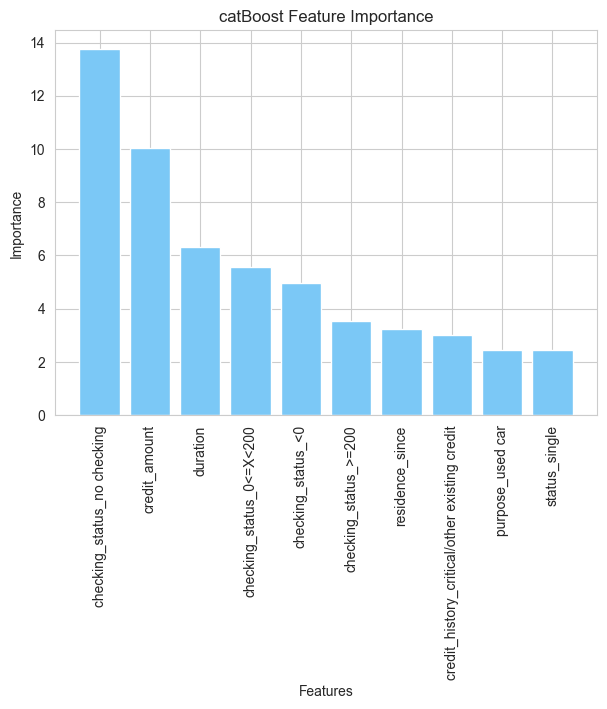

In [54]:
plot_feature_importance(best_est,'catBoost')


Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.53      0.56        60
           1       0.81      0.84      0.82       140

    accuracy                           0.74       200
   macro avg       0.69      0.68      0.69       200
weighted avg       0.74      0.74      0.74       200
 



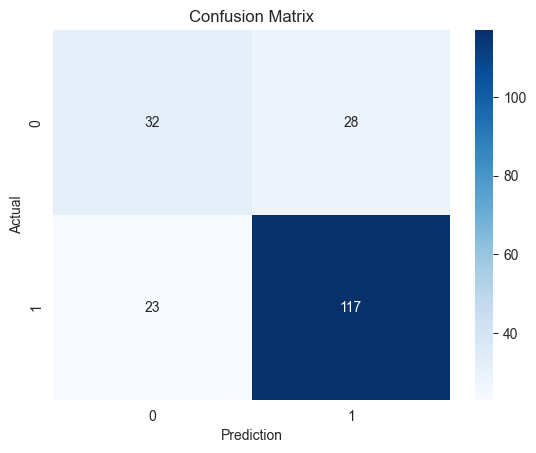

In [55]:
evaluation_metrics(y_test, y_pred, best_est, evaluation_metrics_df, 'catBoost')